# init

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.filters.git
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.utils.git
!pip install mne==0.19
!pip install bctpy

  Cloning https://github.com/UN-GCPDS/python-gcpds.filters.git to /tmp/pip-req-build-qaz61uhw
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.filters.git /tmp/pip-req-build-qaz61uhw
  Created wheel for gcpds-filters: filename=gcpds_filters-0.1a0-py3-none-any.whl size=817587 sha256=f3ab678873cd8d156389c102cb91af86269f77185845b60b123c62be0d52638b
  Stored in directory: /tmp/pip-ephem-wheel-cache-owb_f11p/wheels/36/7a/78/d27d0f0c7be2222e2c76dcafd6840212fbc620d24f8a7c13f0
Successfully built gcpds-filters
  Cloning https://github.com/UN-GCPDS/python-gcpds.utils.git to /tmp/pip-req-build-a_13yt2_
  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-a_13yt2_
     |████████████████████████████████| 7.4 MB 10.9 MB/s 
  Created wheel for gcpds-utils: filename=gcpds_utils-0.1a3-py3-none-any.whl size=116898 sha256=66ed21c9cd04924ad8c3dbf37107c0c0d21bb018d4eb50b6c570932213fdb394
  Stored in directory: /tmp/pip-ephem-wheel-cache

In [ ]:
from scipy.spatial.distance import squareform
import mne
from mne.connectivity import spectral_connectivity as connectivity
# drive y datos
from google.colab import drive
import requests
# estructuras
import pandas as pd
# 
from ipywidgets import interact_manual
from ipywidgets import interact
# módulo para entrenamiento
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# system
import os
from time import time
# data
import pickle
import numpy as np
from numpy import angle, sin, cos, sqrt
from scipy.io import loadmat, savemat
import scipy as sp
from scipy.io import savemat
from scipy.signal import butter, lfilter, welch, hanning, filtfilt, hilbert
# figuras
import matplotlib.pyplot as plt
from gcpds.utils import loaddb
from gcpds.utils.visualizations import plot_eeg, plot_topoplot
# MNE toolbox
import mne
import bct
from mne.preprocessing import ICA
# módulo de multiproceso de las tareas.
import multiprocessing

# load data EEG

In [ ]:
# Sujetos de la base de datos
Subjects = list(np.arange(1,32))
# canales de la base de datos
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4',
            'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
# Frecuencia de muestreo de la base de datos.
sampling_freq  = 1000
# ubicación de la base de datos.
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'
# Método utilizado para la función de ICA de MNE.
method = 'fastica'
# Número de núcleos para ell multiproceso
# pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
# ciclo de los sujetos.
y = list()
data_ref_ica = list()
data_ref = list()
data_componentes = list()
for s in Subjects:
  # carga de la información del sujetos.
  S_ERP = loadmat(load_path + f"Sujeto_"+str(s)+".mat")
  print('sujeto: ', s)
  data = S_ERP['music']
  # data = np.transpose(data, (2,1,0)) # transponer en trials x canales x tiempo
  data_target = data

  # structure mne datos en (trials,canales,tiempo)
  ch_types = ['eeg']*n_channels
  info = mne.create_info(channels, ch_types=ch_types, sfreq=sampling_freq)
  # info.set_montage('standard_1005')
  raw = mne.EpochsArray(data_target, info)

  # filtro la señal de 0.5 - 50 Hz.
  raw.filter(1,45)

  # señal sin quitar los artefactos.
  # plt.figure(figsize=(20,8))
  # plot_eeg(raw.get_data()[0,:,:],channels,sampling_freq)

  # Repairing artifacts with ICA
  
  # ica = ICA(n_components=n_channels, method=method, max_iter='auto', random_state=0)
  # ica.fit(raw)
  # componentes = ica.get_sources(raw).get_data()
  # componentes_ = ica.get_components()
  # ica.plot_sources(raw, show_scrollbars=False)
  
  # raw_delta = raw.copy()
  # # filtro la señal de 0.5 - 4 Hz.
  # raw_delta.filter(0.5,4)
  # componentes_delta = ica.get_sources(raw_delta).get_data()

  # raw_theta = raw.copy()
  # # filtro la señal de 0.5 - 4 Hz.
  # raw_theta.filter(4,8)
  # componentes_theta = ica.get_sources(raw_theta).get_data()

  # raw_alpha = raw.copy()
  # # filtro la señal de 0.5 - 4 Hz.
  # raw_alpha.filter(8,12)
  # componentes_alpha = ica.get_sources(raw_alpha).get_data()

  # raw_beta_l = raw.copy()
  # # filtro la señal de 0.5 - 4 Hz.
  # raw_beta_l.filter(12,16)
  # componentes_beta_l = ica.get_sources(raw_beta_l).get_data()

  # raw_beta_h = raw.copy()
  # # filtro la señal de 0.5 - 4 Hz.
  # raw_beta_h.filter(16,30)
  # componentes_beta_h = ica.get_sources(raw_beta_h).get_data()

  # señal sin quitar los artefactos.
  # plt.figure(figsize=(20,8))
  # plot_eeg(componentes[0,:,:],channels,sampling_freq)
  
  # Parametros para el análisis de la entropia.
  # tau     = 10              # 20   30 
  # window  = 1*sampling_freq # 3,   3   segundo de la ventana.
  # step    = window*0.5      # 50%, 80% de traslape.
  # windows = list(np.arange(0,componentes.shape[2]-window,step))

  # start_time = time.time()
  # entropy_tr = list()
  # for tr in range(data_target.shape[0]):
  #   data = list()
  #   for time_ in range(len(windows)):
  #     signal = np.squeeze(raw.get_data()[tr,:,int(windows[time_]):int(windows[time_]+window)])
  #     data.append(signal)
  #   # estimación de la entropía de la señal.
  #   entropy_tr.append(np.asarray(pool.map(fun_entropy, data)))
  # entropy_raw = np.asarray(entropy_tr)
  # print('Tiempo de la entropia de componentes {tim}'.format(tim=(time.time()-start_time)))
  # # ica.plot_sources(mne.io.RawArray(raw.get_data()[0], info))
  
  # start_time = time.time()
  # entropy_tr = list()
  # for tr in range(data_target.shape[0]):
  #   data = list()
  #   for time_ in range(len(windows)):
  #     signal = np.squeeze(componentes[tr,:,int(windows[time_]):int(windows[time_]+window)])
  #     data.append(signal)
  #   # estimación de la entropía de las componentes.
  #   entropy_tr.append(np.asarray(pool.map(fun_entropy, data)))
  # entropy_com = np.asarray(entropy_tr)
  # print('Tiempo de la entropia de componentes {tim}'.format(tim=(time.time()-start_time)))
  
  # raw2 = raw.copy()
  # comp_ = []
  # for tr in range(entropy_com.shape[0]):
  #   datos_ = np.max(entropy_com[tr,:,:],axis=0)-np.min(entropy_com[0,:,:],axis=0)
  #   datos_f = np.asarray([round(a,1) for a in datos_])
  #   comp_.append(np.where((datos_f>0)==True)[0])
  # pos = list(np.unique(np.concatenate(comp_)))
  # ica.exclude = [0]          # indices chosen based on various plots above sujeto 2.
  # ica.apply(raw2)
  
  # # figura señal quitando artefactos
  # plt.figure(figsize=(20,8))
  # plot_eeg(raw2.get_data()[0,:,:],channels,sampling_freq)

  # start_time = time.time()
  # entropy_tr = list()
  # for tr in range(data_target.shape[0]):
  #   data = list()
  #   for time_ in range(len(windows)):
  #     signal = np.squeeze(raw2.get_data()[tr,:,int(windows[time_]):int(windows[time_]+window)])
  #     data.append(signal)
  #   # estimación de la entropía de la señal quitando artefactos.
  #   entropy_tr.append(np.asarray(pool.map(fun_entropy, data)))
  # entropy_ica = np.asarray(entropy_tr)
  # print('Tiempo de la entropia de la señal {tim}'.format(tim=(time.time()-start_time)))

  # # CAR common average reference
  # # En la señal.
  rereferenced_raw, ref_data = mne.set_eeg_reference(raw, ref_channels='average',projection=True,verbose=0)
  data_ref.append(rereferenced_raw.get_data())
  # data_ref = rereferenced_raw.get_data()
  # # En la señal reconstruida.
  # rereferenced_comp_ica, ref_data = mne.set_eeg_reference(raw2, ref_channels='average',projection=True,verbose=0)
  # data_componentes.append(componentes)
  # data_ref_ica = rereferenced_comp_ica.get_data()
  # savemat(load_path+f'Resultado_music_Sujeto'+str(s)+'.mat',{'X_ica':raw2.get_data(),'X_raw':raw.get_data(),'ref_raw':data_ref,
  #           'ref_ica':data_ref_ica,'H_raw':entropy_raw,'H_com':entropy_com,'H_ica':entropy_ica})
#   savemat(load_path+f'Resultado_music_Sujeto'+str(s)+'_componentes.mat',{'data_componentes':componentes,'Componentes':componentes_,
#                                                                          'data_compo_delta':componentes_delta,
#                                                                          'data_compo_theta':componentes_theta,
#                                                                          'data_compo_alpha':componentes_alpha,
#                                                                          'data_compo_beta_l':componentes_beta_l,
#                                                                          'data_compo_beta_h':componentes_beta_h})
# # savemat(load_path+f'Resultado_music_Sujeto'+str(s)+'_all_componentes.mat',{'all_componentes':data_componentes})

sujeto:  1
sujeto:  2
sujeto:  3
sujeto:  4
sujeto:  5
sujeto:  6
sujeto:  7
sujeto:  8
sujeto:  9
sujeto:  10
sujeto:  11
sujeto:  12
sujeto:  13
sujeto:  14
sujeto:  15
sujeto:  16
sujeto:  17
sujeto:  18
sujeto:  19
sujeto:  20
sujeto:  21
sujeto:  22
sujeto:  23
sujeto:  24
sujeto:  25
sujeto:  26
sujeto:  27
sujeto:  28
sujeto:  29
sujeto:  30
sujeto:  31


# PSD

In [ ]:
# Calculate PSD
nblock = 1000
win = hanning(nblock, True)
window = 1*sampling_freq
step = 0.1*sampling_freq
windows = list(np.arange(0,data_ref[0].shape[2]-window,step))
data_power_ = list()

for sub in range(len(Subjects)):
  Power = list()
  for tr in range(data_ref[sub].shape[0]):
    Power_ven = list()
    for ven in range(len(windows)):
      freqs, Pxxf = welch(np.squeeze(data_ref[sub][tr,:,int(windows[ven]):int(windows[ven]+window)]), sampling_freq, window=win,  nfft=nblock, return_onesided=True, scaling='spectrum')
      Power_ven.append(Pxxf[:,1:31])
    Power.append(np.asarray(Power_ven))
  data_power_.append(np.asarray(Power))
Data_pow = np.asarray(data_power_)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `hanning` is deprecated, use `scipy.signal.windows.hann` instead!
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
savemat(load_path+'PSD_data_music2.mat',{'Data_pow':Data_pow})

# Load functions deep cca

In [ ]:
cd /content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG

/content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG


In [ ]:
ls

cca_functions.py
Cx_music.png
dcca.py
deep_losses.py
deep_models.py
deep_nets.py
dmcca.py
Indices_trials_malos.npy
layer2.mat
layer.mat
lcca.py
LICENSE
lmcca.py
lmdc.py
main_data.asv
main_data.m
main_deepcca
MIfunctions.py
modCSP.py
music_helper.py
preProcessEEG_Audio_Chevigne_2018.m
preProcessEEG_Audio_Chevigne_2018_v2.m
__pycache__/
README.md
sbj0acc48.75.eps
sbj0acc50.0.eps
sbj1acc43.75.eps
sbj2acc50.0.eps
sbj3acc50.0.eps
sbj4acc51.25.eps
sbj5acc50.0.eps
sbj6acc45.0.eps
speech_helper.py
Subject0_Preprocessed_ENV_EEG2.mat
Subject1_Preprocessed_ENV_EEG2.mat
Subject1_Preprocessed_ENV_EEG.mat
Subject2_Preprocessed_ENV_EEG2.mat
Subject2_Preprocessed_ENV_EEG.mat
Subject5_Preprocessed_ENV_EEG2.mat
sujeto_0_cka_featuresgauss_Music_acc.joblib
sujeto_1_cka_featuresgauss_Music_acc.joblib
sujeto_2_cka_featuresgauss_Music_acc.joblib
sujeto_3_cka_featuresgauss_Music_acc.joblib
sujeto_4_cka_featuresgauss_Music_acc.joblib
sujeto_5_cka_featuresgauss_Music_acc.joblib
sujeto_6_cka_featuresgauss_Music_

In [ ]:
import cca_functions

# load data por grupo

In [ ]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import sys
import os
from os import path
import scipy.io
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit,KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, RepeatedKFold, StratifiedKFold
from sklearn.decomposition import PCA
# from pdb import set_trace as bp  ################# added break point accessor####################
from cca_functions  import filtem2, pca_stim_filtem_pca_resp
num_blocks = 20
# NUMBER OF CHANNELS IN THE PROCESSED STIMULI AFTER FILTERBANK
stim_chans = 19
# NUMBER OF CHANNELS IN prePREPROCESSED STIMULI (1D)
stim_chans_pre = 1

# HELPER FUNCTION TO LOAD DATA FOR SPEECH for DMCCA envolvente
def load_dmcca_data_all(subs, mid_shape, type, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    scaler = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    # print('block: ' + str(block))
    # if block == num_blocks - 1: val_idx = 0
    # else:                       val_idx = block + 1
    # print(val_idx)
    # print(num_blocks)
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio  = 0.1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    
    for sub in subs:
        # resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["resp"][0]
        if type == 1:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_all.mat")["resp"][0]
        elif type ==2:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_all.mat")["resp"][0]
        elif type ==3:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_all.mat")["resp"][0]
        elif type ==4:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_all.mat")["resp"][0]
        for tr in range(len(resp_data)):
          resp_data[tr][np.isnan(resp_data[tr])] = 0
        # Loading the response data, dividing them into training, validation and test data
        # resp_train = np.concat ate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        # resp_val   = resp_data[val_idx]
        # resp_test  = resp_data[block]
    print('No trials '+str(len(resp_data)))
    print(resp_data[0].shape)
    # data_subs_pre.append([resp_train, resp_val, resp_test])
    # print(len(data_subs_pre))    
    # print(data_subs_pre[0].shape)
    # Loading the stimulus data, dividing them into training, validation and test data
    # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["stim"][0]
    if type == 1:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_all.mat")["stim"][0]
    elif type ==2:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_all.mat")["stim"][0]
    elif type ==3:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_all.mat")["stim"][0]
    elif type ==4:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_all.mat")["stim"][0]
    
      # max_ = list()
      # for tr in range(len(stim_data)):
      #   max_.append(np.max(np.max(stim_data[tr])))
      # mmax = np.max(np.asarray(max_))
    
    # train is now 80% of the entire data set
    # test is now 20% of the initial data set
    # print("stim "+str(len(stim_data)))
    # x_train, x_test, y_train, y_test = train_test_split(resp_data,stim_data, test_size= 1 - train_ratio,random_state=block)
    # print("y_test "+str(len(y_train)))
    # # validation is now 80-20% of the initial data set
    # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1 - train_ratio, random_state=0)
    # print(len(x_train), len(x_val), len(x_test))
    data_subs_pre_fold = list()
    # kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
    for train_index, test_index in kf.split(resp_data):
      data_subs_pre = list()
      print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test = resp_data[train_index], resp_data[test_index]
      y_train_, y_test = stim_data[train_index], stim_data[test_index]
      x_train, x_val, y_train, y_val = train_test_split(X_train_, y_train_, test_size=1 - train_ratio, random_state=0)
      # print(len(x_train), len(x_val), len(x_test))

      resp_train = np.concatenate([x_train[x] for x in range(len(x_train))],0)
      resp_val   = np.concatenate([x_val[x] for x in range(len(x_val))],0)
      resp_test  = np.concatenate([x_test[x] for x in range(len(x_test))],0)
      data_subs_pre.append([resp_train, resp_val, resp_test])

      stim_train = np.concatenate([y_train[x] for x in range(len(y_train))],0)
      stim_val   = np.concatenate([y_val[x] for x in range(len(y_val))],0)
      stim_test  = np.concatenate([y_test[x] for x in range(len(y_test))],0)
      # if type == 3:
      stim_train = scaler.fit_transform(stim_train)
      stim_val   = scaler.transform(stim_val)
      stim_test  = scaler.transform(stim_test)
      data_stim_pre = [stim_train, stim_val, stim_test]
      data_subs_pre.append(data_stim_pre)

      print("Stim_train "+str(stim_train.shape))
      # print(data_subs_pre[1].shape)    
      # Applying stimulus lag (d_S)
      stim_lagged_midshape = [None, None, None]
      for i in range(3):
          stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
      data_subs_pre[-1] = stim_lagged_midshape
      data_subs_pre_fold.append(data_subs_pre)
    return data_subs_pre_fold

def load_dmcca_data_all_cx(subs, mid_shape, type, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
    scaler = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    # print('block: ' + str(block))
    # if block == num_blocks - 1: val_idx = 0
    # else:                       val_idx = block + 1
    # print(val_idx)
    # print(num_blocks)
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio  = 0.1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    
    for sub in subs:
        # resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["resp"][0]
        if type == 1:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
        elif type ==2:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
        elif type ==3:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
        elif type ==4:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
        for tr in range(len(resp_data)):
          resp_data[tr][np.isnan(resp_data[tr])] = 0
        # Loading the response data, dividing them into training, validation and test data
        # resp_train = np.concat ate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        # resp_val   = resp_data[val_idx]
        # resp_test  = resp_data[block]
    print('No trials '+str(len(resp_data)))
    print(resp_data[0].shape)
    # data_subs_pre.append([resp_train, resp_val, resp_test])
    # print(len(data_subs_pre))    
    # print(data_subs_pre[0].shape)
    # Loading the stimulus data, dividing them into training, validation and test data
    # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["stim"][0]
    if type == 1:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["stim"][0]
    elif type ==2:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["stim"][0]
    elif type ==3:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["stim"][0]
    elif type ==4:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["stim"][0]
    
      # max_ = list()
      # for tr in range(len(stim_data)):
      #   max_.append(np.max(np.max(stim_data[tr])))
      # mmax = np.max(np.asarray(max_))
    
    # train is now 80% of the entire data set
    # test is now 20% of the initial data set
    # print("stim "+str(len(stim_data)))
    # x_train, x_test, y_train, y_test = train_test_split(resp_data,stim_data, test_size= 1 - train_ratio,random_state=block)
    # print("y_test "+str(len(y_train)))
    # # validation is now 80-20% of the initial data set
    # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1 - train_ratio, random_state=0)
    # print(len(x_train), len(x_val), len(x_test))
    data_subs_pre_fold = list()
    # kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    # kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
    # for train_index, test_index in kf.split(resp_data,y):
    ind_s = np.arange(0,1240,40)
    
    for subj in range(31):
      train_index_  = np.ones((1240)).astype(bool)
      train_index_[ind_s[subj]:ind_s[subj]+40] = False
      train_index = np.where(train_index_==True)[0]
      print(train_index.shape)
      test_index_ = np.abs(train_index_.astype(int)-1).astype(bool)
      test_index  = np.where(test_index_==True)[0]
      print(test_index.shape)
      data_subs_pre = list()
      print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test_ = resp_data[train_index], resp_data[test_index]
      y_train_, y_test_  = stim_data[train_index], stim_data[test_index]
      x_train_, x_val_, y_train_, y_val_ = train_test_split(X_train_, y_train_, test_size = 1 - train_ratio, random_state=0)
      print(len(x_train_), len(x_test_), len(x_val_))
      print(len(y_train_), len(y_test_), len(y_val_))

      X_train = np.zeros((len(x_train_),x_train_[0].shape[0],x_train_[0].shape[1]))
      x_test  = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
      x_val   = np.zeros((len(x_val_),x_val_[0].shape[0],x_val_[0].shape[1]))
      for tr in range(len(x_train_)):
        X_train[tr,:,:] = x_train_[tr]
      for tr in range(len(x_test_)):
        x_test[tr,:,:] = x_test_[tr]
      for tr in range(len(x_val_)):
        x_val[tr,:,:] = x_val_[tr]
      X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
      X_test  = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
      X_val   = np.reshape(x_val,(x_val.shape[0],x_val.shape[1]*x_val.shape[2]))
      X_train[np.isnan(X_train)]= 0
      X_test[np.isnan(X_test)]  = 0
      X_val[np.isnan(X_val)]    = 0

      resp_train = X_train #np.concatenate([x_train[x] for x in range(len(x_train))],1)
      resp_val   = X_val   #np.concatenate([x_val[x] for x in range(len(x_val))],1)
      resp_test  = X_test  #np.concatenate([x_test[x] for x in range(len(x_test))],1)
      
      data_subs_pre.append([resp_train, resp_val, resp_test])

      y_train = np.zeros((len(y_train_),y_train_[0].shape[0],y_train_[0].shape[1]))
      y_test  = np.zeros((len(y_test_),y_test_[0].shape[0],y_test_[0].shape[1]))
      y_val   = np.zeros((len(y_val_),y_val_[0].shape[0],y_val_[0].shape[1]))
      for tr in range(len(y_train_)):
        y_train[tr,:,:] = y_train_[tr]
      for tr in range(len(y_test_)):
        y_test[tr,:,:] = y_test_[tr]
      for tr in range(len(y_val_)):
        y_val[tr,:,:] = y_val_[tr]
      Y_train = np.reshape(y_train,(y_train.shape[0],y_train.shape[1]*y_train.shape[2]))
      Y_test  = np.reshape(y_test,(y_test.shape[0],y_test.shape[1]*y_test.shape[2]))
      Y_val   = np.reshape(y_val,(y_val.shape[0],y_val.shape[1]*y_val.shape[2]))
      
      stim_train = Y_train #np.concatenate([y_train[x] for x in range(len(y_train))],1)
      stim_val   = Y_val   #np.concatenate([y_val[x] for x in range(len(y_val))],1)
      stim_test  = Y_test  #np.concatenate([y_test[x] for x in range(len(y_test))],1)
      
      # if type == 3:
      stim_train = scaler.fit_transform(stim_train)
      stim_val   = scaler.transform(stim_val)
      stim_test  = scaler.transform(stim_test)

      data_stim_pre = [stim_train, stim_val, stim_test]
      data_subs_pre.append(data_stim_pre)

      print("Stim_train "+str(stim_train.shape))
      print("stim_val "+str(stim_val.shape))
      print("stim_test "+str(stim_test.shape))
      # print(data_subs_pre[1].shape)    
      # Applying stimulus lag (d_S)
      stim_lagged_midshape = [None, None, None]
      for i in range(3):
          stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
      data_subs_pre[-1] = stim_lagged_midshape
      data_subs_pre_fold.append(data_subs_pre)
    return data_subs_pre_fold

def load_dmcca_data_all_cx_2(subs, mid_shape, type, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
    scaler = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    # print('block: ' + str(block))
    # if block == num_blocks - 1: val_idx = 0
    # else:                       val_idx = block + 1
    # print(val_idx)
    # print(num_blocks)
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio  = 0.1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    
    for sub in subs:
        # resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["resp"][0]
        if type == 1:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
        elif type ==2:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
        elif type ==3:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
        elif type ==4:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
        for tr in range(len(resp_data)):
          resp_data[tr][np.isnan(resp_data[tr])] = 0
        # Loading the response data, dividing them into training, validation and test data
        # resp_train = np.concat ate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        # resp_val   = resp_data[val_idx]
        # resp_test  = resp_data[block]
    print('No trials '+str(len(resp_data)))
    print(resp_data[0].shape)
    # data_subs_pre.append([resp_train, resp_val, resp_test])
    # print(len(data_subs_pre))    
    # print(data_subs_pre[0].shape)
    # Loading the stimulus data, dividing them into training, validation and test data
    # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["stim"][0]
    if type == 1:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["stim"][0]
    elif type ==2:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["stim"][0]
    elif type ==3:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["stim"][0]
    elif type ==4:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["stim"][0]
    
      # max_ = list()
      # for tr in range(len(stim_data)):
      #   max_.append(np.max(np.max(stim_data[tr])))
      # mmax = np.max(np.asarray(max_))
    
    # train is now 80% of the entire data set
    # test is now 20% of the initial data set
    # print("stim "+str(len(stim_data)))
    # x_train, x_test, y_train, y_test = train_test_split(resp_data,stim_data, test_size= 1 - train_ratio,random_state=block)
    # print("y_test "+str(len(y_train)))
    # # validation is now 80-20% of the initial data set
    # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1 - train_ratio, random_state=0)
    # print(len(x_train), len(x_val), len(x_test))
    data_subs_pre_fold = list()
    # kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    # kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
    # for train_index, test_index in kf.split(resp_data,y):
    ind_s = np.arange(0,1240,40)
    
    folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
    datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord2.mat")["datos"]
    pca = PCA(n_components=9)
    datos_stim = np.zeros((31,40,20,9))
    for sub in range(31):
      for tr in range(40):
        datos_stim[sub,tr,:,:] = pca.fit_transform(datos_stim_[sub,tr,:,:])
    datos_r = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*datos_stim.shape[3]])
    for subj in range(31):
      train_index_  = np.ones((1240)).astype(bool)
      train_index_[ind_s[subj]:ind_s[subj]+40] = False
      train_index = np.where(train_index_==True)[0]
      print(train_index.shape)
      test_index_ = np.abs(train_index_.astype(int)-1).astype(bool)
      test_index  = np.where(test_index_==True)[0]
      print(test_index.shape)
      data_subs_pre = list()
      print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test_ = resp_data[train_index], resp_data[test_index]
      y_train_, y_test_  = datos_r[train_index,:], datos_r[test_index,:]
      x_train_, x_val_, y_train_, y_val_ = train_test_split(X_train_, y_train_, test_size = 1 - train_ratio, random_state=0)
      print(len(x_train_), len(x_test_), len(x_val_))
      print(len(y_train_), len(y_test_), len(y_val_))

      X_train = np.zeros((len(x_train_),x_train_[0].shape[0],x_train_[0].shape[1]))
      x_test  = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
      x_val   = np.zeros((len(x_val_),x_val_[0].shape[0],x_val_[0].shape[1]))
      for tr in range(len(x_train_)):
        X_train[tr,:,:] = x_train_[tr]
      for tr in range(len(x_test_)):
        x_test[tr,:,:] = x_test_[tr]
      for tr in range(len(x_val_)):
        x_val[tr,:,:] = x_val_[tr]
      X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
      X_test  = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
      X_val   = np.reshape(x_val,(x_val.shape[0],x_val.shape[1]*x_val.shape[2]))
      X_train[np.isnan(X_train)]= 0
      X_test[np.isnan(X_test)]  = 0
      X_val[np.isnan(X_val)]    = 0

      resp_train = X_train #np.concatenate([x_train[x] for x in range(len(x_train))],1)
      resp_val   = X_val   #np.concatenate([x_val[x] for x in range(len(x_val))],1)
      resp_test  = X_test  #np.concatenate([x_test[x] for x in range(len(x_test))],1)
      
      data_subs_pre.append([resp_train, resp_val, resp_test])

      y_train = np.zeros((len(x_train_),y_train_[0].shape[0]))
      y_test  = np.zeros((len(x_test_),y_test_[0].shape[0]))
      y_val   = np.zeros((len(x_val_),y_val_[0].shape[0]))
      for tr in range(len(y_train_)):
        y_train[tr,:] = y_train_[tr,:]
      for tr in range(len(y_test_)):
        y_test[tr,:] = y_test_[tr,:]
      for tr in range(len(y_val_)):
        y_val[tr,:] = y_val_[tr,:]
      Y_train = np.reshape(y_train,(y_train.shape[0],y_train.shape[1]))
      Y_test  = np.reshape(y_test,(y_test.shape[0],y_test.shape[1]))
      Y_val   = np.reshape(y_val,(y_val.shape[0],y_val.shape[1]))
      
      stim_train = Y_train #np.concatenate([y_train[x] for x in range(len(y_train))],1)
      stim_val   = Y_val   #np.concatenate([y_val[x] for x in range(len(y_val))],1)
      stim_test  = Y_test  #np.concatenate([y_test[x] for x in range(len(y_test))],1)
      
      # if type == 3:
      stim_train = scaler.fit_transform(stim_train)
      stim_val   = scaler.transform(stim_val)
      stim_test  = scaler.transform(stim_test)

      data_stim_pre = [stim_train, stim_val, stim_test]
      data_subs_pre.append(data_stim_pre)

      print("Stim_train "+str(stim_train.shape))
      print("stim_val "+str(stim_val.shape))
      print("stim_test "+str(stim_test.shape))
      # print(data_subs_pre[1].shape)    
      # Applying stimulus lag (d_S)
      stim_lagged_midshape = [None, None, None]
      for i in range(3):
          stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
      data_subs_pre[-1] = stim_lagged_midshape
      data_subs_pre_fold.append(data_subs_pre)
    return data_subs_pre_fold

def load_dmcca_data_all_cx_3(subs, mid_shape, type, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
    scaler = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    # print('block: ' + str(block))
    # if block == num_blocks - 1: val_idx = 0
    # else:                       val_idx = block + 1
    # print(val_idx)
    # print(num_blocks)
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio  = 0.1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    
    for sub in subs:
        # resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["resp"][0]
        if type == 1:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
        elif type ==2:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
        elif type ==3:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
        elif type ==4:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
        for tr in range(len(resp_data)):
          resp_data[tr][np.isnan(resp_data[tr])] = 0
        # Loading the response data, dividing them into training, validation and test data
        # resp_train = np.concat ate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        # resp_val   = resp_data[val_idx]
        # resp_test  = resp_data[block]
    print('No trials '+str(len(resp_data)))
    print(resp_data[0].shape)
    # data_subs_pre.append([resp_train, resp_val, resp_test])
    # print(len(data_subs_pre))    
    # print(data_subs_pre[0].shape)
    # Loading the stimulus data, dividing them into training, validation and test data
    # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["stim"][0]
    # if type == 1:
    #   stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["stim"][0]
    # elif type ==2:
    #   stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["stim"][0]
    # elif type ==3:
    #   stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["stim"][0]
    # elif type ==4:
      # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["stim"][0]
    
      # max_ = list()
      # for tr in range(len(stim_data)):
      #   max_.append(np.max(np.max(stim_data[tr])))
      # mmax = np.max(np.asarray(max_))
    
    # train is now 80% of the entire data set
    # test is now 20% of the initial data set
    # print("stim "+str(len(stim_data)))
    # x_train, x_test, y_train, y_test = train_test_split(resp_data,stim_data, test_size= 1 - train_ratio,random_state=block)
    # print("y_test "+str(len(y_train)))
    # # validation is now 80-20% of the initial data set
    # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1 - train_ratio, random_state=0)
    # print(len(x_train), len(x_val), len(x_test))
    data_subs_pre_fold = list()
    # kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    # kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
    # for train_index, test_index in kf.split(resp_data,y):
  
    folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
    # datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord2.mat")["datos"]
    datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord_all.mat")["datos"]
    datos_stim_[np.isnan(datos_stim_)]=0
    tr_cu      = loadmat(folder_path_+'/Trials_cuadrantes.mat')['trial_ord']
    tr_1 = tr_cu==1
    tr_2 = tr_cu==2
    tr_3 = tr_cu==3
    tr_4 = tr_cu==4
    tr_all = tr_1+tr_2+tr_3+tr_4
    pca = PCA(n_components=9)
    datos_stim = np.zeros((31,40,25,9))
    for sub in range(31):
      for tr in range(40):
        datos_stim[sub,tr,:,:] = pca.fit_transform(datos_stim_[sub,tr,:,:])
    datos_r_ = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*datos_stim.shape[3]])
    plt.imshow(tr_all,aspect='auto')
    plt.show()
    tr_all2  = np.sum
    tr_all   = np.reshape(tr_all,(tr_all.shape[0]*tr_all.shape[1]))
    datos_r  = datos_r_
    resp_data= resp_data
    
    # ind_s = np.arange(0,1240,40)
    for subj in range(31):
      train_index_  = tr_all.astype(bool)
      train_index_[ind_s[subj]:ind_s[subj]+40] = False
      train_index = np.where(train_index_==True)[0]
      # print(train_index.shape)
      test_index_ = np.abs(train_index_.astype(int)-1).astype(bool)
      test_index  = np.where(test_index_==True)[0]
      # print(test_index.shape)
      data_subs_pre = list()
      print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test_ = resp_data[train_index], resp_data[test_index]
      y_train_, y_test_  = datos_r[train_index,:], datos_r[test_index,:]
      x_train_, x_val_, y_train_, y_val_ = train_test_split(X_train_, y_train_, test_size = 1 - train_ratio, random_state=0)
      print(len(x_train_), len(x_test_), len(x_val_))
      print(len(y_train_), len(y_test_), len(y_val_))

      X_train = np.zeros((len(x_train_),x_train_[0].shape[0],x_train_[0].shape[1]))
      x_test  = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
      x_val   = np.zeros((len(x_val_),x_val_[0].shape[0],x_val_[0].shape[1]))
      for tr in range(len(x_train_)):
        X_train[tr,:,:] = x_train_[tr]
      for tr in range(len(x_test_)):
        x_test[tr,:,:] = x_test_[tr]
      for tr in range(len(x_val_)):
        x_val[tr,:,:] = x_val_[tr]
      X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
      X_test  = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
      X_val   = np.reshape(x_val,(x_val.shape[0],x_val.shape[1]*x_val.shape[2]))
      X_train[np.isnan(X_train)]= 0
      X_test[np.isnan(X_test)]  = 0
      X_val[np.isnan(X_val)]    = 0

      resp_train = X_train #np.concatenate([x_train[x] for x in range(len(x_train))],1)
      resp_val   = X_val   #np.concatenate([x_val[x] for x in range(len(x_val))],1)
      resp_test  = X_test  #np.concatenate([x_test[x] for x in range(len(x_test))],1)
      
      data_subs_pre.append([resp_train, resp_val, resp_test])

      y_train = np.zeros((len(x_train_),y_train_[0].shape[0]))
      y_test  = np.zeros((len(x_test_),y_test_[0].shape[0]))
      y_val   = np.zeros((len(x_val_),y_val_[0].shape[0]))
      for tr in range(len(y_train_)):
        y_train[tr,:] = y_train_[tr,:]
      for tr in range(len(y_test_)):
        y_test[tr,:] = y_test_[tr,:]
      for tr in range(len(y_val_)):
        y_val[tr,:] = y_val_[tr,:]
      Y_train = np.reshape(y_train,(y_train.shape[0],y_train.shape[1]))
      Y_test  = np.reshape(y_test,(y_test.shape[0],y_test.shape[1]))
      Y_val   = np.reshape(y_val,(y_val.shape[0],y_val.shape[1]))
      
      stim_train = Y_train #np.concatenate([y_train[x] for x in range(len(y_train))],1)
      stim_val   = Y_val   #np.concatenate([y_val[x] for x in range(len(y_val))],1)
      stim_test  = Y_test  #np.concatenate([y_test[x] for x in range(len(y_test))],1)
      
      # if type == 3:
      stim_train = scaler.fit_transform(stim_train)
      stim_val   = scaler.transform(stim_val)
      stim_test  = scaler.transform(stim_test)

      data_stim_pre = [stim_train, stim_val, stim_test]
      data_subs_pre.append(data_stim_pre)

      print("Stim_train "+str(stim_train.shape))
      print("stim_val "+str(stim_val.shape))
      print("stim_test "+str(stim_test.shape))
      # print(data_subs_pre[1].shape)    
      # Applying stimulus lag (d_S)
      stim_lagged_midshape = [None, None, None]
      for i in range(3):
          stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
      data_subs_pre[-1] = stim_lagged_midshape
      data_subs_pre_fold.append(data_subs_pre)
    return data_subs_pre_fold

def load_dmcca_data_all_cx_gauss(subs, mid_shape, type, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
    scaler = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    # print('block: ' + str(block))
    # if block == num_blocks - 1: val_idx = 0
    # else:                       val_idx = block + 1
    # print(val_idx)
    # print(num_blocks)
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio  = 0.1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    
    for sub in subs:
        # resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["resp"][0]
        if type == 1:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
        elif type ==2:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
        elif type ==3:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
        elif type ==4:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
        for tr in range(len(resp_data)):
          resp_data[tr][np.isnan(resp_data[tr])] = 0

        # Loading the response data, dividing them into training, validation and test data
        # resp_train = np.concat ate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        # resp_val   = resp_data[val_idx]
        # resp_test  = resp_data[block]
    print('No trials '+str(len(resp_data)))
    print(resp_data[0].shape)
    # data_subs_pre.append([resp_train, resp_val, resp_test])
    # print(len(data_subs_pre))    
    # print(data_subs_pre[0].shape)
    # Loading the stimulus data, dividing them into training, validation and test data
    # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["stim"][0]
    if type == 1:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["stim"][0]
    elif type ==2:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["stim"][0]
    elif type ==3:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["stim"][0]
    elif type ==4:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["stim"][0]
    
      # max_ = list()
      # for tr in range(len(stim_data)):
      #   max_.append(np.max(np.max(stim_data[tr])))
      # mmax = np.max(np.asarray(max_))
    
    # train is now 80% of the entire data set
    # test is now 20% of the initial data set
    # print("stim "+str(len(stim_data)))
    # x_train, x_test, y_train, y_test = train_test_split(resp_data,stim_data, test_size= 1 - train_ratio,random_state=block)
    # print("y_test "+str(len(y_train)))
    # # validation is now 80-20% of the initial data set
    # x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1 - train_ratio, random_state=0)
    # print(len(x_train), len(x_val), len(x_test))
    data_subs_pre_fold = list()
    # kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    # kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
    # for train_index, test_index in kf.split(resp_data,y):
    ind_s = np.arange(0,1240,40)
    
    # datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord2.mat")["datos"]
    datos_stim_ = scipy.io.loadmat(folder_path+f"/datos_stim_ord_all.mat")["datos"]
    datos_stim_[np.isnan(datos_stim_)]=0
    tr_cu      = loadmat(folder_path+'/Trials_cuadrantes.mat')['trial_ord']
    tr_1 = tr_cu==1
    tr_2 = tr_cu==2
    tr_3 = tr_cu==3
    tr_4 = tr_cu==4
    tr_all = tr_1+tr_2+tr_3+tr_4
    pca = PCA(n_components=9)
    datos_stim = np.zeros((31,40,25,9))
    for sub in range(31):
      for tr in range(40):
        datos_stim[sub,tr,:,:] = pca.fit_transform(datos_stim_[sub,tr,:,:])
    datos_r_ = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*datos_stim.shape[3]])
    plt.imshow(tr_all,aspect='auto')
    plt.show()
    tr_all   = np.reshape(tr_all,(tr_all.shape[0]*tr_all.shape[1]))
    datos_r  = datos_r_
    
    ind_s = np.arange(0,1240,40)
    
    datos_stim = scipy.io.loadmat(folder_path+'/conectividad_gauss.mat')['gaus']
    datos_stim = datos_stim[:,:,:,2:5,:]
    datos_r2 = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*3*datos_stim.shape[4]])

    for subj in range(31):
      train_index_  = np.ones((1240)).astype(bool)
      train_index_[ind_s[subj]:ind_s[subj]+40] = False
      train_index = np.where(train_index_==True)[0]
      print(train_index.shape)
      test_index_ = np.abs(train_index_.astype(int)-1).astype(bool)
      test_index  = np.where(test_index_==True)[0]
      print(test_index.shape)
      data_subs_pre = list()
      print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test_ = datos_r2[train_index,:], datos_r2[test_index,:]
      y_train_, y_test_  = datos_r[train_index,:], datos_r[test_index,:]
      x_train_, x_val_, y_train_, y_val_ = train_test_split(X_train_, y_train_, test_size = 1 - train_ratio, random_state=0)
      print(len(x_train_), len(x_test_), len(x_val_))
      print(len(y_train_), len(y_test_), len(y_val_))

      # X_train = np.zeros((len(x_train_),x_train_[0].shape[0],x_train_[0].shape[1]))
      # x_test  = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
      # x_val   = np.zeros((len(x_val_),x_val_[0].shape[0],x_val_[0].shape[1]))
      # for tr in range(len(x_train_)):
      #   X_train[tr,:,:] = x_train_[tr]
      # for tr in range(len(x_test_)):
      #   x_test[tr,:,:] = x_test_[tr]
      # for tr in range(len(x_val_)):
      #   x_val[tr,:,:] = x_val_[tr]
      # X_train = np.reshape(X_train_,(X_train_.shape[0],X_train_.shape[1]*X_train_.shape[2]))
      # X_test  = np.reshape(x_test,(x_test_.shape[0],x_test_.shape[1]*x_test_.shape[2]))
      # X_val   = np.reshape(x_val,(x_val_.shape[0],x_val_.shape[1]*x_val_.shape[2]))
      x_train_[np.isnan(x_train_)]= 0
      x_test_[np.isnan(x_test_)]  = 0
      x_val_[np.isnan(x_val_)]    = 0

      resp_train = x_train_ #np.concatenate([x_train[x] for x in range(len(x_train))],1)
      resp_val   = x_val_   #np.concatenate([x_val[x] for x in range(len(x_val))],1)
      resp_test  = x_test_  #np.concatenate([x_test[x] for x in range(len(x_test))],1)
      
      data_subs_pre.append([resp_train, resp_val, resp_test])

      y_train = np.zeros((len(x_train_),y_train_[0].shape[0]))
      y_test  = np.zeros((len(x_test_),y_test_[0].shape[0]))
      y_val   = np.zeros((len(x_val_),y_val_[0].shape[0]))
      for tr in range(len(y_train_)):
        y_train[tr,:] = y_train_[tr,:]
      for tr in range(len(y_test_)):
        y_test[tr,:] = y_test_[tr,:]
      for tr in range(len(y_val_)):
        y_val[tr,:] = y_val_[tr,:]
      Y_train = np.reshape(y_train,(y_train.shape[0],y_train.shape[1]))
      Y_test  = np.reshape(y_test,(y_test.shape[0],y_test.shape[1]))
      Y_val   = np.reshape(y_val,(y_val.shape[0],y_val.shape[1]))
      
      stim_train = Y_train #np.concatenate([y_train[x] for x in range(len(y_train))],1)
      stim_val   = Y_val   #np.concatenate([y_val[x] for x in range(len(y_val))],1)
      stim_test  = Y_test  #np.concatenate([y_test[x] for x in range(len(y_test))],1)
      
      # if type == 3:
      stim_train = scaler.fit_transform(stim_train)
      stim_val   = scaler.transform(stim_val)
      stim_test  = scaler.transform(stim_test)

      data_stim_pre = [stim_train, stim_val, stim_test]
      data_subs_pre.append(data_stim_pre)

      print("Stim_train "+str(stim_train.shape))
      print("stim_val "+str(stim_val.shape))
      print("stim_test "+str(stim_test.shape))
      # print(data_subs_pre[1].shape)    
      # Applying stimulus lag (d_S)
      stim_lagged_midshape = [None, None, None]
      for i in range(3):
          stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
      data_subs_pre[-1] = stim_lagged_midshape
      data_subs_pre_fold.append(data_subs_pre)
    return data_subs_pre_fold

# HELPER FUNCTION TO LOAD DATA FOR SPEECH for DMCCA RMS
def load_dmcca_data_cluster(subs, mid_shape, type, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    scaler = MinMaxScaler()#StandardScaler()#MinMaxScaler()
    # print('block: ' + str(block))
    # if block == num_blocks - 1: val_idx = 0
    # else:                       val_idx = block + 1
    # print(val_idx)
    # print(num_blocks)
    train_ratio = 0.8
    validation_ratio = 0.1
    test_ratio  = 0.1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    data_subs_pre = list()
    for sub in subs:
        # resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["resp"][0]
        if type == 1:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx (1).mat")["resp"][0]
        elif type ==2:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx.mat")["resp"][0]
        elif type ==3:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx.mat")["resp"][0]
        elif type ==4:
          resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx.mat")["resp"][0]
        for tr in range(len(resp_data)):
          resp_data[tr][np.isnan(resp_data[tr])] = 0
        # Loading the response data, dividing them into training, validation and test data
        # resp_train = np.concat ate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        # resp_val   = resp_data[val_idx]
        # resp_test  = resp_data[block]
    print('No trials '+str(len(resp_data)))
    print(resp_data[0].shape)
    # data_subs_pre.append([resp_train, resp_val, resp_test])
    # print(len(data_subs_pre))    
    # print(data_subs_pre[0].shape)
    # Loading the stimulus data, dividing them into training, validation and test data
    # stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1.mat")["stim"][0]
    if type == 1:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx (1).mat")["stim"][0]
    elif type ==2:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx.mat")["stim"][0]
    elif type ==3:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx.mat")["stim"][0]
    elif type ==4:
      stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx.mat")["stim"][0]
    
      # max_ = list()
      # for tr in range(len(stim_data)):
      #   max_.append(np.max(np.max(stim_data[tr])))
      # mmax = np.max(np.asarray(max_))
    
    # train is now 80% of the entire data set
    # test is now 20% of the initial data set
    print("stim "+str(len(stim_data)))
    x_train, x_test, y_train, y_test = train_test_split(resp_data,stim_data, test_size= 1 - train_ratio,random_state=block)
    print("y_test "+str(len(y_train)))
    # validation is now 80-20% of the initial data set
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1 - train_ratio, random_state=0)
    print(len(x_train), len(x_val), len(x_test))

    resp_train = np.concatenate([x_train[x] for x in range(len(x_train))],0)
    resp_val   = np.concatenate([x_val[x] for x in range(len(x_val))],0)
    resp_test  = np.concatenate([x_test[x] for x in range(len(x_test))],0)
    data_subs_pre.append([resp_train, resp_val, resp_test])

    stim_train = np.concatenate([y_train[x] for x in range(len(y_train))],0)
    stim_val   = np.concatenate([y_val[x] for x in range(len(y_val))],0)
    stim_test  = np.concatenate([y_test[x] for x in range(len(y_test))],0)
    # if type == 3:
    stim_train = scaler.fit_transform(stim_train)
    stim_val   = scaler.transform(stim_val)
    stim_test  = scaler.transform(stim_test)
    data_stim_pre = [stim_train, stim_val, stim_test]
    data_subs_pre.append(data_stim_pre)

    print("Stim_train "+str(stim_train.shape))
    # print(data_subs_pre[1].shape)    
    # Applying stimulus lag (d_S)
    stim_lagged_midshape = [None, None, None]
    for i in range(3):
        stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
    data_subs_pre[-1] = stim_lagged_midshape

    return data_subs_pre

# HELPER FUNCTION TO LOAD DATA FOR SPEECH for DMCCA
def load_dmcca_data2(subs, mid_shape, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        mid_shape : TIME-LAGS APPLIED TO THE STIMLUS
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    print('block: ' + str(block))
    if block == num_blocks - 1: val_idx = 0
    else:                       val_idx = block + 1
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/speech-EEG/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    data_subs_pre = []
    for sub in subs:
        resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG.mat")["resp"][0]
        # Loading the response data, dividing them into training, validation and test data
        resp_train = np.concatenate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        resp_val   = resp_data[val_idx]
        resp_test  = resp_data[block]
        data_subs_pre.append([resp_train, resp_val, resp_test])

    # Loading the stimulus data, dividing them into training, validation and test data
    stim_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG.mat")["stim"][0]
    stim_train = np.concatenate([stim_data[x] for x in range(len(stim_data)) if x not in [block, val_idx]], 0)
    stim_val   = stim_data[val_idx]
    stim_test  = stim_data[block]
    print("stim_train "+str(stim_train.shape))
    data_stim_pre = [stim_train, stim_val, stim_test]
    data_subs_pre.append(data_stim_pre)

    # Applying stimulus lag (d_S)
    stim_lagged_midshape = [None, None, None]
    for i in range(3):
        stim_lagged_midshape[i] = lagGen(data_subs_pre[-1][i], np.arange(mid_shape))
    data_subs_pre[-1] = stim_lagged_midshape
    return data_subs_pre

# HELPER FUNCTION TO LOAD DATA FOR SPEECH for LCCA and DCCA
def load_mcca_data2(subs, block=0):
    """
    THIS IS VALID FOR THE LIBERTO ET AL. AUDIOBOOK SPEECH DATA. OR DATA SIMILAR TO THAT (WHERE ALL THE SUBJECTS LISTEN TO THE SAME STIMULI).
    ARGUMENTS:
        subs:  IDS OF THE SUBJECTS FOR WHICH LCCA IS TO BE PERFORMED.
        block: OUT OF THE 20 CROSS-FOLD VALIDATION BLOCKS, WHICH BLOCK IS TO BE CHOSEN FOR TESTING. 
               OUT OF THE REMAINING, 18 BLOCKS ARE FOR TRAINING AND 1 FOR VALIDATING.
    RETURNS: 
        data_subs: AN (N+1) ELEMENT LIST WITH FIRST N ELEMENTS FOR THE SUBJECTS' DATA AND THE LAST ELEMENT FOR THE COMMON STIMULUS DATA.
    """
    print('block: ' + str(block))
    if block == num_blocks - 1: val_idx = 0
    else:                       val_idx = block + 1
    # LOAD THE prePREPROCESSED DATA HERE 
    # AND THEN PROCESS IT
    # data_subs_pre will have N SUBJECTS' RESPONSES SUCH THAT
    # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
    # WHERE
    # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
    # data_stim_pre IS ALSO PRESENT IN THE SAME WAY AS data_subs_pre[n].
    # ASSUMPTION: THE STIMULI DATA IS OF 1 DIMENSION.
    # IF NOT:
    #    WE CAN either DO PCA ONTO 1D AND THEN DO FILTERBANK.
    #    or FILTERBANK AND THEN, PCA to 21D.
    # Each subject's stimulus and response are preprocessed are saved as "Subject{sub}_Preprocessed_ENV_EEG.mat"
    # The data are processed using "preProcessEEG_Audio_Chevigne_2018.m"
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/speech-EEG/" # Path to the data folder here
    print('Data INITIALIZING for block : {}'.format(str(block)))
    data_subs_pre = []
    for sub in subs:
        resp_data = scipy.io.loadmat(f"{folder_path}/Subject{sub}_Preprocessed_ENV_EEG.mat")["resp"][0]
        # Loading the response data, dividing them into training, validation and test data
        resp_train = np.concatenate([resp_data[x] for x in range(len(resp_data)) if x not in [block, val_idx]], 0)
        resp_val   = resp_data[val_idx]
        resp_test  = resp_data[block]
        data_subs_pre.append([resp_train, resp_val, resp_test])
    # Loading the stimulus data, dividing them into training, validation and test data
    stim_data = scipy.io.loadmat(f"{folder_path}/Subject{sub}_Preprocessed_ENV_EEG.mat")["stim"][0]
    stim_train = np.concatenate([stim_data[x] for x in range(len(stim_data)) if x not in [block, val_idx]], 0)
    stim_val   = stim_data[val_idx]
    stim_test  = stim_data[block]
    data_stim_pre = [stim_train, stim_val, stim_test]
    # processing the response by
    # PCA to 60D ------> filterbank (21 filters) to 1260D ------> PCA to 139D
    # processing the stimulus by 
    # stimulus to filterbank => 21D 
    # USED "pca_filt_pca_resp" from cca_functions to perform this 
    processed_data_subs = []
    for data_sub in data_subs_pre:
        processed_data_subs.append(pca_filt_pca_resp(data_sub))
    processed_data_subs.append(filtone(data_stim_pre[0], data_stim_pre[1], data_stim_pre[2]))
    data_subs = list(processed_data_subs)
    del processed_data_subs
    return data_subs

# funiones

In [ ]:
# dmcca_model??

In [ ]:
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import sys
import os
from os import path
import scipy.io
import random
# from pdb import set_trace as bp  #################added break point accessor####################
from torch._C import * 
import torch
from cca_functions  import *
from speech_helper  import load_dmcca_data
from music_helper   import stim_resp
from deep_models    import dcca_model, dmcca_model

def plot_data(x, y,s):
    plt.clf()
    x = x[0]
    y = y[0]
    plt.plot(x, color='orange')
    plt.plot(y, color='blue')
    plt.legend(['stim', 'resp'])
    plt.savefig(f'{s}.eps', format="eps")

def plot_losses_tr_val_te(losses, s, marker="o"):
    plt.clf()
    plt.plot(losses[:, 0], marker=marker, color='red')
    plt.plot(losses[:, 1], marker=marker, color='blue')
    plt.plot(losses[:, 2], marker=marker, color='green')
    plt.legend(['training', 'valid', 'test'])
    # plt.savefig(s+'.png', format="png")
    plt.savefig(s+'.eps', format="eps")

# HELPER FUNCTION FOR PERFORMING DCCA
def dcca_method(stim_data, resp_data, dropout, dataset, saving_name_root):
    """
    CUSTOM DCCA METHOD
    """
    print(f"DCCA for {saving_name_root}")

    new_data_d, correlations, model_d = dcca_model(stim_data, resp_data, o_dim, learning_rate, use_all_singular_values, epoch_num, batch_size, reg_par, dropout, best_only, path_name, seed)

    x1 = new_data_d[2][0]
    x2 = new_data_d[2][1]
    x3 = new_data_d[1][0]
    x4 = new_data_d[1][1]
    corr_d     = np.squeeze(my_corr(x1, x2, o_dim))
    corr_d_val = np.squeeze(my_corr(x1, x2, o_dim))
    print(f'DCCA is : {[corr_d, corr_d_val]}')

    # PLOTTING THE NEW DATA
    plot_data_name = f"{path_name}/{dataset}_plot_dmdc_data_{saving_name_root}"
    plot_data(x1, x2, plot_data_name)

    # # PLOTTING THE TRAINING LOSSES
    # s = f"{path_name}/{dataset}_plot_losses_{saving_name_root}"
    # plot_losses_tr_val_te(correlations, s)

    # SAVING THE NEW DATA
    save_data_name = f"{path_name}/{dataset}_dmdc_data_{saving_name_root}.pkl"
    fp = open(save_data_name, 'wb')
    pkl.dump(new_data_d, fp)
    fp.close()

    # SAVING THE DCCA MODEL
    save_model_name = f"{path_name}/{dataset}_dmdc_model_{saving_name_root}.path.tar"
    torch.save(model_d, save_model_name)
    # save_dict_name = f"{path_name}/{dataset}_dmdc_model_dict_{saving_name_root}.pth.tar"
    # torch.save({'state_dict': model_d.state_dict()}, save_dict_name)
    del model_d

    return [corr_d, corr_d_val]

# HELPER FUNCTION FOR PERFORMING LCCA
def lcca_method(stim_data, resp_data, dataset, saving_name_root):
    """
    CUSTOM LCCA METHOD
    """
    print(f"LCCA for {saving_name_root}")

    _, new_data_l = cca_model(stim_data, resp_data, o_dim)
    x1 = new_data_l[2][0] ; x3 = new_data_l[1][0]
    x2 = new_data_l[2][1] ; x4 = new_data_l[1][1]
    corr_l = [np.squeeze(my_corr(x1, x2, o_dim)), np.squeeze(my_corr(x3, x4, o_dim))]
    print(f'LCCA is : {corr_l}')
    s = f"{path_name}/{dataset}_plot_dmlc_data_{saving_name_root}"
    plot_data(my_standardize(x1), my_standardize(x2), s)
    fp = open(f'{path_name}/{dataset}_dmlc_data_{saving_name_root}.pkl', 'wb')
    pkl.dump(new_data_l, fp)
    fp.close()
    fp_m = f'{path_name}/{dataset}_dmlc_data_{saving_name_root}.mat'
    savemat(fp_m,{'New_data_l':new_data_l})
    
    del new_data_l

    return corr_l[0], corr_l[1]

def dmcca_method(all_data, dataset, dropout, saving_name_root,freqs):
    o_dim = 10
    # providing the data to DMCCA model
    dmcca_data, training_losses, dmcca_model_ = dmcca_model(all_data, o_dim, learning_rate, use_all_singular_values, epoch_num, batch_size, reg_par, dropout, best_only, lambda_, path_name, mid_shape, seed)
    print('Colocar el valor de dimensión de los datos')
    print(dmcca_data[0][0][0].shape)
    data__ = dmcca_data
    # print(training_losses.shape)
    # SAVING THE DMCCA MODEL
    save_model_name = f"{path_name}/{dataset}_dmcca_model_{saving_name_root}.path.tar"
    torch.save(dmcca_model_, save_model_name)
    # save_dict_name = f"{path_name}/{dataset}_dmcca_dict_{saving_name_root}.pth.tar"
    # torch.save({'state_dict': dmcca_model.state_dict()}, save_dict_name)
    del dmcca_model_

    # TO MAKE SURE EVERYTHING IS in CPU and NUMPY
    for gg in range(3):
        for hh,_ in enumerate(dmcca_data[gg]):
            for ii,_ in enumerate(dmcca_data[gg][hh]):
                if torch.is_tensor(dmcca_data[gg][hh][ii]):
                    dmcca_data[gg][hh][ii] = dmcca_data[gg][hh][ii].cpu().numpy()

    new_dmcca_data = dmcca_data
    del dmcca_data

    # SAVING THE DMCCA DATA
    fp = open(f'{path_name}/{dataset}_dmcca_data_{saving_name_root}.pkl', 'wb')
    pkl.dump(new_dmcca_data, fp)
    fp.close()
    del new_dmcca_data
    n_subs = len(all_data) - 1
    print(n_subs)
    dmdc_corrs     = np.zeros((n_subs))
    dmdc_corrs_val = np.zeros((n_subs))
    dmlc_corrs     = np.zeros((n_subs))
    dmlc_corrs_val = np.zeros((n_subs))

    for sub in range(0, n_subs):
        print(f"Sub: {subs[sub]}")
        data_subs = pkl.load(open(f'{path_name}/{dataset}_dmcca_data_{saving_name_root}.pkl', 'rb'))
        data_stim = [data_subs[0][0][-1],  data_subs[1][0][-1],  data_subs[2][0][-1]]
        data_sub  = [data_subs[0][0][sub], data_subs[1][0][sub], data_subs[2][0][sub]]
        del data_subs
        # return data_subs
        new_stim_data, new_resp_data, _, _ = pca_stim_filtem_pca_resp(data_sub, data_stim,freqs)
        # DMCCA + LCCA
        print(f"DMCCA + LCCA : {saving_name_root}")
        dmlc_corrs[sub], dmlc_corrs_val[sub] = lcca_method(new_stim_data, new_resp_data, dataset, f"{saving_name_root}_sub_{sub}")
        print(f'DMLC corrs are : {dmlc_corrs}')
        # DMCCA + DCCA METHOD.
        print(f"DMCCA + DCCA : {saving_name_root}")
        dmdc_corrs[sub], dmdc_corrs_val[sub] = dcca_method(data_stim, data_sub, dropout, dataset, f"{saving_name_root}_sub_{sub}")
        print(f'DMDC corrs are : {dmdc_corrs}')    
    # os.remove(f'{path_name}/{dataset}_dmcca_data_{saving_name_root}.pkl')

    print(f'DONE {dataset} - {saving_name_root}.')
    return [dmlc_corrs, dmlc_corrs_val], [dmdc_corrs, dmdc_corrs_val] ,data__,data_sub

# prueba 1 para ver con envolvete en todos los trials

eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_dmcca_1_0_1_0.1_9_0_1/
[17.]
n_subs     : 1
subs       : [5]
D          : [0.05, 0.1, 0.2]
num_blocks : 20
num_blocks_start: 0
num_blocks_end  : 1
num_blocks_net  : 1
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
9
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622778039194094 - 0.6248876169576483 = 0.25373899936676025
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.3453972041606903 = 0.28168806433677673
torch.Size([1501, 28])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.15488919615745544 = 0.3007388710975647
  val. loss is : -0.2817 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.31622778039194094 - 0.6250961335365381 = 0.25371822714805603
  Validation corr LOSS : 0.3162
0.31

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


4.803877795962529
CCA Model Ended.
LCCA is : [4.803877795962529, 4.481877498048649]
DMDC corrs are : [4.8038778]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  Test CORRELATION       : 0.1581
  val. loss is : -0.1581 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  Test CORRELATION       : 0.1581
  val. loss is : -0.1581 & the min. loss is : -0.1581
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  Test CORRELATION       : 0.1581
  val. loss is : -0.1581 & the min. loss is : -0.1581
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [0.058260040566012826, 0.058260040566012826]
DMDC corrs are : [0.05826004]
DONE speech - block_0_drpt_0.05.
[[[[4.8038778 ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


4.761658725664727
CCA Model Ended.
LCCA is : [4.761658725664727, 4.5592216845131945]
DMDC corrs are : [4.76165873]
DMCCA + DCCA : block_0_drpt_0.1
DCCA for block_0_drpt_0.1_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  Test CORRELATION       : 0.1581
  val. loss is : -0.1581 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  Test CORRELATION       : 0.1581
  val. loss is : -0.1581 & the min. loss is : -0.1581
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  Test CORRELATION       : 0.1581
  val. loss is : -0.1581 & the min. loss is : -0.1581
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.1581
  Validation CORRELATION : 0.1581
  

ValueError: ignored

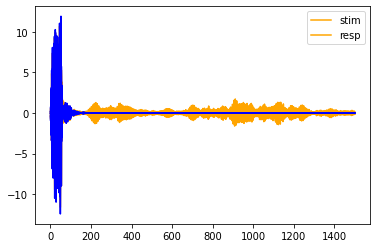

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
eyedee = str(1)  # ID OF THE EXPERIMENT.
o_dim = int(5)   # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(0)
num_blocks_end   = int(1)
lambda_          = float(0.1)
mid_shape        = int(9)
# D                = [0,0.05,0.02]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par    = 1e-4
# o_dim      = 1
use_all_singular_values = False
best_only  = True
print(f"eyedee    : {eyedee}")
print(f"best_only : {best_only}")
print(f"epoch_num : {epoch_num}")
print(f"dropout   : {dropout}")
device = torch.device('cuda')
torch.cuda.empty_cache()
# CREATING A FOLDER TO STORE THE RESULTS
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_"
path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
i = 1
while path.exists(path_name):
    path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
    i = i + 1
del i
os.mkdir(path_name)
print(path_name)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

###############################################
## freqs
fmin = 3  # frecuencia mínima
fmax = 34 # frecuencia máxima
BW   = 2  # tamaño de ancho de banda
overlap = 0.25
step = BW*(1-overlap) # tamaño de traslape
freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
a = list()
b = list()
freqs_ = list()
N = 2 # Numero de orden del filtro
for fil in range(21):
    b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
    # b_, a_ = butter(N=N,Wn=Wn,btype='band')
    b.append(b_)
    a.append(a_)
freqs_.append([b,a])
###############################################

##################### SEED #####################
seed = np.ceil(np.random.rand(10)*100)
seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
print(seed)

###############################################
D = [0.05, 0.1, 0.2]
# D = [0.05, 0.2]
# CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
# COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
# lambda_       = 0.1
# MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
# IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
# mid_shape  = 60
speech_dmcca = True
if speech_dmcca:
    num_blocks = 10        # IF SPEECH DATA BY LIBERTO ET AL.

    # subs ARE THE SUBJECTS IDS TO WORK WITH
    subs = [5]       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    subs = sorted(subs) # TO KEEP THEIR IDS SORTED
    n_subs = len(subs)

    str_subs = str(subs[0])
    for each_sub in subs[1:]: 
        str_subs += f"_{each_sub}"

    # num_blocks_start = 0
    # num_blocks_end   = 1
    # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
    # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

    tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
    val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

    print(f"n_subs     : {n_subs}")
    print(f"subs       : {subs}")
    print(f"D          : {D}")
    print(f"num_blocks : {num_blocks}")
    print(f"num_blocks_start: {num_blocks_start}")
    print(f"num_blocks_end  : {num_blocks_end}")
    print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

    for d_cnt, dropout in enumerate(D):
        for block in range(num_blocks_start, num_blocks_end):
            # THE DATA data_subs_pre IS LOADED SUCH THAT 
            # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
            # AND THE LAST LIST HAS STIMULUS
            # data_subs_pre IS A list OF SIZE N+1
            # EACH ELEMENT IS A list OF SIZE 3
            # SUCH THAT
            # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
            # AND
            # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
            data_subs_pre = load_dmcca_data3(subs, mid_shape, block)
            # DEEP MCCA
            print("DEEP MCCA + LCCA")
            dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
            tst_corrs[0, block, d_cnt] = dmlcs[0]
            tst_corrs[1, block, d_cnt] = dmdcs[0]
            print(tst_corrs)
            val_corrs[0, block, d_cnt] = dmlcs[1]
            val_corrs[1, block, d_cnt] = dmdcs[1]
            print(val_corrs)
            np.save(tst_corrs_name, tst_corrs)
            np.save(val_corrs_name, val_corrs)
            print('saved SPEECH')

# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

# prueba de envolvente con los trials de grupo 1

eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_dmcca_1_0_1_0.1_8_0.05_1/
[93.]
n_subs     : 1
subs       : [5]
D          : [0.05, 0.02, 0.2]
num_blocks : 20
num_blocks_start: 0
num_blocks_end  : 1
num_blocks_net  : 1
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     93.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277824124374 - 0.6249906067120827 = 0.2537287771701813
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.34187063574790955 = 0.28204071521759033
torch.Size([1501, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.15285290777683258 = 0.3009425103664398
  val. loss is : -0.2820 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.31622778089706505 - 0.6248990448854738 = 0.2537378966808319
  Validation corr LOSS : 0.3162
0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.966994506831047
CCA Model Ended.
LCCA is : [array(0.96699451), array(0.93987126)]
DMDC corrs are : [0.96699451]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     93.0
EPOCH : 0
  Training CORRELATION   : -0.0201
  Validation CORRELATION : 0.0215
  Test CORRELATION       : -0.0369
  val. loss is : -0.0215 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0207
  Validation CORRELATION : 0.0333
  Test CORRELATION       : 0.0018
  val. loss is : -0.0333 & the min. loss is : -0.0215
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0072
  Test CORRELATION       : nan
  val. loss is : -0.0072 & the min. loss is : -0.0333
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0060
  Validation CORRELATION : -0.0036
  Test 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00266181, dtype=float32), array(-0.00266181, dtype=float32)]
DMDC corrs are : [-0.00266181]
DONE speech - block_0_drpt_0.05.
[[[[ 0.96699451]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9726735532944454
CCA Model Ended.
LCCA is : [array(0.97267355), array(0.92750587)]
DMDC corrs are : [0.97267355]
DMCCA + DCCA : block_0_drpt_0.02
DCCA for block_0_drpt_0.02_sub_0
seed:     93.0
EPOCH : 0
  Training CORRELATION   : -0.0233
  Validation CORRELATION : -0.0111
  Test CORRELATION       : 0.0076
  val. loss is : 0.0111 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0035
  Validation CORRELATION : 0.0105
  Test CORRELATION       : 0.0048
  val. loss is : -0.0105 & the min. loss is : 0.0111
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0011
  Validation CORRELATION : 0.0163
  Test CORRELATION       : 0.0029
  val. loss is : -0.0163 & the min. loss is : -0.0105
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0144
  Validation CORRELATION : -0.0032
  Tes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00854453, dtype=float32), array(0.00854453, dtype=float32)]
DMDC corrs are : [0.00854453]
DONE speech - block_0_drpt_0.02.
[[[[ 0.96699451]
   [ 0.97267355]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.   

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.8375959640869322
CCA Model Ended.
LCCA is : [array(0.83759596), array(0.8298515)]
DMDC corrs are : [0.83759596]
DMCCA + DCCA : block_0_drpt_0.2
DCCA for block_0_drpt_0.2_sub_0
seed:     93.0
EPOCH : 0
  Training CORRELATION   : 0.0153
  Validation CORRELATION : 0.0149
  Test CORRELATION       : 0.0193
  val. loss is : -0.0149 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0102
  Validation CORRELATION : -0.0324
  Test CORRELATION       : 0.0453
  val. loss is : 0.0324 & the min. loss is : -0.0149
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0036
  Validation CORRELATION : 0.0159
  Test CORRELATION       : 0.0121
  val. loss is : -0.0159 & the min. loss is : -0.0149
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0084
  Validation CORRELATION : 0.0274
  Test 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.0376744, dtype=float32), array(-0.0376744, dtype=float32)]
DMDC corrs are : [-0.0376744]
DONE speech - block_0_drpt_0.2.
[[[[ 0.96699451]
   [ 0.97267355]
   [ 0.83759596]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.    

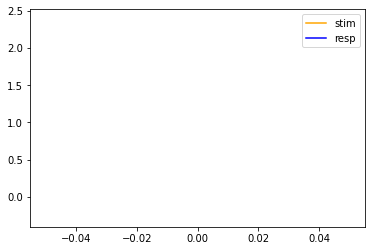

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
eyedee = str(1)  # ID OF THE EXPERIMENT.
o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(0)
num_blocks_end   = int(1)
lambda_          = float(0.1)
mid_shape        = int(8)
D                = [0.05,0.02,0.2]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par    = 1e-4
# o_dim      = 1
use_all_singular_values = False
best_only  = True
print(f"eyedee    : {eyedee}")
print(f"best_only : {best_only}")
print(f"epoch_num : {epoch_num}")
print(f"dropout   : {dropout}")
device = torch.device('cuda')
torch.cuda.empty_cache()
# CREATING A FOLDER TO STORE THE RESULTS
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_"
path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
i = 1
while path.exists(path_name):
    path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
    i = i + 1
del i
os.mkdir(path_name)
print(path_name)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

###############################################
## freqs
fmin = 3  # frecuencia mínima
fmax = 34 # frecuencia máxima
BW   = 2  # tamaño de ancho de banda
overlap = 0.25
step = BW*(1-overlap) # tamaño de traslape
freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
a = list()
b = list()
freqs_ = list()
N = 2 # Numero de orden del filtro
for fil in range(21):
    b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
    # b_, a_ = butter(N=N,Wn=Wn,btype='band')
    b.append(b_)
    a.append(a_)
freqs_.append([b,a])
###############################################

##################### SEED #####################
seed = np.ceil(np.random.rand(10)*100)
seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
print(seed)

###############################################
# D = [0, 0.05, 0.1, 0.2]
# D = [0.05, 0.2]
# CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
# COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
# lambda_       = 0.1
# MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
# IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
# mid_shape  = 60
speech_dmcca = True
if speech_dmcca:
    num_blocks = 20        # IF SPEECH DATA BY LIBERTO ET AL.

    # subs ARE THE SUBJECTS IDS TO WORK WITH
    subs = [5]       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    subs = sorted(subs) # TO KEEP THEIR IDS SORTED
    n_subs = len(subs)

    str_subs = str(subs[0])
    for each_sub in subs[1:]: 
        str_subs += f"_{each_sub}"

    # num_blocks_start = 0
    # num_blocks_end   = 1
    # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
    # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

    tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
    val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

    print(f"n_subs     : {n_subs}")
    print(f"subs       : {subs}")
    print(f"D          : {D}")
    print(f"num_blocks : {num_blocks}")
    print(f"num_blocks_start: {num_blocks_start}")
    print(f"num_blocks_end  : {num_blocks_end}")
    print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

    for d_cnt, dropout in enumerate(D):
        for block in range(num_blocks_start, num_blocks_end):
            # THE DATA data_subs_pre IS LOADED SUCH THAT 
            # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
            # AND THE LAST LIST HAS STIMULUS
            # data_subs_pre IS A list OF SIZE N+1
            # EACH ELEMENT IS A list OF SIZE 3
            # SUCH THAT
            # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
            # AND
            # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
            data_subs_pre = load_dmcca_data3(subs, mid_shape, block)
            # DEEP MCCA
            print("DEEP MCCA + LCCA")
            dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
            tst_corrs[0, block, d_cnt] = dmlcs[0]
            tst_corrs[1, block, d_cnt] = dmdcs[0]
            print(tst_corrs)
            val_corrs[0, block, d_cnt] = dmlcs[1]
            val_corrs[1, block, d_cnt] = dmdcs[1]
            print(val_corrs)
            np.save(tst_corrs_name, tst_corrs)
            np.save(val_corrs_name, val_corrs)
            print('saved SPEECH')

# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

# prueba de grupo 1 con envolvente

eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_dmcca_1_0_2_0.1_8_0.05_1/
[17.]
n_subs     : 1
subs       : [5]
D          : [0.05, 0.02, 0.2]
num_blocks : 2
num_blocks_start: 0
num_blocks_end  : 2
num_blocks_net  : 2
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277847696832 - 0.6249865748114505 = 0.2537292242050171
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.34566399455070496 = 0.28166136145591736
torch.Size([1501, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.1545804888010025 = 0.30076971650123596
  val. loss is : -0.2817 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.31622777752957104 - 0.6250704324851601 = 0.253720760345459
  Validation corr LOSS : 0.3162
0.31

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9256091426335538
CCA Model Ended.
LCCA is : [array(0.92560914), array(0.86557349)]
DMDC corrs are : [0.92560914]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : 0.0104
  Validation CORRELATION : 0.0157
  Test CORRELATION       : -0.0710
  val. loss is : -0.0157 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0057
  Validation CORRELATION : -0.0103
  Test CORRELATION       : 0.0279
  val. loss is : 0.0103 & the min. loss is : -0.0157
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0106
  Validation CORRELATION : 0.0179
  Test CORRELATION       : -0.0667
  val. loss is : -0.0179 & the min. loss is : -0.0157
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0100
  Validation CORRELATION : -0.0195


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.06855629, dtype=float32), array(-0.06855629, dtype=float32)]
DMDC corrs are : [-0.06855629]
DONE speech - block_0_drpt_0.05.
[[[[ 0.92560914]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]]


 [[[-0.06855629]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]]]
[[[[ 0.86557349]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]]


 [[[-0.06855629]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]
   [ 0.        ]]]]
saved SPEECH
block: 1
Data INITIALIZING for block : 1
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277847696832 - 0.6249865748114505 = 0.2537292242050171
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.1545804888010025 = 0.30076971650123596
torch.Size([1448, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.34566399455070496 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9163271701407067
CCA Model Ended.
LCCA is : [array(0.91632717), array(0.88179903)]
DMDC corrs are : [0.91632717]
DMCCA + DCCA : block_1_drpt_0.05
DCCA for block_1_drpt_0.05_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : 0.0104
  Validation CORRELATION : -0.0710
  Test CORRELATION       : 0.0157
  val. loss is : 0.0710 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0057
  Validation CORRELATION : 0.0279
  Test CORRELATION       : -0.0103
  val. loss is : -0.0279 & the min. loss is : 0.0710
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0028
  Validation CORRELATION : 0.0154
  Test CORRELATION       : -0.0096
  val. loss is : -0.0154 & the min. loss is : -0.0279
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0037
  Validation CORRELATION : -0.0135

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00238197, dtype=float32), array(-0.00238197, dtype=float32)]
DMDC corrs are : [-0.00238197]
DONE speech - block_1_drpt_0.05.
[[[[ 0.92560914]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.91632717]
   [ 0.        ]
   [ 0.        ]]]


 [[[-0.06855629]
   [ 0.        ]
   [ 0.        ]]

  [[-0.00238197]
   [ 0.        ]
   [ 0.        ]]]]
[[[[ 0.86557349]
   [ 0.        ]
   [ 0.        ]]

  [[ 0.88179903]
   [ 0.        ]
   [ 0.        ]]]


 [[[-0.06855629]
   [ 0.        ]
   [ 0.        ]]

  [[-0.00238197]
   [ 0.        ]
   [ 0.        ]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277842645591 - 0.6249664856889153 = 0.2537311017513275
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.3463001251220703 = 0.2815977931022644
torch.Size([1501, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.1548728346824646 = 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9635374647361615
CCA Model Ended.
LCCA is : [array(0.96353746), array(0.90584173)]
DMDC corrs are : [0.96353746]
DMCCA + DCCA : block_0_drpt_0.02
DCCA for block_0_drpt_0.02_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : 0.0271
  Validation CORRELATION : 0.0129
  Test CORRELATION       : -0.0151
  val. loss is : -0.0129 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0172
  Validation CORRELATION : -0.0096
  Test CORRELATION       : 0.0121
  val. loss is : 0.0096 & the min. loss is : -0.0129
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0047
  Validation CORRELATION : -0.0060
  Test CORRELATION       : 0.0096
  val. loss is : 0.0060 & the min. loss is : -0.0129
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.01882264, dtype=float32), array(-0.01882264, dtype=float32)]
DMDC corrs are : [-0.01882264]
DONE speech - block_0_drpt_0.02.
[[[[ 0.92560914]
   [ 0.96353746]
   [ 0.        ]]

  [[ 0.91632717]
   [ 0.        ]
   [ 0.        ]]]


 [[[-0.06855629]
   [-0.01882264]
   [ 0.        ]]

  [[-0.00238197]
   [ 0.        ]
   [ 0.        ]]]]
[[[[ 0.86557349]
   [ 0.90584173]
   [ 0.        ]]

  [[ 0.88179903]
   [ 0.        ]
   [ 0.        ]]]


 [[[-0.06855629]
   [-0.01882264]
   [ 0.        ]]

  [[-0.00238197]
   [ 0.        ]
   [ 0.        ]]]]
saved SPEECH
block: 1
Data INITIALIZING for block : 1
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277842645591 - 0.6249664856889153 = 0.2537311017513275
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.1548728346824646 = 0.30074048042297363
torch.Size([1448, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.3463001251220703 =

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9599121938550081
CCA Model Ended.
LCCA is : [array(0.95991219), array(0.9038063)]
DMDC corrs are : [0.95991219]
DMCCA + DCCA : block_1_drpt_0.02
DCCA for block_1_drpt_0.02_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : 0.0271
  Validation CORRELATION : -0.0151
  Test CORRELATION       : 0.0129
  val. loss is : 0.0151 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0172
  Validation CORRELATION : 0.0121
  Test CORRELATION       : -0.0096
  val. loss is : -0.0121 & the min. loss is : 0.0151
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0011
  Validation CORRELATION : 0.0031
  Test CORRELATION       : 0.0009
  val. loss is : -0.0031 & the min. loss is : -0.0121
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0036
  Validation CORRELATION : 0.0027
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00076538, dtype=float32), array(-0.00076538, dtype=float32)]
DMDC corrs are : [-0.00076538]
DONE speech - block_1_drpt_0.02.
[[[[ 9.25609143e-01]
   [ 9.63537465e-01]
   [ 0.00000000e+00]]

  [[ 9.16327170e-01]
   [ 9.59912194e-01]
   [ 0.00000000e+00]]]


 [[[-6.85562864e-02]
   [-1.88226402e-02]
   [ 0.00000000e+00]]

  [[-2.38197343e-03]
   [-7.65379053e-04]
   [ 0.00000000e+00]]]]
[[[[ 8.65573488e-01]
   [ 9.05841734e-01]
   [ 0.00000000e+00]]

  [[ 8.81799029e-01]
   [ 9.03806300e-01]
   [ 0.00000000e+00]]]


 [[[-6.85562864e-02]
   [-1.88226402e-02]
   [ 0.00000000e+00]]

  [[-2.38197343e-03]
   [-7.65379053e-04]
   [ 0.00000000e+00]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622778039194094 - 0.6250346387173497 = 0.2537243366241455
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.34273549914360046 = 0.2819542288780212

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.8901216759051146
CCA Model Ended.
LCCA is : [array(0.89012168), array(0.83566722)]
DMDC corrs are : [0.89012168]
DMCCA + DCCA : block_0_drpt_0.2
DCCA for block_0_drpt_0.2_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : -0.0095
  Validation CORRELATION : 0.0069
  Test CORRELATION       : 0.0156
  val. loss is : -0.0069 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0067
  Validation CORRELATION : -0.0063
  Test CORRELATION       : -0.0005
  val. loss is : 0.0063 & the min. loss is : -0.0069
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0179
  Validation CORRELATION : 0.0261
  Test CORRELATION       : -0.0794
  val. loss is : -0.0261 & the min. loss is : -0.0069
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0040
  Validation CORRELATION : 0.0400
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.03107312, dtype=float32), array(0.03107312, dtype=float32)]
DMDC corrs are : [0.03107312]
DONE speech - block_0_drpt_0.2.
[[[[ 9.25609143e-01]
   [ 9.63537465e-01]
   [ 8.90121676e-01]]

  [[ 9.16327170e-01]
   [ 9.59912194e-01]
   [ 0.00000000e+00]]]


 [[[-6.85562864e-02]
   [-1.88226402e-02]
   [ 3.10731158e-02]]

  [[-2.38197343e-03]
   [-7.65379053e-04]
   [ 0.00000000e+00]]]]
[[[[ 8.65573488e-01]
   [ 9.05841734e-01]
   [ 8.35667219e-01]]

  [[ 8.81799029e-01]
   [ 9.03806300e-01]
   [ 0.00000000e+00]]]


 [[[-6.85562864e-02]
   [-1.88226402e-02]
   [ 3.10731158e-02]]

  [[-2.38197343e-03]
   [-7.65379053e-04]
   [ 0.00000000e+00]]]]
saved SPEECH
block: 1
Data INITIALIZING for block : 1
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     17.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622778039194094 - 0.6250346387173497 = 0.2537243366241455
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.1532420516014099 = 0.3009035885334015
torc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.8828787267660055
CCA Model Ended.
LCCA is : [array(0.88287873), array(0.84284491)]
DMDC corrs are : [0.88287873]
DMCCA + DCCA : block_1_drpt_0.2
DCCA for block_1_drpt_0.2_sub_0
seed:     17.0
EPOCH : 0
  Training CORRELATION   : -0.0095
  Validation CORRELATION : 0.0156
  Test CORRELATION       : 0.0069
  val. loss is : -0.0156 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0067
  Validation CORRELATION : -0.0005
  Test CORRELATION       : -0.0063
  val. loss is : 0.0005 & the min. loss is : -0.0156
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0179
  Validation CORRELATION : -0.0794
  Test CORRELATION       : 0.0261
  val. loss is : 0.0794 & the min. loss is : -0.0156
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0104
  Validation CORRELATION : -0.0689

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.02788809, dtype=float32), array(0.02788809, dtype=float32)]
DMDC corrs are : [0.02788809]
DONE speech - block_1_drpt_0.2.
[[[[ 9.25609143e-01]
   [ 9.63537465e-01]
   [ 8.90121676e-01]]

  [[ 9.16327170e-01]
   [ 9.59912194e-01]
   [ 8.82878727e-01]]]


 [[[-6.85562864e-02]
   [-1.88226402e-02]
   [ 3.10731158e-02]]

  [[-2.38197343e-03]
   [-7.65379053e-04]
   [ 2.78880857e-02]]]]
[[[[ 8.65573488e-01]
   [ 9.05841734e-01]
   [ 8.35667219e-01]]

  [[ 8.81799029e-01]
   [ 9.03806300e-01]
   [ 8.42844915e-01]]]


 [[[-6.85562864e-02]
   [-1.88226402e-02]
   [ 3.10731158e-02]]

  [[-2.38197343e-03]
   [-7.65379053e-04]
   [ 2.78880857e-02]]]]
saved SPEECH


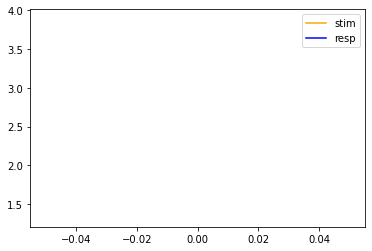

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
eyedee = str(1)  # ID OF THE EXPERIMENT.
o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(0)
num_blocks_end   = int(2)
lambda_          = float(0.1)
mid_shape        = int(8)
D                = [0.05,0.02,0.2]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par    = 1e-4
# o_dim      = 1
use_all_singular_values = False
best_only  = True
print(f"eyedee    : {eyedee}")
print(f"best_only : {best_only}")
print(f"epoch_num : {epoch_num}")
print(f"dropout   : {dropout}")
device = torch.device('cuda')
torch.cuda.empty_cache()
# CREATING A FOLDER TO STORE THE RESULTS
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_"
path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
i = 1
while path.exists(path_name):
    path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
    i = i + 1
del i
os.mkdir(path_name)
print(path_name)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

###############################################
## freqs
fmin = 3  # frecuencia mínima
fmax = 34 # frecuencia máxima
BW   = 2  # tamaño de ancho de banda
overlap = 0.25
step = BW*(1-overlap) # tamaño de traslape
freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
a = list()
b = list()
freqs_ = list()
N = 2 # Numero de orden del filtro
for fil in range(21):
    b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
    # b_, a_ = butter(N=N,Wn=Wn,btype='band')
    b.append(b_)
    a.append(a_)
freqs_.append([b,a])
###############################################

##################### SEED #####################
seed = np.ceil(np.random.rand(10)*100)
seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
print(seed)

###############################################
# D = [0, 0.05, 0.1, 0.2]
# D = [0.05, 0.2]
# CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
# COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
# lambda_       = 0.1
# MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
# IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
# mid_shape  = 60
speech_dmcca = True
if speech_dmcca:
    num_blocks = 2        # IF SPEECH DATA BY LIBERTO ET AL.

    # subs ARE THE SUBJECTS IDS TO WORK WITH
    subs = [5]       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    subs = sorted(subs) # TO KEEP THEIR IDS SORTED
    n_subs = len(subs)

    str_subs = str(subs[0])
    for each_sub in subs[1:]: 
        str_subs += f"_{each_sub}"

    # num_blocks_start = 0
    # num_blocks_end   = 1
    # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
    # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

    tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
    val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

    print(f"n_subs     : {n_subs}")
    print(f"subs       : {subs}")
    print(f"D          : {D}")
    print(f"num_blocks : {num_blocks}")
    print(f"num_blocks_start: {num_blocks_start}")
    print(f"num_blocks_end  : {num_blocks_end}")
    print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

    for d_cnt, dropout in enumerate(D):
        for block in range(num_blocks_start, num_blocks_end):
            # THE DATA data_subs_pre IS LOADED SUCH THAT 
            # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
            # AND THE LAST LIST HAS STIMULUS
            # data_subs_pre IS A list OF SIZE N+1
            # EACH ELEMENT IS A list OF SIZE 3
            # SUCH THAT
            # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
            # AND
            # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
            data_subs_pre = load_dmcca_data3(subs, mid_shape, block)
            # DEEP MCCA
            print("DEEP MCCA + LCCA")
            dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
            tst_corrs[0, block, d_cnt] = dmlcs[0]
            tst_corrs[1, block, d_cnt] = dmdcs[0]
            print(tst_corrs)
            val_corrs[0, block, d_cnt] = dmlcs[1]
            val_corrs[1, block, d_cnt] = dmdcs[1]
            print(val_corrs)
            np.save(tst_corrs_name, tst_corrs)
            np.save(val_corrs_name, val_corrs)
            print('saved SPEECH')

# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
print(tst_corrs)

[[[[9.70127298e-01]
   [9.31354274e-01]
   [7.91402503e-01]]]


 [[[4.28949716e-03]
   [5.62073197e-04]
   [1.90229819e-03]]]]


# Prueba de grupo 1 con RMS

eyedee    : 2
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_dmcca_2_0_1_0.1_8_0.05_12/
[89.]
n_subs     : 1
subs       : [5]
D          : [0.05, 0.02, 0.2]
num_blocks : 1
num_blocks_start: 0
num_blocks_end  : 1
num_blocks_net  : 1
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     89.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277828244602 - 0.17275429350488325 = 0.2989523410797119
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.12715965509414673 = 0.3035117983818054
torch.Size([786, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.12715965509414673 = 0.3035117983818054
  val. loss is : -0.3035 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.31622778317507577 - 0.17281441443106707 = 0.2989463210105896
  Validation corr LOSS : 0.3162
0.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.794822656408974
CCA Model Ended.
LCCA is : [array(0.79482266), array(0.71850363)]
DMDC corrs are : [0.79482266]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     89.0
EPOCH : 0
  Training CORRELATION   : 0.0123
  Validation CORRELATION : -0.0076
  Test CORRELATION       : -0.0076
  val. loss is : 0.0076 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0082
  Validation CORRELATION : -0.0536
  Test CORRELATION       : -0.0536
  val. loss is : 0.0536 & the min. loss is : 0.0076
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0093
  Validation CORRELATION : 0.0460
  Test CORRELATION       : 0.0460
  val. loss is : -0.0460 & the min. loss is : 0.0076
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0077
  Validation CORRELATION : -0.0675
  Te

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.07002074, dtype=float32), array(0.07002074, dtype=float32)]
DMDC corrs are : [0.07002074]
DONE speech - block_0_drpt_0.05.
[[[[0.79482266]
   [0.        ]
   [0.        ]]]


 [[[0.07002074]
   [0.        ]
   [0.        ]]]]
[[[[0.71850363]
   [0.        ]
   [0.        ]]]


 [[[0.07002074]
   [0.        ]
   [0.        ]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     89.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622778422692244 - 0.17274749471860773 = 0.29895299673080444
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.12713634967803955 = 0.30351412296295166
torch.Size([786, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.12713634967803955 = 0.30351412296295166
  val. loss is : -0.3035 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277786170735 - 0.17281611281

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.7809685652095086
CCA Model Ended.
LCCA is : [array(0.78096857), array(0.69736953)]
DMDC corrs are : [0.78096857]
DMCCA + DCCA : block_0_drpt_0.02
DCCA for block_0_drpt_0.02_sub_0
seed:     89.0
EPOCH : 0
  Training CORRELATION   : -0.0009
  Validation CORRELATION : -0.0288
  Test CORRELATION       : -0.0288
  val. loss is : 0.0288 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0075
  Validation CORRELATION : 0.0229
  Test CORRELATION       : 0.0229
  val. loss is : -0.0229 & the min. loss is : 0.0288
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0130
  Validation CORRELATION : -0.0636
  Test CORRELATION       : -0.0636
  val. loss is : 0.0636 & the min. loss is : -0.0229
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0150
  Validation CORRELATION : -0.0346


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.08332019, dtype=float32), array(0.08332019, dtype=float32)]
DMDC corrs are : [0.08332019]
DONE speech - block_0_drpt_0.02.
[[[[0.79482266]
   [0.78096857]
   [0.        ]]]


 [[[0.07002074]
   [0.08332019]
   [0.        ]]]]
[[[[0.71850363]
   [0.69736953]
   [0.        ]]]


 [[[0.07002074]
   [0.08332019]
   [0.        ]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     89.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277800195357 - 0.17276893766487347 = 0.2989508807659149
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.1272754967212677 = 0.3035002052783966
torch.Size([786, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.1272754967212677 = 0.3035002052783966
  val. loss is : -0.3035 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277817726135 - 0.1728171581731123 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.8341842607136983
CCA Model Ended.
LCCA is : [array(0.83418426), array(0.76655782)]
DMDC corrs are : [0.83418426]
DMCCA + DCCA : block_0_drpt_0.2
DCCA for block_0_drpt_0.2_sub_0
seed:     89.0
EPOCH : 0
  Training CORRELATION   : 0.0023
  Validation CORRELATION : 0.0033
  Test CORRELATION       : 0.0033
  val. loss is : -0.0033 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0112
  Validation CORRELATION : 0.0487
  Test CORRELATION       : 0.0487
  val. loss is : -0.0487 & the min. loss is : -0.0033
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0113
  Validation CORRELATION : 0.0246
  Test CORRELATION       : 0.0246
  val. loss is : -0.0246 & the min. loss is : -0.0487
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0120
  Validation CORRELATION : 0.0028
  Test

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.06621514, dtype=float32), array(0.06621514, dtype=float32)]
DMDC corrs are : [0.06621514]
DONE speech - block_0_drpt_0.2.
[[[[0.79482266]
   [0.78096857]
   [0.83418426]]]


 [[[0.07002074]
   [0.08332019]
   [0.06621514]]]]
[[[[0.71850363]
   [0.69736953]
   [0.76655782]]]


 [[[0.07002074]
   [0.08332019]
   [0.06621514]]]]
saved SPEECH


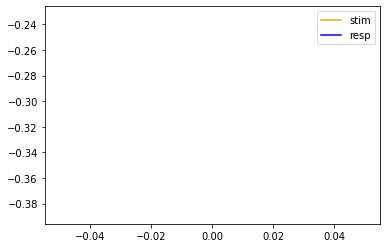

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
eyedee = str(2)  # ID OF THE EXPERIMENT.
o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(0)
num_blocks_end   = int(1)
lambda_          = float(0.1)
mid_shape        = int(8)
D                = [0.05,0.02,0.2]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par    = 1e-4
# o_dim      = 1
use_all_singular_values = False
best_only  = True
print(f"eyedee    : {eyedee}")
print(f"best_only : {best_only}")
print(f"epoch_num : {epoch_num}")
print(f"dropout   : {dropout}")
device = torch.device('cuda')
torch.cuda.empty_cache()
# CREATING A FOLDER TO STORE THE RESULTS
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_"
path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
i = 1
while path.exists(path_name):
    path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
    i = i + 1
del i
os.mkdir(path_name)
print(path_name)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

###############################################
## freqs
fmin = 3  # frecuencia mínima
fmax = 34 # frecuencia máxima
BW   = 2  # tamaño de ancho de banda
overlap = 0.25
step = BW*(1-overlap) # tamaño de traslape
freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
a = list()
b = list()
freqs_ = list()
N = 2 # Numero de orden del filtro
for fil in range(21):
    b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
    # b_, a_ = butter(N=N,Wn=Wn,btype='band')
    b.append(b_)
    a.append(a_)
freqs_.append([b,a])
###############################################

##################### SEED #####################
seed = np.ceil(np.random.rand(10)*100)
seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
print(seed)

###############################################
# D = [0, 0.05, 0.1, 0.2]
# D = [0.05, 0.2]
# CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
# COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
# lambda_       = 0.1
# MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
# IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
# mid_shape  = 60
speech_dmcca = True
if speech_dmcca:
    num_blocks = 1        # IF SPEECH DATA BY LIBERTO ET AL.

    # subs ARE THE SUBJECTS IDS TO WORK WITH
    subs = [5]       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    subs = sorted(subs) # TO KEEP THEIR IDS SORTED
    n_subs = len(subs)

    str_subs = str(subs[0])
    for each_sub in subs[1:]: 
        str_subs += f"_{each_sub}"

    # num_blocks_start = 0
    # num_blocks_end   = 1
    # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
    # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

    tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
    val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

    print(f"n_subs     : {n_subs}")
    print(f"subs       : {subs}")
    print(f"D          : {D}")
    print(f"num_blocks : {num_blocks}")
    print(f"num_blocks_start: {num_blocks_start}")
    print(f"num_blocks_end  : {num_blocks_end}")
    print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

    for d_cnt, dropout in enumerate(D):
        for block in range(num_blocks_start, num_blocks_end):
            # THE DATA data_subs_pre IS LOADED SUCH THAT 
            # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
            # AND THE LAST LIST HAS STIMULUS
            # data_subs_pre IS A list OF SIZE N+1
            # EACH ELEMENT IS A list OF SIZE 3
            # SUCH THAT
            # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
            # AND
            # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
            data_subs_pre = load_dmcca_data4(subs, mid_shape, block)
            # DEEP MCCA
            print("DEEP MCCA + LCCA")
            dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
            tst_corrs[0, block, d_cnt] = dmlcs[0]
            tst_corrs[1, block, d_cnt] = dmdcs[0]
            print(tst_corrs)
            val_corrs[0, block, d_cnt] = dmlcs[1]
            val_corrs[1, block, d_cnt] = dmdcs[1]
            print(val_corrs)
            np.save(tst_corrs_name, tst_corrs)
            np.save(val_corrs_name, val_corrs)
            print('saved SPEECH')

# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

# Prueba de grupo 1 con flujo espectral

eyedee    : 2
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_dmcca_2_0_1_0.1_8_0.05_17/
[43.]
n_subs     : 1
subs       : [5]
D          : [0.05, 0.1, 0.2]
num_blocks : 1
num_blocks_start: 0
num_blocks_end  : 1
num_blocks_net  : 1
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     43.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622778072076685 - 311657.63272058824 = -31165.447265625
  Validation corr LOSS : 0.3162
0.3162277936935425 - 205757.59375 = -20575.443359375
torch.Size([785, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 205757.59375 = -20575.443359375
  val. loss is : 20575.4434 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.31622778247384464 - 300619.95735294116 = -30061.673828125
  Validation corr LOSS : 0.3162
0.3162277340888977 - 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.15954492360350817
CCA Model Ended.
LCCA is : [array(0.15954492), array(0.15054993)]
DMDC corrs are : [0.15954492]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : nan
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : nan
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan

/content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG/cca_functions.py:229: RuntimeWarning: invalid value encountered in true_divide
  x = x / np.sqrt(var)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(nan, dtype=float32), array(nan, dtype=float32)]
DMDC corrs are : [nan]
DONE speech - block_0_drpt_0.05.
[[[[0.15954492]
   [0.        ]
   [0.        ]]]


 [[[       nan]
   [0.        ]
   [0.        ]]]]
[[[[0.15054993]
   [0.        ]
   [0.        ]]]


 [[[       nan]
   [0.        ]
   [0.        ]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     43.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277810713824 - 311669.1617647059 = -31166.599609375
  Validation corr LOSS : 0.3162
0.3162277936935425 - 205767.140625 = -20576.3984375
torch.Size([785, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 205767.140625 = -20576.3984375
  val. loss is : 20576.3984 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277796689202 - 300628.2375 = -30062.51171875
  Validation corr LOSS : 0.3

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.03253667300974652
CCA Model Ended.
LCCA is : [array(0.03253667), array(0.01921197)]
DMDC corrs are : [0.03253667]
DMCCA + DCCA : block_0_drpt_0.1
DCCA for block_0_drpt_0.1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0000
  Test CORRELATION       : 0.0000
  val. loss is : -0.0000 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0057
  Validation CORRELATION : -0.0714
  Test CORRELATION       : -0.0714
  val. loss is : 0.0714 & the min. loss is : -0.0000
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : -0.0000
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0064
  Validation CORRELATION : -0.0906
  Test CORREL

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.09545118, dtype=float32), array(0.09545118, dtype=float32)]
DMDC corrs are : [0.09545118]
DONE speech - block_0_drpt_0.1.
[[[[0.15954492]
   [0.03253667]
   [0.        ]]]


 [[[       nan]
   [0.09545118]
   [0.        ]]]]
[[[[0.15054993]
   [0.01921197]
   [0.        ]]]


 [[[       nan]
   [0.09545118]
   [0.        ]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     43.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277821232291 - 311680.94227941177 = -31167.78515625
  Validation corr LOSS : 0.3162
0.3162277936935425 - 205776.796875 = -20577.36328125
torch.Size([785, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 205776.796875 = -20577.36328125
  val. loss is : 20577.3633 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277835256913 - 300649.06470588234 = -30064.5859375


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.213062174242681
CCA Model Ended.
LCCA is : [array(0.21306217), array(0.20339272)]
DMDC corrs are : [0.21306217]
DMCCA + DCCA : block_0_drpt_0.2
DCCA for block_0_drpt_0.2_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0050
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : nan
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0014
  Validation CORRELATION : -0.0171
  Test CORRELATION       : -0.0171
  val. loss is : 0.0171 & the min. loss is : nan
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-3.9022707e-06, dtype=float32), array(-3.9022707e-06, dtype=float32)]
DMDC corrs are : [-3.90227069e-06]
DONE speech - block_0_drpt_0.2.
[[[[ 1.59544924e-01]
   [ 3.25366730e-02]
   [ 2.13062174e-01]]]


 [[[            nan]
   [ 9.54511836e-02]
   [-3.90227069e-06]]]]
[[[[ 1.50549934e-01]
   [ 1.92119666e-02]
   [ 2.03392718e-01]]]


 [[[            nan]
   [ 9.54511836e-02]
   [-3.90227069e-06]]]]
saved SPEECH


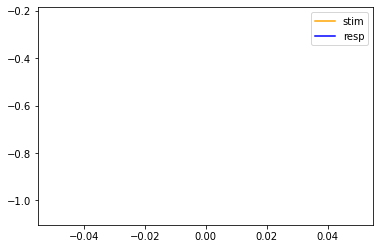

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
eyedee = str(2)  # ID OF THE EXPERIMENT.
o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(0)
num_blocks_end   = int(1)
lambda_          = float(0.1)
mid_shape        = int(8)
D                = [0.05,0.1,0.2]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par    = 1e-4
# o_dim      = 1
use_all_singular_values = False
best_only  = True
print(f"eyedee    : {eyedee}")
print(f"best_only : {best_only}")
print(f"epoch_num : {epoch_num}")
print(f"dropout   : {dropout}")
device = torch.device('cuda')
torch.cuda.empty_cache()
# CREATING A FOLDER TO STORE THE RESULTS
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/music2_"
path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
i = 1
while path.exists(path_name):
    path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
    i = i + 1
del i
os.mkdir(path_name)
print(path_name)

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

###############################################
## freqs
fmin = 3  # frecuencia mínima
fmax = 34 # frecuencia máxima
BW   = 2  # tamaño de ancho de banda
overlap = 0.25
step = BW*(1-overlap) # tamaño de traslape
freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
a = list()
b = list()
freqs_ = list()
N = 2 # Numero de orden del filtro
for fil in range(21):
    b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
    # b_, a_ = butter(N=N,Wn=Wn,btype='band')
    b.append(b_)
    a.append(a_)
freqs_.append([b,a])
###############################################

##################### SEED #####################
seed = np.ceil(np.random.rand(10)*100)
seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
print(seed)

###############################################
# D = [0, 0.05, 0.1, 0.2]
# D = [0.05, 0.2]
# CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
# COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
# lambda_       = 0.1
# MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
# IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
# mid_shape  = 60
speech_dmcca = True
if speech_dmcca:
    num_blocks = 1        # IF SPEECH DATA BY LIBERTO ET AL.

    # subs ARE THE SUBJECTS IDS TO WORK WITH
    subs = [5]       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    subs = sorted(subs) # TO KEEP THEIR IDS SORTED
    n_subs = len(subs)

    str_subs = str(subs[0])
    for each_sub in subs[1:]: 
        str_subs += f"_{each_sub}"

    # num_blocks_start = 0
    # num_blocks_end   = 1
    # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
    # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

    tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
    tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
    val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

    print(f"n_subs     : {n_subs}")
    print(f"subs       : {subs}")
    print(f"D          : {D}")
    print(f"num_blocks : {num_blocks}")
    print(f"num_blocks_start: {num_blocks_start}")
    print(f"num_blocks_end  : {num_blocks_end}")
    print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

    for d_cnt, dropout in enumerate(D):
        for block in range(num_blocks_start, num_blocks_end):
            # THE DATA data_subs_pre IS LOADED SUCH THAT 
            # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
            # AND THE LAST LIST HAS STIMULUS
            # data_subs_pre IS A list OF SIZE N+1
            # EACH ELEMENT IS A list OF SIZE 3
            # SUCH THAT
            # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
            # AND
            # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
            data_subs_pre = load_dmcca_data5(subs, mid_shape, block)
            # DEEP MCCA
            print("DEEP MCCA + LCCA")
            dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
            tst_corrs[0, block, d_cnt] = dmlcs[0]
            tst_corrs[1, block, d_cnt] = dmdcs[0]
            print(tst_corrs)
            val_corrs[0, block, d_cnt] = dmlcs[1]
            val_corrs[1, block, d_cnt] = dmdcs[1]
            print(val_corrs)
            np.save(tst_corrs_name, tst_corrs)
            np.save(val_corrs_name, val_corrs)
            print('saved SPEECH')

# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
lagGen??

# prueba on lo tres metodos en los 4 grupos

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_dmcca_1_0_1_0.1_8_0.05_1/
[45.]
Grupo 0
n_subs     : 1
subs       : [0]
D          : [0.05, 0.02]
num_blocks : 1
num_blocks_start: 0
num_blocks_end  : 1
num_blocks_net  : 1
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     45.0
Started training.


/content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG/deep_losses.py:35: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:2500.)
  [D1, V1] = torch.symeig(SigmaHat11, eigenvectors=True)


EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277816306977 - 0.6281637994069902 = 0.2534113824367523
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.16905555129051208 = 0.299322247505188
torch.Size([961, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.16905555129051208 = 0.299322247505188
  val. loss is : -0.2993 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.31622778068459223 - 0.6280666173450531 = 0.2534211575984955
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.16359460353851318 = 0.2998683452606201
torch.Size([961, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.16359460353851318 = 0.2998683452606201
  val. loss is : -0.2999 & the min. loss is : -0.2993
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training corr LOSS   : 0.3162
0.3162277828133295 - 0.6280531097972204 = 0.25342249870300293
  Validation corr 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.98544711894353
CCA Model Ended.
LCCA is : [array(0.98544712), array(0.9361102)]
DMDC corrs are : [0.98544712]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     45.0
EPOCH : 0
  Training CORRELATION   : -0.0025
  Validation CORRELATION : -0.0277
  Test CORRELATION       : -0.0277
  val. loss is : 0.0277 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0120
  Validation CORRELATION : -0.0192
  Test CORRELATION       : -0.0192
  val. loss is : 0.0192 & the min. loss is : 0.0277
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0021
  Validation CORRELATION : 0.0310
  Test CORRELATION       : 0.0310
  val. loss is : -0.0310 & the min. loss is : 0.0192
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORRELATI

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.02457958, dtype=float32), array(0.02457958, dtype=float32)]
DMDC corrs are : [0.02457958]
DONE speech - block_0_drpt_0.05.
[[[[0.98544712]
   [0.        ]]]


 [[[0.02457958]
   [0.        ]]]]
[[[[0.9361102 ]
   [0.        ]]]


 [[[0.02457958]
   [0.        ]]]]
saved SPEECH
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     45.0
Started training.
EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622777855585493 - 0.6281299259927537 = 0.2534147799015045
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.16935142874717712 = 0.299292653799057
torch.Size([961, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.16935142874717712 = 0.299292653799057
  val. loss is : -0.2993 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277825768032 - 0.6279910216255794 = 0.25342872738838196
  Validation corr LOSS : 0.3162
0.31622779

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9832812757238351
CCA Model Ended.
LCCA is : [array(0.98328128), array(0.93186051)]
DMDC corrs are : [0.98328128]
DMCCA + DCCA : block_0_drpt_0.02
DCCA for block_0_drpt_0.02_sub_0
seed:     45.0
EPOCH : 0
  Training CORRELATION   : -0.0039
  Validation CORRELATION : nan
  Test CORRELATION       : nan
  val. loss is : nan & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0024
  Validation CORRELATION : -0.0000
  Test CORRELATION       : -0.0000
  val. loss is : 0.0000 & the min. loss is : nan
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0003
  Validation CORRELATION : -0.0000
  Test CORRELATION       : -0.0000
  val. loss is : 0.0000 & the min. loss is : nan
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0063
  Validation CORRELATION : nan
  Test CORRELAT

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(2.1560118e-07, dtype=float32), array(2.1560118e-07, dtype=float32)]
DMDC corrs are : [2.15601176e-07]
DONE speech - block_0_drpt_0.02.
[[[[9.85447119e-01]
   [9.83281276e-01]]]


 [[[2.45795771e-02]
   [2.15601176e-07]]]]
[[[[9.36110200e-01]
   [9.31860513e-01]]]


 [[[2.45795771e-02]
   [2.15601176e-07]]]]
saved SPEECH
Grupo 1
n_subs     : 1
subs       : [1]
D          : [0.05, 0.02]
num_blocks : 1
num_blocks_start: 0
num_blocks_end  : 1
num_blocks_net  : 1
block: 0
Data INITIALIZING for block : 0
DEEP MCCA + LCCA
Started multiway DCCA.


ValueError: ignored

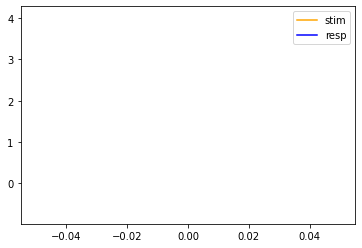

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(1,5):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(0)
  num_blocks_end   = int(1)
  lambda_          = float(0.1)
  mid_shape        = int(8)
  D                = [0.05,0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_"
  path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
  i = 1
  while path.exists(path_name):
      path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
      i = i + 1
  del i
  os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 1        # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                data_subs_pre = load_dmcca_data_cluster(subs, mid_shape, type, block)
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(1):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(0)
  num_blocks_end   = int(2)
  lambda_          = float(0.1)
  mid_shape        = int(8)
  D                = [0.05,0.02,0.2]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_"
  path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
  i = 1
  while path.exists(path_name):
      path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
      i = i + 1
  del i
  os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 2        # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                data_subs_pre = load_dmcca_data_cluster(subs, mid_shape, type, block)
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(3,4):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(0)
  num_blocks_end   = int(2)
  lambda_          = float(0.1)
  mid_shape        = int(8)
  D                = [0.05,0.02,0.2]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_"
  path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
  i = 1
  while path.exists(path_name):
      path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
      i = i + 1
  del i
  os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 2        # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                data_subs_pre = load_dmcca_data_cluster(subs, mid_shape, type, block)
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre, "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

# prueba 2 con variación a 80-20

In [ ]:
for tr in range(len(data_subs_pre[0])):
  data_subs_pre[0][tr][np.isnan(data_subs_pre[0][tr])] = 0
sum(sum(np.isnan(data_subs_pre[0][0])))

0

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(1,2):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.01)
  mid_shape        = int(80)
  D                = [0.05]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Prubas_finales_2/grupo_cx_componentes_"
  path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}/"
  # i = 1
  if not path.exists(path_name):
  #     path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
  #     i = i + 1
  # del i
    os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 1   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(1):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        data_subs_pre = list()
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          for block in range(num_blocks):
            data_subs_pre.append(load_dmcca_data_cluster(subs, mid_shape, type, block))
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs, data__,data_sub = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}_sub_{subs_}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Prubas_finales_2/grupo_cx_componentes_dmcca_1_0.01_80_0.05/
[29.]
Grupo 0
n_subs     : 1
subs       : [0]
D          : [0.05]
num_blocks : 1
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 0
No trials 271
(59, 171)
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)


In [ ]:
data_subs_pre[0][0][0].shape

(10148, 171)

In [ ]:
data__[0][1][0].shape

(10148, 171)

In [ ]:
sum(sum(data_subs_pre[0][0][0] == data__[0][1][0]))

0

In [ ]:
len(data_subs_pre[0][0])

3

# prueba 2 con variación a 80-20 ALL-EEG

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_eeg_dmcca_1_0.1_8_0.05/
[71.]
Grupo 1
n_subs     : 1
subs       : [1]
D          : [0.05, 0.02]
num_blocks : 1
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 1
No trials 1238
(961, 19)
TRAIN: [   0    2    3 ... 1235 1236 1237] TEST: [   1    5    8   14   18   39   45   52   55   75   85   92  108  124
  141  142  152  156  161  184  186  192  194  202  224  233  251  254
  270  283  295  298  299  308  311  319  351  361  390  399  412  422
  427  434  443  465  466  467  471  477  492  494  503  505  528  535
  546  569  571  578  583  630  649  654  655  668  671  682  686  689
  699  713  740  746  747  748  773  775  790  793  795  805  829  834
  837  839  840  841  852  858  864  869  875  895  898  902  912  921
  924  935  974  990 1003 1009 1025 1031 1036 1038 1054 1075 1084 

/content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG/deep_losses.py:35: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2499.)
  [D1, V1] = torch.symeig(SigmaHat11, eigenvectors=True)


EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162277847599926 - 0.0034304936070272104 = 0.3158847689628601
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.0034338366240262985 = 0.31588441133499146
torch.Size([118850, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.003438281361013651 = 0.31588393449783325
  val. loss is : -0.3159 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277842597138 - 0.0034316835491705854 = 0.31588470935821533
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.0034349984489381313 = 0.3158842623233795
torch.Size([118850, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.003439441090449691 = 0.3158838450908661
  val. loss is : -0.3159 & the min. loss is : -0.3159
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training corr LOSS   : 0.3162
0.31622778418824543 - 0.0034350651708304238 = 0.31588

0.949628802294942
CCA Model Ended.
LCCA is : [array(0.9496288), array(0.86966122)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9496288]
DMCCA + DCCA : block_2_drpt_0.05_sub_1
DCCA for block_2_drpt_0.05_sub_1_sub_0
seed:     71.0
EPOCH : 0
  Training CORRELATION   : 0.0000
  Validation CORRELATION : -0.0023
  Test CORRELATION       : -0.0010
  val. loss is : 0.0023 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0002


RuntimeError: ignored

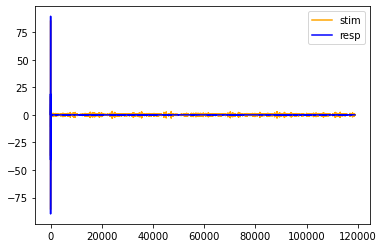

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(1,4):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.1)
  mid_shape        = int(8)
  D                = [0.05,0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_eeg_"
  path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}/"
  # i = 1
  if not path.exists(path_name):
  #     path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
  #     i = i + 1
  # del i
    os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 1   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(1,2):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        # data_subs_pre = list()
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          # for block in range(num_blocks):
          data_subs_pre=load_dmcca_data_all(subs, mid_shape, type, num_blocks)
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(2,3):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs, data__,data_sub = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}_sub_{subs_}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
len(data_subs_pre[0][0][0])

3

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales/grupo_cx_componentes_dmcca_1_0.01_80_0.05/
[48.]
Grupo 0
n_subs     : 1
subs       : [0]
D          : [0.05, 0.02]
num_blocks : 10
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 0
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 1
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 2
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 3
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 4
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 5
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 6
stim 271
y_test 216
172 44 55
Stim_train (10148, 1)
Data INITIALIZING for block : 7
stim 271
y_test 216
172 44 55
Stim_trai

0.07808250559366858
CCA Model Ended.
LCCA is : [array(0.07808251), array(0.00451863)]
DMLC corrs are : [0.07808251]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     48.0
EPOCH : 0
  Training CORRELATION   : 0.0133
  Validation CORRELATION : -0.0208
  Test CORRELATION       : -0.0220
  val. loss is : 0.0208 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0201
  Validation CORRELATION : 0.0020
  Test CORRELATION       : 0.0010
  val. loss is : -0.0020 & the min. loss is : 0.0208
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0227
  Validation CORRELATION : 0.0065
  Test CORRELATION       : 0.0027
  val. loss is : -0.0065 & the min. loss is : -0.0020
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0260
  Validation CORRELATION : 0.0110
  Test C

DMDC corrs are : [0.00512515]
DONE speech - block_0_drpt_0.05.
[[[[0.07808251]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]


 [[[0.00512515]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]]
[[[[0.00451863]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]


DMLC corrs are : [-0.00186526]
DMCCA + DCCA : block_1_drpt_0.05
DCCA for block_1_drpt_0.05_sub_0
seed:     48.0
EPOCH : 0
  Training CORRELATION   : 0.0165
  Validation CORRELATION : -0.0001
  Test CORRELATION       : -0.0080
  val. loss is : 0.0001 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0229
  Validation CORRELATION : 0.0037
  Test CORRELATION       : -0.0094
  val. loss is : -0.0037 & the min. loss is : 0.0001
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0256
  Validation CORRELATION : 0.0015
  Test CORRELATION       : -0.0076
  val. loss is : -0.0015 & the min. loss is : -0.0037
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0261
  Validation CORRELATION : 0.0007
  Test CORRELATION       : -0.0096
  val. loss is : -0.0007 & the min. loss is : -0.00

KeyboardInterrupt: ignored

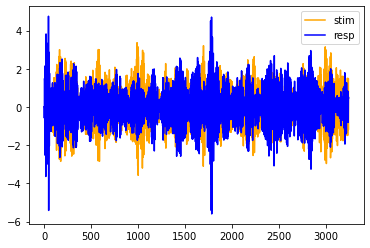

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(1,2):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.1)
  mid_shape        = int(80)
  D                = [0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales/grupo_cx_componentes_"
  path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}/"
  # i = 1
  if not path.exists(path_name):
  #     path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
  #     i = i + 1
  # del i
    os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 10   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        data_subs_pre = list()
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          for block in range(num_blocks):
            data_subs_pre.append(load_dmcca_data_cluster(subs, mid_shape, type, block))
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

# prueba 2 con variación a 80-20 ALL-Cx-gauss

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all_4/grupo_cx_gauss_dmcca_1_0.01_16_0.05/
[53.]
Grupo 1
n_subs     : 1
subs       : [1]
D          : [0.05, 0.02]
num_blocks : 31
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 31
No trials 1240
(59, 171)


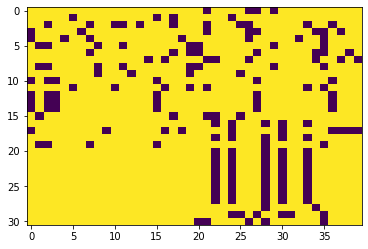

(1200,)
(40,)
TRAIN: [  40   41   42 ... 1237 1238 1239] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
960 40 240
960 40 240
Stim_train (960, 225)
stim_val (240, 225)
stim_test (40, 225)
(1200,)
(40,)
TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
960 40 240
960 40 240
Stim_train (960, 225)
stim_val (240, 225)
stim_test (40, 225)
(1200,)
(40,)
TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119]
960 40 240
960 40 240
Stim_train (960, 225)
stim_val (240, 225)
stim_test (40, 225)
(1200,)
(40,)
TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 

/content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG/deep_losses.py:35: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2499.)
  [D1, V1] = torch.symeig(SigmaHat11, eigenvectors=True)


EPOCH : 0
  Training corr LOSS   : 0.3162
0.3162357211112976 - 0.895687460899353 = 0.3072788417339325
  Validation corr LOSS : 0.3164
0.3164430260658264 - 0.887871265411377 = 0.30756431818008423
torch.Size([40, 15399])
  Test corr LOSS       : 0.3182
0.3181898891925812 - 0.8322833776473999 = 0.3098670542240143
  val. loss is : -0.3076 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162373900413513 - 0.8725755214691162 = 0.3075116276741028
  Validation corr LOSS : 0.3163
0.31630298495292664 - 0.8650196194648743 = 0.3076528012752533
torch.Size([40, 15399])
  Test corr LOSS       : 0.3172
0.317243754863739 - 0.8111449480056763 = 0.30913230776786804
  val. loss is : -0.3077 & the min. loss is : -0.3076
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training corr LOSS   : 0.3162
0.31623291969299316 - 0.8504385948181152 = 0.30772852897644043
  Validation cor

Filtered.
DMCCA + LCCA : block_0_drpt_0.05_sub_1
LCCA for block_0_drpt_0.05_sub_1_sub_0
CCA Model Started...
0.9990045305183365
CCA Model Ended.
LCCA is : [array(0.99900453), array(0.98765452)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99900453]
DMCCA + DCCA : block_0_drpt_0.05_sub_1
DCCA for block_0_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.1051
  Validation CORRELATION : -0.0524
  Test CORRELATION       : -0.0094
  val. loss is : 0.0524 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0876
  Validation CORRELATION : -0.0269
  Test CORRELATION       : -0.0218
  val. loss is : 0.0269 & the min. loss is : 0.0524
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0888
  Validation CORRELATION : -0.0267
  Test CORRELATION       : -0.0220
  val. loss is : 0.0267 & the min. loss is : 0.0269
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0914
  Validation CORRELATION : -0.0274
  Test CORRELATION       : -0.0214
  val. loss is : 0.0274 & the min. loss is : 

  Loaded the model from epoch : 2.

DCCA is : [array(-0.02196887, dtype=float32), array(-0.02196887, dtype=float32)]
DMDC corrs are : [-0.02196887]
DONE speech - block_0_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99870601]
DMCCA + DCCA : block_1_drpt_0.05_sub_1
DCCA for block_1_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0989
  Validation CORRELATION : -0.0392
  Test CORRELATION       : -0.1541
  val. loss is : 0.0392 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0867
  Validation CORRELATION : -0.0112
  Test CORRELATION       : -0.1639
  val. loss is : 0.0112 & the min. loss is : 0.0392
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0874
  Validation CORRELATION : -0.0112
  Test CORRELATION       : -0.1630
  val. loss is : 0.0112 & the min. loss is : 0.0112
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0873
  Validation CORRELATION : -0.0114
  Test CORRELATION       : -0.1629
  val. loss is : 0.0114 & the min. loss 

  Loaded the model from epoch : 6.

DCCA is : [array(-0.16269076, dtype=float32), array(-0.16269076, dtype=float32)]
DMDC corrs are : [-0.16269076]
DONE speech - block_1_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99977422]
DMCCA + DCCA : block_2_drpt_0.05_sub_1
DCCA for block_2_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0666
  Validation CORRELATION : -0.0189
  Test CORRELATION       : 0.0698
  val. loss is : 0.0189 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0592
  Validation CORRELATION : 0.0210
  Test CORRELATION       : 0.1128
  val. loss is : -0.0210 & the min. loss is : 0.0189
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0590
  Validation CORRELATION : 0.0738
  Test CORRELATION       : -0.0112
  val. loss is : -0.0738 & the min. loss is : -0.0210
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0628
  Validation CORRELATION : 0.0371
  Test CORRELATION       : -0.0485
  val. loss is : -0.0371 & the min. loss is :

  Loaded the model from epoch : 2.

DCCA is : [array(-0.01124596, dtype=float32), array(-0.01124596, dtype=float32)]
DMDC corrs are : [-0.01124596]
DONE speech - block_2_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [

DMCCA + LCCA : block_3_drpt_0.05_sub_1
LCCA for block_3_drpt_0.05_sub_1_sub_0
CCA Model Started...
0.9977073167670106
CCA Model Ended.
LCCA is : [array(0.99770732), array(0.98958011)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99770732]
DMCCA + DCCA : block_3_drpt_0.05_sub_1
DCCA for block_3_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0018
  Validation CORRELATION : 0.0815
  Test CORRELATION       : 0.0140
  val. loss is : -0.0815 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0403
  Validation CORRELATION : 0.0807
  Test CORRELATION       : 0.0695
  val. loss is : -0.0807 & the min. loss is : -0.0815
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0307
  Validation CORRELATION : 0.0833
  Test CORRELATION       : 0.0736
  val. loss is : -0.0833 & the min. loss is : -0.0815
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0503
  Validation CORRELATION : 0.0816
  Test CORRELATION       : 0.1082
  val. loss is : -0.0816 & the min. loss is 

  Loaded the model from epoch : 2.

DCCA is : [array(0.07359167, dtype=float32), array(0.07359167, dtype=float32)]
DMDC corrs are : [0.07359167]
DONE speech - block_3_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99944356]
DMCCA + DCCA : block_4_drpt_0.05_sub_1
DCCA for block_4_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0446
  Validation CORRELATION : 0.0529
  Test CORRELATION       : 0.0718
  val. loss is : -0.0529 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0050
  Validation CORRELATION : 0.0562
  Test CORRELATION       : 0.0336
  val. loss is : -0.0562 & the min. loss is : -0.0529
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0532
  Validation CORRELATION : 0.0456
  Test CORRELATION       : -0.0305
  val. loss is : -0.0456 & the min. loss is : -0.0562
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0471
  Validation CORRELATION : 0.0570
  Test CORRELATION       : 0.0005
  val. loss is : -0.0570 & the min. loss i

  Loaded the model from epoch : 15.

DCCA is : [array(-0.0966121, dtype=float32), array(-0.0966121, dtype=float32)]
DMDC corrs are : [-0.0966121]
DONE speech - block_4_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.97747652]
DMCCA + DCCA : block_5_drpt_0.05_sub_1
DCCA for block_5_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0477
  Validation CORRELATION : 0.1275
  Test CORRELATION       : -0.5119
  val. loss is : -0.1275 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0096
  Validation CORRELATION : 0.1023
  Test CORRELATION       : -0.5090
  val. loss is : -0.1023 & the min. loss is : -0.1275
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0181
  Validation CORRELATION : 0.0988
  Test CORRELATION       : -0.5046
  val. loss is : -0.0988 & the min. loss is : -0.1275
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0009
  Validation CORRELATION : 0.0967
  Test CORRELATION       : -0.5135
  val. loss is : -0.0967 & the mi

  Loaded the model from epoch : 0.

DCCA is : [array(-0.5118693, dtype=float32), array(-0.5118693, dtype=float32)]
DMDC corrs are : [-0.51186931]
DONE speech - block_5_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98828027]
DMCCA + DCCA : block_6_drpt_0.05_sub_1
DCCA for block_6_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0116
  Validation CORRELATION : -0.0016
  Test CORRELATION       : -0.2379
  val. loss is : 0.0016 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0054
  Validation CORRELATION : -0.0032
  Test CORRELATION       : -0.2793
  val. loss is : 0.0032 & the min. loss is : 0.0016
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0041
  Validation CORRELATION : -0.0394
  Test CORRELATION       : -0.2776
  val. loss is : 0.0394 & the min. loss is : 0.0016
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0083
  Validation CORRELATION : -0.0194
  Test CORRELATION       : -0.2671
  val. loss is : 0.0194 & the m

  Loaded the model from epoch : 16.

DCCA is : [array(-0.05954633, dtype=float32), array(-0.05954633, dtype=float32)]
DMDC corrs are : [-0.05954633]
DONE speech - block_6_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99947474]
DMCCA + DCCA : block_7_drpt_0.05_sub_1
DCCA for block_7_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0373
  Validation CORRELATION : 0.0297
  Test CORRELATION       : -0.1683
  val. loss is : -0.0297 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0418
  Validation CORRELATION : 0.0202
  Test CORRELATION       : -0.1733
  val. loss is : -0.0202 & the min. loss is : -0.0297
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0410
  Validation CORRELATION : 0.0219
  Test CORRELATION       : -0.1739
  val. loss is : -0.0219 & the min. loss is : -0.0297
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0419
  Validation CORRELATION : 0.0197
  Test CORRELATION       : -0.1763
  val. loss is : -0.0197 & the min.

DMDC corrs are : [-0.16827324]
DONE speech - block_7_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.      

0.9924574356683256
CCA Model Ended.
LCCA is : [array(0.99245744), array(0.94800649)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99245744]
DMCCA + DCCA : block_8_drpt_0.05_sub_1
DCCA for block_8_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0437
  Validation CORRELATION : -0.0707
  Test CORRELATION       : 0.1953
  val. loss is : 0.0707 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0988
  Validation CORRELATION : -0.0987
  Test CORRELATION       : 0.1604
  val. loss is : 0.0987 & the min. loss is : 0.0707
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0445
  Validation CORRELATION : -0.0078
  Test CORRELATION       : 0.0319
  val. loss is : 0.0078 & the min. loss is : 0.0707
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0714
  Validation CORRELATION : -0.0348
  Test CORRELATION       : 0.0048
  val. loss is : 0.0348 & the min. loss is :

  Loaded the model from epoch : 2.

DCCA is : [array(0.03189033, dtype=float32), array(0.03189033, dtype=float32)]
DMDC corrs are : [0.03189033]
DONE speech - block_8_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9985342]
DMCCA + DCCA : block_9_drpt_0.05_sub_1
DCCA for block_9_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0211
  Validation CORRELATION : -0.0029
  Test CORRELATION       : 0.2050
  val. loss is : 0.0029 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0165
  Validation CORRELATION : -0.0177
  Test CORRELATION       : 0.1251
  val. loss is : 0.0177 & the min. loss is : 0.0029
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0140
  Validation CORRELATION : -0.0042
  Test CORRELATION       : -0.1760
  val. loss is : 0.0042 & the min. loss is : 0.0029
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0156
  Validation CORRELATION : -0.0027
  Test CORRELATION       : 0.2327
  val. loss is : 0.0027 & the min. los

  Loaded the model from epoch : 3.

DCCA is : [array(0.23273048, dtype=float32), array(0.23273048, dtype=float32)]
DMDC corrs are : [0.23273048]
DONE speech - block_9_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.

DMCCA + LCCA : block_10_drpt_0.05_sub_1
LCCA for block_10_drpt_0.05_sub_1_sub_0
CCA Model Started...
0.9991966081972846
CCA Model Ended.
LCCA is : [array(0.99919661), array(0.92328872)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99919661]
DMCCA + DCCA : block_10_drpt_0.05_sub_1
DCCA for block_10_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0422
  Validation CORRELATION : -0.0685
  Test CORRELATION       : 0.0601
  val. loss is : 0.0685 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0367
  Validation CORRELATION : 0.0014
  Test CORRELATION       : 0.2196
  val. loss is : -0.0014 & the min. loss is : 0.0685
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0322
  Validation CORRELATION : 0.0058
  Test CORRELATION       : 0.2229
  val. loss is : -0.0058 & the min. loss is : -0.0014
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0311
  Validation CORRELATION : 0.0067
  Test CORRELATION       : 0.2231
  val. loss is : -0.0067 & the min. loss is : -

  Loaded the model from epoch : 4.

DCCA is : [array(0.22303905, dtype=float32), array(0.22303905, dtype=float32)]
DMDC corrs are : [0.22303905]
DONE speech - block_10_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9992671]
DMCCA + DCCA : block_11_drpt_0.05_sub_1
DCCA for block_11_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0169
  Validation CORRELATION : 0.0086
  Test CORRELATION       : 0.1322
  val. loss is : -0.0086 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0074
  Validation CORRELATION : -0.0006
  Test CORRELATION       : 0.1043
  val. loss is : 0.0006 & the min. loss is : -0.0086
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0098
  Validation CORRELATION : 0.0170
  Test CORRELATION       : 0.1027
  val. loss is : -0.0170 & the min. loss is : -0.0086
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0009
  Validation CORRELATION : 0.0171
  Test CORRELATION       : 0.0428
  val. loss is : -0.0171 & the min. los

  Loaded the model from epoch : 3.

DCCA is : [array(0.04277857, dtype=float32), array(0.04277857, dtype=float32)]
DMDC corrs are : [0.04277857]
DONE speech - block_11_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0

DMCCA + LCCA : block_12_drpt_0.05_sub_1
LCCA for block_12_drpt_0.05_sub_1_sub_0
CCA Model Started...
0.9852601150200663
CCA Model Ended.
LCCA is : [array(0.98526012), array(0.88246413)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98526012]
DMCCA + DCCA : block_12_drpt_0.05_sub_1
DCCA for block_12_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0022
  Validation CORRELATION : 0.0674
  Test CORRELATION       : -0.1245
  val. loss is : -0.0674 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0038
  Validation CORRELATION : 0.1031
  Test CORRELATION       : -0.0497
  val. loss is : -0.1031 & the min. loss is : -0.0674
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0006
  Validation CORRELATION : 0.0980
  Test CORRELATION       : -0.0474
  val. loss is : -0.0980 & the min. loss is : -0.1031
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0005
  Validation CORRELATION : 0.0947
  Test CORRELATION       : -0.0495
  val. loss is : -0.0947 & the min.

  Loaded the model from epoch : 1.

DCCA is : [array(-0.04966637, dtype=float32), array(-0.04966637, dtype=float32)]
DMDC corrs are : [-0.04966637]
DONE speech - block_12_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   


CCA Model Ended.
LCCA is : [array(0.99130841), array(0.92316811)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99130841]
DMCCA + DCCA : block_13_drpt_0.05_sub_1
DCCA for block_13_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0155
  Validation CORRELATION : 0.0642
  Test CORRELATION       : 0.0340
  val. loss is : -0.0642 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0026
  Validation CORRELATION : 0.0751
  Test CORRELATION       : 0.0245
  val. loss is : -0.0751 & the min. loss is : -0.0642
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0079
  Validation CORRELATION : 0.0818
  Test CORRELATION       : 0.0161
  val. loss is : -0.0818 & the min. loss is : -0.0751
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0212
  Validation CORRELATION : 0.0704
  Test CORRELATION       : 0.0096
  val. loss is : -0.0704 & the min. loss is :

DMDC corrs are : [0.01612608]
DONE speech - block_13_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.      

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9388585]
DMCCA + DCCA : block_14_drpt_0.05_sub_1
DCCA for block_14_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0274
  Validation CORRELATION : 0.1266
  Test CORRELATION       : -0.0202
  val. loss is : -0.1266 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0389
  Validation CORRELATION : 0.0534
  Test CORRELATION       : -0.1376
  val. loss is : -0.0534 & the min. loss is : -0.1266
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0467
  Validation CORRELATION : 0.0413
  Test CORRELATION       : -0.1628
  val. loss is : -0.0413 & the min. loss is : -0.1266
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0491
  Validation CORRELATION : 0.0445
  Test CORRELATION       : -0.1489
  val. loss is : -0.0445 & the min

DMDC corrs are : [-0.02725938]
DONE speech - block_14_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.     

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9995712]
DMCCA + DCCA : block_15_drpt_0.05_sub_1
DCCA for block_15_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0468
  Validation CORRELATION : 0.1115
  Test CORRELATION       : 0.3008
  val. loss is : -0.1115 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0786
  Validation CORRELATION : 0.1309
  Test CORRELATION       : 0.3183
  val. loss is : -0.1309 & the min. loss is : -0.1115
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0839
  Validation CORRELATION : 0.1302
  Test CORRELATION       : 0.3137
  val. loss is : -0.1302 & the min. loss is : -0.1309
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0852
  Validation CORRELATION : 0.1287
  Test CORRELATION       : 0.3108
  val. loss is : -0.1287 & the min. loss is

DMDC corrs are : [0.28904089]
DONE speech - block_15_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.      

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99992025]
DMCCA + DCCA : block_16_drpt_0.05_sub_1
DCCA for block_16_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0094
  Validation CORRELATION : 0.0734
  Test CORRELATION       : 0.2703
  val. loss is : -0.0734 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0261
  Validation CORRELATION : 0.0610
  Test CORRELATION       : 0.3570
  val. loss is : -0.0610 & the min. loss is : -0.0734
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0304
  Validation CORRELATION : 0.0644
  Test CORRELATION       : 0.3110
  val. loss is : -0.0644 & the min. loss is : -0.0734
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0772
  Validation CORRELATION : 0.0276
  Test CORRELATION       : 0.2072
  val. loss is : -0.0276 & the min. l

  Loaded the model from epoch : 18.

DCCA is : [array(0.39479157, dtype=float32), array(0.39479157, dtype=float32)]
DMDC corrs are : [0.39479157]
DONE speech - block_16_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99988488]
DMCCA + DCCA : block_17_drpt_0.05_sub_1
DCCA for block_17_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0025
  Validation CORRELATION : 0.1037
  Test CORRELATION       : -0.1789
  val. loss is : -0.1037 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0035
  Validation CORRELATION : 0.0993
  Test CORRELATION       : -0.1431
  val. loss is : -0.0993 & the min. loss is : -0.1037
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0012
  Validation CORRELATION : 0.1002
  Test CORRELATION       : -0.1553
  val. loss is : -0.1002 & the min. loss is : -0.1037
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0022
  Validation CORRELATION : 0.1011
  Test CORRELATION       : -0.1507
  val. loss is : -0.1011 & the m

  Loaded the model from epoch : 0.

DCCA is : [array(-0.17888722, dtype=float32), array(-0.17888722, dtype=float32)]


DMDC corrs are : [-0.17888722]
DONE speech - block_17_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.     

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98707344]
DMCCA + DCCA : block_18_drpt_0.05_sub_1
DCCA for block_18_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0166
  Validation CORRELATION : 0.0062
  Test CORRELATION       : -0.2034
  val. loss is : -0.0062 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0195
  Validation CORRELATION : -0.0022
  Test CORRELATION       : -0.2083
  val. loss is : 0.0022 & the min. loss is : -0.0062
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0186
  Validation CORRELATION : 0.0006
  Test CORRELATION       : -0.2042
  val. loss is : -0.0006 & the min. loss is : -0.0062
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0225
  Validation CORRELATION : -0.0029
  Test CORRELATION       : -0.2083
  val. loss is : 0.0029 & the mi

DMDC corrs are : [-0.2034356]
DONE speech - block_18_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.      

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99947026]
DMCCA + DCCA : block_19_drpt_0.05_sub_1
DCCA for block_19_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0298
  Validation CORRELATION : 0.1316
  Test CORRELATION       : -0.3224
  val. loss is : -0.1316 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0242
  Validation CORRELATION : 0.1294
  Test CORRELATION       : -0.3594
  val. loss is : -0.1294 & the min. loss is : -0.1316
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0255
  Validation CORRELATION : 0.1297
  Test CORRELATION       : -0.3502
  val. loss is : -0.1297 & the min. loss is : -0.1316
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0266
  Validation CORRELATION : 0.1306
  Test CORRELATION       : -0.3430
  val. loss is : -0.1306 & th

DMDC corrs are : [-0.32244545]
DONE speech - block_19_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.     

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99919808]
DMCCA + DCCA : block_20_drpt_0.05_sub_1
DCCA for block_20_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0109
  Validation CORRELATION : 0.0037
  Test CORRELATION       : 0.0126
  val. loss is : -0.0037 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0054
  Validation CORRELATION : 0.0537
  Test CORRELATION       : 0.0505
  val. loss is : -0.0537 & the min. loss is : -0.0037
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0101
  Validation CORRELATION : 0.0597
  Test CORRELATION       : 0.0634
  val. loss is : -0.0597 & the min. loss is : -0.0537
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0122
  Validation CORRELATION : 0.0653
  Test CORRELATION       : 0.0673
  val. loss is : -0.0653 & the min. loss is : 

  Saved the model at epoch : 19

DCCA is : [array(0.10524267, dtype=float32), array(0.10524267, dtype=float32)]
DMDC corrs are : [0.10524267]
DONE speech - block_20_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99610611]
DMCCA + DCCA : block_21_drpt_0.05_sub_1
DCCA for block_21_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0132
  Validation CORRELATION : -0.0730
  Test CORRELATION       : 0.2621
  val. loss is : 0.0730 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0012
  Validation CORRELATION : 0.0427
  Test CORRELATION       : 0.3323
  val. loss is : -0.0427 & the min. loss is : 0.0730
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0078
  Validation CORRELATION : 0.0538
  Test CORRELATION       : 0.3196
  val. loss is : -0.0538 & the min. loss is : -0.0427
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0124
  Validation CORRELATION : 0.0611
  Test CORRELATION       : 0.3095
  val. loss is : -0.0611 & the min. loss is : 

DCCA is : [array(0.23736197, dtype=float32), array(0.23736197, dtype=float32)]
DMDC corrs are : [0.23736197]
DONE speech - block_21_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0

DMCCA + LCCA : block_22_drpt_0.05_sub_1
LCCA for block_22_drpt_0.05_sub_1_sub_0
CCA Model Started...
0.9897723863887571
CCA Model Ended.
LCCA is : [array(0.98977239), array(0.87738459)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98977239]
DMCCA + DCCA : block_22_drpt_0.05_sub_1
DCCA for block_22_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0097
  Validation CORRELATION : -0.0820
  Test CORRELATION       : 0.1557
  val. loss is : 0.0820 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0219
  Validation CORRELATION : -0.1103
  Test CORRELATION       : 0.1300
  val. loss is : 0.1103 & the min. loss is : 0.0820
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0355
  Validation CORRELATION : -0.0981
  Test CORRELATION       : 0.1241
  val. loss is : 0.0981 & the min. loss is : 0.0820
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0193
  Validation CORRELATION : -0.1015
  Test CORRELATION       : 0.1210
  val. loss is : 0.1015 & the min. lo

  Loaded the model from epoch : 17.

DCCA is : [array(0.11632831, dtype=float32), array(0.11632831, dtype=float32)]
DMDC corrs are : [0.11632831]
DONE speech - block_22_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99888821]
DMCCA + DCCA : block_23_drpt_0.05_sub_1
DCCA for block_23_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0388
  Validation CORRELATION : 0.0309
  Test CORRELATION       : -0.2559
  val. loss is : -0.0309 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0295
  Validation CORRELATION : 0.0493
  Test CORRELATION       : -0.2453
  val. loss is : -0.0493 & the min. loss is : -0.0309
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0179
  Validation CORRELATION : 0.0658
  Test CORRELATION       : -0.2370
  val. loss is : -0.0658 & the min. loss is : -0.0493
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0052
  Validation CORRELATION : 0.0813
  Test CORRELATION       : -0.2275
  val. loss is : -0.0813 & the min. los

  Loaded the model from epoch : 13.

DCCA is : [array(-0.04580382, dtype=float32), array(-0.04580382, dtype=float32)]
DMDC corrs are : [-0.04580382]
DONE speech - block_23_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99826643]
DMCCA + DCCA : block_24_drpt_0.05_sub_1
DCCA for block_24_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0732
  Validation CORRELATION : 0.0396
  Test CORRELATION       : 0.3835
  val. loss is : -0.0396 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0383
  Validation CORRELATION : -0.0943
  Test CORRELATION       : -0.3984
  val. loss is : 0.0943 & the min. loss is : -0.0396
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0561
  Validation CORRELATION : -0.0829
  Test CORRELATION       : -0.4059
  val. loss is : 0.0829 & the min. loss is : -0.0396
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0173
  Validation CORRELATION : -0.1028
  Test CORRELATION       : -0.3986
  val. loss is : 0.1028 & the m

  Loaded the model from epoch : 15.

DCCA is : [array(0.4124861, dtype=float32), array(0.4124861, dtype=float32)]
DMDC corrs are : [0.41248611]
DONE speech - block_24_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99977103]
DMCCA + DCCA : block_25_drpt_0.05_sub_1
DCCA for block_25_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0118
  Validation CORRELATION : 0.0854
  Test CORRELATION       : -0.1512
  val. loss is : -0.0854 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0090
  Validation CORRELATION : 0.0834
  Test CORRELATION       : -0.1401
  val. loss is : -0.0834 & the min. loss is : -0.0854
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0119
  Validation CORRELATION : 0.0831
  Test CORRELATION       : -0.1574
  val. loss is : -0.0831 & the min. loss is : -0.0854
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0094
  Validation CORRELATION : 0.0820
  Test CORRELATION       : -0.1432
  val. loss is : -0.0820 & th

  Loaded the model from epoch : 11.

DCCA is : [array(-0.16264111, dtype=float32), array(-0.16264111, dtype=float32)]
DMDC corrs are : [-0.16264111]
DONE speech - block_25_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99700027]
DMCCA + DCCA : block_26_drpt_0.05_sub_1
DCCA for block_26_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0136
  Validation CORRELATION : -0.0274
  Test CORRELATION       : -0.1950
  val. loss is : 0.0274 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0130
  Validation CORRELATION : 0.0262
  Test CORRELATION       : 0.1966
  val. loss is : -0.0262 & the min. loss is : 0.0274
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0130
  Validation CORRELATION : 0.0271
  Test CORRELATION       : 0.1949
  val. loss is : -0.0271 & the min. loss is : -0.0262
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0138
  Validation CORRELATION : 0.0268
  Test CORRELATION       : 0.1911
  val. loss is : -0.0268 & the min. loss is :

  Loaded the model from epoch : 18.

DCCA is : [array(0.19181201, dtype=float32), array(0.19181201, dtype=float32)]
DMDC corrs are : [0.19181201]
DONE speech - block_26_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99953728]
DMCCA + DCCA : block_27_drpt_0.05_sub_1
DCCA for block_27_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0067
  Validation CORRELATION : -0.0712
  Test CORRELATION       : 0.2712
  val. loss is : 0.0712 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0162
  Validation CORRELATION : 0.0917
  Test CORRELATION       : -0.3243
  val. loss is : -0.0917 & the min. loss is : 0.0712
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0148
  Validation CORRELATION : 0.0901
  Test CORRELATION       : -0.3184
  val. loss is : -0.0901 & the min. loss is : -0.0917
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0170
  Validation CORRELATION : 0.0884
  Test CORRELATION       : -0.3229
  val. loss is : -0.0884 & the min. 

  Loaded the model from epoch : 5.

DCCA is : [array(-0.32310072, dtype=float32), array(-0.32310072, dtype=float32)]
DMDC corrs are : [-0.32310072]
DONE speech - block_27_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99796971]
DMCCA + DCCA : block_28_drpt_0.05_sub_1
DCCA for block_28_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0263
  Validation CORRELATION : -0.0384
  Test CORRELATION       : 0.3585
  val. loss is : 0.0384 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0092
  Validation CORRELATION : -0.0329
  Test CORRELATION       : -0.1323
  val. loss is : 0.0329 & the min. loss is : 0.0384
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0166
  Validation CORRELATION : -0.0118
  Test CORRELATION       : -0.3380
  val. loss is : 0.0118 & the min. loss is : 0.0329
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0160
  Validation CORRELATION : 0.0055
  Test CORRELATION       : -0.3780
  val. loss is : -0.0055 & the min. loss is 

  Loaded the model from epoch : 16.

DCCA is : [array(-0.40299338, dtype=float32), array(-0.40299338, dtype=float32)]
DMDC corrs are : [-0.40299338]
DONE speech - block_28_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
  

0.9998334665868288
CCA Model Ended.
LCCA is : [array(0.99983347), array(0.98207023)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99983347]
DMCCA + DCCA : block_29_drpt_0.05_sub_1
DCCA for block_29_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0243
  Validation CORRELATION : 0.1365
  Test CORRELATION       : -0.1215
  val. loss is : -0.1365 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0080
  Validation CORRELATION : -0.0087
  Test CORRELATION       : 0.2999
  val. loss is : 0.0087 & the min. loss is : -0.1365
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0061
  Validation CORRELATION : 0.0003
  Test CORRELATION       : 0.2883
  val. loss is : -0.0003 & the min. loss is : -0.1365
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0077
  Validation CORRELATION : -0.0082
  Test CORRELATION       : 0.3015
  val. loss is : 0.0082 & the min.

  Loaded the model from epoch : 0.

DCCA is : [array(-0.12146842, dtype=float32), array(-0.12146842, dtype=float32)]
DMDC corrs are : [-0.12146842]
DONE speech - block_29_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99440774]
DMCCA + DCCA : block_30_drpt_0.05_sub_1
DCCA for block_30_drpt_0.05_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0389
  Validation CORRELATION : -0.0349
  Test CORRELATION       : 0.4091
  val. loss is : 0.0349 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0680
  Validation CORRELATION : -0.0439
  Test CORRELATION       : 0.4971
  val. loss is : 0.0439 & the min. loss is : 0.0349
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0660
  Validation CORRELATION : -0.0425
  Test CORRELATION       : 0.5076
  val. loss is : 0.0425 & the min. loss is : 0.0349
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0660
  Validation CORRELATION : -0.0400
  Test CORRELATION       : 0.4941
  val. loss is : 0.0400 & the min. lo

  Loaded the model from epoch : 0.

DCCA is : [array(0.40914685, dtype=float32), array(0.40914685, dtype=float32)]
DMDC corrs are : [0.40914685]
DONE speech - block_30_drpt_0.05_sub_1.
[[[[ 0.99900453]
   [ 0.        ]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0

0.9265585894772927
CCA Model Ended.
LCCA is : [array(0.92655859), array(0.82762961)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.92655859]
DMCCA + DCCA : block_0_drpt_0.02_sub_1
DCCA for block_0_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0256
  Validation CORRELATION : 0.0641
  Test CORRELATION       : -0.1947
  val. loss is : -0.0641 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0554
  Validation CORRELATION : 0.0399
  Test CORRELATION       : -0.2338
  val. loss is : -0.0399 & the min. loss is : -0.0641
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0543
  Validation CORRELATION : 0.0418
  Test CORRELATION       : -0.2311
  val. loss is : -0.0418 & the min. loss is : -0.0641
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0565
  Validation CORRELATION : 0.0399
  Test CORRELATION       : -0.2305
  val. loss is : -0.0399 & the min.

  Loaded the model from epoch : 0.

DCCA is : [array(-0.19466339, dtype=float32), array(-0.19466339, dtype=float32)]
DMDC corrs are : [-0.19466339]
DONE speech - block_0_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.        ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [

0.9056264029003345
CCA Model Ended.
LCCA is : [array(0.9056264), array(0.85762245)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9056264]
DMCCA + DCCA : block_1_drpt_0.02_sub_1
DCCA for block_1_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0363
  Validation CORRELATION : -0.0690
  Test CORRELATION       : 0.0694
  val. loss is : 0.0690 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0329
  Validation CORRELATION : -0.0548
  Test CORRELATION       : 0.0397
  val. loss is : 0.0548 & the min. loss is : 0.0690
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0276
  Validation CORRELATION : -0.0396
  Test CORRELATION       : 0.0100
  val. loss is : 0.0396 & the min. loss is : 0.0548
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0232
  Validation CORRELATION : -0.0249
  Test CORRELATION       : -0.0218
  val. loss is : 0.0249 & the min. loss is : 

  Loaded the model from epoch : 12.

DCCA is : [array(-0.17404087, dtype=float32), array(-0.17404087, dtype=float32)]
DMDC corrs are : [-0.17404087]
DONE speech - block_1_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.        ]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   

Filtering loaded.
Filtered.
DMCCA + LCCA : block_2_drpt_0.02_sub_1
LCCA for block_2_drpt_0.02_sub_1_sub_0
CCA Model Started...
0.9602033477082388
CCA Model Ended.
LCCA is : [array(0.96020335), array(0.88670136)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.96020335]
DMCCA + DCCA : block_2_drpt_0.02_sub_1
DCCA for block_2_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0142
  Validation CORRELATION : 0.0478
  Test CORRELATION       : -0.1331
  val. loss is : -0.0478 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0670
  Validation CORRELATION : -0.0285
  Test CORRELATION       : -0.0249
  val. loss is : 0.0285 & the min. loss is : -0.0478
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0693
  Validation CORRELATION : -0.0420
  Test CORRELATION       : 0.0003
  val. loss is : 0.0420 & the min. loss is : -0.0478
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0686
  Validation CORRELATION : -0.0346
  Test CORRELATION       : -0.0154
  val. loss is : 0.0346 & the min. 

  Loaded the model from epoch : 0.

DCCA is : [array(-0.13306332, dtype=float32), array(-0.13306332, dtype=float32)]
DMDC corrs are : [-0.13306332]
DONE speech - block_2_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.        ]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [

DMCCA + LCCA : block_3_drpt_0.02_sub_1
LCCA for block_3_drpt_0.02_sub_1_sub_0
CCA Model Started...
0.9789263706175722
CCA Model Ended.
LCCA is : [array(0.97892637), array(0.82861876)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.97892637]
DMCCA + DCCA : block_3_drpt_0.02_sub_1
DCCA for block_3_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0447
  Validation CORRELATION : 0.0731
  Test CORRELATION       : 0.0617
  val. loss is : -0.0731 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0394
  Validation CORRELATION : 0.0799
  Test CORRELATION       : 0.0549
  val. loss is : -0.0799 & the min. loss is : -0.0731
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0361
  Validation CORRELATION : 0.0817
  Test CORRELATION       : 0.0700
  val. loss is : -0.0817 & the min. loss is : -0.0799
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0332
  Validation CORRELATION : 0.0822
  Test CORRELATION       : 0.0743
  val. loss is : -0.0822 & the min. loss is :

  Loaded the model from epoch : 8.

DCCA is : [array(0.05322348, dtype=float32), array(0.05322348, dtype=float32)]
DMDC corrs are : [0.05322348]
DONE speech - block_3_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.        ]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.97444672]
DMCCA + DCCA : block_4_drpt_0.02_sub_1
DCCA for block_4_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0252
  Validation CORRELATION : 0.0954
  Test CORRELATION       : -0.2165
  val. loss is : -0.0954 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0092
  Validation CORRELATION : 0.0753
  Test CORRELATION       : -0.3084
  val. loss is : -0.0753 & the min. loss is : -0.0954
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0063
  Validation CORRELATION : 0.0709
  Test CORRELATION       : -0.3079
  val. loss is : -0.0709 & the min. loss is : -0.0954
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0119
  Validation CORRELATION : 0.0794
  Test CORRELATION       : -0.3205
  val. loss is : -0.0794 & the 

  Loaded the model from epoch : 0.

DCCA is : [array(-0.21647552, dtype=float32), array(-0.21647552, dtype=float32)]
DMDC corrs are : [-0.21647552]
DONE speech - block_4_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.        ]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [

DMCCA + LCCA : block_5_drpt_0.02_sub_1
LCCA for block_5_drpt_0.02_sub_1_sub_0
CCA Model Started...
0.9754064815474549
CCA Model Ended.
LCCA is : [array(0.97540648), array(0.89716444)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.97540648]
DMCCA + DCCA : block_5_drpt_0.02_sub_1
DCCA for block_5_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0117
  Validation CORRELATION : 0.0178
  Test CORRELATION       : -0.1862
  val. loss is : -0.0178 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0228
  Validation CORRELATION : 0.0130
  Test CORRELATION       : -0.0924
  val. loss is : -0.0130 & the min. loss is : -0.0178
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0225
  Validation CORRELATION : 0.0112
  Test CORRELATION       : -0.1337
  val. loss is : -0.0112 & the min. loss is : -0.0178
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0227
  Validation CORRELATION : 0.0125
  Test CORRELATION       : -0.0924
  val. loss is : -0.0125 & the min.

  Loaded the model from epoch : 0.

DCCA is : [array(-0.18616605, dtype=float32), array(-0.18616605, dtype=float32)]
DMDC corrs are : [-0.18616605]
DONE speech - block_5_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.        ]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99951378]
DMCCA + DCCA : block_6_drpt_0.02_sub_1
DCCA for block_6_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0277
  Validation CORRELATION : -0.0528
  Test CORRELATION       : 0.1659
  val. loss is : 0.0528 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0338
  Validation CORRELATION : -0.0522
  Test CORRELATION       : 0.1988
  val. loss is : 0.0522 & the min. loss is : 0.0528
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0391
  Validation CORRELATION : -0.0525
  Test CORRELATION       : 0.2244
  val. loss is : 0.0525 & the min. loss is : 0.0522
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0393
  Validation CORRELATION : -0.0527
  Test CORRELATION       : 0.2262
  val. loss is : 0.0527 & the min. loss is :

  Saved the model at epoch : 19

DCCA is : [array(0.2880376, dtype=float32), array(0.2880376, dtype=float32)]
DMDC corrs are : [0.2880376]
DONE speech - block_6_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.        ]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0.      

0.9853727522740089
CCA Model Ended.
LCCA is : [array(0.98537275), array(0.92890007)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98537275]
DMCCA + DCCA : block_7_drpt_0.02_sub_1
DCCA for block_7_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.1083
  Validation CORRELATION : -0.0131
  Test CORRELATION       : -0.3349
  val. loss is : 0.0131 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.1063
  Validation CORRELATION : -0.0207
  Test CORRELATION       : -0.3184
  val. loss is : 0.0207 & the min. loss is : 0.0131
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.1065
  Validation CORRELATION : -0.0198
  Test CORRELATION       : -0.3199
  val. loss is : 0.0198 & the min. loss is : 0.0131
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.1068
  Validation CORRELATION : -0.0195
  Test CORRELATION       : -0.3209
  val. loss is : 0.0195 & the m

  Loaded the model from epoch : 0.

DCCA is : [array(-0.33489722, dtype=float32), array(-0.33489722, dtype=float32)]
DMDC corrs are : [-0.33489722]
DONE speech - block_7_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.        ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.972954]
DMCCA + DCCA : block_8_drpt_0.02_sub_1
DCCA for block_8_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0707
  Validation CORRELATION : -0.0547
  Test CORRELATION       : -0.0507
  val. loss is : 0.0547 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0713
  Validation CORRELATION : -0.0671
  Test CORRELATION       : 0.1340
  val. loss is : 0.0671 & the min. loss is : 0.0547
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0715
  Validation CORRELATION : -0.0668
  Test CORRELATION       : 0.1343
  val. loss is : 0.0668 & the min. loss is : 0.0547
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0706
  Validation CORRELATION : -0.0672
  Test CORRELATION       : 0.1144
  val. loss is : 0.0672 & the min. l

  Loaded the model from epoch : 0.

DCCA is : [array(-0.0506794, dtype=float32), array(-0.0506794, dtype=float32)]
DMDC corrs are : [-0.0506794]
DONE speech - block_8_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.        ]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0.

0.998575508598062
CCA Model Ended.
LCCA is : [array(0.99857551), array(0.93834683)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99857551]
DMCCA + DCCA : block_9_drpt_0.02_sub_1
DCCA for block_9_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0724
  Validation CORRELATION : -0.0316
  Test CORRELATION       : 0.2175
  val. loss is : 0.0316 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0632
  Validation CORRELATION : -0.0619
  Test CORRELATION       : 0.3393
  val. loss is : 0.0619 & the min. loss is : 0.0316
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0627
  Validation CORRELATION : -0.0621
  Test CORRELATION       : 0.3452
  val. loss is : 0.0621 & the min. loss is : 0.0316
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0643
  Validation CORRELATION : -0.0588
  Test CORRELATION       : 0.3277
  val. loss is : 0.0588 & the min. 

  Loaded the model from epoch : 0.

DCCA is : [array(0.21753165, dtype=float32), array(0.21753165, dtype=float32)]
DMDC corrs are : [0.21753165]
DONE speech - block_9_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.        ]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0.

Filtering loaded.
Filtered.
DMCCA + LCCA : block_10_drpt_0.02_sub_1
LCCA for block_10_drpt_0.02_sub_1_sub_0
CCA Model Started...
0.9976758864157821
CCA Model Ended.
LCCA is : [array(0.99767589), array(0.96140875)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99767589]
DMCCA + DCCA : block_10_drpt_0.02_sub_1
DCCA for block_10_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0261
  Validation CORRELATION : 0.0134
  Test CORRELATION       : 0.1847
  val. loss is : -0.0134 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0057
  Validation CORRELATION : 0.0393
  Test CORRELATION       : 0.2651
  val. loss is : -0.0393 & the min. loss is : -0.0134
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0035
  Validation CORRELATION : 0.0397
  Test CORRELATION       : 0.2665
  val. loss is : -0.0397 & the min. loss is : -0.0393
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0079
  Validation CORRELATION : 0.0513
  Test CORRELATION       : 0.2618
  val. loss is : -0.0513 & the min. loss is :

  Loaded the model from epoch : 5.

DCCA is : [array(0.25840113, dtype=float32), array(0.25840113, dtype=float32)]
DMDC corrs are : [0.25840113]
DONE speech - block_10_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.        ]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99986321]
DMCCA + DCCA : block_11_drpt_0.02_sub_1
DCCA for block_11_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0334
  Validation CORRELATION : -0.0716
  Test CORRELATION       : 0.1304
  val. loss is : 0.0716 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0279
  Validation CORRELATION : -0.1106
  Test CORRELATION       : 0.1441
  val. loss is : 0.1106 & the min. loss is : 0.0716
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0221
  Validation CORRELATION : -0.1025
  Test CORRELATION       : 0.1552
  val. loss is : 0.1025 & the min. loss is : 0.0716
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0270
  Validation CORRELATION : -0.1116
  Test CORRELATION       : 0.1484
  val. loss is : 0.1116 & the min

  Loaded the model from epoch : 0.

DCCA is : [array(0.13043982, dtype=float32), array(0.13043982, dtype=float32)]
DMDC corrs are : [0.13043982]
DONE speech - block_11_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.        ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.999616]
DMCCA + DCCA : block_12_drpt_0.02_sub_1
DCCA for block_12_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0005
  Validation CORRELATION : -0.0126
  Test CORRELATION       : -0.2200
  val. loss is : 0.0126 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0109
  Validation CORRELATION : -0.0264
  Test CORRELATION       : -0.2583
  val. loss is : 0.0264 & the min. loss is : 0.0126
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0132
  Validation CORRELATION : -0.0319
  Test CORRELATION       : -0.2445
  val. loss is : 0.0319 & the min. loss is : 0.0126
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0120
  Validation CORRELATION : -0.0216
  Test CORRELATION       : -0.2502
  val. loss is : 0.0216 & the min. 

  Loaded the model from epoch : 0.

DCCA is : [array(-0.22000238, dtype=float32), array(-0.22000238, dtype=float32)]
DMDC corrs are : [-0.22000238]
DONE speech - block_12_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.        ]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99992315]
DMCCA + DCCA : block_13_drpt_0.02_sub_1
DCCA for block_13_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0050
  Validation CORRELATION : 0.0470
  Test CORRELATION       : -0.1068
  val. loss is : -0.0470 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0141
  Validation CORRELATION : -0.0094
  Test CORRELATION       : -0.3052
  val. loss is : 0.0094 & the min. loss is : -0.0470
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0142
  Validation CORRELATION : -0.0108
  Test CORRELATION       : -0.2724
  val. loss is : 0.0108 & the min. loss is : -0.0470
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0134
  Validation CORRELATION : 0.0006
  Test CORRELATION       : -0.1241
  val. loss is : -0.0006 & the m

  Loaded the model from epoch : 0.

DCCA is : [array(-0.10675295, dtype=float32), array(-0.10675295, dtype=float32)]
DMDC corrs are : [-0.10675295]
DONE speech - block_13_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.        ]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   

DMCCA + LCCA : block_14_drpt_0.02_sub_1
LCCA for block_14_drpt_0.02_sub_1_sub_0
CCA Model Started...
0.9997333753580244
CCA Model Ended.
LCCA is : [array(0.99973338), array(0.92848701)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99973338]
DMCCA + DCCA : block_14_drpt_0.02_sub_1
DCCA for block_14_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0033
  Validation CORRELATION : 0.0674
  Test CORRELATION       : 0.0321
  val. loss is : -0.0674 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0124
  Validation CORRELATION : 0.0498
  Test CORRELATION       : 0.0828
  val. loss is : -0.0498 & the min. loss is : -0.0674
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0145
  Validation CORRELATION : 0.0605
  Test CORRELATION       : 0.0693
  val. loss is : -0.0605 & the min. loss is : -0.0674
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0121
  Validation CORRELATION : 0.0552
  Test CORRELATION       : 0.0719
  val. loss is : -0.0552 & the min. 

  Loaded the model from epoch : 0.

DCCA is : [array(0.03208326, dtype=float32), array(0.03208326, dtype=float32)]
DMDC corrs are : [0.03208326]
DONE speech - block_14_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.        ]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99399317]
DMCCA + DCCA : block_15_drpt_0.02_sub_1
DCCA for block_15_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0475
  Validation CORRELATION : 0.0810
  Test CORRELATION       : -0.0503
  val. loss is : -0.0810 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0451
  Validation CORRELATION : 0.0671
  Test CORRELATION       : -0.0311
  val. loss is : -0.0671 & the min. loss is : -0.0810
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0453
  Validation CORRELATION : 0.0678
  Test CORRELATION       : -0.0302
  val. loss is : -0.0678 & the min. loss is : -0.0810
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0455
  Validation CORRELATION : 0.0691
  Test CORRELATION       : -0.0354
  val. loss is : -0.0691 & th

  Loaded the model from epoch : 0.

DCCA is : [array(-0.0503438, dtype=float32), array(-0.0503438, dtype=float32)]
DMDC corrs are : [-0.0503438]
DONE speech - block_15_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.        ]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99719994]
DMCCA + DCCA : block_16_drpt_0.02_sub_1
DCCA for block_16_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0025
  Validation CORRELATION : 0.1200
  Test CORRELATION       : 0.2705
  val. loss is : -0.1200 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0301
  Validation CORRELATION : 0.0892
  Test CORRELATION       : 0.0083
  val. loss is : -0.0892 & the min. loss is : -0.1200
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0259
  Validation CORRELATION : 0.0923
  Test CORRELATION       : 0.0730
  val. loss is : -0.0923 & the min. loss is : -0.1200
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0193
  Validation CORRELATION : 0.0997
  Test CORRELATION       : 0.0751
  val. loss is : -0.0997 & the min. l

  Loaded the model from epoch : 0.

DCCA is : [array(0.27051428, dtype=float32), array(0.27051428, dtype=float32)]
DMDC corrs are : [0.27051428]
DONE speech - block_16_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.        ]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99331247]
DMCCA + DCCA : block_17_drpt_0.02_sub_1
DCCA for block_17_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0343
  Validation CORRELATION : -0.0302
  Test CORRELATION       : 0.0968
  val. loss is : 0.0302 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0916
  Validation CORRELATION : -0.0097
  Test CORRELATION       : 0.2006
  val. loss is : 0.0097 & the min. loss is : 0.0302
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0931
  Validation CORRELATION : -0.0081
  Test CORRELATION       : 0.1589
  val. loss is : 0.0081 & the min. loss is : 0.0097
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0913
  Validation CORRELATION : -0.0068
  Test CORRELATION       : 0.1334
  val. loss is : 0.0068 & the min. loss is : 0

  Loaded the model from epoch : 3.

DCCA is : [array(0.1334227, dtype=float32), array(0.1334227, dtype=float32)]
DMDC corrs are : [0.1334227]
DONE speech - block_17_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.        ]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0.  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99898527]
DMCCA + DCCA : block_18_drpt_0.02_sub_1
DCCA for block_18_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0211
  Validation CORRELATION : -0.0773
  Test CORRELATION       : -0.2048
  val. loss is : 0.0773 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0074
  Validation CORRELATION : -0.1065
  Test CORRELATION       : -0.1706
  val. loss is : 0.1065 & the min. loss is : 0.0773
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0119
  Validation CORRELATION : -0.1011
  Test CORRELATION       : -0.1746
  val. loss is : 0.1011 & the min. loss is : 0.0773
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0147
  Validation CORRELATION : -0.0918
  Test CORRELATION       : -0.1864
  val. loss is : 0.0918 & the

  Loaded the model from epoch : 0.

DCCA is : [array(-0.20481142, dtype=float32), array(-0.20481142, dtype=float32)]
DMDC corrs are : [-0.20481142]
DONE speech - block_18_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.        ]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99007279]
DMCCA + DCCA : block_19_drpt_0.02_sub_1
DCCA for block_19_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0083
  Validation CORRELATION : -0.0607
  Test CORRELATION       : -0.0656
  val. loss is : 0.0607 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0242
  Validation CORRELATION : -0.0973
  Test CORRELATION       : -0.0317
  val. loss is : 0.0973 & the min. loss is : 0.0607
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0083
  Validation CORRELATION : -0.0921
  Test CORRELATION       : -0.0218
  val. loss is : 0.0921 & the min. loss is : 0.0607
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0185
  Validation CORRELATION : -0.0899
  Test CORRELATION       : -0.0484
  val. loss is : 0.0899 & the mi

DMDC corrs are : [-0.0655733]
DONE speech - block_19_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.99007279]]

  [[ 0.99919808]
   [ 0.        ]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   [ 0.        ]]

  [[ 0.99888821]
   [ 0.        ]]

  [[ 0.99826643]
   [ 0.        ]]

  [[ 0.99977103]
   [ 0.      

0.9895470891054579
CCA Model Ended.
LCCA is : [array(0.98954709), array(0.93428517)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98954709]
DMCCA + DCCA : block_20_drpt_0.02_sub_1
DCCA for block_20_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0140
  Validation CORRELATION : -0.0222
  Test CORRELATION       : -0.2602
  val. loss is : 0.0222 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0273
  Validation CORRELATION : -0.0899
  Test CORRELATION       : -0.2385
  val. loss is : 0.0899 & the min. loss is : 0.0222
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0237
  Validation CORRELATION : -0.0954
  Test CORRELATION       : -0.3649
  val. loss is : 0.0954 & the min. loss is : 0.0222
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0032
  Validation CORRELATION : -0.0651
  Test CORRELATION       : -0.3588
  val. loss is : 0.0651 & the mi

  Loaded the model from epoch : 0.

DCCA is : [array(-0.26017827, dtype=float32), array(-0.26017827, dtype=float32)]
DMDC corrs are : [-0.26017827]
DONE speech - block_20_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.99007279]]

  [[ 0.99919808]
   [ 0.98954709]]

  [[ 0.99610611]
   [ 0.        ]]

  [[ 0.98977239]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98737503]
DMCCA + DCCA : block_21_drpt_0.02_sub_1
DCCA for block_21_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0357
  Validation CORRELATION : -0.0163
  Test CORRELATION       : -0.0140
  val. loss is : 0.0163 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0263
  Validation CORRELATION : -0.0287
  Test CORRELATION       : 0.0168
  val. loss is : 0.0287 & the min. loss is : 0.0163
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0275
  Validation CORRELATION : -0.0277
  Test CORRELATION       : 0.0140
  val. loss is : 0.0277 & the min. loss is : 0.0163
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0295
  Validation CORRELATION : -0.0258
  Test CORRELATION       : 0.0088
  val. loss is : 0.0258 & the mi

  Loaded the model from epoch : 0.

DCCA is : [array(-0.01396549, dtype=float32), array(-0.01396549, dtype=float32)]
DMDC corrs are : [-0.01396549]
DONE speech - block_21_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.99007279]]

  [[ 0.99919808]
   [ 0.98954709]]

  [[ 0.99610611]
   [ 0.98737503]]

  [[ 0.98977239]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98985531]
DMCCA + DCCA : block_22_drpt_0.02_sub_1
DCCA for block_22_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0424
  Validation CORRELATION : 0.0366
  Test CORRELATION       : -0.1970
  val. loss is : -0.0366 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0770
  Validation CORRELATION : -0.0371
  Test CORRELATION       : 0.2714
  val. loss is : 0.0371 & the min. loss is : -0.0366
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0587
  Validation CORRELATION : -0.0345
  Test CORRELATION       : 0.2167
  val. loss is : 0.0345 & the min. loss is : -0.0366
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0466
  Validation CORRELATION : -0.0496
  Test CORRELATION       : 0.1045
  val. loss is : 0.0496 & the min.

  Loaded the model from epoch : 12.

DCCA is : [array(-0.02631421, dtype=float32), array(-0.02631421, dtype=float32)]
DMDC corrs are : [-0.02631421]
DONE speech - block_22_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.99007279]]

  [[ 0.99919808]
   [ 0.98954709]]

  [[ 0.99610611]
   [ 0.98737503]]

  [[ 0.98977239]
  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99245845]
DMCCA + DCCA : block_23_drpt_0.02_sub_1
DCCA for block_23_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0141
  Validation CORRELATION : -0.0410
  Test CORRELATION       : -0.1149
  val. loss is : 0.0410 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0087
  Validation CORRELATION : -0.0586
  Test CORRELATION       : -0.0946
  val. loss is : 0.0586 & the min. loss is : 0.0410
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0091
  Validation CORRELATION : -0.0578
  Test CORRELATION       : -0.1013
  val. loss is : 0.0578 & the min. loss is : 0.0410
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0091
  Validation CORRELATION : -0.0591
  Test CORRELATION       : -0.0980
  val. loss is : 0.0591 & the

  Loaded the model from epoch : 0.

DCCA is : [array(-0.11490777, dtype=float32), array(-0.11490777, dtype=float32)]
DMDC corrs are : [-0.11490777]
DONE speech - block_23_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.99007279]]

  [[ 0.99919808]
   [ 0.98954709]]

  [[ 0.99610611]
   [ 0.98737503]]

  [[ 0.98977239]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98563348]
DMCCA + DCCA : block_24_drpt_0.02_sub_1
DCCA for block_24_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0482
  Validation CORRELATION : -0.0976
  Test CORRELATION       : -0.1450
  val. loss is : 0.0976 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0038
  Validation CORRELATION : -0.1471
  Test CORRELATION       : -0.0476
  val. loss is : 0.1471 & the min. loss is : 0.0976
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0109
  Validation CORRELATION : -0.1473
  Test CORRELATION       : -0.0871
  val. loss is : 0.1473 & the min. loss is : 0.0976
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0131
  Validation CORRELATION : -0.1494
  Test CORRELATION       : -0.0745
  val. loss is : 0.1494 & the mi

  Loaded the model from epoch : 0.

DCCA is : [array(-0.1450416, dtype=float32), array(-0.1450416, dtype=float32)]
DMDC corrs are : [-0.1450416]
DONE speech - block_24_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.99007279]]

  [[ 0.99919808]
   [ 0.98954709]]

  [[ 0.99610611]
   [ 0.98737503]]

  [[ 0.98977239]
   [ 0

0.9983644810641514
CCA Model Ended.
LCCA is : [array(0.99836448), array(0.95635094)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99836448]
DMCCA + DCCA : block_25_drpt_0.02_sub_1
DCCA for block_25_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0144
  Validation CORRELATION : -0.0942
  Test CORRELATION       : 0.1797
  val. loss is : 0.0942 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0340
  Validation CORRELATION : -0.1762
  Test CORRELATION       : 0.1286
  val. loss is : 0.1762 & the min. loss is : 0.0942
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0287
  Validation CORRELATION : -0.1422
  Test CORRELATION       : 0.1507
  val. loss is : 0.1422 & the min. loss is : 0.0942
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0327
  Validation CORRELATION : -0.1443
  Test CORRELATION       : 0.1468
  val. loss is : 0.1443 & the min. l

  Loaded the model from epoch : 0.

DCCA is : [array(0.17967366, dtype=float32), array(0.17967366, dtype=float32)]
DMDC corrs are : [0.17967366]
DONE speech - block_25_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.99007279]]

  [[ 0.99919808]
   [ 0.98954709]]

  [[ 0.99610611]
   [ 0.98737503]]

  [[ 0.98977239]
   [ 0

0.9993872091026111
CCA Model Ended.
LCCA is : [array(0.99938721), array(0.95373059)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99938721]
DMCCA + DCCA : block_26_drpt_0.02_sub_1
DCCA for block_26_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : 0.0201
  Validation CORRELATION : -0.1643
  Test CORRELATION       : 0.1124
  val. loss is : 0.1643 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0359
  Validation CORRELATION : -0.1585
  Test CORRELATION       : 0.1250
  val. loss is : 0.1585 & the min. loss is : 0.1643
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0500
  Validation CORRELATION : -0.1381
  Test CORRELATION       : 0.1012
  val. loss is : 0.1381 & the min. loss is : 0.1585
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0555
  Validation CORRELATION : -0.1346
  Test CORRELATION       : 0.1097
  val. loss is : 0.1346 & the min. loss is : 0.

  Loaded the model from epoch : 3.

DCCA is : [array(0.10972955, dtype=float32), array(0.10972955, dtype=float32)]
DMDC corrs are : [0.10972955]
DONE speech - block_26_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.99007279]]

  [[ 0.99919808]
   [ 0.98954709]]

  [[ 0.99610611]
   [ 0.98737503]]

  [[ 0.98977239]
   [ 0

Filtering loaded.
Filtered.
DMCCA + LCCA : block_27_drpt_0.02_sub_1
LCCA for block_27_drpt_0.02_sub_1_sub_0
CCA Model Started...
0.9972875457841837
CCA Model Ended.
LCCA is : [array(0.99728755), array(0.94078064)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99728755]
DMCCA + DCCA : block_27_drpt_0.02_sub_1
DCCA for block_27_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0386
  Validation CORRELATION : -0.1279
  Test CORRELATION       : 0.3670
  val. loss is : 0.1279 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0066
  Validation CORRELATION : -0.2010
  Test CORRELATION       : 0.3992
  val. loss is : 0.2010 & the min. loss is : 0.1279
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0090
  Validation CORRELATION : -0.2306
  Test CORRELATION       : 0.3154
  val. loss is : 0.2306 & the min. loss is : 0.1279
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0071
  Validation CORRELATION : -0.2064
  Test CORRELATION       : 0.3642
  val. loss is : 0.2064 & the min

DMDC corrs are : [0.36698443]
DONE speech - block_27_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.99007279]]

  [[ 0.99919808]
   [ 0.98954709]]

  [[ 0.99610611]
   [ 0.98737503]]

  [[ 0.98977239]
   [ 0.98985531]]

  [[ 0.99888821]
   [ 0.99245845]]

  [[ 0.99826643]
   [ 0.98563348]]

  [[ 0.99977103]
   [ 0.998364

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98388234]
DMCCA + DCCA : block_28_drpt_0.02_sub_1
DCCA for block_28_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0851
  Validation CORRELATION : -0.0462
  Test CORRELATION       : -0.2146
  val. loss is : 0.0462 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0733
  Validation CORRELATION : -0.0770
  Test CORRELATION       : -0.2030
  val. loss is : 0.0770 & the min. loss is : 0.0462
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0768
  Validation CORRELATION : -0.0648
  Test CORRELATION       : -0.2101
  val. loss is : 0.0648 & the min. loss is : 0.0462
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0832
  Validation CORRELATION : -0.0355
  Test CORRELATION       : -0.2557
  val. loss is : 0.0355 & the

  Loaded the model from epoch : 11.

DCCA is : [array(-0.19499753, dtype=float32), array(-0.19499753, dtype=float32)]
DMDC corrs are : [-0.19499753]
DONE speech - block_28_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.99007279]]

  [[ 0.99919808]
   [ 0.98954709]]

  [[ 0.99610611]
   [ 0.98737503]]

  [[ 0.98977239]
  

0.9817685282178003
CCA Model Ended.
LCCA is : [array(0.98176853), array(0.92162131)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98176853]
DMCCA + DCCA : block_29_drpt_0.02_sub_1
DCCA for block_29_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.1017
  Validation CORRELATION : -0.0336
  Test CORRELATION       : -0.3966
  val. loss is : 0.0336 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0859
  Validation CORRELATION : -0.0736
  Test CORRELATION       : -0.5631
  val. loss is : 0.0736 & the min. loss is : 0.0336
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0834
  Validation CORRELATION : -0.0868
  Test CORRELATION       : -0.6229
  val. loss is : 0.0868 & the min. loss is : 0.0336
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0758
  Validation CORRELATION : -0.0943
  Test CORRELATION       : -0.6322
  val. loss is : 0.0943 & the

  Loaded the model from epoch : 0.

DCCA is : [array(-0.39660248, dtype=float32), array(-0.39660248, dtype=float32)]
DMDC corrs are : [-0.39660248]
DONE speech - block_29_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.99007279]]

  [[ 0.99919808]
   [ 0.98954709]]

  [[ 0.99610611]
   [ 0.98737503]]

  [[ 0.98977239]
   

0.9995520860168619
CCA Model Ended.
LCCA is : [array(0.99955209), array(0.97430058)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99955209]
DMCCA + DCCA : block_30_drpt_0.02_sub_1
DCCA for block_30_drpt_0.02_sub_1_sub_0
seed:     53.0
EPOCH : 0
  Training CORRELATION   : -0.0106
  Validation CORRELATION : -0.0908
  Test CORRELATION       : -0.5110
  val. loss is : 0.0908 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0076
  Validation CORRELATION : -0.0861
  Test CORRELATION       : -0.5056
  val. loss is : 0.0861 & the min. loss is : 0.0908
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0058
  Validation CORRELATION : -0.0832
  Test CORRELATION       : -0.5038
  val. loss is : 0.0832 & the min. loss is : 0.0861
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0043
  Validation CORRELATION : -0.0797
  Test CORRELATION       : -0.4993
  val. loss is : 0.0797 & the min. loss

  Saved the model at epoch : 19

DCCA is : [array(-0.3687808, dtype=float32), array(-0.3687808, dtype=float32)]
DMDC corrs are : [-0.36878079]
DONE speech - block_30_drpt_0.02_sub_1.
[[[[ 0.99900453]
   [ 0.92655859]]

  [[ 0.99870601]
   [ 0.9056264 ]]

  [[ 0.99977422]
   [ 0.96020335]]

  [[ 0.99770732]
   [ 0.97892637]]

  [[ 0.99944356]
   [ 0.97444672]]

  [[ 0.97747652]
   [ 0.97540648]]

  [[ 0.98828027]
   [ 0.99951378]]

  [[ 0.99947474]
   [ 0.98537275]]

  [[ 0.99245744]
   [ 0.972954  ]]

  [[ 0.9985342 ]
   [ 0.99857551]]

  [[ 0.99919661]
   [ 0.99767589]]

  [[ 0.9992671 ]
   [ 0.99986321]]

  [[ 0.98526012]
   [ 0.999616  ]]

  [[ 0.99130841]
   [ 0.99992315]]

  [[ 0.9388585 ]
   [ 0.99973338]]

  [[ 0.9995712 ]
   [ 0.99399317]]

  [[ 0.99992025]
   [ 0.99719994]]

  [[ 0.99988488]
   [ 0.99331247]]

  [[ 0.98707344]
   [ 0.99898527]]

  [[ 0.99947026]
   [ 0.99007279]]

  [[ 0.99919808]
   [ 0.98954709]]

  [[ 0.99610611]
   [ 0.98737503]]

  [[ 0.98977239]
   [ 0.9

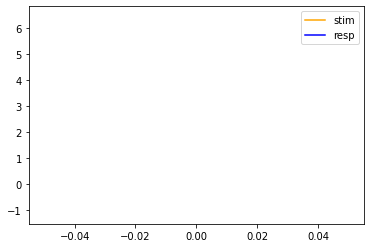

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
import os
results = list()
for type in range(1,2):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.01)
  mid_shape        = int(16)
  D                = [0.05,0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all_4/grupo_cx_gauss_"
  path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}/"
  # i = 1
  if not path.exists(path_name):
  #     path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
  #     i = i + 1
  # del i
    os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 31   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(1,2):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        # data_subs_pre = list()
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          # for block in range(num_blocks):
          data_subs_pre=load_dmcca_data_all_cx_gauss(subs, mid_shape, type, 31)
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(len(data_subs_pre)):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs, data__,data_sub = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}_sub_{subs_}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
data_subs_pre[0][1][0].shape

(892, 4720)

In [ ]:
for i in data_subs_pre[0]:
  print(i[1].shape)

(224, 10089)
(224, 4720)


# Prueba 2 con variacion a 80-20 All-Cx cuadrantes


Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all_4/grupo_cx_dmcca_1_0.01_12_0.05/
[43.]
Grupo 1
n_subs     : 1
subs       : [1]
D          : [0.05, 0.02]
num_blocks : 31
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 31
No trials 1240
(59, 171)


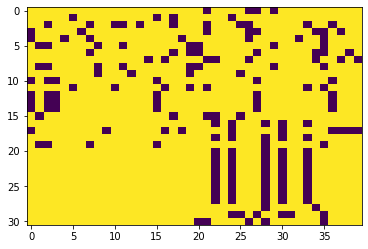

TRAIN: [  40   41   42 ... 1237 1238 1239] TEST: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   45   55
   57   64   82   87   90   91   93   97  101  105  106  113  116  120
  126  141  146  147  154  155  157  160  164  167  178  186  192  195
  201  202  208  211  219  220  229  235  247  257  259  260  267  274
  275  278  294  296  301  302  306  314  317  319  321  322  328  331
  339  340  349  355  368  372  379  385  400  402  403  415  427  436
  445  450  456  459  461  473  475  480  482  483  495  507  516  520
  522  523  535  547  556  560  562  563  575  587  596  601  617  621
  622  625  662  664  668  670  673  680  689  696  698  704  710  716
  717  718  719  742  744  748  750  753  761  762  767  775  788  795
  822  824  828  830  833  862  864  868  870  873  902  904  908  910
  913  942  944  948  950  9

/content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG/deep_losses.py:35: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:2499.)
  [D1, V1] = torch.symeig(SigmaHat11, eigenvectors=True)


EPOCH : 0
  Training corr LOSS   : 0.3163
0.3162737190723419 - 5.327097415924072 = 0.26300275325775146
  Validation corr LOSS : 0.3163
0.31626904010772705 - 0.7658320665359497 = 0.3086107075214386
torch.Size([221, 12789])
  Test corr LOSS       : 0.3163
0.31631791591644287 - 0.5179914236068726 = 0.31113800406455994
  val. loss is : -0.3086 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3164
0.3163661062717438 - 5.305601596832275 = 0.2633100748062134
  Validation corr LOSS : 0.3163
0.3162960410118103 - 0.7447497844696045 = 0.3088485300540924
torch.Size([221, 12789])
  Test corr LOSS       : 0.3168
0.3167559504508972 - 0.49683767557144165 = 0.31178757548332214
  val. loss is : -0.3088 & the min. loss is : -0.3086
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training corr LOSS   : 0.3164
0.31644970178604126 - 5.285170555114746 = 0.2635979950428009
  Validation

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99896713]
DMCCA + DCCA : block_0_drpt_0.05_sub_1
DCCA for block_0_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0154
  Validation CORRELATION : 0.0074
  Test CORRELATION       : 0.0507
  val. loss is : -0.0074 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0036
  Validation CORRELATION : -0.0370
  Test CORRELATION       : -0.0054
  val. loss is : 0.0370 & the min. loss is : -0.0074
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0024
  Validation CORRELATION : -0.0311
  Test CORRELATION       : -0.0248
  val. loss is : 0.0311 & the min. loss is : -0.0074
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0025
  Validation CORRELATION : -0.0083
  Test CORRELATION       : 0.0361
  val. loss is : 0.0083 & the min.

DMDC corrs are : [0.11016351]
DONE speech - block_0_drpt_0.05_sub_1.
[[[[0.99896713]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.       

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99858612]
DMCCA + DCCA : block_1_drpt_0.05_sub_1
DCCA for block_1_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0025
  Validation CORRELATION : 0.0176
  Test CORRELATION       : -0.0288
  val. loss is : -0.0176 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0138
  Validation CORRELATION : -0.0033
  Test CORRELATION       : 0.0113
  val. loss is : 0.0033 & the min. loss is : -0.0176
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0121
  Validation CORRELATION : -0.0054
  Test CORRELATION       : 0.0215
  val. loss is : 0.0054 & the min. loss is : -0.0176
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0162
  Validation CORRELATION : 0.0174
  Test CORRELATION       : -0.0227
  val. loss is : -0.0174 & the min. 

DMDC corrs are : [-0.03516747]
DONE speech - block_1_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.      

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99849379]
DMCCA + DCCA : block_2_drpt_0.05_sub_1
DCCA for block_2_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0484
  Validation CORRELATION : 0.0595
  Test CORRELATION       : 0.0197
  val. loss is : -0.0595 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0428
  Validation CORRELATION : 0.1067
  Test CORRELATION       : -0.0347
  val. loss is : -0.1067 & the min. loss is : -0.0595
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0682
  Validation CORRELATION : 0.0466
  Test CORRELATION       : -0.0701
  val. loss is : -0.0466 & the min. loss is : -0.1067
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0670
  Validation CORRELATION : 0.0398
  Test CORRELATION       : -0.0713
  val. loss is : -0.0398 & the min. loss

DMDC corrs are : [-0.03469279]
DONE speech - block_2_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.      

Filtering loaded.
Filtered.
DMCCA + LCCA : block_3_drpt_0.05_sub_1
LCCA for block_3_drpt_0.05_sub_1_sub_0
CCA Model Started...
0.9979401649068889
CCA Model Ended.
LCCA is : [array(0.99794016), array(0.97609597)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99794016]
DMCCA + DCCA : block_3_drpt_0.05_sub_1
DCCA for block_3_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0072
  Validation CORRELATION : 0.1955
  Test CORRELATION       : 0.0173
  val. loss is : -0.1955 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0321
  Validation CORRELATION : 0.0562
  Test CORRELATION       : -0.0170
  val. loss is : -0.0562 & the min. loss is : -0.1955
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0393
  Validation CORRELATION : 0.1213
  Test CORRELATION       : -0.0118
  val. loss is : -0.1213 & the min. loss is : -0.1955
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0097
  Validation CORRELATION : 0.1822
  Test CORRELATION       : -0.0590
  val. loss is : -0.1822 & the min. 

  Loaded the model from epoch : 0.

DCCA is : [array(0.01728708, dtype=float32), array(0.01728708, dtype=float32)]
DMDC corrs are : [0.01728708]
DONE speech - block_3_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.

DMCCA + LCCA : block_4_drpt_0.05_sub_1
LCCA for block_4_drpt_0.05_sub_1_sub_0
CCA Model Started...
0.9929476624579803
CCA Model Ended.
LCCA is : [array(0.99294766), array(0.96565262)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99294766]
DMCCA + DCCA : block_4_drpt_0.05_sub_1
DCCA for block_4_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0739
  Validation CORRELATION : -0.0299
  Test CORRELATION       : -0.0450
  val. loss is : 0.0299 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0402
  Validation CORRELATION : -0.0072
  Test CORRELATION       : 0.0289
  val. loss is : 0.0072 & the min. loss is : 0.0299
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0792
  Validation CORRELATION : 0.0287
  Test CORRELATION       : 0.0555
  val. loss is : -0.0287 & the min. loss is : 0.0072
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0856
  Validation CORRELATION : 0.0379
  Test CORRELATION       : 0.0580
  val. loss is : -0.0379 & the min. loss is : -0

  Saved the model at epoch : 19

DCCA is : [array(0.06969555, dtype=float32), array(0.06969555, dtype=float32)]
DMDC corrs are : [0.06969555]
DONE speech - block_4_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99870715]
DMCCA + DCCA : block_5_drpt_0.05_sub_1
DCCA for block_5_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0586
  Validation CORRELATION : 0.1541
  Test CORRELATION       : -0.0479
  val. loss is : -0.1541 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0148
  Validation CORRELATION : 0.0391
  Test CORRELATION       : -0.0666
  val. loss is : -0.0391 & the min. loss is : -0.1541
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0129
  Validation CORRELATION : -0.1531
  Test CORRELATION       : 0.0855
  val. loss is : 0.1531 & the min. loss is : -0.1541
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0016
  Validation CORRELATION : 0.0671
  Test CORRELATION       : 0.0771
  val. loss is : -0.0671 & the min

  Loaded the model from epoch : 0.

DCCA is : [array(-0.04787597, dtype=float32), array(-0.04787597, dtype=float32)]
DMDC corrs are : [-0.04787597]
DONE speech - block_5_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9993088]
DMCCA + DCCA : block_6_drpt_0.05_sub_1
DCCA for block_6_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0707
  Validation CORRELATION : 0.1312
  Test CORRELATION       : -0.0071
  val. loss is : -0.1312 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0187
  Validation CORRELATION : 0.1251
  Test CORRELATION       : 0.0240
  val. loss is : -0.1251 & the min. loss is : -0.1312
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0562
  Validation CORRELATION : -0.0544
  Test CORRELATION       : 0.0079
  val. loss is : 0.0544 & the min. loss is : -0.1312
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0334
  Validation CORRELATION : 0.0492
  Test CORRELATION       : 0.0747
  val. loss is : -0.0492 & the min. l

  Loaded the model from epoch : 0.

DCCA is : [array(-0.00705272, dtype=float32), array(-0.00705272, dtype=float32)]
DMDC corrs are : [-0.00705272]
DONE speech - block_6_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99810276]
DMCCA + DCCA : block_7_drpt_0.05_sub_1
DCCA for block_7_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0246
  Validation CORRELATION : 0.0817
  Test CORRELATION       : -0.0467
  val. loss is : -0.0817 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0381
  Validation CORRELATION : 0.0555
  Test CORRELATION       : -0.0330
  val. loss is : -0.0555 & the min. loss is : -0.0817
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0580
  Validation CORRELATION : 0.0102
  Test CORRELATION       : -0.0929
  val. loss is : -0.0102 & the min. loss is : -0.0817
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0553
  Validation CORRELATION : 0.0493
  Test CORRELATION       : -0.0070
  val. loss is : -0.0493 & the min.

  Loaded the model from epoch : 0.

DCCA is : [array(-0.04673912, dtype=float32), array(-0.04673912, dtype=float32)]
DMDC corrs are : [-0.04673912]
DONE speech - block_7_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [

DMCCA + LCCA : block_8_drpt_0.05_sub_1
LCCA for block_8_drpt_0.05_sub_1_sub_0
CCA Model Started...
0.9955364940556132
CCA Model Ended.
LCCA is : [array(0.99553649), array(0.96853743)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99553649]
DMCCA + DCCA : block_8_drpt_0.05_sub_1
DCCA for block_8_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0472
  Validation CORRELATION : 0.0988
  Test CORRELATION       : -0.0868
  val. loss is : -0.0988 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0456
  Validation CORRELATION : 0.1494
  Test CORRELATION       : -0.0655
  val. loss is : -0.1494 & the min. loss is : -0.0988
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0520
  Validation CORRELATION : 0.1337
  Test CORRELATION       : -0.0709
  val. loss is : -0.1337 & the min. loss is : -0.1494
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0475
  Validation CORRELATION : 0.1643
  Test CORRELATION       : -0.0431
  val. loss is : -0.1643 & the min. loss

  Loaded the model from epoch : 5.

DCCA is : [array(-0.03223148, dtype=float32), array(-0.03223148, dtype=float32)]
DMDC corrs are : [-0.03223148]
DONE speech - block_8_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99863211]
DMCCA + DCCA : block_9_drpt_0.05_sub_1
DCCA for block_9_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0125
  Validation CORRELATION : 0.0198
  Test CORRELATION       : -0.0694
  val. loss is : -0.0198 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0167
  Validation CORRELATION : -0.0005
  Test CORRELATION       : -0.0563
  val. loss is : 0.0005 & the min. loss is : -0.0198
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0070
  Validation CORRELATION : 0.0545
  Test CORRELATION       : 0.0105
  val. loss is : -0.0545 & the min. loss is : -0.0198
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0159
  Validation CORRELATION : 0.0491
  Test CORRELATION       : 0.0103
  val. loss is : -0.0491 & the min. loss

  Loaded the model from epoch : 14.

DCCA is : [array(0.0295031, dtype=float32), array(0.0295031, dtype=float32)]
DMDC corrs are : [0.0295031]
DONE speech - block_9_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99731826]
DMCCA + DCCA : block_10_drpt_0.05_sub_1
DCCA for block_10_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0279
  Validation CORRELATION : 0.0314
  Test CORRELATION       : 0.0105
  val. loss is : -0.0314 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0013
  Validation CORRELATION : 0.1095
  Test CORRELATION       : -0.0429
  val. loss is : -0.1095 & the min. loss is : -0.0314
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0298
  Validation CORRELATION : 0.1410
  Test CORRELATION       : -0.0648
  val. loss is : -0.1410 & the min. loss is : -0.1095
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0392
  Validation CORRELATION : 0.1191
  Test CORRELATION       : -0.0415
  val. loss is : -0.1191 & the min. loss i

  Loaded the model from epoch : 2.

DCCA is : [array(-0.06484126, dtype=float32), array(-0.06484126, dtype=float32)]
DMDC corrs are : [-0.06484126]
DONE speech - block_10_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99810964]
DMCCA + DCCA : block_11_drpt_0.05_sub_1
DCCA for block_11_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0048
  Validation CORRELATION : -0.0256
  Test CORRELATION       : 0.1800
  val. loss is : 0.0256 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0255
  Validation CORRELATION : -0.0236
  Test CORRELATION       : 0.1928
  val. loss is : 0.0236 & the min. loss is : 0.0256
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0426
  Validation CORRELATION : -0.0129
  Test CORRELATION       : 0.1902
  val. loss is : 0.0129 & the min. loss is : 0.0236
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0512
  Validation CORRELATION : -0.0060
  Test CORRELATION       : 0.1814
  val. loss is : 0.0060 & the min. loss is : 0.

  Saved the model at epoch : 19

DCCA is : [array(0.15726113, dtype=float32), array(0.15726113, dtype=float32)]
DMDC corrs are : [0.15726113]
DONE speech - block_11_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9983338]
DMCCA + DCCA : block_12_drpt_0.05_sub_1
DCCA for block_12_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0158
  Validation CORRELATION : 0.0988
  Test CORRELATION       : 0.0612
  val. loss is : -0.0988 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0200
  Validation CORRELATION : 0.1006
  Test CORRELATION       : 0.0612
  val. loss is : -0.1006 & the min. loss is : -0.0988
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0306
  Validation CORRELATION : 0.1033
  Test CORRELATION       : 0.0399
  val. loss is : -0.1033 & the min. loss is : -0.1006
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0397
  Validation CORRELATION : 0.1011
  Test CORRELATION       : 0.0259
  val. loss is : -0.1011 & the min. loss is : -0

  Saved the model at epoch : 19

DCCA is : [array(-0.01411823, dtype=float32), array(-0.01411823, dtype=float32)]
DMDC corrs are : [-0.01411823]
DONE speech - block_12_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99939077]
DMCCA + DCCA : block_13_drpt_0.05_sub_1
DCCA for block_13_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0220
  Validation CORRELATION : 0.0686
  Test CORRELATION       : 0.0905
  val. loss is : -0.0686 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0255
  Validation CORRELATION : 0.0684
  Test CORRELATION       : 0.0954
  val. loss is : -0.0684 & the min. loss is : -0.0686
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0324
  Validation CORRELATION : 0.0793
  Test CORRELATION       : 0.0611
  val. loss is : -0.0793 & the min. loss is : -0.0686
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0407
  Validation CORRELATION : 0.0857
  Test CORRELATION       : 0.0385
  val. loss is : -0.0857 & the min. loss i

  Saved the model at epoch : 19

DCCA is : [array(0.01550714, dtype=float32), array(0.01550714, dtype=float32)]
DMDC corrs are : [0.01550714]
DONE speech - block_13_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99871089]
DMCCA + DCCA : block_14_drpt_0.05_sub_1
DCCA for block_14_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0400
  Validation CORRELATION : 0.0756
  Test CORRELATION       : 0.0574
  val. loss is : -0.0756 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0210
  Validation CORRELATION : 0.0631
  Test CORRELATION       : 0.0516
  val. loss is : -0.0631 & the min. loss is : -0.0756
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0280
  Validation CORRELATION : 0.0646
  Test CORRELATION       : 0.0341
  val. loss is : -0.0646 & the min. loss is : -0.0756
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0317
  Validation CORRELATION : 0.0679
  Test CORRELATION       : 0.0352
  val. loss is : -0.0679 & the min. l

  Loaded the model from epoch : 0.

DCCA is : [array(0.05741819, dtype=float32), array(0.05741819, dtype=float32)]
DMDC corrs are : [0.05741819]
DONE speech - block_14_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99819141]
DMCCA + DCCA : block_15_drpt_0.05_sub_1
DCCA for block_15_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0311
  Validation CORRELATION : 0.0060
  Test CORRELATION       : -0.0105
  val. loss is : -0.0060 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0446
  Validation CORRELATION : 0.1462
  Test CORRELATION       : 0.0312
  val. loss is : -0.1462 & the min. loss is : -0.0060
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0414
  Validation CORRELATION : 0.1313
  Test CORRELATION       : 0.0145
  val. loss is : -0.1313 & the min. loss is : -0.1462
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0402
  Validation CORRELATION : 0.1563
  Test CORRELATION       : 0.0316
  val. loss is : -0.1563 & the min. loss 

  Loaded the model from epoch : 18.

DCCA is : [array(0.07047353, dtype=float32), array(0.07047353, dtype=float32)]
DMDC corrs are : [0.07047353]
DONE speech - block_15_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99918335]
DMCCA + DCCA : block_16_drpt_0.05_sub_1
DCCA for block_16_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0277
  Validation CORRELATION : 0.0276
  Test CORRELATION       : 0.0720
  val. loss is : -0.0276 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0163
  Validation CORRELATION : 0.1455
  Test CORRELATION       : 0.0571
  val. loss is : -0.1455 & the min. loss is : -0.0276
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0233
  Validation CORRELATION : 0.1075
  Test CORRELATION       : 0.0286
  val. loss is : -0.1075 & the min. loss is : -0.1455
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0035
  Validation CORRELATION : 0.1240
  Test CORRELATION       : -0.0113
  val. loss is : -0.1240 & the min. loss

  Loaded the model from epoch : 7.

DCCA is : [array(0.03637194, dtype=float32), array(0.03637194, dtype=float32)]
DMDC corrs are : [0.03637194]
DONE speech - block_16_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99835693]
DMCCA + DCCA : block_17_drpt_0.05_sub_1
DCCA for block_17_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0273
  Validation CORRELATION : -0.0117
  Test CORRELATION       : 0.1385
  val. loss is : 0.0117 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0202
  Validation CORRELATION : -0.0200
  Test CORRELATION       : 0.1379
  val. loss is : 0.0200 & the min. loss is : 0.0117
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0176
  Validation CORRELATION : -0.0217
  Test CORRELATION       : 0.1399
  val. loss is : 0.0217 & the min. loss is : 0.0117
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0168
  Validation CORRELATION : -0.0216
  Test CORRELATION       : 0.1342
  val. loss is : 0.0216 & the min

  Saved the model at epoch : 19

DCCA is : [array(0.08298999, dtype=float32), array(0.08298999, dtype=float32)]
DMDC corrs are : [0.08298999]
DONE speech - block_17_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99699728]
DMCCA + DCCA : block_18_drpt_0.05_sub_1
DCCA for block_18_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0215
  Validation CORRELATION : -0.0566
  Test CORRELATION       : -0.0341
  val. loss is : 0.0566 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0529
  Validation CORRELATION : 0.0091
  Test CORRELATION       : 0.0363
  val. loss is : -0.0091 & the min. loss is : 0.0566
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0638
  Validation CORRELATION : 0.0338
  Test CORRELATION       : 0.0591
  val. loss is : -0.0338 & the min. loss is : -0.0091
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0702
  Validation CORRELATION : 0.0525
  Test CORRELATION       : 0.0722
  val. loss is : -0.0525 & the min. loss is : 

  Loaded the model from epoch : 8.

DCCA is : [array(0.09232364, dtype=float32), array(0.09232364, dtype=float32)]
DMDC corrs are : [0.09232364]
DONE speech - block_18_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99848758]
DMCCA + DCCA : block_19_drpt_0.05_sub_1
DCCA for block_19_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0077
  Validation CORRELATION : -0.0038
  Test CORRELATION       : 0.0053
  val. loss is : 0.0038 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0071
  Validation CORRELATION : -0.0002
  Test CORRELATION       : 0.0024
  val. loss is : 0.0002 & the min. loss is : 0.0038
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0066
  Validation CORRELATION : 0.0053
  Test CORRELATION       : -0.0043
  val. loss is : -0.0053 & the min. loss is : 0.0002
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0066
  Validation CORRELATION : 0.0108
  Test CORRELATION       : -0.0109
  val. loss is : -0.0108 & the min. loss is : 

  Saved the model at epoch : 19

DCCA is : [array(-0.0551956, dtype=float32), array(-0.0551956, dtype=float32)]
DMDC corrs are : [-0.0551956]
DONE speech - block_19_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99932888]
DMCCA + DCCA : block_20_drpt_0.05_sub_1
DCCA for block_20_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0084
  Validation CORRELATION : -0.0931
  Test CORRELATION       : -0.0750
  val. loss is : 0.0931 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0130
  Validation CORRELATION : -0.0949
  Test CORRELATION       : -0.0209
  val. loss is : 0.0949 & the min. loss is : 0.0931
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0445
  Validation CORRELATION : 0.0696
  Test CORRELATION       : -0.0270
  val. loss is : -0.0696 & the min. loss is : 0.0931
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0535
  Validation CORRELATION : 0.0515
  Test CORRELATION       : -0.0249
  val. loss is : -0.0515 & the min. lo

  Loaded the model from epoch : 15.

DCCA is : [array(-0.051442, dtype=float32), array(-0.051442, dtype=float32)]
DMDC corrs are : [-0.051442]
DONE speech - block_20_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.        ]
   [ 0.        ]]

  [[ 0.        ]
   [ 0. 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99955382]
DMCCA + DCCA : block_21_drpt_0.05_sub_1
DCCA for block_21_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0294
  Validation CORRELATION : -0.0726
  Test CORRELATION       : -0.0485
  val. loss is : 0.0726 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0130
  Validation CORRELATION : -0.0615
  Test CORRELATION       : -0.0398
  val. loss is : 0.0615 & the min. loss is : 0.0726
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0193
  Validation CORRELATION : 0.1157
  Test CORRELATION       : 0.0090
  val. loss is : -0.1157 & the min. loss is : 0.0615
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0220
  Validation CORRELATION : 0.1011
  Test CORRELATION       : 0.0144
  val. loss is : -0.1011 & the min. loss is 

  Loaded the model from epoch : 2.

DCCA is : [array(0.00896035, dtype=float32), array(0.00896035, dtype=float32)]
DMDC corrs are : [0.00896035]
DONE speech - block_21_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.        ]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99876817]
DMCCA + DCCA : block_22_drpt_0.05_sub_1
DCCA for block_22_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0670
  Validation CORRELATION : -0.0372
  Test CORRELATION       : -0.0983
  val. loss is : 0.0372 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0286
  Validation CORRELATION : -0.0228
  Test CORRELATION       : -0.0278
  val. loss is : 0.0228 & the min. loss is : 0.0372
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0139
  Validation CORRELATION : 0.0925
  Test CORRELATION       : 0.0812
  val. loss is : -0.0925 & the min. loss is : 0.0228
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0207
  Validation CORRELATION : 0.0941
  Test CORRELATION       : 0.0729
  val. loss is : -0.0941 & the min. loss is 

  Loaded the model from epoch : 18.

DCCA is : [array(0.06324762, dtype=float32), array(0.06324762, dtype=float32)]
DMDC corrs are : [0.06324762]
DONE speech - block_22_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9991321]
DMCCA + DCCA : block_23_drpt_0.05_sub_1
DCCA for block_23_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0438
  Validation CORRELATION : -0.0640
  Test CORRELATION       : -0.0663
  val. loss is : 0.0640 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0146
  Validation CORRELATION : -0.0998
  Test CORRELATION       : -0.0519
  val. loss is : 0.0998 & the min. loss is : 0.0640
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0170
  Validation CORRELATION : -0.0038
  Test CORRELATION       : -0.0548
  val. loss is : 0.0038 & the min. loss is : 0.0640
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0162
  Validation CORRELATION : 0.0808
  Test CORRELATION       : -0.0412
  val. loss is : -0.0808 & the min. lo

  Loaded the model from epoch : 17.

DCCA is : [array(-0.02045966, dtype=float32), array(-0.02045966, dtype=float32)]
DMDC corrs are : [-0.02045966]
DONE speech - block_23_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99906834]
DMCCA + DCCA : block_24_drpt_0.05_sub_1
DCCA for block_24_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0452
  Validation CORRELATION : -0.0776
  Test CORRELATION       : -0.0885
  val. loss is : 0.0776 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0288
  Validation CORRELATION : 0.0966
  Test CORRELATION       : -0.0170
  val. loss is : -0.0966 & the min. loss is : 0.0776
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0355
  Validation CORRELATION : 0.1380
  Test CORRELATION       : 0.0218
  val. loss is : -0.1380 & the min. loss is : -0.0966
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0397
  Validation CORRELATION : 0.1400
  Test CORRELATION       : 0.0207
  val. loss is : -0.1400 & the min. loss is 

  Loaded the model from epoch : 9.

DCCA is : [array(0.02574378, dtype=float32), array(0.02574378, dtype=float32)]
DMDC corrs are : [0.02574378]
DONE speech - block_24_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0

Filtering loaded.
Filtered.
DMCCA + LCCA : block_25_drpt_0.05_sub_1
LCCA for block_25_drpt_0.05_sub_1_sub_0
CCA Model Started...
0.9980591743451803
CCA Model Ended.
LCCA is : [array(0.99805917), array(0.97002813)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99805917]
DMCCA + DCCA : block_25_drpt_0.05_sub_1
DCCA for block_25_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0239
  Validation CORRELATION : 0.0053
  Test CORRELATION       : -0.0532
  val. loss is : -0.0053 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0356
  Validation CORRELATION : 0.1391
  Test CORRELATION       : 0.0067
  val. loss is : -0.1391 & the min. loss is : -0.0053
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0469
  Validation CORRELATION : 0.1501
  Test CORRELATION       : 0.0179
  val. loss is : -0.1501 & the min. loss is : -0.1391
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0582
  Validation CORRELATION : 0.1481
  Test CORRELATION       : 0.0157
  val. loss is : -0.1481 & the min. loss is :

  Loaded the model from epoch : 16.

DCCA is : [array(0.01913181, dtype=float32), array(0.01913181, dtype=float32)]
DMDC corrs are : [0.01913181]
DONE speech - block_25_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99879128]
DMCCA + DCCA : block_26_drpt_0.05_sub_1
DCCA for block_26_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0368
  Validation CORRELATION : -0.0658
  Test CORRELATION       : -0.0738
  val. loss is : 0.0658 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0458
  Validation CORRELATION : 0.0790
  Test CORRELATION       : 0.0012
  val. loss is : -0.0790 & the min. loss is : 0.0658
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0429
  Validation CORRELATION : 0.0950
  Test CORRELATION       : 0.0131
  val. loss is : -0.0950 & the min. loss is : -0.0790
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0468
  Validation CORRELATION : 0.0892
  Test CORRELATION       : 0.0044
  val. loss is : -0.0892 & the min. loss is :

  Loaded the model from epoch : 18.

DCCA is : [array(0.01619388, dtype=float32), array(0.01619388, dtype=float32)]
DMDC corrs are : [0.01619388]
DONE speech - block_26_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 

DMCCA + LCCA : block_27_drpt_0.05_sub_1
LCCA for block_27_drpt_0.05_sub_1_sub_0
CCA Model Started...
0.9992109998480478
CCA Model Ended.
LCCA is : [array(0.999211), array(0.97364317)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.999211]
DMCCA + DCCA : block_27_drpt_0.05_sub_1
DCCA for block_27_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0511
  Validation CORRELATION : -0.0800
  Test CORRELATION       : -0.0892
  val. loss is : 0.0800 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0763
  Validation CORRELATION : 0.1448
  Test CORRELATION       : 0.0217
  val. loss is : -0.1448 & the min. loss is : 0.0800
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0808
  Validation CORRELATION : 0.1517
  Test CORRELATION       : 0.0237
  val. loss is : -0.1517 & the min. loss is : -0.1448
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0898
  Validation CORRELATION : 0.1500
  Test CORRELATION       : 0.0272
  val. loss is : -0.1500 & the min. loss is : -

  Loaded the model from epoch : 4.

DCCA is : [array(0.03339322, dtype=float32), array(0.03339322, dtype=float32)]
DMDC corrs are : [0.03339322]
DONE speech - block_27_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99816747]
DMCCA + DCCA : block_28_drpt_0.05_sub_1
DCCA for block_28_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0583
  Validation CORRELATION : -0.0609
  Test CORRELATION       : -0.0145
  val. loss is : 0.0609 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0360
  Validation CORRELATION : -0.0141
  Test CORRELATION       : 0.0325
  val. loss is : 0.0141 & the min. loss is : 0.0609
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0147
  Validation CORRELATION : -0.0511
  Test CORRELATION       : -0.0325
  val. loss is : 0.0511 & the min. loss is : 0.0141
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0097
  Validation CORRELATION : -0.0319
  Test CORRELATION       : -0.0473
  val. loss is : 0.0319 & the min. l

  Loaded the model from epoch : 16.

DCCA is : [array(-0.0096655, dtype=float32), array(-0.0096655, dtype=float32)]
DMDC corrs are : [-0.0096655]
DONE speech - block_28_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99904395]
DMCCA + DCCA : block_29_drpt_0.05_sub_1
DCCA for block_29_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0138
  Validation CORRELATION : 0.0755
  Test CORRELATION       : 0.1484
  val. loss is : -0.0755 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0220
  Validation CORRELATION : -0.0561
  Test CORRELATION       : 0.1465
  val. loss is : 0.0561 & the min. loss is : -0.0755
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0237
  Validation CORRELATION : -0.0732
  Test CORRELATION       : 0.1509
  val. loss is : 0.0732 & the min. loss is : -0.0755
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0178
  Validation CORRELATION : -0.0631
  Test CORRELATION       : 0.1330
  val. loss is : 0.0631 & the min. 

  Loaded the model from epoch : 0.

DCCA is : [array(0.1483835, dtype=float32), array(0.1483835, dtype=float32)]
DMDC corrs are : [0.1483835]
DONE speech - block_29_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0.  

DMCCA + LCCA : block_30_drpt_0.05_sub_1
LCCA for block_30_drpt_0.05_sub_1_sub_0
CCA Model Started...
0.9988859018498508
CCA Model Ended.
LCCA is : [array(0.9988859), array(0.97242645)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9988859]
DMCCA + DCCA : block_30_drpt_0.05_sub_1
DCCA for block_30_drpt_0.05_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0179
  Validation CORRELATION : -0.0100
  Test CORRELATION       : -0.0730
  val. loss is : 0.0100 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0356
  Validation CORRELATION : 0.0495
  Test CORRELATION       : 0.0592
  val. loss is : -0.0495 & the min. loss is : 0.0100
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0396
  Validation CORRELATION : 0.0577
  Test CORRELATION       : 0.0719
  val. loss is : -0.0577 & the min. loss is : -0.0495
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0417
  Validation CORRELATION : 0.0629
  Test CORRELATION       : 0.0742
  val. loss is : -0.0629 & the min. loss is : 

  Loaded the model from epoch : 18.

DCCA is : [array(0.06537313, dtype=float32), array(0.06537313, dtype=float32)]
DMDC corrs are : [0.06537313]
DONE speech - block_30_drpt_0.05_sub_1.
[[[[ 0.99896713]
   [ 0.        ]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 

0.9937720520340874
CCA Model Ended.
LCCA is : [array(0.99377205), array(0.96176033)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99377205]
DMCCA + DCCA : block_0_drpt_0.02_sub_1
DCCA for block_0_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0303
  Validation CORRELATION : -0.0024
  Test CORRELATION       : 0.1118
  val. loss is : 0.0024 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0693
  Validation CORRELATION : -0.0260
  Test CORRELATION       : 0.1052
  val. loss is : 0.0260 & the min. loss is : 0.0024
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0615
  Validation CORRELATION : 0.0004
  Test CORRELATION       : 0.0924
  val. loss is : -0.0004 & the min. loss is : 0.0024
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0737
  Validation CORRELATION : 0.0034
  Test CORRELATION       : 0.0806
  val. loss is : -0.0034 & the min. loss is :

  Loaded the model from epoch : 15.

DCCA is : [array(0.06639015, dtype=float32), array(0.06639015, dtype=float32)]
DMDC corrs are : [0.06639015]
DONE speech - block_0_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.        ]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99100363]
DMCCA + DCCA : block_1_drpt_0.02_sub_1
DCCA for block_1_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0223
  Validation CORRELATION : -0.0334
  Test CORRELATION       : -0.0475
  val. loss is : 0.0334 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0543
  Validation CORRELATION : -0.0357
  Test CORRELATION       : -0.0358
  val. loss is : 0.0357 & the min. loss is : 0.0334
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0402
  Validation CORRELATION : -0.0356
  Test CORRELATION       : -0.0292
  val. loss is : 0.0356 & the min. loss is : 0.0334
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0293
  Validation CORRELATION : -0.0358
  Test CORRELATION       : -0.0138
  val. loss is : 0.0358 & the min. 

  Saved the model at epoch : 19

DCCA is : [array(-0.03342892, dtype=float32), array(-0.03342892, dtype=float32)]
DMDC corrs are : [-0.03342892]
DONE speech - block_1_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.        ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9676309]
DMCCA + DCCA : block_2_drpt_0.02_sub_1
DCCA for block_2_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0186
  Validation CORRELATION : -0.1192
  Test CORRELATION       : -0.0453
  val. loss is : 0.1192 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0852
  Validation CORRELATION : 0.1075
  Test CORRELATION       : -0.0947
  val. loss is : -0.1075 & the min. loss is : 0.1192
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0914
  Validation CORRELATION : 0.1091
  Test CORRELATION       : -0.0940
  val. loss is : -0.1091 & the min. loss is : -0.1075
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0996
  Validation CORRELATION : 0.1213
  Test CORRELATION       : -0.0885
  val. loss is : -0.1213 & the min. loss is :

  Saved the model at epoch : 19

DCCA is : [array(-0.03956481, dtype=float32), array(-0.03956481, dtype=float32)]
DMDC corrs are : [-0.03956481]
DONE speech - block_2_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.        ]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99901662]
DMCCA + DCCA : block_3_drpt_0.02_sub_1
DCCA for block_3_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0042
  Validation CORRELATION : -0.0571
  Test CORRELATION       : -0.0729
  val. loss is : 0.0571 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0078
  Validation CORRELATION : -0.0967
  Test CORRELATION       : -0.0662
  val. loss is : 0.0967 & the min. loss is : 0.0571
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0151
  Validation CORRELATION : -0.0609
  Test CORRELATION       : -0.0122
  val. loss is : 0.0609 & the min. loss is : 0.0571
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0160
  Validation CORRELATION : -0.0498
  Test CORRELATION       : -0.0478
  val. loss is : 0.0498 & the min.

  Loaded the model from epoch : 16.

DCCA is : [array(0.0798548, dtype=float32), array(0.0798548, dtype=float32)]
DMDC corrs are : [0.0798548]
DONE speech - block_3_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.        ]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0.  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.96239262]
DMCCA + DCCA : block_4_drpt_0.02_sub_1
DCCA for block_4_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0640
  Validation CORRELATION : 0.0644
  Test CORRELATION       : -0.1625
  val. loss is : -0.0644 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0602
  Validation CORRELATION : 0.0673
  Test CORRELATION       : -0.1598
  val. loss is : -0.0673 & the min. loss is : -0.0644
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0556
  Validation CORRELATION : 0.0684
  Test CORRELATION       : -0.1566
  val. loss is : -0.0684 & the min. loss is : -0.0673
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0501
  Validation CORRELATION : 0.0688
  Test CORRELATION       : -0.1530
  val. loss is : -0.0688 & the min. loss 

  Loaded the model from epoch : 3.

DCCA is : [array(-0.15302698, dtype=float32), array(-0.15302698, dtype=float32)]
DMDC corrs are : [-0.15302698]
DONE speech - block_4_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.        ]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [

0.9994222925681008
CCA Model Ended.
LCCA is : [array(0.99942229), array(0.97544663)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99942229]
DMCCA + DCCA : block_5_drpt_0.02_sub_1
DCCA for block_5_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0105
  Validation CORRELATION : -0.0567
  Test CORRELATION       : -0.0528
  val. loss is : 0.0567 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0549
  Validation CORRELATION : 0.0482
  Test CORRELATION       : -0.0925
  val. loss is : -0.0482 & the min. loss is : 0.0567
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0705
  Validation CORRELATION : 0.0720
  Test CORRELATION       : -0.0944
  val. loss is : -0.0720 & the min. loss is : -0.0482
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0836
  Validation CORRELATION : 0.0841
  Test CORRELATION       : -0.0926
  val. loss is : -0.0841 & the min. loss is :

  Loaded the model from epoch : 7.

DCCA is : [array(-0.06723492, dtype=float32), array(-0.06723492, dtype=float32)]
DMDC corrs are : [-0.06723492]
DONE speech - block_5_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.        ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9960417]
DMCCA + DCCA : block_6_drpt_0.02_sub_1
DCCA for block_6_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0200
  Validation CORRELATION : -0.0121
  Test CORRELATION       : -0.0411
  val. loss is : 0.0121 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0502
  Validation CORRELATION : -0.0007
  Test CORRELATION       : -0.0738
  val. loss is : 0.0007 & the min. loss is : 0.0121
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0770
  Validation CORRELATION : 0.0427
  Test CORRELATION       : -0.0854
  val. loss is : -0.0427 & the min. loss is : 0.0007
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0912
  Validation CORRELATION : 0.0580
  Test CORRELATION       : -0.0719
  val. loss is : -0.0580 & the min. loss is : -

  Loaded the model from epoch : 18.

DCCA is : [array(-0.00388578, dtype=float32), array(-0.00388578, dtype=float32)]
DMDC corrs are : [-0.00388578]
DONE speech - block_6_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.        ]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99868387]
DMCCA + DCCA : block_7_drpt_0.02_sub_1
DCCA for block_7_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0439
  Validation CORRELATION : 0.0114
  Test CORRELATION       : -0.0507
  val. loss is : -0.0114 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0280
  Validation CORRELATION : 0.0157
  Test CORRELATION       : -0.0292
  val. loss is : -0.0157 & the min. loss is : -0.0114
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0623
  Validation CORRELATION : 0.0355
  Test CORRELATION       : -0.0280
  val. loss is : -0.0355 & the min. loss is : -0.0157
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0719
  Validation CORRELATION : 0.0433
  Test CORRELATION       : -0.0255
  val. loss is : -0.0433 & the min. loss is :

  Loaded the model from epoch : 17.

DCCA is : [array(-0.01729365, dtype=float32), array(-0.01729365, dtype=float32)]
DMDC corrs are : [-0.01729365]
DONE speech - block_7_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.        ]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   

0.9981277859022776
CCA Model Ended.
LCCA is : [array(0.99812779), array(0.94955763)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99812779]
DMCCA + DCCA : block_8_drpt_0.02_sub_1
DCCA for block_8_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0271
  Validation CORRELATION : -0.0306
  Test CORRELATION       : -0.0595
  val. loss is : 0.0306 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0300
  Validation CORRELATION : 0.0051
  Test CORRELATION       : -0.0123
  val. loss is : -0.0051 & the min. loss is : 0.0306
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0667
  Validation CORRELATION : 0.0366
  Test CORRELATION       : -0.0100
  val. loss is : -0.0366 & the min. loss is : -0.0051
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0860
  Validation CORRELATION : 0.0510
  Test CORRELATION       : 0.0147
  val. loss is : -0.0510 & the min. loss is :

  Loaded the model from epoch : 7.

DCCA is : [array(0.0611832, dtype=float32), array(0.0611832, dtype=float32)]
DMDC corrs are : [0.0611832]
DONE speech - block_8_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.        ]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0.   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99410587]
DMCCA + DCCA : block_9_drpt_0.02_sub_1
DCCA for block_9_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0525
  Validation CORRELATION : 0.0489
  Test CORRELATION       : -0.0206
  val. loss is : -0.0489 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0578
  Validation CORRELATION : -0.0048
  Test CORRELATION       : 0.0195
  val. loss is : 0.0048 & the min. loss is : -0.0489
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0260
  Validation CORRELATION : -0.0058
  Test CORRELATION       : -0.0157
  val. loss is : 0.0058 & the min. loss is : -0.0489
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0130
  Validation CORRELATION : 0.0048
  Test CORRELATION       : -0.0384
  val. loss is : -0.0048 & the min.

DMDC corrs are : [0.08108919]
DONE speech - block_9_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.        ]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0.        ]]

  [[ 0.9991321 ]
   [ 0.        ]]

  [[ 0.99906834]
   [ 0.        ]]

  [[ 0.99805917]
   [ 0.       

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99613434]
DMCCA + DCCA : block_10_drpt_0.02_sub_1
DCCA for block_10_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0117
  Validation CORRELATION : -0.0582
  Test CORRELATION       : -0.0069
  val. loss is : 0.0582 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0297
  Validation CORRELATION : -0.0448
  Test CORRELATION       : -0.0349
  val. loss is : 0.0448 & the min. loss is : 0.0582
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0341
  Validation CORRELATION : -0.0193
  Test CORRELATION       : -0.0254
  val. loss is : 0.0193 & the min. loss is : 0.0448
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0390
  Validation CORRELATION : -0.0015
  Test CORRELATION       : -0.0160
  val. loss is : 0.0015 & the min. loss is 

  Loaded the model from epoch : 13.

DCCA is : [array(0.07456678, dtype=float32), array(0.07456678, dtype=float32)]
DMDC corrs are : [0.07456678]
DONE speech - block_10_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.        ]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.97182431]
DMCCA + DCCA : block_11_drpt_0.02_sub_1
DCCA for block_11_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0705
  Validation CORRELATION : 0.1301
  Test CORRELATION       : -0.0743
  val. loss is : -0.1301 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0568
  Validation CORRELATION : 0.1431
  Test CORRELATION       : -0.0546
  val. loss is : -0.1431 & the min. loss is : -0.1301
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0382
  Validation CORRELATION : 0.1404
  Test CORRELATION       : -0.0169
  val. loss is : -0.1404 & the min. loss is : -0.1431
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0388
  Validation CORRELATION : 0.1443
  Test CORRELATION       : -0.0175
  val. loss is : -0.1443 & the min

  Loaded the model from epoch : 3.

DCCA is : [array(-0.01752334, dtype=float32), array(-0.01752334, dtype=float32)]
DMDC corrs are : [-0.01752334]
DONE speech - block_11_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.        ]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99121223]
DMCCA + DCCA : block_12_drpt_0.02_sub_1
DCCA for block_12_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0092
  Validation CORRELATION : -0.0017
  Test CORRELATION       : 0.0136
  val. loss is : 0.0017 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0158
  Validation CORRELATION : -0.0633
  Test CORRELATION       : -0.0403
  val. loss is : 0.0633 & the min. loss is : 0.0017
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0273
  Validation CORRELATION : -0.0273
  Test CORRELATION       : -0.0158
  val. loss is : 0.0273 & the min. loss is : 0.0017
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0252
  Validation CORRELATION : -0.0758
  Test CORRELATION       : -0.0259
  val. loss is : 0.0758 & the min.

  Loaded the model from epoch : 18.

DCCA is : [array(0.03638937, dtype=float32), array(0.03638937, dtype=float32)]
DMDC corrs are : [0.03638937]
DONE speech - block_12_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.        ]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98791118]
DMCCA + DCCA : block_13_drpt_0.02_sub_1
DCCA for block_13_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0083
  Validation CORRELATION : -0.1056
  Test CORRELATION       : -0.0073
  val. loss is : 0.1056 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0370
  Validation CORRELATION : -0.1111
  Test CORRELATION       : 0.0019
  val. loss is : 0.1111 & the min. loss is : 0.1056
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0617
  Validation CORRELATION : -0.1219
  Test CORRELATION       : 0.0256
  val. loss is : 0.1219 & the min. loss is : 0.1056
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0539
  Validation CORRELATION : -0.1522
  Test CORRELATION       : 0.0064
  val. loss is : 0.1522 & the min. l

  Loaded the model from epoch : 18.

DCCA is : [array(0.15815024, dtype=float32), array(0.15815024, dtype=float32)]
DMDC corrs are : [0.15815024]
DONE speech - block_13_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.        ]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98691979]
DMCCA + DCCA : block_14_drpt_0.02_sub_1
DCCA for block_14_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0174
  Validation CORRELATION : -0.0117
  Test CORRELATION       : 0.0120
  val. loss is : 0.0117 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0258
  Validation CORRELATION : -0.1034
  Test CORRELATION       : -0.0430
  val. loss is : 0.1034 & the min. loss is : 0.0117
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0330
  Validation CORRELATION : -0.1182
  Test CORRELATION       : -0.0421
  val. loss is : 0.1182 & the min. loss is : 0.0117
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0236
  Validation CORRELATION : -0.1802
  Test CORRELATION       : -0.0402
  val. loss is : 0.1802 & the min

  Loaded the model from epoch : 0.

DCCA is : [array(0.01198875, dtype=float32), array(0.01198875, dtype=float32)]
DMDC corrs are : [0.01198875]
DONE speech - block_14_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.        ]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.96879993]
DMCCA + DCCA : block_15_drpt_0.02_sub_1
DCCA for block_15_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0280
  Validation CORRELATION : -0.0408
  Test CORRELATION       : 0.0365
  val. loss is : 0.0408 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0156
  Validation CORRELATION : 0.0466
  Test CORRELATION       : 0.0760
  val. loss is : -0.0466 & the min. loss is : 0.0408
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0166
  Validation CORRELATION : 0.0504
  Test CORRELATION       : 0.0778
  val. loss is : -0.0504 & the min. loss is : -0.0466
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0151
  Validation CORRELATION : 0.0518
  Test CORRELATION       : 0.0764
  val. loss is : -0.0518 & the min. loss is

  Loaded the model from epoch : 5.

DCCA is : [array(0.07540455, dtype=float32), array(0.07540455, dtype=float32)]
DMDC corrs are : [0.07540455]
DONE speech - block_15_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.        ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9927185]
DMCCA + DCCA : block_16_drpt_0.02_sub_1
DCCA for block_16_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0310
  Validation CORRELATION : 0.0360
  Test CORRELATION       : -0.0435
  val. loss is : -0.0360 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0164
  Validation CORRELATION : 0.0125
  Test CORRELATION       : -0.0479
  val. loss is : -0.0125 & the min. loss is : -0.0360
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0112
  Validation CORRELATION : 0.0301
  Test CORRELATION       : -0.0188
  val. loss is : -0.0301 & the min. loss is : -0.0360
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0168
  Validation CORRELATION : 0.0045
  Test CORRELATION       : -0.0516
  val. loss is : -0.0045 & the

  Loaded the model from epoch : 0.

DCCA is : [array(-0.04351338, dtype=float32), array(-0.04351338, dtype=float32)]
DMDC corrs are : [-0.04351338]
DONE speech - block_16_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.        ]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   

Filtering loaded.
Filtered.
DMCCA + LCCA : block_17_drpt_0.02_sub_1
LCCA for block_17_drpt_0.02_sub_1_sub_0
CCA Model Started...
0.9927914547873014
CCA Model Ended.
LCCA is : [array(0.99279145), array(0.94748791)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99279145]
DMCCA + DCCA : block_17_drpt_0.02_sub_1
DCCA for block_17_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0499
  Validation CORRELATION : -0.0740
  Test CORRELATION       : 0.0495
  val. loss is : 0.0740 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0615
  Validation CORRELATION : -0.0865
  Test CORRELATION       : 0.0293
  val. loss is : 0.0865 & the min. loss is : 0.0740
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0586
  Validation CORRELATION : -0.0865
  Test CORRELATION       : 0.0078
  val. loss is : 0.0865 & the min. loss is : 0.0740
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0608
  Validation CORRELATION : -0.0840
  Test CORRELATION       : 0.0456
  val. loss is : 0.0840 & the min. lo

DMDC corrs are : [0.04945522]
DONE speech - block_17_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.        ]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0.        ]]

  [[ 0.9991321 ]
   [ 0.        ]]

  [[ 0.99906834]
   [ 0.        ]]

  [[ 0.99805917]
   [ 0.      

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99812462]
DMCCA + DCCA : block_18_drpt_0.02_sub_1
DCCA for block_18_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0579
  Validation CORRELATION : 0.0068
  Test CORRELATION       : -0.0523
  val. loss is : -0.0068 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0780
  Validation CORRELATION : -0.0503
  Test CORRELATION       : -0.1190
  val. loss is : 0.0503 & the min. loss is : -0.0068
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0847
  Validation CORRELATION : -0.0469
  Test CORRELATION       : -0.1049
  val. loss is : 0.0469 & the min. loss is : -0.0068
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0844
  Validation CORRELATION : -0.0519
  Test CORRELATION       : -0.1147
  val. loss is : 0.0519 & the m

DMDC corrs are : [-0.05230338]
DONE speech - block_18_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.        ]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 0.        ]]

  [[ 0.9991321 ]
   [ 0.        ]]

  [[ 0.99906834]
   [ 0.        ]]

  [[ 0.99805917]
   [ 0.     

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99381729]
DMCCA + DCCA : block_19_drpt_0.02_sub_1
DCCA for block_19_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0146
  Validation CORRELATION : -0.0216
  Test CORRELATION       : 0.0859
  val. loss is : 0.0216 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0051
  Validation CORRELATION : -0.0077
  Test CORRELATION       : -0.0564
  val. loss is : 0.0077 & the min. loss is : 0.0216
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0096
  Validation CORRELATION : -0.0040
  Test CORRELATION       : -0.0539
  val. loss is : 0.0040 & the min. loss is : 0.0077
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0180
  Validation CORRELATION : 0.0018
  Test CORRELATION       : -0.0340
  val. loss is : -0.0018 & the min. loss is :

  Loaded the model from epoch : 14.

DCCA is : [array(0.07235216, dtype=float32), array(0.07235216, dtype=float32)]
DMDC corrs are : [0.07235216]
DONE speech - block_19_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.99381729]]

  [[ 0.99932888]
   [ 0.        ]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.95563665]
DMCCA + DCCA : block_20_drpt_0.02_sub_1
DCCA for block_20_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0307
  Validation CORRELATION : 0.0325
  Test CORRELATION       : -0.1696
  val. loss is : -0.0325 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0324
  Validation CORRELATION : 0.0206
  Test CORRELATION       : -0.0525
  val. loss is : -0.0206 & the min. loss is : -0.0325
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0383
  Validation CORRELATION : -0.0033
  Test CORRELATION       : -0.0114
  val. loss is : 0.0033 & the min. loss is : -0.0325
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0373
  Validation CORRELATION : -0.0013
  Test CORRELATION       : -0.0269
  val. loss is : 0.0013 & the m

  Loaded the model from epoch : 0.

DCCA is : [array(-0.16957332, dtype=float32), array(-0.16957332, dtype=float32)]
DMDC corrs are : [-0.16957332]
DONE speech - block_20_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.99381729]]

  [[ 0.99932888]
   [ 0.95563665]]

  [[ 0.99955382]
   [ 0.        ]]

  [[ 0.99876817]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99445235]
DMCCA + DCCA : block_21_drpt_0.02_sub_1
DCCA for block_21_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0359
  Validation CORRELATION : 0.0808
  Test CORRELATION       : -0.0802
  val. loss is : -0.0808 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0312
  Validation CORRELATION : 0.0862
  Test CORRELATION       : -0.0714
  val. loss is : -0.0862 & the min. loss is : -0.0808
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0273
  Validation CORRELATION : 0.0879
  Test CORRELATION       : -0.0660
  val. loss is : -0.0879 & the min. loss is : -0.0862
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0232
  Validation CORRELATION : 0.0880
  Test CORRELATION       : -0.0614
  val. loss is : -0.0880 & the min. los

  Saved the model at epoch : 19

DCCA is : [array(-0.01932148, dtype=float32), array(-0.01932148, dtype=float32)]
DMDC corrs are : [-0.01932148]
DONE speech - block_21_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.99381729]]

  [[ 0.99932888]
   [ 0.95563665]]

  [[ 0.99955382]
   [ 0.99445235]]

  [[ 0.99876817]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.98246062]
DMCCA + DCCA : block_22_drpt_0.02_sub_1
DCCA for block_22_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0326
  Validation CORRELATION : 0.0909
  Test CORRELATION       : -0.0931
  val. loss is : -0.0909 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0287
  Validation CORRELATION : 0.0946
  Test CORRELATION       : -0.0834
  val. loss is : -0.0946 & the min. loss is : -0.0909
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0252
  Validation CORRELATION : 0.0953
  Test CORRELATION       : -0.0788
  val. loss is : -0.0953 & the min. loss is : -0.0946
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0216
  Validation CORRELATION : 0.0952
  Test CORRELATION       : -0.0749
  val. loss is : -0.0952 & the min. los

  Saved the model at epoch : 19

DCCA is : [array(-0.06959482, dtype=float32), array(-0.06959482, dtype=float32)]
DMDC corrs are : [-0.06959482]
DONE speech - block_22_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.99381729]]

  [[ 0.99932888]
   [ 0.95563665]]

  [[ 0.99955382]
   [ 0.99445235]]

  [[ 0.99876817]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.91083547]
DMCCA + DCCA : block_23_drpt_0.02_sub_1
DCCA for block_23_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0264
  Validation CORRELATION : 0.0842
  Test CORRELATION       : -0.0035
  val. loss is : -0.0842 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0211
  Validation CORRELATION : 0.0936
  Test CORRELATION       : 0.0047
  val. loss is : -0.0936 & the min. loss is : -0.0842
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0170
  Validation CORRELATION : 0.0989
  Test CORRELATION       : 0.0083
  val. loss is : -0.0989 & the min. loss is : -0.0936
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0130
  Validation CORRELATION : 0.1033
  Test CORRELATION       : 0.0111
  val. loss is : -0.1033 & the min. loss i

  Loaded the model from epoch : 13.

DCCA is : [array(0.01620417, dtype=float32), array(0.01620417, dtype=float32)]
DMDC corrs are : [0.01620417]
DONE speech - block_23_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.99381729]]

  [[ 0.99932888]
   [ 0.95563665]]

  [[ 0.99955382]
   [ 0.99445235]]

  [[ 0.99876817]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.86637094]
DMCCA + DCCA : block_24_drpt_0.02_sub_1
DCCA for block_24_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0244
  Validation CORRELATION : 0.0712
  Test CORRELATION       : 0.0012
  val. loss is : -0.0712 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0149
  Validation CORRELATION : 0.0877
  Test CORRELATION       : 0.0166
  val. loss is : -0.0877 & the min. loss is : -0.0712
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0075
  Validation CORRELATION : 0.0975
  Test CORRELATION       : 0.0276
  val. loss is : -0.0975 & the min. loss is : -0.0877
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0005
  Validation CORRELATION : 0.1035
  Test CORRELATION       : 0.0346
  val. loss is : -0.1035 & the min. loss is

  Loaded the model from epoch : 7.

DCCA is : [array(0.04777704, dtype=float32), array(0.04777704, dtype=float32)]
DMDC corrs are : [0.04777704]
DONE speech - block_24_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.99381729]]

  [[ 0.99932888]
   [ 0.95563665]]

  [[ 0.99955382]
   [ 0.99445235]]

  [[ 0.99876817]
   [ 0

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99329485]
DMCCA + DCCA : block_25_drpt_0.02_sub_1
DCCA for block_25_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0228
  Validation CORRELATION : 0.1277
  Test CORRELATION       : 0.0162
  val. loss is : -0.1277 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0055
  Validation CORRELATION : 0.1379
  Test CORRELATION       : 0.0458
  val. loss is : -0.1379 & the min. loss is : -0.1277
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0297
  Validation CORRELATION : 0.1293
  Test CORRELATION       : 0.0624
  val. loss is : -0.1293 & the min. loss is : -0.1379
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0314
  Validation CORRELATION : 0.1259
  Test CORRELATION       : 0.0564
  val. loss is : -0.1259 & the min. loss 

  Loaded the model from epoch : 1.

DCCA is : [array(0.04575405, dtype=float32), array(0.04575405, dtype=float32)]
DMDC corrs are : [0.04575405]
DONE speech - block_25_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.99381729]]

  [[ 0.99932888]
   [ 0.95563665]]

  [[ 0.99955382]
   [ 0.99445235]]

  [[ 0.99876817]
   [ 0

0.9981175379971807
CCA Model Ended.
LCCA is : [array(0.99811754), array(0.96509301)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99811754]
DMCCA + DCCA : block_26_drpt_0.02_sub_1
DCCA for block_26_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0246
  Validation CORRELATION : -0.0146
  Test CORRELATION       : -0.0345
  val. loss is : 0.0146 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0168
  Validation CORRELATION : -0.0026
  Test CORRELATION       : -0.0337
  val. loss is : 0.0026 & the min. loss is : 0.0146
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0122
  Validation CORRELATION : -0.0045
  Test CORRELATION       : -0.0418
  val. loss is : 0.0045 & the min. loss is : 0.0026
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0121
  Validation CORRELATION : 0.0026
  Test CORRELATION       : -0.0341
  val. loss is : -0.0026 & the min.

  Loaded the model from epoch : 6.

DCCA is : [array(-0.04273752, dtype=float32), array(-0.04273752, dtype=float32)]
DMDC corrs are : [-0.04273752]
DONE speech - block_26_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.99381729]]

  [[ 0.99932888]
   [ 0.95563665]]

  [[ 0.99955382]
   [ 0.99445235]]

  [[ 0.99876817]
   

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.95239135]
DMCCA + DCCA : block_27_drpt_0.02_sub_1
DCCA for block_27_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0201
  Validation CORRELATION : -0.0286
  Test CORRELATION       : -0.0461
  val. loss is : 0.0286 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0177
  Validation CORRELATION : -0.0230
  Test CORRELATION       : -0.0409
  val. loss is : 0.0230 & the min. loss is : 0.0286
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0152
  Validation CORRELATION : -0.0248
  Test CORRELATION       : -0.0446
  val. loss is : 0.0248 & the min. loss is : 0.0230
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0145
  Validation CORRELATION : -0.0176
  Test CORRELATION       : -0.0346
  val. loss is : 0.0176 & the min.

  Loaded the model from epoch : 17.

DCCA is : [array(-0.02291907, dtype=float32), array(-0.02291907, dtype=float32)]
DMDC corrs are : [-0.02291907]
DONE speech - block_27_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.99381729]]

  [[ 0.99932888]
   [ 0.95563665]]

  [[ 0.99955382]
   [ 0.99445235]]

  [[ 0.99876817]
  

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.96850493]
DMCCA + DCCA : block_28_drpt_0.02_sub_1
DCCA for block_28_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0292
  Validation CORRELATION : 0.0581
  Test CORRELATION       : 0.0935
  val. loss is : -0.0581 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0529
  Validation CORRELATION : 0.0079
  Test CORRELATION       : 0.0327
  val. loss is : -0.0079 & the min. loss is : -0.0581
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0196
  Validation CORRELATION : 0.0914
  Test CORRELATION       : 0.0802
  val. loss is : -0.0914 & the min. loss is : -0.0581
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0294
  Validation CORRELATION : 0.0798
  Test CORRELATION       : 0.0695
  val. loss is : -0.0798 & the min. loss i

  Loaded the model from epoch : 14.

DCCA is : [array(0.08261558, dtype=float32), array(0.08261558, dtype=float32)]
DMDC corrs are : [0.08261558]
DONE speech - block_28_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.99381729]]

  [[ 0.99932888]
   [ 0.95563665]]

  [[ 0.99955382]
   [ 0.99445235]]

  [[ 0.99876817]
   [ 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.9909544]
DMCCA + DCCA : block_29_drpt_0.02_sub_1
DCCA for block_29_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : 0.0209
  Validation CORRELATION : -0.0932
  Test CORRELATION       : 0.1372
  val. loss is : 0.0932 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0637
  Validation CORRELATION : -0.0415
  Test CORRELATION       : 0.0839
  val. loss is : 0.0415 & the min. loss is : 0.0932
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0656
  Validation CORRELATION : -0.0450
  Test CORRELATION       : 0.0770
  val. loss is : 0.0450 & the min. loss is : 0.0415
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0649
  Validation CORRELATION : -0.0670
  Test CORRELATION       : 0.0581
  val. loss is : 0.0670 & the min. loss is 

  Loaded the model from epoch : 16.

DCCA is : [array(0.0793987, dtype=float32), array(0.0793987, dtype=float32)]
DMDC corrs are : [0.0793987]
DONE speech - block_29_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.99381729]]

  [[ 0.99932888]
   [ 0.95563665]]

  [[ 0.99955382]
   [ 0.99445235]]

  [[ 0.99876817]
   [ 0.9

0.9942426294853028
CCA Model Ended.
LCCA is : [array(0.99424263), array(0.97386849)]


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DMLC corrs are : [0.99424263]
DMCCA + DCCA : block_30_drpt_0.02_sub_1
DCCA for block_30_drpt_0.02_sub_1_sub_0
seed:     43.0
EPOCH : 0
  Training CORRELATION   : -0.0461
  Validation CORRELATION : 0.0604
  Test CORRELATION       : -0.1697
  val. loss is : -0.0604 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0026
  Validation CORRELATION : 0.0187
  Test CORRELATION       : -0.0351
  val. loss is : -0.0187 & the min. loss is : -0.0604
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0143
  Validation CORRELATION : -0.0198
  Test CORRELATION       : -0.0877
  val. loss is : 0.0198 & the min. loss is : -0.0604
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0121
  Validation CORRELATION : 0.0587
  Test CORRELATION       : -0.0695
  val. loss is : -0.0587 & the

  Loaded the model from epoch : 6.

DCCA is : [array(-0.04930396, dtype=float32), array(-0.04930396, dtype=float32)]
DMDC corrs are : [-0.04930396]
DONE speech - block_30_drpt_0.02_sub_1.
[[[[ 0.99896713]
   [ 0.99377205]]

  [[ 0.99858612]
   [ 0.99100363]]

  [[ 0.99849379]
   [ 0.9676309 ]]

  [[ 0.99794016]
   [ 0.99901662]]

  [[ 0.99294766]
   [ 0.96239262]]

  [[ 0.99870715]
   [ 0.99942229]]

  [[ 0.9993088 ]
   [ 0.9960417 ]]

  [[ 0.99810276]
   [ 0.99868387]]

  [[ 0.99553649]
   [ 0.99812779]]

  [[ 0.99863211]
   [ 0.99410587]]

  [[ 0.99731826]
   [ 0.99613434]]

  [[ 0.99810964]
   [ 0.97182431]]

  [[ 0.9983338 ]
   [ 0.99121223]]

  [[ 0.99939077]
   [ 0.98791118]]

  [[ 0.99871089]
   [ 0.98691979]]

  [[ 0.99819141]
   [ 0.96879993]]

  [[ 0.99918335]
   [ 0.9927185 ]]

  [[ 0.99835693]
   [ 0.99279145]]

  [[ 0.99699728]
   [ 0.99812462]]

  [[ 0.99848758]
   [ 0.99381729]]

  [[ 0.99932888]
   [ 0.95563665]]

  [[ 0.99955382]
   [ 0.99445235]]

  [[ 0.99876817]
   

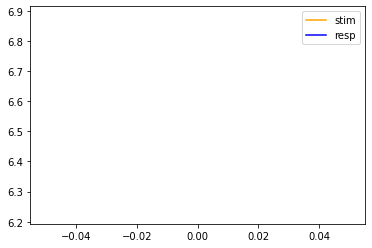

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
import os
results = list()
for type in range(1,2):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.01)
  mid_shape        = int(12)
  D                = [0.05,0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all_4/grupo_cx_"
  path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}/"
  # i = 1
  if not path.exists(path_name):
  #     path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
  #     i = i + 1
  # del i
    os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 31   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(1,2):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        data_subs_pre = []
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          # for block in range(num_blocks):
          data_subs_pre=load_dmcca_data_all_cx_3(subs, mid_shape, type, 31)
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(len(data_subs_pre)):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs, data__,data_sub = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}_sub_{subs_}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

# 80-20 sin organizar 

In [ ]:
data_subs_pre[0][0][0].shape

(10148, 171)

In [ ]:
data_subs_pre[0][0][2].shape

(3245, 171)

In [ ]:
tst_corrs.shape

(2, 1, 1, 1)

In [ ]:
np.mean(tst_corrs[0,:,0,0])

0.5692803500492725

In [ ]:
np.mean(val_corrs[0,:,0,0])

0.5211359890516393

In [ ]:
tst_corrs[0,:,0,0]

array([0.64292856, 0.5404196 , 0.66674185, 0.74066429, 0.56407484,
       0.66524195, 0.33378248, 0.64497042, 0.24489778, 0.64908173])

In [ ]:
val_corrs[0,:,0,0]

array([0.55718854, 0.54370699, 0.61430214, 0.66232406, 0.46088255,
       0.61334867, 0.35404589, 0.52174143, 0.25866177, 0.62515784])

In [ ]:
data_subs_pre[0][1][0].shape

(90401, 8)

# 80-20 organizado

Método 3
eyedee    : 3
best_only : True
epoch_num : 20
dropout   : 0.05
[35.]
Grupo 0
n_subs     : 1
subs       : [0]
D          : [0.05, 0.02]
num_blocks : 10
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 0
stim 269
y_test 215
172 43 54
Stim_train (121573, 1)
Data INITIALIZING for block : 1
stim 269
y_test 215
172 43 54
Stim_train (123434, 1)
Data INITIALIZING for block : 2
stim 269
y_test 215
172 43 54
Stim_train (121766, 1)
Data INITIALIZING for block : 3
stim 269
y_test 215
172 43 54
Stim_train (123682, 1)
Data INITIALIZING for block : 4
stim 269
y_test 215
172 43 54
Stim_train (122713, 1)
Data INITIALIZING for block : 5
stim 269
y_test 215
172 43 54
Stim_train (121790, 1)
Data INITIALIZING for block : 6
stim 269
y_test 215
172 43 54
Stim_train (122382, 1)
Data INITIALIZING for block : 7
stim 269
y_test 215
172 43 54
Stim_train (122255, 1)
Data INITIALIZING for block : 8
stim 269
y_test 215
172 43 54
Stim_train (123742, 1)
Data INITIALIZ

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9981600379153809
CCA Model Ended.
LCCA is : [array(0.99816004), array(0.84224114)]
DMDC corrs are : [0.99816004]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0017
  Validation CORRELATION : -0.0002
  Test CORRELATION       : -0.0004
  val. loss is : 0.0002 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0020
  Validation CORRELATION : 0.0001
  Test CORRELATION       : 0.0004
  val. loss is : -0.0001 & the min. loss is : 0.0002
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0002
  Validation CORRELATION : -0.0001
  Test CORRELATION       : -0.0022
  val. loss is : 0.0001 & the min. loss is : -0.0001
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0029
  Validation CORRELATION : 0.0000
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00031853, dtype=float32), array(0.00031853, dtype=float32)]
DMDC corrs are : [0.00031853]
DONE speech - block_0_drpt_0.05.
[[[[9.98160038e-01]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]


 [[[3.18534439e-04]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]]
[[[[8.42241142e

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9990113119927851
CCA Model Ended.
LCCA is : [array(0.99901131), array(0.97755352)]
DMDC corrs are : [0.99901131]
DMCCA + DCCA : block_1_drpt_0.05
DCCA for block_1_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0026
  Validation CORRELATION : 0.0004
  Test CORRELATION       : 0.0015
  val. loss is : -0.0004 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0045
  Validation CORRELATION : 0.0036
  Test CORRELATION       : 0.0001
  val. loss is : -0.0036 & the min. loss is : -0.0004
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0017
  Validation CORRELATION : -0.0076
  Test CORRELATION       : 0.0000
  val. loss is : 0.0076 & the min. loss is : -0.0036
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0041
  Validation CORRELATION : 0.0068
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00427742, dtype=float32), array(-0.00427742, dtype=float32)]
DMDC corrs are : [-0.00427742]
DONE speech - block_1_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9974817557863171
CCA Model Ended.
LCCA is : [array(0.99748176), array(0.9813215)]
DMDC corrs are : [0.99748176]
DMCCA + DCCA : block_2_drpt_0.05
DCCA for block_2_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0080
  Validation CORRELATION : -0.0060
  Test CORRELATION       : 0.0014
  val. loss is : 0.0060 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0052
  Validation CORRELATION : -0.0001
  Test CORRELATION       : 0.0000
  val. loss is : 0.0001 & the min. loss is : 0.0060
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0103
  Validation CORRELATION : 0.0010
  Test CORRELATION       : 0.0011
  val. loss is : -0.0010 & the min. loss is : 0.0001
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0156
  Validation CORRELATION : 0.0048
  Test CO

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00031603, dtype=float32), array(-0.00031603, dtype=float32)]
DMDC corrs are : [-0.00031603]
DONE speech - block_2_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9998163488276789
CCA Model Ended.
LCCA is : [array(0.99981635), array(0.98244427)]
DMDC corrs are : [0.99981635]
DMCCA + DCCA : block_3_drpt_0.05
DCCA for block_3_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0050
  Validation CORRELATION : 0.0024
  Test CORRELATION       : 0.0001
  val. loss is : -0.0024 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0030
  Validation CORRELATION : -0.0090
  Test CORRELATION       : -0.0001
  val. loss is : 0.0090 & the min. loss is : -0.0024
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0012
  Validation CORRELATION : 0.0001
  Test CORRELATION       : -0.0000
  val. loss is : -0.0001 & the min. loss is : -0.0024
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0009
  Validation CORRELATION : -0.0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(3.8805658e-05, dtype=float32), array(3.8805658e-05, dtype=float32)]
DMDC corrs are : [3.88056578e-05]
DONE speech - block_3_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9999394923061231
CCA Model Ended.
LCCA is : [array(0.99993949), array(0.99189629)]
DMDC corrs are : [0.99993949]
DMCCA + DCCA : block_4_drpt_0.05
DCCA for block_4_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0127
  Validation CORRELATION : -0.0009
  Test CORRELATION       : 0.0002
  val. loss is : 0.0009 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0108
  Validation CORRELATION : -0.0004
  Test CORRELATION       : 0.0002
  val. loss is : 0.0004 & the min. loss is : 0.0009
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0082
  Validation CORRELATION : -0.0032
  Test CORRELATION       : 0.0001
  val. loss is : 0.0032 & the min. loss is : 0.0004
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0114
  Validation CORRELATION : 0.0013
  Tes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00024235, dtype=float32), array(-0.00024235, dtype=float32)]
DMDC corrs are : [-0.00024235]
DONE speech - block_4_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DMDC corrs are : [0.99922073]
DMCCA + DCCA : block_5_drpt_0.05
DCCA for block_5_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0054
  Validation CORRELATION : -0.0000
  Test CORRELATION       : 0.0006
  val. loss is : 0.0000 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0045
  Validation CORRELATION : -0.0005
  Test CORRELATION       : 0.0089
  val. loss is : 0.0005 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0023
  Validation CORRELATION : 0.0001
  Test CORRELATION       : 0.0049
  val. loss is : -0.0001 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0080
  Validation CORRELATION : -0.0000
  Test CORRELATION       : 0.0056
  val. loss is : 0.0000 & the min. loss is : -0.0001
 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.01251784, dtype=float32), array(-0.01251784, dtype=float32)]
DMDC corrs are : [-0.01251784]
DONE speech - block_5_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9981871128821381
CCA Model Ended.
LCCA is : [array(0.99818711), array(0.92935655)]
DMDC corrs are : [0.99818711]
DMCCA + DCCA : block_6_drpt_0.05
DCCA for block_6_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0098
  Validation CORRELATION : -0.0038
  Test CORRELATION       : -0.0001
  val. loss is : 0.0038 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0141
  Validation CORRELATION : 0.0009
  Test CORRELATION       : 0.0000
  val. loss is : -0.0009 & the min. loss is : 0.0038
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0130
  Validation CORRELATION : 0.0048
  Test CORRELATION       : 0.0001
  val. loss is : -0.0048 & the min. loss is : -0.0009
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0097
  Validation CORRELATION : -0.0006
  Test 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(9.246681e-05, dtype=float32), array(9.246681e-05, dtype=float32)]
DMDC corrs are : [9.24668129e-05]
DONE speech - block_6_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9935065046489594
CCA Model Ended.
LCCA is : [array(0.9935065), array(0.92830662)]
DMDC corrs are : [0.9935065]
DMCCA + DCCA : block_7_drpt_0.05
DCCA for block_7_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0054
  Validation CORRELATION : 0.0002
  Test CORRELATION       : 0.0004
  val. loss is : -0.0002 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0024
  Validation CORRELATION : 0.0005
  Test CORRELATION       : -0.0009
  val. loss is : -0.0005 & the min. loss is : -0.0002
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0015
  Validation CORRELATION : 0.0002
  Test CORRELATION       : -0.0001
  val. loss is : -0.0002 & the min. loss is : -0.0005
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0001
  Test

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00091357, dtype=float32), array(-0.00091357, dtype=float32)]
DMDC corrs are : [-0.00091357]
DONE speech - block_7_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9921680570211601
CCA Model Ended.
LCCA is : [array(0.99216806), array(0.86838534)]
DMDC corrs are : [0.99216806]
DMCCA + DCCA : block_8_drpt_0.05
DCCA for block_8_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0019
  Validation CORRELATION : -0.0001
  Test CORRELATION       : -0.0002
  val. loss is : 0.0001 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0030
  Validation CORRELATION : -0.0000
  Test CORRELATION       : 0.0003
  val. loss is : 0.0000 & the min. loss is : 0.0001
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0036
  Validation CORRELATION : 0.0010
  Test CORRELATION       : 0.0042
  val. loss is : -0.0010 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0028
  Validation CORRELATION : -0.0002
  Test 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.004192, dtype=float32), array(0.004192, dtype=float32)]
DMDC corrs are : [0.004192]
DONE speech - block_8_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9993922061906109
CCA Model Ended.
LCCA is : [array(0.99939221), array(0.98754013)]
DMDC corrs are : [0.99939221]
DMCCA + DCCA : block_9_drpt_0.05
DCCA for block_9_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0006
  Validation CORRELATION : 0.0003
  Test CORRELATION       : 0.0003
  val. loss is : -0.0003 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0014
  Validation CORRELATION : 0.0001
  Test CORRELATION       : 0.0000
  val. loss is : -0.0001 & the min. loss is : -0.0003
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0023
  Validation CORRELATION : 0.0056
  Test CORRELATION       : 0.0019
  val. loss is : -0.0056 & the min. loss is : -0.0003
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0050
  Validation CORRELATION : 0.0003
  Te

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00184898, dtype=float32), array(0.00184898, dtype=float32)]
DMDC corrs are : [0.00184898]
DONE speech - block_9_drpt_0.05.
[[[[ 9.98160038e-01]
   [ 0.00000000e+00]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [ 0.00000000e+00]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-03]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9996430656611089
CCA Model Ended.
LCCA is : [array(0.99964307), array(0.96598362)]
DMDC corrs are : [0.99964307]
DMCCA + DCCA : block_0_drpt_0.02
DCCA for block_0_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0110
  Validation CORRELATION : 0.0003
  Test CORRELATION       : 0.0002
  val. loss is : -0.0003 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0011
  Validation CORRELATION : -0.0000
  Test CORRELATION       : 0.0021
  val. loss is : 0.0000 & the min. loss is : -0.0003
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0103
  Validation CORRELATION : -0.0001
  Test CORRELATION       : -0.0001
  val. loss is : 0.0001 & the min. loss is : -0.0003
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0032
  Validation CORRELATION : 0.000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00553319, dtype=float32), array(-0.00553319, dtype=float32)]
DMDC corrs are : [-0.00553319]
DONE speech - block_0_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 0.00000000e+00]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 0.00000000e+00]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9994347564785567
CCA Model Ended.
LCCA is : [array(0.99943476), array(0.98527949)]
DMDC corrs are : [0.99943476]
DMCCA + DCCA : block_1_drpt_0.02
DCCA for block_1_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0087
  Validation CORRELATION : -0.0036
  Test CORRELATION       : -0.0002
  val. loss is : 0.0036 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0023
  Validation CORRELATION : -0.0002
  Test CORRELATION       : -0.0001
  val. loss is : 0.0002 & the min. loss is : 0.0036
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0048
  Validation CORRELATION : -0.0036
  Test CORRELATION       : -0.0000
  val. loss is : 0.0036 & the min. loss is : 0.0002
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0017
  Validation CORRELATION : -0.0012


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00045386, dtype=float32), array(0.00045386, dtype=float32)]
DMDC corrs are : [0.00045386]
DONE speech - block_1_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 0.00000000e+00]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 0.00000000e+00]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-03]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9974610936904545
CCA Model Ended.
LCCA is : [array(0.99746109), array(0.94980014)]
DMDC corrs are : [0.99746109]
DMCCA + DCCA : block_2_drpt_0.02
DCCA for block_2_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0006
  Validation CORRELATION : -0.0039
  Test CORRELATION       : 0.0008
  val. loss is : 0.0039 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0005
  Validation CORRELATION : -0.0016
  Test CORRELATION       : 0.0004
  val. loss is : 0.0016 & the min. loss is : 0.0039
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0008
  Validation CORRELATION : -0.0000
  Test CORRELATION       : -0.0000
  val. loss is : 0.0000 & the min. loss is : 0.0016
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0150
  Validation CORRELATION : -0.0031
  Test

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00212136, dtype=float32), array(0.00212136, dtype=float32)]
DMDC corrs are : [0.00212136]
DONE speech - block_2_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 0.00000000e+00]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [ 0.00000000e+00]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-03]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DMDC corrs are : [0.99272387]
DMCCA + DCCA : block_3_drpt_0.02
DCCA for block_3_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0014
  Validation CORRELATION : 0.0001
  Test CORRELATION       : -0.0001
  val. loss is : -0.0001 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0001
  Test CORRELATION       : 0.0002
  val. loss is : -0.0001 & the min. loss is : -0.0001
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0138
  Validation CORRELATION : -0.0022
  Test CORRELATION       : 0.0002
  val. loss is : 0.0022 & the min. loss is : -0.0001
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0049
  Validation CORRELATION : 0.0054
  Test CORRELATION       : -0.0002
  val. loss is : -0.0054 & the min. loss is : -0.00

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00023558, dtype=float32), array(-0.00023558, dtype=float32)]
DMDC corrs are : [-0.00023558]
DONE speech - block_3_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 0.00000000e+00]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 0.00000000e+00]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9956886089783767
CCA Model Ended.
LCCA is : [array(0.99568861), array(0.97812585)]
DMDC corrs are : [0.99568861]
DMCCA + DCCA : block_4_drpt_0.02
DCCA for block_4_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0056
  Validation CORRELATION : -0.0076
  Test CORRELATION       : 0.0005
  val. loss is : 0.0076 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0014
  Validation CORRELATION : -0.0002
  Test CORRELATION       : 0.0001
  val. loss is : 0.0002 & the min. loss is : 0.0076
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0017
  Validation CORRELATION : 0.0006
  Test CORRELATION       : 0.0001
  val. loss is : -0.0006 & the min. loss is : 0.0002
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0434
  Validation CORRELATION : -0.0045
  Test CO

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(3.4701152e-05, dtype=float32), array(3.4701152e-05, dtype=float32)]
DMDC corrs are : [3.47011519e-05]
DONE speech - block_4_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 9.95688609e-01]]

  [[ 9.99220726e-01]
   [ 0.00000000e+00]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 3.47011519e-05]]

  [[-1.25178359e-02]
   [ 0.00000000e+00]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.848

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9999402034371109
CCA Model Ended.
LCCA is : [array(0.9999402), array(0.98753999)]
DMDC corrs are : [0.9999402]
DMCCA + DCCA : block_5_drpt_0.02
DCCA for block_5_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0003
  Validation CORRELATION : -0.0005
  Test CORRELATION       : 0.0057
  val. loss is : 0.0005 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0015
  Validation CORRELATION : -0.0002
  Test CORRELATION       : -0.0000
  val. loss is : 0.0002 & the min. loss is : 0.0005
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0099
  Validation CORRELATION : -0.0002
  Test CORRELATION       : -0.0001
  val. loss is : 0.0002 & the min. loss is : 0.0002
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0009
  Validation CORRELATION : -0.0000
  Test C

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00757364, dtype=float32), array(-0.00757364, dtype=float32)]
DMDC corrs are : [-0.00757364]
DONE speech - block_5_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 9.95688609e-01]]

  [[ 9.99220726e-01]
   [ 9.99940203e-01]]

  [[ 9.98187113e-01]
   [ 0.00000000e+00]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 3.47011519e-05]]

  [[-1.25178359e-02]
   [-7.57363625e-03]]

  [[ 9.24668129e-05]
   [ 0.00000000e+00]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9997667085853656
CCA Model Ended.
LCCA is : [array(0.99976671), array(0.98827017)]
DMDC corrs are : [0.99976671]
DMCCA + DCCA : block_6_drpt_0.02
DCCA for block_6_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0017
  Validation CORRELATION : -0.0004
  Test CORRELATION       : 0.0015
  val. loss is : 0.0004 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0030
  Validation CORRELATION : 0.0024
  Test CORRELATION       : -0.0034
  val. loss is : -0.0024 & the min. loss is : 0.0004
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : -0.0001
  Test CORRELATION       : 0.0000
  val. loss is : 0.0001 & the min. loss is : -0.0024
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : -0.0000
  Test 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00151995, dtype=float32), array(-0.00151995, dtype=float32)]
DMDC corrs are : [-0.00151995]
DONE speech - block_6_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 9.95688609e-01]]

  [[ 9.99220726e-01]
   [ 9.99940203e-01]]

  [[ 9.98187113e-01]
   [ 9.99766709e-01]]

  [[ 9.93506505e-01]
   [ 0.00000000e+00]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 3.47011519e-05]]

  [[-1.25178359e-02]
   [-7.57363625e-03]]

  [[ 9.24668129e-05]
   [-1.51994976e-03]]

  [[-9.13569063e-04]
   [ 0.00000000e+00]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9960918075362936
CCA Model Ended.
LCCA is : [array(0.99609181), array(0.9542864)]
DMDC corrs are : [0.99609181]
DMCCA + DCCA : block_7_drpt_0.02
DCCA for block_7_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0090
  Validation CORRELATION : 0.0001
  Test CORRELATION       : -0.0003
  val. loss is : -0.0001 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0047
  Validation CORRELATION : 0.0003
  Test CORRELATION       : -0.0005
  val. loss is : -0.0003 & the min. loss is : -0.0001
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0021
  Validation CORRELATION : 0.0002
  Test CORRELATION       : -0.0001
  val. loss is : -0.0002 & the min. loss is : -0.0003
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0062
  Validation CORRELATION : -0.0000
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00023747, dtype=float32), array(-0.00023747, dtype=float32)]
DMDC corrs are : [-0.00023747]
DONE speech - block_7_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 9.95688609e-01]]

  [[ 9.99220726e-01]
   [ 9.99940203e-01]]

  [[ 9.98187113e-01]
   [ 9.99766709e-01]]

  [[ 9.93506505e-01]
   [ 9.96091808e-01]]

  [[ 9.92168057e-01]
   [ 0.00000000e+00]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 3.47011519e-05]]

  [[-1.25178359e-02]
   [-7.57363625e-03]]

  [[ 9.24668129e-05]
   [-1.51994976e-03]]

  [[-9.13569063e-04]
   [-2.37470435e-04]]

  [[ 4.19199886e-03]
   [ 0.00000000e+00]]

  [[ 1.84897613e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9948421864987491
CCA Model Ended.
LCCA is : [array(0.99484219), array(0.93094857)]
DMDC corrs are : [0.99484219]
DMCCA + DCCA : block_8_drpt_0.02
DCCA for block_8_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : -0.0009
  Validation CORRELATION : -0.0001
  Test CORRELATION       : -0.0001
  val. loss is : 0.0001 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0024
  Validation CORRELATION : 0.0001
  Test CORRELATION       : 0.0001
  val. loss is : -0.0001 & the min. loss is : 0.0001
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0014
  Validation CORRELATION : -0.0000
  Test CORRELATION       : -0.0005
  val. loss is : 0.0000 & the min. loss is : -0.0001
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0030
  Validation CORRELATION : -0.0000

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00073592, dtype=float32), array(0.00073592, dtype=float32)]
DMDC corrs are : [0.00073592]
DONE speech - block_8_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 9.95688609e-01]]

  [[ 9.99220726e-01]
   [ 9.99940203e-01]]

  [[ 9.98187113e-01]
   [ 9.99766709e-01]]

  [[ 9.93506505e-01]
   [ 9.96091808e-01]]

  [[ 9.92168057e-01]
   [ 9.94842186e-01]]

  [[ 9.99392206e-01]
   [ 0.00000000e+00]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 3.47011519e-05]]

  [[-1.25178359e-02]
   [-7.57363625e-03]]

  [[ 9.24668129e-05]
   [-1.51994976e-03]]

  [[-9.13569063e-04]
   [-2.37470435e-04]]

  [[ 4.19199886e-03]
   [ 7.35916838e-04]]

  [[ 1.84897613e-03]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9982117496289817
CCA Model Ended.
LCCA is : [array(0.99821175), array(0.94385347)]
DMDC corrs are : [0.99821175]
DMCCA + DCCA : block_9_drpt_0.02
DCCA for block_9_drpt_0.02_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0039
  Validation CORRELATION : 0.0021
  Test CORRELATION       : 0.0064
  val. loss is : -0.0021 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0001
  Test CORRELATION       : -0.0001
  val. loss is : -0.0001 & the min. loss is : -0.0021
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0021
  Validation CORRELATION : 0.0004
  Test CORRELATION       : 0.0002
  val. loss is : -0.0004 & the min. loss is : -0.0021
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0044
  Validation CORRELATION : -0.0000


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00517265, dtype=float32), array(0.00517265, dtype=float32)]
DMDC corrs are : [0.00517265]
DONE speech - block_9_drpt_0.02.
[[[[ 9.98160038e-01]
   [ 9.99643066e-01]]

  [[ 9.99011312e-01]
   [ 9.99434756e-01]]

  [[ 9.97481756e-01]
   [ 9.97461094e-01]]

  [[ 9.99816349e-01]
   [ 9.92723871e-01]]

  [[ 9.99939492e-01]
   [ 9.95688609e-01]]

  [[ 9.99220726e-01]
   [ 9.99940203e-01]]

  [[ 9.98187113e-01]
   [ 9.99766709e-01]]

  [[ 9.93506505e-01]
   [ 9.96091808e-01]]

  [[ 9.92168057e-01]
   [ 9.94842186e-01]]

  [[ 9.99392206e-01]
   [ 9.98211750e-01]]]


 [[[ 3.18534439e-04]
   [-5.53318579e-03]]

  [[-4.27741697e-03]
   [ 4.53856133e-04]]

  [[-3.16033867e-04]
   [ 2.12136377e-03]]

  [[ 3.88056578e-05]
   [-2.35581771e-04]]

  [[-2.42349139e-04]
   [ 3.47011519e-05]]

  [[-1.25178359e-02]
   [-7.57363625e-03]]

  [[ 9.24668129e-05]
   [-1.51994976e-03]]

  [[-9.13569063e-04]
   [-2.37470435e-04]]

  [[ 4.19199886e-03]
   [ 7.35916838e-04]]

  [[ 1.84897613e-03]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.9989664682515571
CCA Model Ended.
LCCA is : [array(0.99896647), array(0.94598669)]
DMDC corrs are : [0.99896647]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     35.0
EPOCH : 0
  Training CORRELATION   : 0.0021
  Validation CORRELATION : 0.0005
  Test CORRELATION       : 0.0001
  val. loss is : -0.0005 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0044
  Validation CORRELATION : -0.0005
  Test CORRELATION       : -0.0000
  val. loss is : 0.0005 & the min. loss is : -0.0005
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0046
  Validation CORRELATION : 0.0007
  Test CORRELATION       : -0.0001
  val. loss is : -0.0007 & the min. loss is : -0.0005
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0035
  Validation CORRELATION : -0.0004
 

RuntimeError: ignored

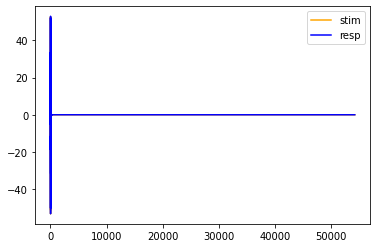

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(3,4):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.01)
  mid_shape        = int(8)
  D                = [0.05,0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales/grupo_"
  path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}/"
  # i = 1
  if not path.exists(path_name):
      # path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
      # i = i + 1
  # del i
      os.mkdir(path_name)
      print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 10   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        data_subs_pre = list()
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          for block in range(num_blocks):
            data_subs_pre.append(load_dmcca_data_cluster(subs, mid_shape, type, block))
            
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
data_subs_pre[0][1][0].shape

(155359, 8)

In [ ]:
tst_corrs.shape

(2, 10, 2, 1)

In [ ]:
np.mean(tst_corrs[0,:,0,0])

0.4854182773014032

In [ ]:
np.mean(val_corrs[0,:,0,0])

0.4903429691307405

In [ ]:
tst_corrs[0,:,0,0]

array([0.32581398, 0.7106275 , 0.28615628, 0.63181812, 0.63728037,
       0.64725187, 0.13211255, 0.71718648, 0.73392018, 0.03201544])

In [ ]:
val_corrs[0,:,0,0]

array([0.36238739, 0.62641036, 0.31016445, 0.60540909, 0.62901815,
       0.69910934, 0.13605003, 0.67455066, 0.69992073, 0.16040948])

# RMS

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_dmcca_1_5_10_0.01_8_0.05/
[37.]
Grupo 3
n_subs     : 1
subs       : [3]
D          : [0.05]
num_blocks : 10
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 0
stim 205
y_test 164
131 33 41
Stim_train (125730, 1)
Data INITIALIZING for block : 1
stim 205
y_test 164
131 33 41
Stim_train (125803, 1)
Data INITIALIZING for block : 2
stim 205
y_test 164
131 33 41
Stim_train (125734, 1)
Data INITIALIZING for block : 3
stim 205
y_test 164
131 33 41
Stim_train (125489, 1)
Data INITIALIZING for block : 4
stim 205
y_test 164
131 33 41
Stim_train (125573, 1)
Data INITIALIZING for block : 5
stim 205
y_test 164
131 33 41
Stim_train (125489, 1)
Data INITIALIZING for block : 6
stim 205
y_test 164
131 33 41
Stim_train (125489, 1)
Data INITIALIZING for block : 7
stim 205
y_test 164
131 33 41
Stim_train (125487, 1)
Data INITIAL

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.4158038342104171
CCA Model Ended.
LCCA is : [array(0.41580383), array(0.42028759)]
DMDC corrs are : [0.41580383]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     37.0
EPOCH : 0
  Training CORRELATION   : 0.0037
  Validation CORRELATION : 0.0060
  Test CORRELATION       : -0.0234
  val. loss is : -0.0060 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0048


RuntimeError: ignored

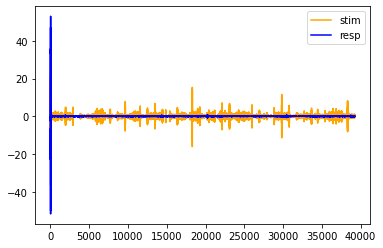

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results_type2 = list()
for type in range(1,2):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.1)
  mid_shape        = int(8)
  D                = [0.05]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_"
  path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
  i = 1
  while path.exists(path_name):
      path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
      i = i + 1
  del i
  os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 10   # IF SPEECH DATA BY LIBERTO ET AL.
      results = list()
      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(3,4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        data_subs_pre = list()
        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          for block in range(num_blocks):
            data_subs_pre.append(load_dmcca_data_cluster(subs, mid_shape, type, block))
          # np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      
  results_type2.append(results)
  results_name = f'{path_name}/results_{str(type)}.npy'
  np.save(results_name, results_type2)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
results_type2.append(results)
results_name = f'{path_name}/results_{str(type)}.npy'
np.save(results_name, results_type2)

In [ ]:
results_type2

[[[array([[[[ 4.94259618e-01],
            [ 5.79059549e-01]],
   
           [[ 2.67989644e-01],
            [ 2.65496012e-01]],
   
           [[ 3.24437745e-01],
            [ 3.44213146e-01]],
   
           [[ 2.41177555e-01],
            [ 2.89817173e-01]],
   
           [[ 5.96824701e-01],
            [ 6.86218289e-01]],
   
           [[ 1.79731718e-01],
            [ 1.70578254e-01]],
   
           [[ 4.53690196e-01],
            [ 2.97717838e-01]],
   
           [[ 5.99590342e-01],
            [ 7.23538129e-01]],
   
           [[ 4.45116117e-01],
            [ 6.61020268e-01]],
   
           [[ 3.70130445e-01],
            [ 4.23085679e-01]]],
   
   
          [[[-3.54672968e-03],
            [ 2.42765527e-03]],
   
           [[-5.49082586e-04],
            [-7.87815172e-03]],
   
           [[-2.66508735e-03],
            [-1.37290999e-03]],
   
           [[-6.44907681e-03],
            [ 9.46872961e-03]],
   
           [[-3.04660969e-03],
            [-1.44731312e-

In [ ]:
import numpy as np
results_type2 = [[[np.array([[[[ 4.94259618e-01],
            [ 5.79059549e-01]],
   
           [[ 2.67989644e-01],
            [ 2.65496012e-01]],
   
           [[ 3.24437745e-01],
            [ 3.44213146e-01]],
   
           [[ 2.41177555e-01],
            [ 2.89817173e-01]],
   
           [[ 5.96824701e-01],
            [ 6.86218289e-01]],
   
           [[ 1.79731718e-01],
            [ 1.70578254e-01]],
   
           [[ 4.53690196e-01],
            [ 2.97717838e-01]],
   
           [[ 5.99590342e-01],
            [ 7.23538129e-01]],
   
           [[ 4.45116117e-01],
            [ 6.61020268e-01]],
   
           [[ 3.70130445e-01],
            [ 4.23085679e-01]]],
   
   
          [[[-3.54672968e-03],
            [ 2.42765527e-03]],
   
           [[-5.49082586e-04],
            [-7.87815172e-03]],
   
           [[-2.66508735e-03],
            [-1.37290999e-03]],
   
           [[-6.44907681e-03],
            [ 9.46872961e-03]],
   
           [[-3.04660969e-03],
            [-1.44731312e-05]],
   
           [[ 2.37902743e-03],
            [-6.11808500e-04]],
   
           [[-7.10096769e-03],
            [-1.35152694e-02]],
   
           [[-5.47311315e-03],
            [-1.61148496e-02]],
   
           [[-6.77838689e-03],
            [ 5.22545399e-03]],
   
           [[-1.47149526e-02],
            [ 1.44529482e-02]]]]), np.array([[[[ 4.91887041e-01],
            [ 5.91875076e-01]],
   
           [[ 3.18471027e-01],
            [ 3.28324843e-01]],
   
           [[ 3.25336266e-01],
            [ 3.47133830e-01]],
   
           [[ 2.15814693e-01],
            [ 2.45180265e-01]],
   
           [[ 6.54061771e-01],
            [ 7.53555812e-01]],
   
           [[ 2.10111605e-01],
            [ 1.94534437e-01]],
   
           [[ 4.32654183e-01],
            [ 3.18362918e-01]],
   
           [[ 6.03324676e-01],
            [ 7.69781211e-01]],
   
           [[ 4.81631007e-01],
            [ 6.84012820e-01]],
   
           [[ 3.94119298e-01],
            [ 4.34081105e-01]]],
   
   
          [[[-3.54672968e-03],
            [ 2.42765527e-03]],
   
           [[-5.49082586e-04],
            [-7.87815172e-03]],
   
           [[-2.66508735e-03],
            [-1.37290999e-03]],
   
           [[-6.44907681e-03],
            [ 9.46872961e-03]],
   
           [[-3.04660969e-03],
            [-1.44731312e-05]],
   
           [[ 2.37902743e-03],
            [-6.11808500e-04]],
   
           [[-7.10096769e-03],
            [-1.35152694e-02]],
   
           [[-5.47311315e-03],
            [-1.61148496e-02]],
   
           [[-6.77838689e-03],
            [ 5.22545399e-03]],
   
           [[-1.47149526e-02],
            [ 1.44529482e-02]]]])], [np.array([[[[ 2.83751913e-01],
            [ 2.20468240e-01]],
   
           [[ 7.48356582e-01],
            [ 8.49683306e-01]],
   
           [[ 4.05920376e-01],
            [ 7.05919869e-01]],
   
           [[ 3.74309156e-01],
            [ 6.66037087e-01]],
   
           [[ 2.12901058e-01],
            [ 2.79943985e-01]],
   
           [[ 4.05565628e-01],
            [ 6.35066378e-01]],
   
           [[ 4.05066274e-01],
            [ 6.94198655e-01]],
   
           [[ 4.14458309e-01],
            [ 7.44570614e-01]],
   
           [[ 6.87099377e-01],
            [ 8.33332687e-01]],
   
           [[ 3.36246781e-01],
            [ 3.65580436e-01]]],
   
   
          [[[ 5.23004960e-03],
            [ 8.89487751e-03]],
   
           [[ 3.67678655e-03],
            [ 9.92756337e-03]],
   
           [[ 1.97990052e-03],
            [ 3.03623849e-03]],
   
           [[ 2.61926022e-03],
            [ 1.22158183e-03]],
   
           [[-8.80183280e-03],
            [-2.60536117e-03]],
   
           [[ 5.88233722e-03],
            [ 4.83655138e-03]],
   
           [[ 4.28667711e-03],
            [ 6.53783651e-03]],
   
           [[ 3.31309927e-03],
            [-3.70150339e-03]],
   
           [[ 2.08121864e-03],
            [-5.39159111e-04]],
   
           [[-1.84088964e-02],
            [-3.66601138e-03]]]]), np.array([[[[ 3.04921304e-01],
            [ 2.58697534e-01]],
   
           [[ 7.20581961e-01],
            [ 8.20266684e-01]],
   
           [[ 4.17078693e-01],
            [ 7.14439883e-01]],
   
           [[ 3.76333739e-01],
            [ 6.75025061e-01]],
   
           [[ 2.33836684e-01],
            [ 3.07513292e-01]],
   
           [[ 4.64536950e-01],
            [ 7.16800254e-01]],
   
           [[ 4.61437819e-01],
            [ 7.61779138e-01]],
   
           [[ 3.96914132e-01],
            [ 7.32742934e-01]],
   
           [[ 6.12943601e-01],
            [ 7.67193073e-01]],
   
           [[ 3.92232757e-01],
            [ 4.06168187e-01]]],
   
   
          [[[ 5.23004960e-03],
            [ 8.89487751e-03]],
   
           [[ 3.67678655e-03],
            [ 9.92756337e-03]],
   
           [[ 1.97990052e-03],
            [ 3.03623849e-03]],
   
           [[ 2.61926022e-03],
            [ 1.22158183e-03]],
   
           [[-8.80183280e-03],
            [-2.60536117e-03]],
   
           [[ 5.88233722e-03],
            [ 4.83655138e-03]],
   
           [[ 4.28667711e-03],
            [ 6.53783651e-03]],
   
           [[ 3.31309927e-03],
            [-3.70150339e-03]],
   
           [[ 2.08121864e-03],
            [-5.39159111e-04]],
   
           [[-1.84088964e-02],
            [-3.66601138e-03]]]])], [np.array([[[[ 5.97154459e-01],
            [ 7.06972036e-01]],
   
           [[ 4.45388574e-01],
            [ 3.52329558e-01]],
   
           [[ 3.94146210e-01],
            [ 3.86931862e-01]],
   
           [[ 3.93798282e-01],
            [ 5.77830242e-01]],
   
           [[ 4.06979821e-01],
            [ 7.98702512e-01]],
   
           [[ 4.76202140e-01],
            [ 8.31538614e-01]],
   
           [[ 7.03062195e-01],
            [ 7.83827674e-01]],
   
           [[ 4.01428263e-01],
            [ 7.31885707e-01]],
   
           [[ 3.08113940e-01],
            [ 4.09294190e-01]],
   
           [[ 2.20380767e-01],
            [ 4.41711356e-01]]],
   
   
          [[[ 8.93880334e-03],
            [-8.55403603e-04]],
   
           [[-2.98513379e-03],
            [ 3.14573990e-03]],
   
           [[-1.39431413e-02],
            [-1.01239495e-02]],
   
           [[ 1.65602323e-02],
            [ 9.16025427e-04]],
   
           [[ 6.23173267e-03],
            [-4.00091894e-03]],
   
           [[-3.73121002e-03],
            [-2.87920493e-03]],
   
           [[ 3.23006175e-02],
            [ 1.34551395e-02]],
   
           [[-4.85806540e-03],
            [-1.72517803e-02]],
   
           [[-3.16303084e-03],
            [ 2.06793635e-03]],
   
           [[ 2.72791870e-02],
            [-5.41542948e-04]]]]), np.array([[[[ 5.93669034e-01],
            [ 7.13702923e-01]],
   
           [[ 5.42515474e-01],
            [ 4.46237040e-01]],
   
           [[ 4.66189166e-01],
            [ 4.39808350e-01]],
   
           [[ 4.28963348e-01],
            [ 6.16440149e-01]],
   
           [[ 5.54692022e-01],
            [ 7.70461999e-01]],
   
           [[ 5.12501657e-01],
            [ 8.55344873e-01]],
   
           [[ 7.24423356e-01],
            [ 7.34022370e-01]],
   
           [[ 3.88923290e-01],
            [ 6.98618658e-01]],
   
           [[ 3.04763787e-01],
            [ 4.23407802e-01]],
   
           [[ 2.52981937e-01],
            [ 5.19600671e-01]]],
   
   
          [[[ 8.93880334e-03],
            [-8.55403603e-04]],
   
           [[-2.98513379e-03],
            [ 3.14573990e-03]],
   
           [[-1.39431413e-02],
            [-1.01239495e-02]],
   
           [[ 1.65602323e-02],
            [ 9.16025427e-04]],
   
           [[ 6.23173267e-03],
            [-4.00091894e-03]],
   
           [[-3.73121002e-03],
            [-2.87920493e-03]],
   
           [[ 3.23006175e-02],
            [ 1.34551395e-02]],
   
           [[-4.85806540e-03],
            [-1.72517803e-02]],
   
           [[-3.16303084e-03],
            [ 2.06793635e-03]],
   
           [[ 2.72791870e-02],
            [-5.41542948e-04]]]])], [np.array([[[[ 0.27047712],
            [ 0.27769075]],
   
           [[ 0.51018498],
            [ 0.73955962]],
   
           [[ 0.3563054 ],
            [ 0.38679034]],
   
           [[ 0.38260686],
            [ 0.41377217]],
   
           [[ 0.18036123],
            [ 0.24240422]],
   
           [[ 0.31140761],
            [ 0.35863455]],
   
           [[ 0.55904585],
            [ 0.61151175]],
   
           [[ 0.37271205],
            [ 0.3901318 ]],
   
           [[ 0.39896191],
            [ 0.42359755]],
   
           [[ 0.27126981],
            [ 0.79545193]]],
   
   
          [[[ 0.00741817],
            [-0.00580089]],
   
           [[ 0.00667923],
            [-0.00933049]],
   
           [[ 0.00931477],
            [ 0.00860611]],
   
           [[ 0.01767049],
            [-0.05301914]],
   
           [[ 0.04044234],
            [ 0.01158386]],
   
           [[ 0.00153484],
            [ 0.00403161]],
   
           [[-0.00905639],
            [ 0.01750603]],
   
           [[ 0.00701124],
            [ 0.01899123]],
   
           [[ 0.01718635],
            [ 0.00454506]],
   
           [[-0.00858871],
            [ 0.02624677]]]]), np.array([[[[ 0.21852548],
            [ 0.22370762]],
   
           [[ 0.5186394 ],
            [ 0.73029161]],
   
           [[ 0.37386977],
            [ 0.40748311]],
   
           [[ 0.33791077],
            [ 0.3624945 ]],
   
           [[ 0.29485751],
            [ 0.3623007 ]],
   
           [[ 0.20893159],
            [ 0.46194727]],
   
           [[ 0.55585835],
            [ 0.60940802]],
   
           [[ 0.44275511],
            [ 0.42187102]],
   
           [[ 0.41816027],
            [ 0.47744724]],
   
           [[ 0.30148462],
            [ 0.76686753]]],
   
   
          [[[ 0.00741817],
            [-0.00580089]],
   
           [[ 0.00667923],
            [-0.00933049]],
   
           [[ 0.00931477],
            [ 0.00860611]],
   
           [[ 0.01767049],
            [-0.05301914]],
   
           [[ 0.04044234],
            [ 0.01158386]],
   
           [[ 0.00153484],
            [ 0.00403161]],
   
           [[-0.00905639],
            [ 0.01750603]],
   
           [[ 0.00701124],
            [ 0.01899123]],
   
           [[ 0.01718635],
            [ 0.00454506]],
   
           [[-0.00858871],
            [ 0.02624677]]]])]]]

In [ ]:
len(results_type2[0])

4

In [ ]:
np.mean(results_type2[0][2][0][0,:,0,0])

0.4346654651

In [ ]:
np.mean(results_type2[0][3][0][0,:,0,0])

0.36133328200000003

# 80-20 organizado

In [ ]:
data_subs_pre[0][1][0].shape

(155359, 8)

In [ ]:
tst_corrs.shape

(2, 10, 2, 1)

In [ ]:
np.mean(tst_corrs[0,:,0,0])

0.49195455464798615

In [ ]:
np.mean(val_corrs[0,:,0,0])

0.49137048314316256

In [ ]:
tst_corrs[0,:,0,0]

array([0.39993089, 0.39327756, 0.59244889, 0.5691353 , 0.63333561,
       0.4081389 , 0.47815258, 0.4851035 , 0.52413746, 0.43588486])

In [ ]:
val_corrs[0,:,0,0]

array([0.35045887, 0.44065526, 0.52919204, 0.54193274, 0.65220043,
       0.43283592, 0.47189807, 0.49252803, 0.54225904, 0.45974442])

# prueba organizando el CV

Método 1
eyedee    : 1
best_only : True
epoch_num : 20
dropout   : 0.05
/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_dmcca_1_5_10_0.1_8_0.05_42/
[52.]
Grupo 0
n_subs     : 1
subs       : [0]
D          : [0.05, 0.02]
num_blocks : 10
num_blocks_start: 5
num_blocks_end  : 10
num_blocks_net  : 5
Data INITIALIZING for block : 0


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


TRAIN: [ 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129
 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147
 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165
 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183
 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 204 205 206 207 208 209 210 211 212 213 214 215] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Stim_train (185952, 1)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  44  45  46

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


DEEP MCCA + LCCA
Started multiway DCCA.
19
8
seed:     52.0
Started training.


/content/drive/Shareddrives/GCPDS/databases/Databases_musica/toolbox_deep/deep-cca-for-audio-EEG/deep_losses.py:35: UserWarning: torch.symeig is deprecated in favor of torch.linalg.eigh and will be removed in a future PyTorch release.
The default behavior has changed from using the upper triangular portion of the matrix by default to using the lower triangular portion.
L, _ = torch.symeig(A, upper=upper)
should be replaced with
L = torch.linalg.eigvalsh(A, UPLO='U' if upper else 'L')
and
L, V = torch.symeig(A, eigenvectors=True)
should be replaced with
L, V = torch.linalg.eigh(A, UPLO='U' if upper else 'L') (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:2500.)
  [D1, V1] = torch.symeig(SigmaHat11, eigenvectors=True)


EPOCH : 0
  Training corr LOSS   : 0.3162
0.31622778288610687 - 0.6153053477570251 = 0.25469720363616943
  Validation corr LOSS : 0.3162
0.3162277936935425 - 0.41133183240890503 = 0.275094598531723
torch.Size([51737, 27])
  Test corr LOSS       : 0.3162
0.3162277638912201 - 0.592204749584198 = 0.25700730085372925
  val. loss is : -0.2751 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training corr LOSS   : 0.3162
0.3162277786286323 - 0.6153691076970362 = 0.25469091534614563
  Validation corr LOSS : 0.3162
0.3162277638912201 - 0.4152040183544159 = 0.2747073769569397
torch.Size([51737, 27])
  Test corr LOSS       : 0.3162
0.3162277936935425 - 0.5880674123764038 = 0.2574210464954376
  val. loss is : -0.2747 & the min. loss is : -0.2751
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training corr LOSS   : 0.3162
0.3162277789561303 - 0.6152601602313282 = 0.25470176339149475
  Validat

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.35982062008882126
CCA Model Ended.
LCCA is : [array(0.35982062), array(0.54489863)]
DMDC corrs are : [0.35982062]
DMCCA + DCCA : block_0_drpt_0.05
DCCA for block_0_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0067
  Validation CORRELATION : 0.0042
  Test CORRELATION       : 0.0073
  val. loss is : -0.0042 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0103
  Validation CORRELATION : 0.0067
  Test CORRELATION       : 0.0057
  val. loss is : -0.0067 & the min. loss is : -0.0042
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0112
  Validation CORRELATION : 0.0044
  Test CORRELATION       : -0.0072
  val. loss is : -0.0044 & the min. loss is : -0.0067
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : -0.0101
  Validation CORRELATION : -0.0413


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00146905, dtype=float32), array(0.00146905, dtype=float32)]
DMDC corrs are : [0.00146905]
DONE speech - block_0_drpt_0.05.
[[[[0.35982062]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]


 [[[0.00146905]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]]
[[[[0.54489863]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.23208322819651633
CCA Model Ended.
LCCA is : [array(0.23208323), array(0.35568044)]
DMDC corrs are : [0.23208323]
DMCCA + DCCA : block_1_drpt_0.05
DCCA for block_1_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0061
  Validation CORRELATION : 0.0022
  Test CORRELATION       : 0.0015
  val. loss is : -0.0022 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0090
  Validation CORRELATION : 0.0089
  Test CORRELATION       : 0.0006
  val. loss is : -0.0089 & the min. loss is : -0.0022
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0046
  Test CORRELATION       : -0.0004
  val. loss is : -0.0046 & the min. loss is : -0.0089
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0132
  Validation CORRELATION : 0.0056
  Test

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00242969, dtype=float32), array(0.00242969, dtype=float32)]
DMDC corrs are : [0.00242969]
DONE speech - block_1_drpt_0.05.
[[[[0.35982062]
   [0.        ]]

  [[0.23208323]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]


 [[[0.00146905]
   [0.        ]]

  [[0.00242969]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]]
[[[[0.54489863]
   [0.        ]]

  [[0.35568044]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.13276178754232515
CCA Model Ended.
LCCA is : [array(0.13276179), array(0.2118918)]
DMDC corrs are : [0.13276179]
DMCCA + DCCA : block_2_drpt_0.05
DCCA for block_2_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0055
  Validation CORRELATION : -0.0008
  Test CORRELATION       : 0.0177
  val. loss is : 0.0008 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0148
  Validation CORRELATION : 0.0168
  Test CORRELATION       : -0.0080
  val. loss is : -0.0168 & the min. loss is : 0.0008
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0049
  Validation CORRELATION : 0.0380
  Test CORRELATION       : 0.0028
  val. loss is : -0.0380 & the min. loss is : -0.0168
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0037
  Validation CORRELATION : 0.0089
  Test C

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00275761, dtype=float32), array(0.00275761, dtype=float32)]
DMDC corrs are : [0.00275761]
DONE speech - block_2_drpt_0.05.
[[[[0.35982062]
   [0.        ]]

  [[0.23208323]
   [0.        ]]

  [[0.13276179]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]


 [[[0.00146905]
   [0.        ]]

  [[0.00242969]
   [0.        ]]

  [[0.00275761]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]]
[[[[0.54489863]
   [0.        ]]

  [[0.35568044]
   [0.        ]]

  [[0.2118918 ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.6317235986545434
CCA Model Ended.
LCCA is : [array(0.6317236), array(0.76730598)]
DMDC corrs are : [0.6317236]
DMCCA + DCCA : block_3_drpt_0.05
DCCA for block_3_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0084
  Validation CORRELATION : 0.0188
  Test CORRELATION       : 0.0084
  val. loss is : -0.0188 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : nan
  Validation CORRELATION : -0.0006
  Test CORRELATION       : -0.0042
  val. loss is : 0.0006 & the min. loss is : -0.0188
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0063
  Validation CORRELATION : 0.0026
  Test CORRELATION       : 0.0014
  val. loss is : -0.0026 & the min. loss is : -0.0188
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0005
  Validation CORRELATION : -0.0110
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00837454, dtype=float32), array(0.00837454, dtype=float32)]
DMDC corrs are : [0.00837454]
DONE speech - block_3_drpt_0.05.
[[[[0.35982062]
   [0.        ]]

  [[0.23208323]
   [0.        ]]

  [[0.13276179]
   [0.        ]]

  [[0.6317236 ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]


 [[[0.00146905]
   [0.        ]]

  [[0.00242969]
   [0.        ]]

  [[0.00275761]
   [0.        ]]

  [[0.00837454]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]]]]
[[[[0.54489863]
   [0.        ]]

  [[0.35568044]
   [0.        ]]

  [[0.2118918 ]
   [0.        ]]

  [[0.76730598]
   [0.        ]]

  [[0.        ]
   [0.        ]]

  [[0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.4064149910255206
CCA Model Ended.
LCCA is : [array(0.40641499), array(0.61867052)]
DMDC corrs are : [0.40641499]
DMCCA + DCCA : block_4_drpt_0.05
DCCA for block_4_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0030
  Validation CORRELATION : 0.0229
  Test CORRELATION       : 0.0054
  val. loss is : -0.0229 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0002
  Validation CORRELATION : 0.0208
  Test CORRELATION       : -0.0036
  val. loss is : -0.0208 & the min. loss is : -0.0229
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0017
  Validation CORRELATION : -0.0308
  Test CORRELATION       : -0.0084
  val. loss is : 0.0308 & the min. loss is : -0.0229
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0045
  Validation CORRELATION : 0.0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(4.5303594e-05, dtype=float32), array(4.5303594e-05, dtype=float32)]
DMDC corrs are : [4.53035937e-05]
DONE speech - block_4_drpt_0.05.
[[[[3.59820620e-01]
   [0.00000000e+00]]

  [[2.32083228e-01]
   [0.00000000e+00]]

  [[1.32761788e-01]
   [0.00000000e+00]]

  [[6.31723599e-01]
   [0.00000000e+00]]

  [[4.06414991e-01]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]


 [[[1.46905228e-03]
   [0.00000000e+00]]

  [[2.42968765e-03]
   [0.00000000e+00]]

  [[2.75760586e-03]
   [0.00000000e+00]]

  [[8.37453734e-03]
   [0.00000000e+00]]

  [[4.53035937e-05]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]]
[[[[5

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.13493420935856687
CCA Model Ended.
LCCA is : [array(0.13493421), array(0.22855312)]
DMDC corrs are : [0.13493421]
DMCCA + DCCA : block_5_drpt_0.05
DCCA for block_5_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0051
  Validation CORRELATION : -0.0002
  Test CORRELATION       : 0.0112
  val. loss is : 0.0002 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0108
  Validation CORRELATION : 0.0015
  Test CORRELATION       : 0.0055
  val. loss is : -0.0015 & the min. loss is : 0.0002
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0116
  Validation CORRELATION : 0.0097
  Test CORRELATION       : -0.0024
  val. loss is : -0.0097 & the min. loss is : -0.0015
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0127
  Validation CORRELATION : 0.0039
  Tes

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.01540646, dtype=float32), array(0.01540646, dtype=float32)]
DMDC corrs are : [0.01540646]
DONE speech - block_5_drpt_0.05.
[[[[3.59820620e-01]
   [0.00000000e+00]]

  [[2.32083228e-01]
   [0.00000000e+00]]

  [[1.32761788e-01]
   [0.00000000e+00]]

  [[6.31723599e-01]
   [0.00000000e+00]]

  [[4.06414991e-01]
   [0.00000000e+00]]

  [[1.34934209e-01]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]


 [[[1.46905228e-03]
   [0.00000000e+00]]

  [[2.42968765e-03]
   [0.00000000e+00]]

  [[2.75760586e-03]
   [0.00000000e+00]]

  [[8.37453734e-03]
   [0.00000000e+00]]

  [[4.53035937e-05]
   [0.00000000e+00]]

  [[1.54064633e-02]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]]
[[[[5.44898628e

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.5115358658705289
CCA Model Ended.
LCCA is : [array(0.51153587), array(0.64591052)]
DMDC corrs are : [0.51153587]
DMCCA + DCCA : block_6_drpt_0.05
DCCA for block_6_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : -0.0006
  Validation CORRELATION : -0.0100
  Test CORRELATION       : -0.0075
  val. loss is : 0.0100 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0120
  Validation CORRELATION : -0.0357
  Test CORRELATION       : 0.0033
  val. loss is : 0.0357 & the min. loss is : 0.0100
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : -0.0050
  Validation CORRELATION : 0.0346
  Test CORRELATION       : 0.0081
  val. loss is : -0.0346 & the min. loss is : 0.0100
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0049
  Validation CORRELATION : 0.0153
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00239628, dtype=float32), array(0.00239628, dtype=float32)]
DMDC corrs are : [0.00239628]
DONE speech - block_6_drpt_0.05.
[[[[3.59820620e-01]
   [0.00000000e+00]]

  [[2.32083228e-01]
   [0.00000000e+00]]

  [[1.32761788e-01]
   [0.00000000e+00]]

  [[6.31723599e-01]
   [0.00000000e+00]]

  [[4.06414991e-01]
   [0.00000000e+00]]

  [[1.34934209e-01]
   [0.00000000e+00]]

  [[5.11535866e-01]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]


 [[[1.46905228e-03]
   [0.00000000e+00]]

  [[2.42968765e-03]
   [0.00000000e+00]]

  [[2.75760586e-03]
   [0.00000000e+00]]

  [[8.37453734e-03]
   [0.00000000e+00]]

  [[4.53035937e-05]
   [0.00000000e+00]]

  [[1.54064633e-02]
   [0.00000000e+00]]

  [[2.39627738e-03]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]

  [[0.00000000e+00]
   [0.00000000e+00]]]]
[[[[5.44898628e

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.45194371295216423
CCA Model Ended.
LCCA is : [array(0.45194371), array(0.6538816)]
DMDC corrs are : [0.45194371]
DMCCA + DCCA : block_7_drpt_0.05
DCCA for block_7_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : -0.0075
  Validation CORRELATION : -0.0056
  Test CORRELATION       : -0.0020
  val. loss is : 0.0056 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0088
  Validation CORRELATION : -0.0314
  Test CORRELATION       : 0.0050
  val. loss is : 0.0314 & the min. loss is : 0.0056
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0038
  Validation CORRELATION : -0.0240
  Test CORRELATION       : 0.0026
  val. loss is : 0.0240 & the min. loss is : 0.0056
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : -0.0014
  Validation CORRELATION : -0.00

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00111251, dtype=float32), array(-0.00111251, dtype=float32)]
DMDC corrs are : [-0.00111251]
DONE speech - block_7_drpt_0.05.
[[[[ 3.59820620e-01]
   [ 0.00000000e+00]]

  [[ 2.32083228e-01]
   [ 0.00000000e+00]]

  [[ 1.32761788e-01]
   [ 0.00000000e+00]]

  [[ 6.31723599e-01]
   [ 0.00000000e+00]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 0.00000000e+00]]

  [[ 2.42968765e-03]
   [ 0.00000000e+00]]

  [[ 2.75760586e-03]
   [ 0.00000000e+00]]

  [[ 8.37453734e-03]
   [ 0.00000000e+00]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]

  [[ 0.00000000e+

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.0883932145293422
CCA Model Ended.
LCCA is : [array(0.08839321), array(0.17914058)]
DMDC corrs are : [0.08839321]
DMCCA + DCCA : block_8_drpt_0.05
DCCA for block_8_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0158
  Validation CORRELATION : -0.0095
  Test CORRELATION       : 0.0153
  val. loss is : 0.0095 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0156
  Validation CORRELATION : -0.0089
  Test CORRELATION       : 0.0049
  val. loss is : 0.0089 & the min. loss is : 0.0095
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0186
  Validation CORRELATION : -0.0067
  Test CORRELATION       : -0.0007
  val. loss is : 0.0067 & the min. loss is : 0.0089
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0018
  Validation CORRELATION : -0.0055
  Test C

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00606, dtype=float32), array(-0.00606, dtype=float32)]
DMDC corrs are : [-0.00606]
DONE speech - block_8_drpt_0.05.
[[[[ 3.59820620e-01]
   [ 0.00000000e+00]]

  [[ 2.32083228e-01]
   [ 0.00000000e+00]]

  [[ 1.32761788e-01]
   [ 0.00000000e+00]]

  [[ 6.31723599e-01]
   [ 0.00000000e+00]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 0.00000000e+00]]

  [[ 2.42968765e-03]
   [ 0.00000000e+00]]

  [[ 2.75760586e-03]
   [ 0.00000000e+00]]

  [[ 8.37453734e-03]
   [ 0.00000000e+00]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 0.00000000e+00]
   [ 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.07693655994873871
CCA Model Ended.
LCCA is : [array(0.07693656), array(0.12128948)]
DMDC corrs are : [0.07693656]
DMCCA + DCCA : block_9_drpt_0.05
DCCA for block_9_drpt_0.05_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0211
  Validation CORRELATION : -0.0060
  Test CORRELATION       : 0.0117
  val. loss is : 0.0060 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0006
  Validation CORRELATION : -0.0106
  Test CORRELATION       : 0.0130
  val. loss is : 0.0106 & the min. loss is : 0.0060
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0036
  Validation CORRELATION : -0.0005
  Test CORRELATION       : 0.0176
  val. loss is : 0.0005 & the min. loss is : 0.0060
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0107
  Validation CORRELATION : -0.0021
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.01607017, dtype=float32), array(0.01607017, dtype=float32)]
DMDC corrs are : [0.01607017]
DONE speech - block_9_drpt_0.05.
[[[[ 3.59820620e-01]
   [ 0.00000000e+00]]

  [[ 2.32083228e-01]
   [ 0.00000000e+00]]

  [[ 1.32761788e-01]
   [ 0.00000000e+00]]

  [[ 6.31723599e-01]
   [ 0.00000000e+00]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 0.00000000e+00]]

  [[ 2.42968765e-03]
   [ 0.00000000e+00]]

  [[ 2.75760586e-03]
   [ 0.00000000e+00]]

  [[ 8.37453734e-03]
   [ 0.00000000e+00]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.2657080103627259
CCA Model Ended.
LCCA is : [array(0.26570801), array(0.43331805)]
DMDC corrs are : [0.26570801]
DMCCA + DCCA : block_0_drpt_0.02
DCCA for block_0_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0135
  Validation CORRELATION : -0.0504
  Test CORRELATION       : 0.0166
  val. loss is : 0.0504 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0067
  Validation CORRELATION : -0.0033
  Test CORRELATION       : -0.0034
  val. loss is : 0.0033 & the min. loss is : 0.0504
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0047
  Validation CORRELATION : 0.0100
  Test CORRELATION       : 0.0024
  val. loss is : -0.0100 & the min. loss is : 0.0033
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0067
  Validation CORRELATION : -0.0001
  Test CO

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00601635, dtype=float32), array(0.00601635, dtype=float32)]
DMDC corrs are : [0.00601635]
DONE speech - block_0_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 0.00000000e+00]]

  [[ 1.32761788e-01]
   [ 0.00000000e+00]]

  [[ 6.31723599e-01]
   [ 0.00000000e+00]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 0.00000000e+00]]

  [[ 2.75760586e-03]
   [ 0.00000000e+00]]

  [[ 8.37453734e-03]
   [ 0.00000000e+00]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.2455184846437196
CCA Model Ended.
LCCA is : [array(0.24551848), array(0.38604506)]
DMDC corrs are : [0.24551848]
DMCCA + DCCA : block_1_drpt_0.02
DCCA for block_1_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0082
  Validation CORRELATION : 0.0050
  Test CORRELATION       : 0.0117
  val. loss is : -0.0050 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0041
  Validation CORRELATION : 0.0024
  Test CORRELATION       : 0.0091
  val. loss is : -0.0024 & the min. loss is : -0.0050
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0032
  Validation CORRELATION : -0.0097
  Test CORRELATION       : 0.0136
  val. loss is : 0.0097 & the min. loss is : -0.0050
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0162
  Validation CORRELATION : -0.0018

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.01462967, dtype=float32), array(0.01462967, dtype=float32)]
DMDC corrs are : [0.01462967]
DONE speech - block_1_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 0.00000000e+00]]

  [[ 6.31723599e-01]
   [ 0.00000000e+00]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 0.00000000e+00]]

  [[ 8.37453734e-03]
   [ 0.00000000e+00]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.17194163378173724
CCA Model Ended.
LCCA is : [array(0.17194163), array(0.29152511)]
DMDC corrs are : [0.17194163]
DMCCA + DCCA : block_2_drpt_0.02
DCCA for block_2_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0037
  Validation CORRELATION : -0.0300
  Test CORRELATION       : 0.0046
  val. loss is : 0.0300 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0056
  Validation CORRELATION : -0.0342
  Test CORRELATION       : -0.0079
  val. loss is : 0.0342 & the min. loss is : 0.0300
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0038
  Validation CORRELATION : -0.0261
  Test CORRELATION       : 0.0044
  val. loss is : 0.0261 & the min. loss is : 0.0300
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0007
  Validation CORRELATION : -0.0315
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.0136972, dtype=float32), array(0.0136972, dtype=float32)]
DMDC corrs are : [0.0136972]
DONE speech - block_2_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 0.00000000e+00]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 0.00000000e+00]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.6134387779546301
CCA Model Ended.
LCCA is : [array(0.61343878), array(0.75086548)]
DMDC corrs are : [0.61343878]
DMCCA + DCCA : block_3_drpt_0.02
DCCA for block_3_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : -0.0092
  Validation CORRELATION : -0.0269
  Test CORRELATION       : 0.0024
  val. loss is : 0.0269 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0002
  Validation CORRELATION : 0.0334
  Test CORRELATION       : -0.0009
  val. loss is : -0.0334 & the min. loss is : 0.0269
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0002
  Test CORRELATION       : 0.0005
  val. loss is : -0.0002 & the min. loss is : -0.0334
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : nan
  Test CORR

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.02311615, dtype=float32), array(0.02311615, dtype=float32)]
DMDC corrs are : [0.02311615]
DONE speech - block_3_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 0.00000000e+00]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 0.00000000e+00]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.5157013614427716
CCA Model Ended.
LCCA is : [array(0.51570136), array(0.70247893)]
DMDC corrs are : [0.51570136]
DMCCA + DCCA : block_4_drpt_0.02
DCCA for block_4_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : -0.0038
  Validation CORRELATION : -0.0254
  Test CORRELATION       : 0.0031
  val. loss is : 0.0254 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0056
  Validation CORRELATION : -0.0181
  Test CORRELATION       : 0.0017
  val. loss is : 0.0181 & the min. loss is : 0.0254
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0001
  Test CORRELATION       : -0.0000
  val. loss is : -0.0001 & the min. loss is : 0.0181
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : 0.0042
  Validation CORRELATION : 0.0234
  Test CORR

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00625481, dtype=float32), array(0.00625481, dtype=float32)]
DMDC corrs are : [0.00625481]
DONE speech - block_4_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 5.15701361e-01]]

  [[ 1.34934209e-01]
   [ 0.00000000e+00]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 6.25480944e-03]]

  [[ 1.54064633e-02]
   [ 0.00000000e+00]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.1485721684466299
CCA Model Ended.
LCCA is : [array(0.14857217), array(0.29393785)]
DMDC corrs are : [0.14857217]
DMCCA + DCCA : block_5_drpt_0.02
DCCA for block_5_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0057
  Validation CORRELATION : -0.0074
  Test CORRELATION       : 0.0047
  val. loss is : 0.0074 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0033
  Validation CORRELATION : 0.0008
  Test CORRELATION       : 0.0077
  val. loss is : -0.0008 & the min. loss is : 0.0074
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : 0.0122
  Validation CORRELATION : -0.0043
  Test CORRELATION       : 0.0079
  val. loss is : 0.0043 & the min. loss is : -0.0008
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0041
  Validation CORRELATION : 0.0077
  Te

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00487272, dtype=float32), array(-0.00487272, dtype=float32)]
DMDC corrs are : [-0.00487272]
DONE speech - block_5_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 5.15701361e-01]]

  [[ 1.34934209e-01]
   [ 1.48572168e-01]]

  [[ 5.11535866e-01]
   [ 0.00000000e+00]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 6.25480944e-03]]

  [[ 1.54064633e-02]
   [-4.87272115e-03]]

  [[ 2.39627738e-03]
   [ 0.00000000e+00]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.48509595923293286
CCA Model Ended.
LCCA is : [array(0.48509596), array(0.61834897)]
DMDC corrs are : [0.48509596]
DMCCA + DCCA : block_6_drpt_0.02
DCCA for block_6_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0035
  Validation CORRELATION : -0.0010
  Test CORRELATION       : 0.0021
  val. loss is : 0.0010 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is False
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0052
  Validation CORRELATION : -0.0059
  Test CORRELATION       : 0.0034
  val. loss is : 0.0059 & the min. loss is : 0.0010
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0004
  Test CORRELATION       : -0.0016
  val. loss is : -0.0004 & the min. loss is : 0.0010
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 2

EPOCH : 3
  Training CORRELATION   : -0.0076
  Validation CORRELATION : 0.0079
  Test

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(-0.00859677, dtype=float32), array(-0.00859677, dtype=float32)]
DMDC corrs are : [-0.00859677]
DONE speech - block_6_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 5.15701361e-01]]

  [[ 1.34934209e-01]
   [ 1.48572168e-01]]

  [[ 5.11535866e-01]
   [ 4.85095959e-01]]

  [[ 4.51943713e-01]
   [ 0.00000000e+00]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 6.25480944e-03]]

  [[ 1.54064633e-02]
   [-4.87272115e-03]]

  [[ 2.39627738e-03]
   [-8.59677326e-03]]

  [[-1.11250731e-03]
   [ 0.00000000e+00]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.2665032937441899
CCA Model Ended.
LCCA is : [array(0.26650329), array(0.41411359)]
DMDC corrs are : [0.26650329]
DMCCA + DCCA : block_7_drpt_0.02
DCCA for block_7_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0040
  Validation CORRELATION : 0.0110
  Test CORRELATION       : 0.0048
  val. loss is : -0.0110 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : 0.0141
  Validation CORRELATION : 0.0124
  Test CORRELATION       : 0.0047
  val. loss is : -0.0124 & the min. loss is : -0.0110
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 1

EPOCH : 2
  Training CORRELATION   : -0.0051
  Validation CORRELATION : 0.0099
  Test CORRELATION       : -0.0003
  val. loss is : -0.0099 & the min. loss is : -0.0124
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 1.

EPOCH : 3
  Training CORRELATION   : 0.0008
  Validation CORRELATION : -0.0229
  

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.00062566, dtype=float32), array(0.00062566, dtype=float32)]
DMDC corrs are : [0.00062566]
DONE speech - block_7_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 5.15701361e-01]]

  [[ 1.34934209e-01]
   [ 1.48572168e-01]]

  [[ 5.11535866e-01]
   [ 4.85095959e-01]]

  [[ 4.51943713e-01]
   [ 2.66503294e-01]]

  [[ 8.83932145e-02]
   [ 0.00000000e+00]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 6.25480944e-03]]

  [[ 1.54064633e-02]
   [-4.87272115e-03]]

  [[ 2.39627738e-03]
   [-8.59677326e-03]]

  [[-1.11250731e-03]
   [ 6.25663728e-04]]

  [[-6.06000377e-03]
   [ 0.00000000e+00]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


0.5670110099101062
CCA Model Ended.
LCCA is : [array(0.56701101), array(0.61572093)]
DMDC corrs are : [0.56701101]
DMCCA + DCCA : block_8_drpt_0.02
DCCA for block_8_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : -0.0183
  Validation CORRELATION : 0.0776
  Test CORRELATION       : 0.0412
  val. loss is : -0.0776 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0153
  Validation CORRELATION : 0.0467
  Test CORRELATION       : 0.0070
  val. loss is : -0.0467 & the min. loss is : -0.0776
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0001
  Test CORRELATION       : -0.0001
  val. loss is : -0.0001 & the min. loss is : -0.0776
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : nan
  Validation CORRELATION : 0.0059
  T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.04300904, dtype=float32), array(0.04300904, dtype=float32)]
DMDC corrs are : [0.04300904]
DONE speech - block_8_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 5.15701361e-01]]

  [[ 1.34934209e-01]
   [ 1.48572168e-01]]

  [[ 5.11535866e-01]
   [ 4.85095959e-01]]

  [[ 4.51943713e-01]
   [ 2.66503294e-01]]

  [[ 8.83932145e-02]
   [ 5.67011010e-01]]

  [[ 7.69365599e-02]
   [ 0.00000000e+00]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 6.25480944e-03]]

  [[ 1.54064633e-02]
   [-4.87272115e-03]]

  [[ 2.39627738e-03]
   [-8.59677326e-03]]

  [[-1.11250731e-03]
   [ 6.25663728e-04]]

  [[-6.06000377e-03]
   [ 4.30090390e-02]]

  [[ 1.60701666e-02]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DMDC corrs are : [0.13599451]
DMCCA + DCCA : block_9_drpt_0.02
DCCA for block_9_drpt_0.02_sub_0
seed:     52.0
EPOCH : 0
  Training CORRELATION   : 0.0201
  Validation CORRELATION : 0.0093
  Test CORRELATION       : 0.0208
  val. loss is : -0.0093 & the min. loss is : 0.0000
  AND since, val_loss < min_loss is True
  Saved the model at epoch : 0

EPOCH : 1
  Training CORRELATION   : -0.0049
  Validation CORRELATION : -0.0080
  Test CORRELATION       : 0.0179
  val. loss is : 0.0080 & the min. loss is : -0.0093
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 2
  Training CORRELATION   : 0.0001
  Validation CORRELATION : 0.0071
  Test CORRELATION       : 0.0192
  val. loss is : -0.0071 & the min. loss is : -0.0093
  AND since, val_loss < min_loss is False
  Loaded the model from epoch : 0.

EPOCH : 3
  Training CORRELATION   : 0.0042
  Validation CORRELATION : -0.0037
  Test CORRELATION       : 0.0179
  val. loss is : 0.0037 & the min. loss is : -0.0

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DCCA is : [array(0.01891714, dtype=float32), array(0.01891714, dtype=float32)]
DMDC corrs are : [0.01891714]
DONE speech - block_9_drpt_0.02.
[[[[ 3.59820620e-01]
   [ 2.65708010e-01]]

  [[ 2.32083228e-01]
   [ 2.45518485e-01]]

  [[ 1.32761788e-01]
   [ 1.71941634e-01]]

  [[ 6.31723599e-01]
   [ 6.13438778e-01]]

  [[ 4.06414991e-01]
   [ 5.15701361e-01]]

  [[ 1.34934209e-01]
   [ 1.48572168e-01]]

  [[ 5.11535866e-01]
   [ 4.85095959e-01]]

  [[ 4.51943713e-01]
   [ 2.66503294e-01]]

  [[ 8.83932145e-02]
   [ 5.67011010e-01]]

  [[ 7.69365599e-02]
   [ 1.35994512e-01]]]


 [[[ 1.46905228e-03]
   [ 6.01634569e-03]]

  [[ 2.42968765e-03]
   [ 1.46296667e-02]]

  [[ 2.75760586e-03]
   [ 1.36972005e-02]]

  [[ 8.37453734e-03]
   [ 2.31161509e-02]]

  [[ 4.53035937e-05]
   [ 6.25480944e-03]]

  [[ 1.54064633e-02]
   [-4.87272115e-03]]

  [[ 2.39627738e-03]
   [-8.59677326e-03]]

  [[-1.11250731e-03]
   [ 6.25663728e-04]]

  [[-6.06000377e-03]
   [ 4.30090390e-02]]

  [[ 1.60701666e-02]

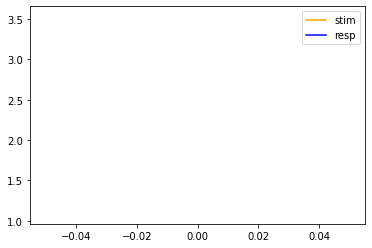

In [ ]:
# name_of_the_script = sys.argv[0].split('.')[0]
# a = sys.argv[1:]
from scipy.signal import butter
results = list()
for type in range(1,2):
  print("Método "+str(type))
  eyedee = str(type)  # ID OF THE EXPERIMENT.
  o_dim = int(1)   # THE INTERESTED OUTPUTS DIMENSIONALITY
  num_blocks_start = int(5)
  num_blocks_end   = int(10)
  lambda_          = float(0.1)
  mid_shape        = int(8)
  D                = [0.05,0.02]
  dropout    = 0.05
  learning_rate = 1e-3
  epoch_num  = 20
  batch_size = 2048
  reg_par    = 1e-4
  # o_dim      = 1
  use_all_singular_values = False
  best_only  = True
  print(f"eyedee    : {eyedee}")
  print(f"best_only : {best_only}")
  print(f"epoch_num : {epoch_num}")
  print(f"dropout   : {dropout}")
  device = torch.device('cuda')
  torch.cuda.empty_cache()
  # CREATING A FOLDER TO STORE THE RESULTS
  folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/grupo_"
  path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}/"
  i = 1
  while path.exists(path_name):
      path_name = folder_path+f"dmcca_{eyedee}_{num_blocks_start}_{num_blocks_end}_{lambda_}_{mid_shape}_{D[0]}_{i}/"
      i = i + 1
  del i
  os.mkdir(path_name)
  print(path_name)

  def butter_bandpass(lowcut, highcut, fs, order=5):
      nyq = 0.5 * fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

  ###############################################
  ## freqs
  fmin = 3  # frecuencia mínima
  fmax = 34 # frecuencia máxima
  BW   = 2  # tamaño de ancho de banda
  overlap = 0.25
  step = BW*(1-overlap) # tamaño de traslape
  freqs = np.asarray([[i-BW/2,i+BW/2] for i in np.arange(fmin,fmax,step)])
  a = list()
  b = list()
  freqs_ = list()
  N = 2 # Numero de orden del filtro
  for fil in range(21):
      b_, a_ = butter_bandpass(freqs[fil,0], freqs[fil,1], 80, order=3)
      # b_, a_ = butter(N=N,Wn=Wn,btype='band')
      b.append(b_)
      a.append(a_)
  freqs_.append([b,a])
  ###############################################

  ##################### SEED #####################
  seed = np.ceil(np.random.rand(10)*100)
  seed = np.ceil(np.random.rand(1)*100) * np.ones(1)
  print(seed)

  ###############################################
  # D = [0, 0.05, 0.1, 0.2]
  # D = [0.05, 0.2]
  # CAN REPLACE D WITH A SINGLE ELEMENT LIST WHOSE VALUE IS EQUAL TO THE DESIRED DROPOUT.
  # COEFFICIENT TO THE MSE REGULARIZATION LOSS OF THE DECODER
  # lambda_       = 0.1
  # MIDDLE LAYER UNITS IN THE DMCCA ARCHITECTURE
  # IS ALSO THE TIME-LAGS APPLIED TO THE STIMULUS
  # mid_shape  = 60
  speech_dmcca = True
  if speech_dmcca:
      num_blocks = 10   # IF SPEECH DATA BY LIBERTO ET AL.

      # subs ARE THE SUBJECTS IDS TO WORK WITH
      for subs_ in range(1):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
        subs = [subs_]
        print("Grupo "+str(subs_))
        subs = sorted(subs) # TO KEEP THEIR IDS SORTED
        n_subs = len(subs)

        str_subs = str(subs[0])
        for each_sub in subs[1:]: 
            str_subs += f"_{each_sub}"

        # num_blocks_start = 0
        # num_blocks_end   = 1
        # CAN CHANGE BOTH VALUES ACCORDING TO THE INTERESTED CROSS-VALIDATION EXPERIMENTS.
        # CAN SUBMIT THESE TWO AS THE ARGUMENTS AND PARSE OVER THERE, FOR BULK EXPERIMENTS.

        tst_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        val_corrs = np.zeros((2, num_blocks, len(D), n_subs))
        tst_corrs_name =  f'{path_name}/speech_corrs_{str_subs}.npy'
        val_corrs_name =  f'{path_name}/speech_corrs_val_{str_subs}.npy'

        print(f"n_subs     : {n_subs}")
        print(f"subs       : {subs}")
        print(f"D          : {D}")
        print(f"num_blocks : {num_blocks}")
        print(f"num_blocks_start: {num_blocks_start}")
        print(f"num_blocks_end  : {num_blocks_end}")
        print(f"num_blocks_net  : {num_blocks_end - num_blocks_start}")

        results_name = f'{path_name}/Datos_{str(type)}.npy'
        if path.exists(results_name):
          data_subs_pre = np.save(results_name)
        else:
          block = 0
          data_subs_pre = load_dmcca_data_cluster(subs, mid_shape, type, block)
          np.save(results_name, data_subs_pre)
        for d_cnt, dropout in enumerate(D):
            for block in range(num_blocks):#(num_blocks_start, num_blocks_end):
                # THE DATA data_subs_pre IS LOADED SUCH THAT 
                # ALL THE N EEG RESPONSES ARE LOADED IN THE FIRST N LISTS
                # AND THE LAST LIST HAS STIMULUS
                # data_subs_pre IS A list OF SIZE N+1
                # EACH ELEMENT IS A list OF SIZE 3
                # SUCH THAT
                # data_subs_pre[n] = [TRAINING_DATA, VALIDATION_DATA, TESTING_DATA]
                # AND
                # data_subs_pre[n][j].shape = [Number_of_samples, dimensions]
                
                # DEEP MCCA
                print("DEEP MCCA + LCCA")
                dmlcs, dmdcs = dmcca_method(data_subs_pre[block], "speech", dropout, f"block_{block}_drpt_{dropout}",freqs_)
                tst_corrs[0, block, d_cnt] = dmlcs[0]
                tst_corrs[1, block, d_cnt] = dmdcs[0]
                print(tst_corrs)
                val_corrs[0, block, d_cnt] = dmlcs[1]
                val_corrs[1, block, d_cnt] = dmdcs[1]
                print(val_corrs)
                np.save(tst_corrs_name, tst_corrs)
                np.save(val_corrs_name, val_corrs)              
                print('saved SPEECH')
        results.append([tst_corrs,val_corrs])
      results_name = f'{path_name}/results_{str(type)}.npy'
      np.save(results_name, results)
# FOR CUSTOM,
# ONE CAN REPLACE THE all_data LIST WITH THE INTERESTED DATASET.
# all_data IS A LIST OF N+1 ITEMS
# FIRST N ITEMS BELONG TO EEG RECORDINGS OF N SUBJECTS RESPECTIVELY.
# LAST  1 ITEM BELONGS TO THE COMMON STIMULI PROVIDED TO ALL THE SUBJECTS
# EACH ITEM OF THE (N+1) LENGTH LIST IS ARRANGED AS 
# [TRAINING_DATA, VALIDATION_DATA, TEST_DATA]
# EACH OF THESE DATA ARE IN THE SHAPE : NUMBER OF SAMPLES X VECTOR DIMENSION OF EACH SAMPLE
#
# AFTER LOADING THE DATA INTO all_data,
# ONE CAN CALL THE dmcca_method FUNCTION ON IT
# Then process the data through PCA and filterbank
# Then provide the data to LCCA or DCCA models to obtain final representations

In [ ]:
tst_corrs.shape

(2, 10, 2, 1)

In [ ]:
np.mean(tst_corrs[0,:,0,0])

0.30265477881670677

In [ ]:
np.mean(val_corrs[0,:,0,0])

0.4327222667717686

In [ ]:
tst_corrs[0,:,0,0]

array([0.35982062, 0.23208323, 0.13276179, 0.6317236 , 0.40641499,
       0.13493421, 0.51153587, 0.45194371, 0.08839321, 0.07693656])

In [ ]:
val_corrs[0,:,0,0]

array([0.54489863, 0.35568044, 0.2118918 , 0.76730598, 0.61867052,
       0.22855312, 0.64591052, 0.6538816 , 0.17914058, 0.12128948])

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
X, y = np.arange(10).reshape((5, 2)), range(5)
X





list(y)


[0, 1, 2, 3, 4]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=1)

X_train



array([[8, 9],
       [0, 1],
       [6, 7]])

In [ ]:
! pip install mido
! pip install rtmidi

     |████████████████████████████████| 51 kB 408 kB/s 
  Created wheel for rtmidi: filename=rtmidi-2.3.4-cp37-cp37m-linux_x86_64.whl size=277949 sha256=024337c14846502f4387d650906c2e2c3f8c4f33edd11d0a915574bc48512605
  Stored in directory: /root/.cache/pip/wheels/ac/28/8d/f3e2513e88bd3b33b43ad287c81816cdfdce1f30d23d59d124
Successfully built rtmidi


In [ ]:
import mido

middleC = 60
msg = mido.Message('note_on', note=middleC, velocity=64)
outport = mido.open_output('IAC Driver pioneer')
outport.send(msg)

# load model cca CX, organiza datos rotados

In [ ]:
Cx_sub = list()
Corr_sub = list()

cv_t = list()
for type in range(1,2):
  Cx_ = list()
  cv_s = list()
  indx_s = list()
  Corr_type = list()
  lista_data_sub = list()
  for subs_ in range(4):  # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    eyedee = str(type)  # ID OF THE EXPERIMENT.
    o_dim = int(1)      # THE INTERESTED OUTPUTS DIMENSIONALITY
    num_blocks_start = int(5)
    num_blocks_end   = int(10)
    lambda_          = float(0.01)
    mid_shape        = int(80)
    D                = [0.05]
    dropout    = 0.05
    learning_rate = 1e-3
    epoch_num  = 20
    batch_size = 2048
    reg_par   = 1e-4
    folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales/grupo_cx_componentes_"
    folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
    path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
    dataset   = "speech"
    num_blocks = 10 # numero de folds
    wei_cx = list()
    Corr_f = list()
    # data   = list()
    tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
    if type == 1:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx (1).mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx (1).mat")["matriz_selec"]
    elif type ==2:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx.mat")["matriz_selec"]
    elif type ==3:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx.mat")["matriz_selec"]
    elif type ==4:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx.mat")["matriz_selec"]
    
    cv = list()
    train_ = list()
    val_   = list() # estandar escaler 
    test_  = list()
    # for d_cnt, dropout in enumerate(D):
    for block in range(num_blocks):
      datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
      x_train_, x_test_ = train_test_split(datos_, test_size= 0.2,random_state=block)
      # print(x_train_)
      # x_train, x_test = train_test_split(resp_data, test_size= 0.2,random_state=block)
      # print('resp_data '+str(len(resp_data)))
      # print("X_train "+str(len(x_train)))
      # validation is now 80-20% of the initial data set
      x_train, x_val = train_test_split(x_train_, test_size=0.2, random_state=0)
      # print(len(x_train), len(x_val), len(x_test_))
      cv.append([x_train,x_val,x_test_])

      saving_name_root = f"block_{block}_drpt_{dropout}_sub_{subs_}"
      # saving_name_root = f"block_{block}_drpt_{dropout}" 
      save_model_name = f"{path_name}/{dataset}_dmcca_model_{saving_name_root}.path.tar"
      model = torch.load(save_model_name)
      wei_cx.append(model.state_dict()['enc_net0.one.weight'].cpu().detach().numpy())
      saving_name_root = f"block_{block}_drpt_{dropout}_sub_{subs_}"
      # data  = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.02_sub_{subs_}.pkl', 'rb'))
      # data.append(pkl.load(open(f'{path_name}/{dataset}_dmlc_data_{saving_name_root}.pkl', 'rb')))
      train = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.02_sub_{subs_}.pkl', 'rb'))[0][1][0]
      train_.append(np.reshape(train,(len(x_train),resp_data[0].shape[0],resp_data[0].shape[1])))
      val = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.02_sub_{subs_}.pkl', 'rb'))[1][1][0]
      val_.append(np.reshape(val,(len(x_val),resp_data[0].shape[0],resp_data[0].shape[1])))
      test = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.02_sub_{subs_}.pkl', 'rb'))[2][1][0]
      test_.append(np.reshape(test,(len(x_test_),resp_data[0].shape[0],resp_data[0].shape[1])))
      # results_name = f'{path_name}/results_{str(type)}.npy'
      # Corr_f.append()
    Corr_type.append(np.load(tst_corrs_name))
    Cx_.append(np.asarray(wei_cx))
    aa    = 0
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    indx_ = np.reshape(indx,(indx.shape[0]*indx.shape[1]))
    posi  = np.where(indx_ == 1)[0]
    dat_cv = list()
    lista_data_fold = list()
    for fold in range(num_blocks):
      a1 = 0
      a2 = 0
      a3 = 0
      lista_ord_data = np.zeros((1240,59,171))
      datos_ind_2= np.zeros((1240))
      for tr in range(posi.shape[0]):
        if np.where(np.sort(cv[fold][0].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 1
          lista_ord_data[tr] = train_[fold][np.where(cv[fold][0].astype(int)==tr)[0][0],:,:]
        elif np.where(np.sort(cv[fold][1].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 2
          lista_ord_data[tr] = train_[fold][np.where(cv[fold][1].astype(int)==tr)[0][0],:,:]
        elif np.where(np.sort(cv[fold][2].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 3
          lista_ord_data[tr] = train_[fold][np.where(cv[fold][2].astype(int)==tr)[0][0],:,:]
    
      lista_data_fold.append(lista_ord_data)
      dat_cv.append(datos_ind_2)
    cv_s.append(dat_cv)
    lista_data_sub.append(lista_data_fold)
    indx_s.append(indx_*(subs_+1))
  Corr_sub.append(Corr_type)
  Cx_sub.append(Cx_)

cv_sujetos = list()
datos_fold_ = list()
for fold in range(num_blocks):
  mat1 = cv_s[0][fold].reshape([31,40])
  mat2 = cv_s[1][fold].reshape([31,40])
  mat3 = cv_s[2][fold].reshape([31,40])
  mat4 = cv_s[3][fold].reshape([31,40])
  cv_sujetos.append(mat1+mat2+mat3+mat4)
  datos_fold =list()
  for tr in range(1240):
    datos_fold.append(lista_data_sub[0][fold][tr,:,:]+lista_data_sub[1][fold][tr,:,:]+\
                      lista_data_sub[2][fold][tr,:,:]+lista_data_sub[3][fold][tr,:,:])
  datos_fold_.append(datos_fold)

In [ ]:
datos_fold_[0][0].shape == datos_fold_[1][0].shape

True

In [ ]:
len(datos_fold_[0])

1240

# load model cca Cx

In [ ]:
Cx_sub   = list()
Corr_sub = list()
M_sub    = list()
cv_t = list()
for type in range(1,5):
  Cx_    = list()
  cv_s   = list()
  m_     = list()
  indx_s = list()
  Corr_type = list()
  lista_data_sub = list()
  for subs_ in range(1,2):  # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    eyedee = str(type)  # ID OF THE EXPERIMENT.
    o_dim  = int(1)      # THE INTERESTED OUTPUTS DIMENSIONALITY
    num_blocks_start = int(5)
    num_blocks_end   = int(10)
    lambda_          = float(0.01)
    mid_shape        = int(80)
    D                = [0.05]
    dropout    = 0.05
    learning_rate = 1e-3
    epoch_num  = 20
    batch_size = 2048
    reg_par    = 1e-4
    folder_path= "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_cx_"
    folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
    path_name  = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
    dataset    = "speech"
    num_blocks = 10 # numero de folds
    wei_cx = list()
    wei_m  = list()
    Corr_f = list()
    # data   = list()
    tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
    if type == 1:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["matriz_selec"]
    elif type ==2:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["matriz_selec"]
    elif type ==3:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["matriz_selec"]
    elif type ==4:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["matriz_selec"]
    
    cv = list()
    train_ = list()
    val_   = list() # estandar escaler 
    test_  = list()
    kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    # for d_cnt, dropout in enumerate(D):
    datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
    block =0
    datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
    for train_index, test_index in kf.split(datos_):
      # print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test_ = datos_[train_index], datos_[test_index]
      # y_train_, y_test = stim_data[train_index], stim_data[test_index]
      x_train, x_val = train_test_split(X_train_, test_size=1 - 0.8, random_state=0)
      # print(len(x_train), len(x_val), len(x_test_))
      cv.append([x_train,x_val,x_test_])

      saving_name_root = f"block_{block}_drpt_{dropout}_sub_{subs_}"
      # saving_name_root = f"block_{block}_drpt_{dropout}" 
      save_model_name = f"{path_name}/{dataset}_dmcca_model_{saving_name_root}.path.tar"
      model = torch.load(save_model_name)
      wei_cx.append(model.state_dict()['enc_net0.one.weight'].cpu().detach().numpy())
      wei_m.append(model.state_dict()['enc_net0.sec.weight'].cpu().detach().numpy())
      saving_name_root = f"block_{block}_drpt_{dropout}_sub_{subs_}"
      # data  = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.02_sub_{subs_}.pkl', 'rb'))
      # data.append(pkl.load(open(f'{path_name}/{dataset}_dmlc_data_{saving_name_root}.pkl', 'rb')))
      train = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[0][1][0]
      train_.append(np.reshape(train,(len(x_train),resp_data[0].shape[0],resp_data[0].shape[1])))
      val = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[1][1][0]
      val_.append(np.reshape(val,(len(x_val),resp_data[0].shape[0],resp_data[0].shape[1])))
      test = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[2][1][0]
      test_.append(np.reshape(test,(len(x_test_),resp_data[0].shape[0],resp_data[0].shape[1])))
      # results_name = f'{path_name}/results_{str(type)}.npy'
      # Corr_f.append()
      block+=1
    Corr_type.append(np.load(tst_corrs_name))
    Cx_.append(np.asarray(wei_cx))
    m_.append(np.asarray(wei_m))
    aa    = 0
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    indx_ = np.reshape(indx,(indx.shape[0]*indx.shape[1]))
    posi  = np.where(indx_ == 1)[0]
    dat_cv = list()
    lista_data_fold = list()
    for fold in range(num_blocks):
      a1 = 0
      a2 = 0
      a3 = 0
      lista_ord_data = np.zeros((1240,59,171))
      datos_ind_2= np.zeros((1240))
      for tr in range(posi.shape[0]):
        if np.where(np.sort(cv[fold][0].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 1
          lista_ord_data[tr] = train_[fold][np.where(cv[fold][0].astype(int)==tr)[0][0],:,:]
        elif np.where(np.sort(cv[fold][1].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 2
          lista_ord_data[tr] = train_[fold][np.where(cv[fold][1].astype(int)==tr)[0][0],:,:]
        elif np.where(np.sort(cv[fold][2].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 3
          lista_ord_data[tr] = train_[fold][np.where(cv[fold][2].astype(int)==tr)[0][0],:,:]
    
      lista_data_fold.append(lista_ord_data)
      dat_cv.append(datos_ind_2)
    cv_s.append(dat_cv)
    lista_data_sub.append(lista_data_fold)
    indx_s.append(indx_*(subs_+1))
  Corr_sub.append(Corr_type)
  Cx_sub.append(Cx_)
  M_sub.append(m_)
cv_sujetos = list()
datos_fold_ = list()
for fold in range(num_blocks):
  mat1 = cv_s[0][fold].reshape([31,40])
  # mat2 = cv_s[fold].reshape([31,40])
  # mat3 = cv_s[fold].reshape([31,40])
  # mat4 = cv_s[fold].reshape([31,40])
  cv_sujetos.append(mat1)
  datos_fold = np.zeros((lista_data_sub[0][fold].shape))
  for tr in range(1240):
    datos_fold[tr,:,:] = lista_data_sub[0][fold][tr,:,:]
  datos_fold_.append(datos_fold)

# load Cx version 2

In [ ]:
sum(np.abs(train_index_.astype(int)-1)*tr_all.astype(bool))

35

In [ ]:
Cx_sub   = list()
Corr_sub = list()
M_sub    = list()
cv_t = list()
for type in range(1,2):
  Cx_    = list()
  cv_s   = list()
  m_     = list()
  indx_s = list()
  Corr_type = list()
  lista_data_sub = list()
  lista_data_sub_s = list()
  for subs_ in range(1,2):  # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    eyedee = str(type)      # ID OF THE EXPERIMENT.
    o_dim  = int(1)         # THE INTERESTED OUTPUTS DIMENSIONALITY
    num_blocks_start = int(5)
    num_blocks_end   = int(10)
    lambda_          = float(0.01)
    mid_shape        = int(16)
    D                = [0.05]
    dropout    = 0.05
    learning_rate = 1e-3
    epoch_num  = 20
    batch_size = 2048
    reg_par    = 1e-4
    folder_path= "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all_4/grupo_cx_gauss_"
    folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
    path_name  = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
    dataset    = "speech"
    num_blocks = 31 # numero de folds
    wei_cx = list()
    wei_m  = list()
    Corr_f = list()
    # data   = list()
    tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
    if type == 1:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["matriz_selec"]
    elif type ==2:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["matriz_selec"]
    elif type ==3:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["matriz_selec"]
    elif type ==4:
      resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
      indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["matriz_selec"]
    
    cv = list()
    train_ = list()
    val_   = list() # estandar escaler 
    test_  = list()
    train_s= list()
    val_s  = list() # estandar escaler 
    test_s = list()
    # kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
    # for d_cnt, dropout in enumerate(D):
    # datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
    block =0
    datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
    datos_stim = scipy.io.loadmat(folder_path_+'/conectividad_gauss.mat')['gaus']
    datos_stim = datos_stim[:,:,:,2:5,:]
    datos_r2 = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*3*datos_stim.shape[4]])

    ind_s = np.arange(0,1240,40)
    tr_cu      = loadmat(folder_path_+'/Trials_cuadrantes.mat')['trial_ord']
    tr_1 = tr_cu==1
    tr_2 = tr_cu==2
    tr_3 = tr_cu==3
    tr_4 = tr_cu==4
    tr_all = tr_1+tr_2+tr_3+tr_4
    tr_all = np.reshape(tr_all,(tr_all.shape[0]*tr_all.shape[1]))
    tr_all2= tr_all*2  
    for subj in range(31):
      train_index_  = tr_all.astype(bool)
      # N_trials_train = np.sum(np.sum(train_index_))
      train_index_[ind_s[subj]:ind_s[subj]+40] = False
      train_index = np.where(train_index_==True)[0]
      # print(train_index.shape)
      test_index_ = np.abs(train_index_.astype(int)-1)*tr_all.astype(bool)
      test_index  = np.where(test_index_==True)[0]
      # print(test_index.shape)
    # for train_index, test_index in kf.split(datos_):
      # print("TRAIN:", train_index, "TEST:", test_index)
      X_train_, x_test_ = datos_[train_index], datos_[test_index]
      # y_train_, y_test = stim_data[train_index], stim_data[test_index]
      x_train, x_val = train_test_split(X_train_, test_size=1 - 0.8, random_state=0)
      # print(len(x_train), len(x_val), len(x_test_))
      cv.append([x_train,x_val,x_test_])

      saving_name_root = f"block_{block}_drpt_{dropout}_sub_{subs_}"
      # saving_name_root = f"block_{block}_drpt_{dropout}" 
      save_model_name = f"{path_name}/{dataset}_dmcca_model_{saving_name_root}.path.tar"
      model = torch.load(save_model_name)
      wei_cx.append(model.state_dict()['enc_net0.one.weight'].cpu().detach().numpy())
      wei_m.append(model.state_dict()['enc_nets.sec.weight'].cpu().detach().numpy())
      saving_name_root = f"block_{block}_drpt_{dropout}_sub_{subs_}"
      # data  = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.02_sub_{subs_}.pkl', 'rb'))
      # data.append(pkl.load(open(f'{path_name}/{dataset}_dmlc_data_{saving_name_root}.pkl', 'rb')))
      # eeg
      datos_stim = scipy.io.loadmat(folder_path_+'/conectividad_gauss.mat')['gaus']
      train = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[0][1][0]
      train_.append(np.reshape(train,(train.shape[0],datos_stim.shape[2],3,datos_stim.shape[4])))
      val = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[1][1][0]
      val_.append(np.reshape(val,(val.shape[0],datos_stim.shape[2],3,datos_stim.shape[4])))
      test = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[2][1][0]
      test_.append(np.reshape(test,(test.shape[0],datos_stim.shape[2],3,datos_stim.shape[4])))
      # music
      # train_stim = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[0][1][1]
      # train_s.append(train_stim)
      # val_stim = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[1][1][1]
      # val_s.append(val_stim)
      # test_stim = pkl.load(open(f'{path_name}/speech_dmcca_data_block_{block}_drpt_0.05_sub_{subs_}.pkl', 'rb'))[2][1][1]
      # test_s.append(test_stim)
      # results_name = f'{path_name}/results_{str(type)}.npy'
      # Corr_f.append()
      block+=1
    Corr_type.append(np.load(tst_corrs_name))
    Cx_.append(np.asarray(wei_cx))
    m_.append(np.asarray(wei_m))
    aa    = 0
    folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
    indx_ = np.reshape(indx,(indx.shape[0]*indx.shape[1]))
    posi  = np.where(indx_ == 1)[0]
    dat_cv = list()
    lista_data_fold = list()
    lista_data_fold_s = list()
    for fold in range(num_blocks):
      a1 = 0
      a2 = 0
      a3 = 0
      lista_ord_data = np.zeros((1240,datos_stim.shape[2],3,datos_stim.shape[4]))
      lista_ord_data_s = np.zeros((1240,2880))
      datos_ind_2= np.zeros((1240))
      for tr in range(posi.shape[0]):
        if np.where(np.sort(cv[fold][0].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 1
          lista_ord_data[tr,:,:,:] = train_[fold][np.where(cv[fold][0].astype(int)==tr)[0][0],:,:,:]
          # lista_ord_data_s[tr,:] = train_s[fold][np.where(cv[fold][0].astype(int)==tr)[0][0],:]
        elif np.where(np.sort(cv[fold][1].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 2
          lista_ord_data[tr,:,:,:] = val_[fold][np.where(cv[fold][1].astype(int)==tr)[0][0],:,:,:]
          # lista_ord_data_s[tr,:] = val_s[fold][np.where(cv[fold][1].astype(int)==tr)[0][0],:]
        elif np.where(np.sort(cv[fold][2].astype(int))==tr)[0].shape[0]>0:
          datos_ind_2[posi[tr]] = 3
          lista_ord_data[tr,:,:,:] = test_[fold][np.where(cv[fold][2].astype(int)==tr)[0][0],:,:,:]
          # lista_ord_data_s[tr,:] = test_s[fold][np.where(cv[fold][2].astype(int)==tr)[0][0],:]

    
      lista_data_fold.append(lista_ord_data)
      # lista_data_fold_s.append(lista_ord_data_s)
      dat_cv.append(datos_ind_2)
    cv_s.append(dat_cv)
    lista_data_sub.append(lista_data_fold)
    # lista_data_sub_s.append(lista_data_fold_s)
    indx_s.append(indx_*(subs_+1))
  Corr_sub.append(Corr_type)
  Cx_sub.append(Cx_)
  M_sub.append(m_)
cv_sujetos = list()
datos_fold_ = list()
# datos_fold_ss=list()
for fold in range(num_blocks):
  mat1 = cv_s[0][fold].reshape([31,40])
  # mat2 = cv_s[fold].reshape([31,40])
  # mat3 = cv_s[fold].reshape([31,40])
  # mat4 = cv_s[fold].reshape([31,40])
  cv_sujetos.append(mat1)
  datos_fold = np.zeros((lista_data_sub[0][fold].shape))
  # datos_fold_s = np.zeros((lista_data_sub_s[0][fold].shape))
  for tr in range(1240):
    datos_fold[tr,:,:] = lista_data_sub[0][fold][tr,:,:] 
    # datos_fold_s[tr,:] = lista_data_sub_s[0][fold][tr,:]
  datos_fold_.append(datos_fold)
  # datos_fold_ss.append(datos_fold_s)
del lista_data_sub, lista_ord_data, datos_ind_2,mat1, lista_data_fold
# del lista_data_sub_s, lista_ord_data_s, lista_data_fold_s,datos_fold_s

In [ ]:
del lista_data_fold_s,datos_fold_s

In [ ]:
pkl.load(open(f'{path_name}/speech_dmcca_data_block_{0}_drpt_0.05_sub_{1}.pkl', 'rb'))[2][1][1].shape

(40, 944)

In [ ]:
train_stim.shape

(960, 2880)

In [ ]:
np.mean(Corr_sub[0][0][0,:,0,0])

0.9568833064678556

In [ ]:
M_sub[0][0].shape

(10, 80, 80)

In [ ]:
model.state_dict()['enc_net0.one.weight'].shape

torch.Size([16, 10089])

In [ ]:
model.state_dict()['enc_nets.one.weight'].shape

torch.Size([16, 944])

In [ ]:
enc_nets.one.weight

In [ ]:
datos_fold_[0].shape

(1240, 59, 171)

In [ ]:
cv_sujetos[0].shape

(31, 40)

In [ ]:
cv_s[0][fold]

array([0., 1., 2., ..., 1., 2., 1.])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

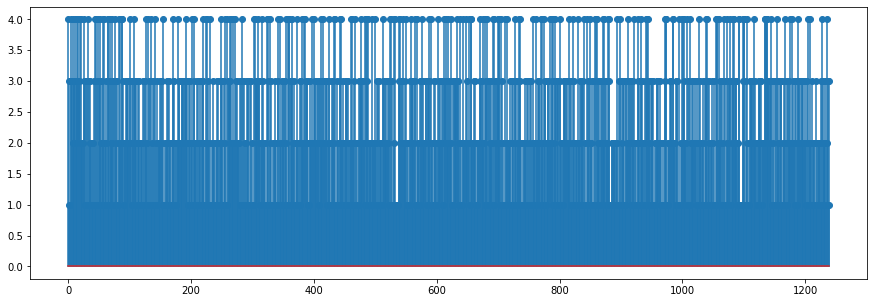

In [ ]:
plt.figure(figsize=(15,5))
plt.stem(indx_s[0]+indx_s[1]+indx_s[2]+indx_s[3])

In [ ]:
len(train_)

In [ ]:
sum(cv_s[0][0]>0)

270

In [ ]:
indx_s[0]

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [ ]:
datos_ind_[tr]

In [ ]:
posi

In [ ]:
aa = 0
datos_ind_2= np.zeros((1240))
ind_ = np.sort(cv[fold][0].astype(int))
for tr in range(posi.shape[0]):
  if np.where(np.sort(cv[fold][0].astype(int))==tr)[0].shape[0]>0:
    datos_ind_2[posi[tr]] = 1
  elif np.where(np.sort(cv[fold][1].astype(int))==tr)[0].shape[0]>0:
    datos_ind_2[posi[tr]] = 2
  elif np.where(np.sort(cv[fold][2].astype(int))==tr)[0].shape[0]>0:
    datos_ind_2[posi[tr]] = 3

In [ ]:
datos_ind_2

array([0., 0., 0., ..., 0., 1., 0.])

In [ ]:
ind_

In [ ]:
posi

In [ ]:
aa= 0
for tr in range(posi.shape[0]):
  ind_ = np.sort(cv[fold][0].astype(int))
  for tr_ in range(ind_.shape[0]):
    if ind_[tr_] == posi[tr]:


In [ ]:
cv[0][1].shape[0]

44

In [ ]:
datos_ind_2[6]

0.0

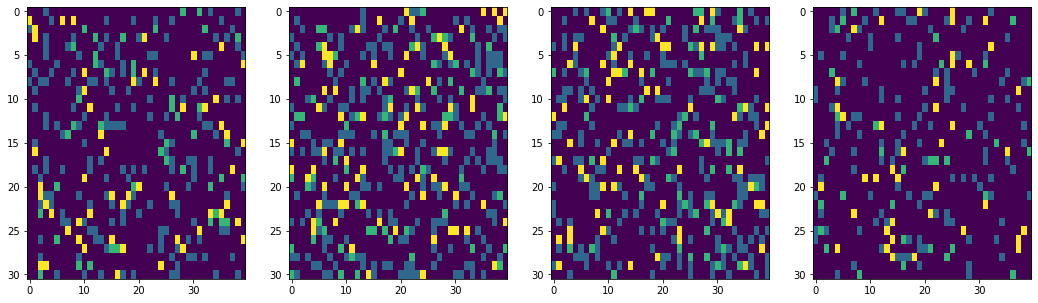

In [ ]:
fig,ax = plt.subplots(1,4,figsize=(18,5))
ax[0].imshow(cv_s[0][0].reshape([31,40]),aspect='auto')
ax[1].imshow(cv_s[1][0].reshape([31,40]),aspect='auto')
ax[2].imshow(cv_s[2][0].reshape([31,40]),aspect='auto')
ax[3].imshow(cv_s[3][0].reshape([31,40]),aspect='auto')

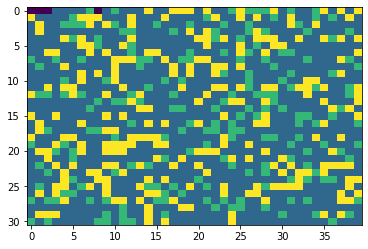

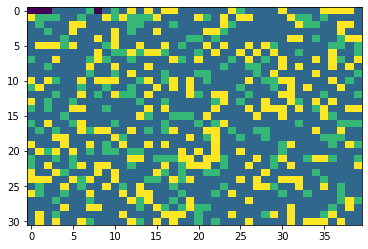

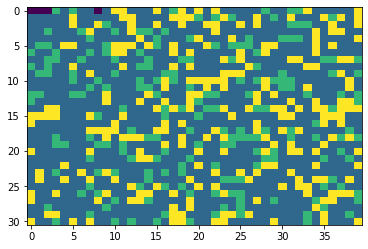

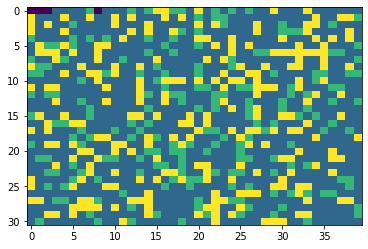

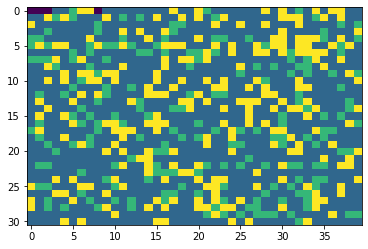

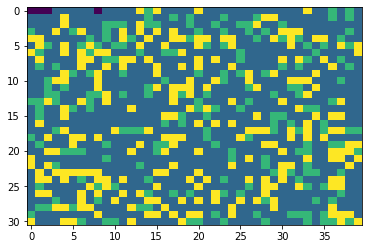

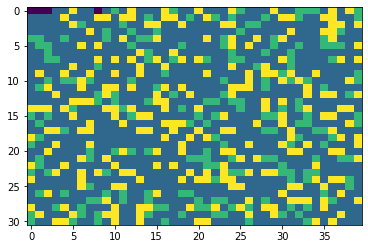

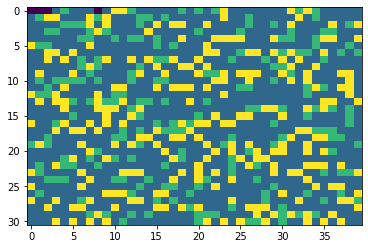

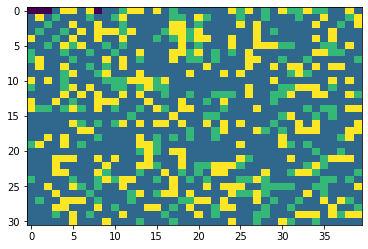

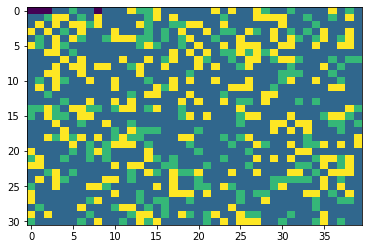

In [ ]:
for fold in range(10):
  mat1 = cv_s[0][fold].reshape([31,40])
  mat2 = cv_s[1][fold].reshape([31,40])
  mat3 = cv_s[2][fold].reshape([31,40])
  mat4 = cv_s[3][fold].reshape([31,40])
  plt.figure()
  plt.imshow(mat1+mat2+mat3+mat4,aspect='auto')

In [ ]:
model

dmcca_model_n_resp_1_stim(
  (drp): Dropout(p=0.05, inplace=False)
  (enc_net0): enc_model(
    (act): Sigmoid()
    (o_act): LeakyReLU(negative_slope=0.1)
    (drp): Dropout(p=0.05, inplace=False)
    (one): Linear(in_features=10089, out_features=16, bias=True)
    (sec): Linear(in_features=16, out_features=16, bias=True)
    (thr): Linear(in_features=16, out_features=10, bias=True)
  )
  (dec_net0): dec_model(
    (act): Sigmoid()
    (o_act): LeakyReLU(negative_slope=0.1)
    (drp): Dropout(p=0.05, inplace=False)
    (de1): Linear(in_features=20, out_features=16, bias=True)
    (de2): Linear(in_features=16, out_features=110, bias=True)
    (de3): Linear(in_features=110, out_features=10089, bias=True)
  )
  (enc_nets): enc_model(
    (act): Sigmoid()
    (o_act): LeakyReLU(negative_slope=0.1)
    (drp): Dropout(p=0.05, inplace=False)
    (one): Linear(in_features=944, out_features=16, bias=True)
    (sec): Linear(in_features=16, out_features=16, bias=True)
    (thr): Linear(in_featur

In [ ]:
model.state_dict()

# topoplot mne 

In [ ]:
!pip install -U mne
!pip install bctpy

In [ ]:
import mne

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

## todo el tiempo

In [ ]:
Cx_sub[0][0].shape

(31, 16, 10089)

In [ ]:
Cx_sub[0][0].shape

(31, 16, 10089)

In [ ]:
resp_data[0].shape

(59, 171)

In [ ]:
Cx_topo_ = np.zeros((1,4,3,23,19))
for type in range(len(Cx_sub)):
  for subs_ in range(1):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    Cx_topo = np.zeros((Cx_sub[type][subs_].shape[0],Cx_sub[type][subs_].shape[1],3,23,19))
    for fold in range(Cx_sub[type][subs_].shape[0]):
      for dim in range(Cx_sub[type][subs_].shape[1]):
        for fr in range(3):
          Conx = Cx_sub[type][subs_][fold,dim,:]
          Conx = np.reshape(Conx,(datos_stim.shape[2],3,datos_stim.shape[4]))
          for win in range(23):
            Cx_topo[fold,dim,fr,win,:] = bct.strengths_und(squareform(Conx[:,fr,win]))
    Cx_topo_[subs_,type,:,:,:] = np.squeeze(np.mean(np.squeeze(np.mean(Cx_topo,axis=0)),axis=0))
max_cx = np.max(np.max(np.max(Cx_topo_)))
max_cx_= np.max(np.max(Cx_topo_,axis=1),axis=1)
min_cx = np.min(np.min(np.min(Cx_topo_)))

In [ ]:
Cx_topo_ = np.zeros((4,4,19))
for type in range(len(Cx_sub)):
  for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    Cx_topo = np.zeros((Cx_sub[subs_][type].shape[0],Cx_sub[subs_][type].shape[1],19))
    for fold in range(Cx_sub[subs_][type].shape[0]):
      for dim in range(Cx_sub[subs_][type].shape[1]):
        Cx_topo[fold,dim,:] = bct.strengths_und(squareform(Cx_sub[subs_][type][fold,dim,:]))
    Cx_topo_[subs_,type,:] = np.squeeze(np.mean(np.squeeze(np.mean(Cx_topo,axis=0)),axis=0))
max_cx = np.max(np.max(np.max(Cx_topo_)))
max_cx_= np.max(np.max(Cx_topo_,axis=1),axis=1)
min_cx = np.min(np.min(np.min(Cx_topo_)))

In [ ]:
max_cx

0.05372735061377171

In [ ]:
np.max(np.max(Cx_topo_,axis=1),axis=1).shape

(4,)

In [ ]:
info

<Info | 16 non-empty fields
    bads : list | 0 items
    ch_names : list | Fp1, Fp2, F7, F3, Fz, F4, F8, T3, C3, ...
    chs : list | 19 items (EEG: 19)
    comps : list | 0 items
    custom_ref_applied : bool | False
    dev_head_t : Transform | 3 items
    events : list | 0 items
    highpass : float | 0.0 Hz
    hpi_meas : list | 0 items
    hpi_results : list | 0 items
    lowpass : float | 500.0 Hz
    meas_date : NoneType | unspecified
    nchan : int | 19
    proc_history : list | 0 items
    projs : list | 0 items
    sfreq : float | 1000.0 Hz
    acq_pars : NoneType
    acq_stim : NoneType
    ctf_head_t : NoneType
    description : NoneType
    dev_ctf_t : NoneType
    device_info : NoneType
    dig : NoneType
    experimenter : NoneType
    file_id : NoneType
    gantry_angle : NoneType
    helium_info : NoneType
    hpi_subsystem : NoneType
    kit_system_id : NoneType
    line_freq : NoneType
    meas_id : NoneType
    proj_id : NoneType
    proj_name : NoneType
    subje

In [ ]:
# channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 
            # 'Cz', 'C4',  'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
# n_channels = len(channels)
# ch_types = ['eeg']*n_channels
# info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.channels.make_standard_montage('standard_1020')
# info.set_montage('standard_1005')    
itr = 1
fig = plt.figure(figsize=(20,20))
for type in range(len(Cx_sub)):
  for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    ax  = fig.add_subplot(4,4,itr)
    itr +=1
    mne.viz.plot_topomap(Cx_topo_[subs_,type,:],info, axes=ax, cmap=parula_map, 
                         show=False, sensors=True, extrapolate='head',
                         ch_type='eeg',vmin=min_cx,vmax=max_cx)
    if subs_ == 0 and type == 0:
      ax.set_title('Grupo 1')
    if subs_ == 1 and type == 0:
      ax.set_title('Grupo 2')
    if subs_ == 2 and type == 0:
      ax.set_title('Grupo 3')
    if subs_ == 3 and type == 0:
      ax.set_title('Grupo 4')
    if subs_ == 0 and type == 0:
      ax.set_ylabel('env')
    if subs_ == 0 and type == 1:
      ax.set_ylabel('RMS')
    if subs_ == 0 and type == 2:
      ax.set_ylabel('Spectral')
    if subs_ == 0 and type == 3:
      ax.set_ylabel('PC1')
plt.savefig('Cx_music.png')

In [ ]:
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 
            'Cz', 'C4',  'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
ch_types = ['eeg']*n_channels
info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
info.set_montage('standard_1005')    
itr = 1
fig = plt.figure(figsize=(20,20))
for type in range(len(Cx_sub)):
  for subs_ in range(4):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    ax  = fig.add_subplot(4,4,itr)
    itr +=1
    mne.viz.plot_topomap(Cx_topo_[subs_,type,:],info, axes=ax, cmap=parula_map, 
                         show=False, sensors=True, extrapolate='head', 
                         ch_type='eeg',vmin=min_cx,vmax=max_cx)
    if subs_ == 0 and type == 0:
      ax.set_title('Grupo 1')
    if subs_ == 1 and type == 0:
      ax.set_title('Grupo 2')
    if subs_ == 2 and type == 0:
      ax.set_title('Grupo 3')
    if subs_ == 3 and type == 0:
      ax.set_title('Grupo 4')
    if subs_ == 0 and type == 0:
      ax.set_ylabel('env')
    if subs_ == 0 and type == 1:
      ax.set_ylabel('RMS')
    if subs_ == 0 and type == 2:
      ax.set_ylabel('Spectral')
    if subs_ == 0 and type == 3:
      ax.set_ylabel('PC1')
plt.savefig('Cx_music.png')

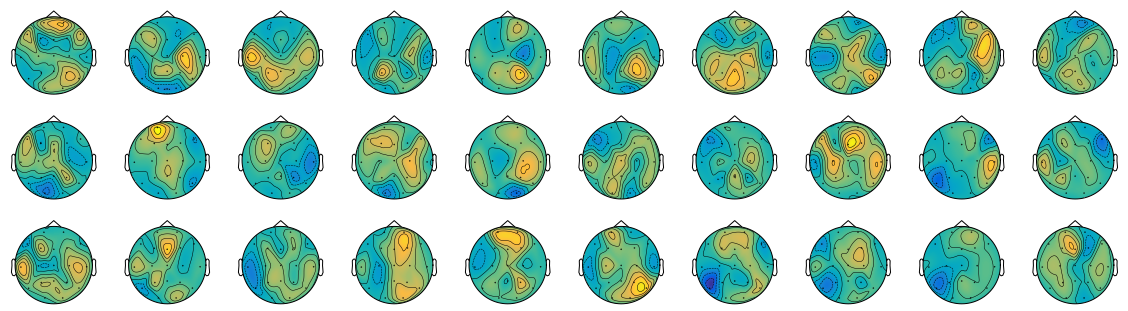

In [ ]:
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 
            'Cz', 'C4',  'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
# ch_types = ['eeg']*n_channels
# info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.channels.make_standard_montage('standard_1020')
# info.set_montage('standard_1005')    
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'
S_ERP = loadmat(load_path + f"Sujeto_"+str(1)+".mat")
data = S_ERP['music']
# data = np.transpose(data, (2,1,0)) # transponer en trials x canales x tiempo
data_target = data

# structure mne datos en (trials,canales,tiempo)
ch_types = ['eeg']*n_channels
info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.set_montage('standard_1005')
raw = mne.EpochsArray(data_target, info)
biosemi_montage = mne.channels.make_standard_montage('standard_1005')
raw.set_montage(biosemi_montage)
itr = 1
fig = plt.figure(figsize=(20,5))
for type in range(len(Cx_sub)):
  for subs_ in range(1):       # REPLACE WITH THE REQUIRED SUBJECTS' IDS.
    for fr in range(3):
      for win in range(10):
        ax  = fig.add_subplot(3,10,itr)
        itr +=1
        mne.viz.plot_topomap(Cx_topo_[subs_,type,fr,win,:],raw.info, axes=ax, cmap=parula_map, 
                            show=False, sensors=True, extrapolate='head',vmin=min_cx,vmax=max_cx)
        # if subs_ == 0 and type == 0:
        #   ax.set_title('Todos')
        # if subs_ == 1 and type == 0:
        #   ax.set_title('Grupo 2')
        # if subs_ == 2 and type == 0:
        #   ax.set_title('Grupo 3')
        # if subs_ == 3 and type == 0:
        #   ax.set_title('Grupo 4')
        # if subs_ == 0 and type == 0:
        #   ax.set_ylabel('env')
        # if subs_ == 0 and type == 1:
        #   ax.set_ylabel('RMS')
        # if subs_ == 0 and type == 2:
        #   ax.set_ylabel('Spectral')
        # if subs_ == 0 and type == 3:
        #   ax.set_ylabel('PC1')
plt.savefig('Cx_music.png')

## en cada intante del tiempo

# topoplots grupos

In [ ]:
!pip install -U mne==0.19
!pip install bctpy

In [ ]:
import numpy as np
import bct
import pickle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
#-----------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import KFold
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import euclidean_distances
import mne
from mne.viz import plot_topomap
# from mne.viz.topomap import _check_outlines, _draw_outlines
from mne.viz.utils import plt_show,tight_layout
from mne.io.pick import _picks_to_idx
from mne.time_frequency import tfr_array_morlet, csd_array_morlet, csd_array_fourier
#-----------------------------------------------------------------------------------------------------------------
from mpl_toolkits.mplot3d import Axes3D  # noqa
import matplotlib.colors as colors
import matplotlib.cm as cmx
from scipy.stats import kurtosis
import pywt
from scipy.signal import periodogram, welch
from scipy.stats import spearmanr
from joblib import Parallel, delayed
from scipy.stats import kendalltau
from joblib import load
import scipy.io as sio
## CKA
from sklearn.metrics import pairwise_distances  
from scipy.spatial.distance import squareform 
from mne.viz import plot_topomap
from scipy.stats import kurtosis
import pywt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import periodogram, welch
from scipy.stats import spearmanr
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mne.time_frequency import tfr_array_morlet, csd_array_morlet, csd_array_fourier
from joblib import Parallel, delayed
from scipy.stats import kendalltau
from mne.viz.utils import plt_show,tight_layout
from mne.io.pick import _picks_to_idx
import tensorflow as tf
import tensorflow_probability as tfp
from sklearn.decomposition import PCA
from tensorflow.keras import regularizers
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import train_test_split
tf.keras.backend.clear_session()
tf.random.set_seed(42)
import types
import tempfile

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa
from mne.viz.utils import plt_show,tight_layout
from mne.io.pick import _picks_to_idx
from scipy.spatial.distance import squareform 
from mne.viz import plot_topomap
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mne.viz.topomap import _check_outlines,_draw_outlines
#%% download data
FILEID = "1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O modCSP.py && rm -rf /tmp/cookies.txt > /dev/null
#%% download data
!pip install git+https://github.com/UN-GCPDS/python-gcpds.utils.git
# from MIfunctions import *

--2021-12-02 21:37:34--  https://docs.google.com/uc?export=download&confirm=kK1H&id=1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh
Resolving docs.google.com (docs.google.com)... 172.217.219.101, 172.217.219.113, 172.217.219.139, ...
Connecting to docs.google.com (docs.google.com)|172.217.219.101|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-5o-docs.googleusercontent.com/docs/securesc/ag3ee0e5qk6m883vh48sn3mqubb420bi/kkka82m2mkpfgtlv47a04ic6fp7t3evr/1638481050000/06932581800131476027/01779221028689579767Z/1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh?e=download [following]
--2021-12-02 21:37:34--  https://doc-04-5o-docs.googleusercontent.com/docs/securesc/ag3ee0e5qk6m883vh48sn3mqubb420bi/kkka82m2mkpfgtlv47a04ic6fp7t3evr/1638481050000/06932581800131476027/01779221028689579767Z/1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh?e=download
Resolving doc-04-5o-docs.googleusercontent.com (doc-04-5o-docs.googleusercontent.com)... 172.217.212.132, 2607:f8b0:4001:c03::84
Conne

In [ ]:
# función de topoplot con links
class FB_feats2(TransformerMixin,BaseEstimator):
    def __init__(self, fs=250,f_frec=np.array([[8,12],[12,30]]),vtw=np.array([[2.5,4.5],[3,5]]),gammad=1,feat='kcon',ncomp = 6,method='fft',normalize=True,n_cycles=7.0):
        self.vtw = vtw
        self.fs = fs
        self.f_frec = f_frec
        self.gammad = gammad
        self.feat = feat
        self.method = method
        self.normalize = normalize
        self.ncomp = ncomp
        self.n_cycles = n_cycles
    def connection_rho(self,rho,fs,channels_names,thr=0.9,mean_by_time_windows=None,mean_by_frequencies=None,figsize=(30,30),save=True,sbj='',acc='',format='png',path='',Ch='s',cmap_tplt='jet',normalizate='True',ch_ext=None):
        # whether mean_by_time_windows or mean_by_frequencies are True, the rho vector will be averaged over time or frequency.
        #but, also it can be a vector, such as, [0,0,1,1,2,2] that indicates  which indices of rho will be averaged.
        if Ch !='s':
            self.Ch = Ch
        self.P = int(0.5*self.Ch*(self.Ch-1))
        if ch_ext is not None:
            pCh = len(ch_ext)
            pp = int(0.5*pCh*(pCh-1))
            tmprho = rho.reshape(pp,-1)
            srhoMc= np.asarray([squareform(tmprho[:,i]) for i in range(tmprho.shape[-1])]).T
            chpt = np.isin(channels_names,ch_ext)
            tmpch = np.zeros((len(channels_names),len(channels_names),srhoMc.shape[-1]))
            for p in range(srhoMc.shape[-1]):
                k=0
                for i in range(len(chpt)):
                    if chpt[i]==True:
                        j=0
                        for ii in range(len(chpt)):
                            if chpt[ii]==True:
                                tmpch[i,ii,p] = srhoMc[j,k,p]
                                j+=1
                            else:
                                tmpch[i,ii,p] = 0
                        k+=1
                    else:
                        tmpch[i,:,p]=0
            ghj = np.asarray([squareform(tmpch[:,:,i]) for i in range(tmpch.shape[-1])]).T
            rho = ghj.ravel()
        rhoMc = rho.reshape(self.P,self.vtw.shape[0],self.f_frec.shape[0]) # Ch(Ch-1)/2, windows, bands
        if mean_by_frequencies is None:
            mean_by_frequencies = np.arange(self.f_frec.shape[0])
        if mean_by_time_windows is None:
            mean_by_time_windows = np.arange(self.vtw.shape[0])
        times = len(np.unique(mean_by_time_windows))
        frecs = len(np.unique(mean_by_frequencies))
        rhof=[]
        for i in np.unique(mean_by_frequencies):
            rhof.append(np.mean(rhoMc[:,:,mean_by_frequencies==i],axis=-1))
        rhof=np.array(rhof)
        #rhof = np.swapaxes(rhof,0,-1).squeeze()
        rhof = np.moveaxis(rhof, [0], [-1])
        rho = []
        for i in np.unique(mean_by_time_windows):
            rho.append(np.mean(rhof[:,mean_by_time_windows==i,:],axis=-2))
        rho=np.array(rho)
        #rho = np.swapaxes(rho,0,2).squeeze()
        rho = np.moveaxis(rho, [0], [-2])
        montage = mne.channels.read_montage('standard_1005')
        layout = mne.channels.read_layout('EEG1005')
        #montage = mne.channels.read_montage('biosemi128')
        #layout = montage.ch_names
        info = mne.create_info(layout.names, sfreq=fs, ch_types="eeg",
                                montage=montage)
        pos = np.array([(p[0] + p[2] / 2., p[1] + p[3] / 2.) for p in layout.pos])
        # pick channels
        picks = _picks_to_idx(info,channels_names)
        pos = pos[picks]
        # adjust positions
        pos, outlines = _check_outlines(pos, 'head')
        pos_x = pos[:,0]
        pos_y = pos[:,1]
        names = np.array(layout.names)[picks]
        if normalizate:
            rho=((rho-rho.min())/(rho.max()-rho.min()))
        cmap = cmap_tplt
        if normalizate:
            cNorm  = colors.Normalize(vmin=np.min(rho), vmax=np.max(rho))
        else:
            cNorm  = colors.Normalize(vmin=0, vmax=1)
        scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)
        rhotopo = np.zeros((Ch,frecs,times))
        for time in np.arange(times):
            for frec in np.arange(frecs):
                rhotopo[:,frec,time] = squareform(rho[:,time,frec]).sum(axis=1)
        rhotopo = rhotopo-rhotopo.min()
        rhotopo /= rhotopo.max()
        #f,ax = plt.subplots(frecs,times,figsize=figsize)
        fig=plt.figure(figsize=figsize)
        itr=1
        for time in np.arange(times): 
            for frec in np.arange(frecs):
                ax = fig.add_subplot(frecs,times,itr)
                itr+=1
                rhok = squareform(rho[:,time,frec])
                #plot_topomap(rhotopo[:,frec,time], pos, axes=ax[frec,time], cmap=cmap_tplt, show=False, contours=0, sensors=False,vmin=0,vmax=1)
                plot_topomap(rhotopo[:,frec,time], pos, axes=ax, cmap=cmap_tplt, show=False, contours=0, sensors=False,vmin=0,vmax=1)
                if thr >1:
                    indx_pct = np.where(np.triu(rhok)>np.percentile(rho.ravel()[rho.ravel()>1e-8], thr))
                else:
                    indx_pct = np.where(np.triu(rhok)>thr)
                #ax[frec,time].set(xticks=[], yticks=[], aspect='equal')
                ax.set(xticks=[], yticks=[], aspect='equal')
                #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
                #_draw_outlines(ax[frec,time], outlines)
                _draw_outlines(ax, outlines)
                for i in np.arange(np.shape(indx_pct)[-1]):
                    ch1=indx_pct[0][i]
                    ch2=indx_pct[1][i]     
                    #ax[frec,time].arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                            #pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                            #width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
                    ax.arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                            pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                            width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
                for ch1 in  np.unique(np.ravel(indx_pct)):
                    #ax[frec,time].scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
                    ax.scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
                    #ax[frec,time].annotate(names[ch1], xy=pos[ch1,:],size=15)
                    ax.annotate(names[ch1], xy=pos[ch1,:],size=15)
        cax = fig.add_axes([0.95, 0.15, 0.02, 0.75])
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array(rho.ravel())
        plt.colorbar(sm,cax=cax)
        if save ==True:
            plt.savefig(str(path)+'Cxsbj'+str(sbj)+'acc'+str(acc)+'.'+format,format=format)
        return

In [ ]:
vtw = list()
fs = 1000
for a in range(1):
  vtw.append([a+1,a+2])
  feat = FB_feats2(fs=fs,vtw=np.array([[1,45]]),
                f_frec=np.array(vtw))

In [ ]:
vtw

[[1, 2]]

In [ ]:
channels = ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4',
            'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
n_channels = len(channels)
# ch_types = ['eeg']*n_channels
# info = mne.create_info(channels, ch_types=ch_types, sfreq=1000)
# info.set_montage('standard_1005')

In [ ]:
# graficar los enlaces en el topoplot.
fs = 1000
Cx_topo = np.squeeze(np.mean(np.squeeze(np.mean(Cx_,axis=0)),axis=0))
feat.connection_rho(Cx_topo, fs, channels, thr=0.7, # umbral
                    figsize=(10, 10), save=False, sbj='', acc='', 
                    format='eps', path='', Ch=n_channels,
                    cmap_tplt='hot')

# SVM acc

In [ ]:
# y__ = loadmat('layer.mat')['lay']
y__ = tr_cu.reshape([tr_cu.shape[0]*tr_cu.shape[1]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# y = indx_s[0] # vector de las etiquetas.
folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
# y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
y = y__.reshape(-1)
# y.shape
X = datos_fold_                          # datos de trials, tiempos, conexiones.
param_grid = {'C': [ 0.1, 1,],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['rbf']}
grid_predictions_=list()
# kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
fold = 0
# for train_index, test_index in kf.split(resp_data,y):
ind_s = np.arange(0,1240,40)
for subj in range(31):
  train_index_  = tr_all.astype(bool)
  train_index_[ind_s[subj]:ind_s[subj]+40] = False
  train_index = np.where(train_index_==True)[0]
  # print(train_index.shape)
  test_index_ = np.abs(train_index_.astype(int)-1).astype(bool)
  test_index  = np.where(test_index_==True)[0]
  # print(test_index.shape)
  data_subs_pre = list()
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_, X_test_ = X[fold][train_index,:,:,:], X[fold][test_index,:,:,:]
  y_train_, y_test = y[train_index], y[test_index]
  X_train_ = np.reshape(X_train_,(X_train_.shape[0],X_train_.shape[1]*X_train_.shape[2]*X_train_.shape[3]))
  X_test_ = np.reshape(X_test_,(X_test_.shape[0],X_test_.shape[1]*X_test_.shape[2]*X_test_.shape[3]))
  # y_train_ = np.reshape(y_train_,(y_train_.shape[0],y_train_.shape[1]*y_train_.shape[2]))
  # y_test_ = np.reshape(y_test_,(y_test_.shape[0],y_test_.shape[1]*y_test_.shape[2]))
  # defining parameter range
  grid = GridSearchCV(SVC(), param_grid,
                      cv = 5, verbose = 1)
  # fitting the model for grid search
  
  grid.fit(X_train_, y_train_)
  # print best parameter after tuning
  print(grid.best_params_)
  # print how our model looks after hyper-parameter tuning
  print(grid.best_estimator_)
  grid_predictions = grid.predict(X_test_)
  # print classification report
  print(classification_report(y_test, grid_predictions))
  grid_predictions_.append(grid_predictions)
  fold += 1
  # concatenar los acierto de cada fold y luego comparar los aciertos por todos 

TRAIN: [  40   41   42 ... 1237 1238 1239] TEST: [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   45   55
   57   64   82   87   90   91   93   97  101  105  106  113  116  120
  126  141  146  147  154  155  157  160  164  167  178  186  192  195
  201  202  208  211  219  220  229  235  247  257  259  260  267  274
  275  278  294  296  301  302  306  314  317  319  321  322  328  331
  339  340  349  355  368  372  379  385  400  402  403  415  427  436
  445  450  456  459  461  473  475  480  482  483  495  507  516  520
  522  523  535  547  556  560  562  563  575  587  596  601  617  621
  622  625  662  664  668  670  673  680  689  696  698  704  710  716
  717  718  719  742  744  748  750  753  761  762  767  775  788  795
  822  824  828  830  833  862  864  868  870  873  902  904  908  910
  913  942  944  948  950  9

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.07      1.00      0.14        16
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00       185

    accuracy                           0.07       221
   macro avg       0.01      0.20      0.03       221
weighted avg       0.01      0.07      0.01       221

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  21   26   27   29   40   41   42   43   44   45   46   47   48   49
   50   51   52   53   54   55   56   57   58   59   60   61   62   63
   64   65   66   67   68   69   70   71   72   73   74   75   76   77
   78   79   82   87   90   91   93   97  101  105  106  113  116  120
  126  141  146  147  154  155  157  160  164  167  178  186  192  195
  201  202  208  211  219  220  229  235  247  257  259  260  267  274
  275  278  294  296  301  302  306 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        13
         2.0       0.05      1.00      0.09        11
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         5
         6.0       0.00      0.00      0.00       185

    accuracy                           0.05       221
   macro avg       0.01      0.20      0.02       221
weighted avg       0.00      0.05      0.00       221

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  21   26   27   29   45   55   57   64   80   81   82   83   84   85
   86   87   88   89   90   91   92   93   94   95   96   97   98   99
  100  101  102  103  104  105  106  107  108  109  110  111  112  113
  114  115  116  117  118  119  120  126  141  146  147  154  155  157
  160  164  167  178  186  192  195  201  202  208  211  219  220  229
  235  247  257  259  260  267  274  275  278  294  296  301  302  306
  314  317  319  321  322  328  331 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         9
         2.0       0.03      1.00      0.06         7
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         6
         6.0       0.00      0.00      0.00       185

    accuracy                           0.03       214
   macro avg       0.01      0.20      0.01       214
weighted avg       0.00      0.03      0.00       214

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  21   26   27   29   45   55   57   64   82   87   90   91   93   97
  101  105  106  113  116  120  121  122  123  124  125  126  127  128
  129  130  131  132  133  134  135  136  137  138  139  140  141  142
  143  144  145  146  147  148  149  150  151  152  153  154  155  156
  157  158  159  160  164  167  178  186  192  195  201  202  208  211
  219  220  229  235  247  257  259  260  267  274  275  278  294  296
  301  302  306  314  317  319  321 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        16
         2.0       0.03      1.00      0.06         7
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00       185

    accuracy                           0.03       217
   macro avg       0.01      0.20      0.01       217
weighted avg       0.00      0.03      0.00       217

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  21   26   27   29   45   55   57   64   82   87   90   91   93   97
  101  105  106  113  116  120  126  141  146  147  154  155  157  160
  161  162  163  164  165  166  167  168  169  170  171  172  173  174
  175  176  177  178  179  180  181  182  183  184  185  186  187  188
  189  190  191  192  193  194  195  196  197  198  199  201  202  208
  211  219  220  229  235  247  257  259  260  267  274  275  278  294
  296  301  302  306  314  317  319 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.04      1.00      0.07         8
         3.0       0.00      0.00      0.00         9
         4.0       0.00      0.00      0.00         6
         6.0       0.00      0.00      0.00       185

    accuracy                           0.04       218
   macro avg       0.01      0.20      0.01       218
weighted avg       0.00      0.04      0.00       218

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  21   26   27   29   45   55   57   64   82   87   90   91   93   97
  101  105  106  113  116  120  126  141  146  147  154  155  157  160
  164  167  178  186  192  195  200  201  202  203  204  205  206  207
  208  209  210  211  212  213  214  215  216  217  218  219  220  221
  222  223  224  225  226  227  228  229  230  231  232  233  234  235
  236  237  238  239  247  257  259  260  267  274  275  278  294  296
  301  302  306  314  317  319  321 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.04      1.00      0.08         9
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00       185

    accuracy                           0.04       217
   macro avg       0.01      0.20      0.02       217
weighted avg       0.00      0.04      0.00       217

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  21   26   27   29   45   55   57   64   82   87   90   91   93   97
  101  105  106  113  116  120  126  141  146  147  154  155  157  160
  164  167  178  186  192  195  201  202  208  211  219  220  229  235
  240  241  242  243  244  245  246  247  248  249  250  251  252  253
  254  255  256  257  258  259  260  261  262  263  264  265  266  267
  268  269  270  271  272  273  274  275  276  277  278  279  294  296
  301  302  306  314  317  319  321 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.05      1.00      0.09        10
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         8
         6.0       0.00      0.00      0.00       185

    accuracy                           0.05       217
   macro avg       0.01      0.20      0.02       217
weighted avg       0.00      0.05      0.00       217

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  21   26   27   29   45   55   57   64   82   87   90   91   93   97
  101  105  106  113  116  120  126  141  146  147  154  155  157  160
  164  167  178  186  192  195  201  202  208  211  219  220  229  235
  247  257  259  260  267  274  275  278  280  281  282  283  284  285
  286  287  288  289  290  291  292  293  294  295  296  297  298  299
  300  301  302  303  304  305  306  307  308  309  310  311  312  313
  314  315  316  317  318  319  321 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        10
         2.0       0.06      1.00      0.11        13
         3.0       0.00      0.00      0.00         7
         4.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00       185

    accuracy                           0.06       217
   macro avg       0.01      0.20      0.02       217
weighted avg       0.00      0.06      0.01       217

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  21   26   27   29   45   55   57   64   82   87   90   91   93   97
  101  105  106  113  116  120  126  141  146  147  154  155  157  160
  164  167  178  186  192  195  201  202  208  211  219  220  229  235
  247  257  259  260  267  274  275  278  294  296  301  302  306  314
  317  319  320  321  322  323  324  325  326  327  328  329  330  331
  332  333  334  335  336  337  338  339  340  341  342  343  344  345
  346  347  348  349  350  351  352 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        11
         2.0       0.04      1.00      0.08         9
         3.0       0.00      0.00      0.00         5
         4.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00       185

    accuracy                           0.04       217
   macro avg       0.01      0.20      0.02       217
weighted avg       0.00      0.04      0.00       217

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  21   26   27   29   45   55   57   64   82   87   90   91   93   97
  101  105  106  113  116  120  126  141  146  147  154  155  157  160
  164  167  178  186  192  195  201  202  208  211  219  220  229  235
  247  257  259  260  267  274  275  278  294  296  301  302  306  314
  317  319  321  322  328  331  339  340  349  355  360  361  362  363
  364  365  366  367  368  369  370  371  372  373  374  375  376  377
  378  379  380  381  382  383  384 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        12
         2.0       0.07      1.00      0.13        15
         3.0       0.00      0.00      0.00         3
         4.0       0.00      0.00      0.00         6
         6.0       0.00      0.00      0.00       185

    accuracy                           0.07       221
   macro avg       0.01      0.20      0.03       221
weighted avg       0.00      0.07      0.01       221

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  21   26   27   29   45   55   57   64   82   87   90   91   93   97
  101  105  106  113  116  120  126  141  146  147  154  155  157  160
  164  167  178  186  192  195  201  202  208  211  219  220  229  235
  247  257  259  260  267  274  275  278  294  296  301  302  306  314
  317  319  321  322  328  331  339  340  349  355  368  372  379  385
  400  401  402  403  404  405  406  407  408  409  410  411  412  413
  414  415  416  417  418  419  420 

In [ ]:
grid_predictions_

In [ ]:
pred = np.asarray(grid_predictions_)
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       271
           2       0.32      1.00      0.48       395
           3       0.00      0.00      0.00       369
           4       0.00      0.00      0.00       205

    accuracy                           0.32      1240
   macro avg       0.08      0.25      0.12      1240
weighted avg       0.10      0.32      0.15      1240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred = np.asarray(grid_predictions_)
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       271
           2       0.32      1.00      0.48       395
           3       0.00      0.00      0.00       369
           4       0.00      0.00      0.00       205

    accuracy                           0.32      1240
   macro avg       0.08      0.25      0.12      1240
weighted avg       0.10      0.32      0.15      1240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

In [ ]:
fold = 0
ind = datos_fold_[fold]==1+datos_fold_[fold]==2

In [ ]:
cv_sujetos[0]

array([[0., 0., 0., ..., 3., 1., 3.],
       [3., 1., 1., ..., 1., 3., 1.],
       [1., 3., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 3., 3., ..., 3., 2., 1.],
       [2., 1., 2., ..., 1., 1., 1.]])

In [ ]:
ind1 = cv_sujetos[fold]==1
ind2 = cv_sujetos[fold]==2
ind  = ind1+ind2

In [ ]:
trial_sujeto = np.arange(0,1240,40)
len(trial_sujeto)

31

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# y = indx_s[0] # vector de las etiquetas.
folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
# y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
y = y__.reshape(-1)
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord2.mat")["datos"]
pca = PCA(n_components=9)
datos_stim = np.zeros((31,40,20,9))
for sub in range(31):
  for tr in range(40):
    datos_stim[sub,tr,:,:] = pca.fit_transform(datos_stim_[sub,tr,:,:])
datos_r = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*datos_stim.shape[3]])

# y.shape
X = datos_r                          # datos de trials, tiempos, conexiones.
param_grid = {'C': [ 0.1, 1,],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['rbf']}
grid_predictions_=list()
# kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
fold = 0
# for train_index, test_index in kf.split(resp_data,y):
ind_s = np.arange(0,1240,40)
for subj in range(31):
  train_index_  = np.ones((1240)).astype(bool)
  train_index_[ind_s[subj]:ind_s[subj]+40] = False
  train_index = np.where(train_index_==True)[0]
  # print(train_index.shape)
  test_index_ = np.abs(train_index_.astype(int)-1).astype(bool)
  test_index  = np.where(test_index_==True)[0]
  # print(test_index.shape)
  data_subs_pre = list()
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_, X_test_ = X[train_index,:], X[test_index,:]
  y_train_, y_test = y[train_index], y[test_index]
  X_train_ = np.reshape(X_train_,(X_train_.shape[0],X_train_.shape[1]))
  X_test_ = np.reshape(X_test_,(X_test_.shape[0],X_test_.shape[1]))
  # y_train_ = np.reshape(y_train_,(y_train_.shape[0],y_train_.shape[1]*y_train_.shape[2]))
  # y_test_ = np.reshape(y_test_,(y_test_.shape[0],y_test_.shape[1]*y_test_.shape[2]))
  # defining parameter range
  grid = GridSearchCV(SVC(), param_grid,
                      cv = 5, verbose = 1)
  # fitting the model for grid search
  
  grid.fit(X_train_, y_train_)
  # print best parameter after tuning
  print(grid.best_params_)
  # print how our model looks after hyper-parameter tuning
  print(grid.best_estimator_)
  grid_predictions = grid.predict(X_test_)
  # print classification report
  print(classification_report(y_test, grid_predictions))
  grid_predictions_.append(grid_predictions)
  fold += 1
  # concatenar los acierto de cada fold y luego comparar los aciertos por todos 

TRAIN: [  40   41   42 ... 1237 1238 1239] TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.91      0.95        11
           2       1.00      0.58      0.74        12

    accuracy                           0.85        40
   macro avg       0.91      0.83      0.85        40
weighted avg       0.89      0.85      0.84        40

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79]
Fitting 5 folds for each of 6 candidates, totalling 30 fits
{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)
              precision    reca

In [ ]:
X[0].shape

(59, 171)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# y = indx_s[0] # vector de las etiquetas.
folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
# y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
y = y__.reshape(-1)
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
datos_stim_ = scipy.io.loadmat(folder_path_+f"/datos_stim_ord2.mat")["datos"]
pca = PCA(n_components=9)
datos_stim = np.zeros((31,40,20,9))
for sub in range(31):
  for tr in range(40):
    datos_stim[sub,tr,:,:] = pca.fit_transform(datos_stim_[sub,tr,:,:])
datos_r = datos_stim.reshape([datos_stim.shape[0]*datos_stim.shape[1],datos_stim.shape[2]*datos_stim.shape[3]])
sub = 1
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/" # Path to the data folder here
resp_data = scipy.io.loadmat(folder_path+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]

# y.shape
X = resp_data                          # datos de trials, tiempos, conexiones.
param_grid = {'C': [ 0.1, 1,],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['rbf']}
grid_predictions_=list()
# kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)
fold = 0
# for train_index, test_index in kf.split(resp_data,y):
ind_s = np.arange(0,1240,40)
for subj in range(31):
  train_index_  = np.ones((1240)).astype(bool)
  train_index_[ind_s[subj]:ind_s[subj]+40] = False
  train_index = np.where(train_index_==True)[0]
  # print(train_index.shape)
  test_index_ = np.abs(train_index_.astype(int)-1).astype(bool)
  test_index  = np.where(test_index_==True)[0]
  # print(test_index.shape)
  data_subs_pre = list()
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_, X_test_ = X[train_index], X[test_index]
  y_train_, y_test = y[train_index], y[test_index]
  # X_train_ = np.reshape(X_train_,(X_train_.shape[0],X_train_.shape[1]))
  # X_test_ = np.reshape(X_test_,(X_test_.shape[0],X_test_.shape[1]))
  # y_train_ = np.reshape(y_train_,(y_train_.shape[0],y_train_.shape[1]*y_train_.shape[2]))
  # y_test_ = np.reshape(y_test_,(y_test_.shape[0],y_test_.shape[1]*y_test_.shape[2]))
  # defining parameter range
  X_train = np.zeros((len(X_train_),X_train_[0].shape[0],X_train_[0].shape[1]))
  x_test = np.zeros((len(X_test_),X_test_[0].shape[0],X_test_[0].shape[1]))
  for tr in range(len(X_train_)):
    X_train[tr,:,:] = X_train_[tr]
  for tr in range(len(x_test_)):
    x_test[tr,:,:] = x_test_[tr]
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  X_train[np.isnan(X_train)]=0
  x_test[np.isnan(x_test)]=0

  grid = GridSearchCV(SVC(), param_grid,
                      cv = 5, verbose = 1)
  # fitting the model for grid search
  
  grid.fit(X_train, y_train_)
  # print best parameter after tuning
  print(grid.best_params_)
  # print how our model looks after hyper-parameter tuning
  print(grid.best_estimator_)
  grid_predictions = grid.predict(x_test)
  # print classification report
  print(classification_report(y_test, grid_predictions))
  grid_predictions_.append(grid_predictions)
  fold += 1
  # concatenar los acierto de cada fold y luego comparar los aciertos por todos 

NameError: ignored

# SVM acc music

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
 
# y = indx_s[0] # vector de las etiquetas.
stim_data = scipy.io.loadmat(folder_path_+f"/Subject{1}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["stim"][0]
X = datos_fold_ss                          # datos de trials, tiempos, conexiones.
param_grid = {'C': [0.01, 0.1, 1,],
              'gamma': [0.01, 0.1, 1],
              'kernel': ['rbf']}
grid_predictions_=list()
# kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
kf = StratifiedKFold(n_splits=10,random_state=0,shuffle=True)

for train_index, test_index in kf.split(stim_data,y):
  data_subs_pre = list()
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train_, X_test_ = X[fold][train_index], X[fold][test_index]
  y_train_, y_test = y[train_index], y[test_index]
  X_train = np.zeros((len(X_train_),X_train_[0].shape[0],X_train_[0].shape[1]))
  x_test = np.zeros((len(X_test_),X_test_[0].shape[0],X_test_[0].shape[1]))
  for tr in range(len(X_train_)):
    X_train[tr,:,:] = X_train_[tr]
  for tr in range(len(x_test_)):
    x_test[tr,:,:] = x_test_[tr]
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  X_train[np.isnan(X_train)]=0
  x_test[np.isnan(x_test)]=0

  # defining parameter range
  grid = GridSearchCV(SVC(), param_grid,
                      cv = 5, verbose = 1)
  # fitting the model for grid search
  
  grid.fit(X_train, y_train_)
  # print best parameter after tuning
  print(grid.best_params_)
  # print how our model looks after hyper-parameter tuning
  print(grid.best_estimator_)
  grid_predictions = grid.predict(x_test)
  # print classification report
  print(classification_report(y_test, grid_predictions))
  grid_predictions_.append(grid_predictions)
  # concatenar los acierto de cada fold y luego comparar los aciertos por todos 

TRAIN: [   0    1    2 ... 1236 1238 1239] TEST: [   5    6    7   10   21   28   54   58   64   73   93   95   98  107
  113  115  123  144  146  162  165  166  173  176  181  197  223  227
  233  234  238  272  275  278  293  299  300  304  311  312  346  379
  389  391  394  402  457  459  461  475  476  479  486  497  500  504
  507  512  528  530  537  538  544  545  550  554  556  565  570  578
  586  588  596  603  611  643  648  663  667  668  669  676  689  690
  719  726  731  737  768  769  784  785  813  824  840  848  851  864
  883  904  938  957  958 1007 1017 1025 1027 1036 1041 1058 1071 1072
 1090 1121 1140 1150 1161 1166 1168 1174 1188 1231 1232 1237]
Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.32      1.00      0.49        40
           3       0.00      0.00      0.0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.31      1.00      0.48        39
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        21

    accuracy                           0.31       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.31      0.15       124

TRAIN: [   1    2    3 ... 1237 1238 1239] TEST: [   0   37   39   40   44   59   62   77   85   87   97  105  112  116
  118  139  175  190  210  214  224  226  229  237  252  256  290  298
  303  307  317  321  353  375  380  382  385  392  397  416  427  430
  449  455  470  473  485  492  499  510  514  519  525  527  549  558
  566  577  591  595  600  604  617  638  641  644  645  647  660  661
  687  697  700  736  742  779  780  795  799  805  808  817  841  853
  865  869  870  873  890  899  91

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.31      1.00      0.48        39
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        21

    accuracy                           0.31       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.31      0.15       124

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  12   13   24   30   36   60   79   82   86   96  103  109  111  159
  161  170  183  194  198  208  219  235  236  260  261  269  270  284
  295  302  309  313  326  328  331  335  340  342  347  368  378  403
  408  409  415  422  423  426  445  448  466  490  540  543  553  590
  599  607  620  637  652  654  656  658  673  682  693  694  703  714
  718  721  724  728  733  759  760  781  782  804  816  820  823  829
  832  833  860  876  879  881  89

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.31      1.00      0.48        39
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        21

    accuracy                           0.31       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.31      0.15       124

TRAIN: [   0    1    2 ... 1236 1237 1239] TEST: [   4   16   34   43   45   51  134  154  157  167  185  186  206  211
  213  215  239  244  249  251  280  289  294  315  318  322  324  329
  338  349  366  387  388  399  407  410  419  429  436  442  458  463
  503  511  513  517  534  571  589  609  615  618  630  649  653  677
  679  684  692  695  696  699  708  711  712  717  730  735  744  745
  761  775  783  793  800  818  849  857  858  868  886  891  902  909
  916  919  929  947  951  960  96

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.31      1.00      0.48        39
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        21

    accuracy                           0.31       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.31      0.15       124

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [   3   38   52   55   63   67   78   99  106  121  125  126  138  158
  164  171  201  209  212  245  250  263  267  286  305  314  319  325
  348  356  359  369  398  413  420  440  444  456  460  465  467  480
  495  520  522  524  526  548  551  561  579  583  593  597  598  610
  613  616  626  627  633  657  659  671  698  710  715  751  770  771
  772  773  788  798  802  803  810  814  819  827  830  837  838  854
  885  893  898  901  917  927  93

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)
              precision    recall  f1-score   support

           1       0.25      0.04      0.06        28
           2       0.30      0.33      0.32        39
           3       0.31      0.65      0.42        37
           4       0.00      0.00      0.00        20

    accuracy                           0.31       124
   macro avg       0.22      0.25      0.20       124
weighted avg       0.24      0.31      0.24       124

TRAIN: [   0    1    2 ... 1236 1237 1238] TEST: [  33   35   47   56   65   76   83   94  101  110  132  136  142  148
  152  160  168  169  180  188  191  199  207  221  222  240  242  243
  248  268  281  283  285  292  297  301  306  308  343  352  354  367
  372  373  383  386  400  401  406  417  424  433  434  438  441  447
  451  452  474  478  484  516  529  533  535  562  568  572  584  605
  606  612  629  651  680  685  691  723  727  732  734  739  750  765
  766  797  811  843  845  8

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.32      1.00      0.49        40
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        20

    accuracy                           0.32       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.32      0.16       124

TRAIN: [   0    1    2 ... 1237 1238 1239] TEST: [  18   23   41   46   50   61   66   68   71   75   80   84   88   90
  104  122  130  137  143  149  150  151  153  174  193  195  200  216
  220  230  246  247  262  264  287  288  291  332  334  336  355  358
  362  364  370  376  384  395  404  418  437  462  491  498  502  508
  539  564  567  569  580  594  623  635  640  662  666  672  707  725
  738  740  747  748  749  752  754  757  763  774  791  794  831  835
  846  861  871  874  906  921  92

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.32      1.00      0.49        40
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        20

    accuracy                           0.32       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.32      0.16       124

TRAIN: [   0    1    3 ... 1237 1238 1239] TEST: [   2    8    9   14   20   22   26   29   31   32   57   89   91   92
  133  135  140  141  147  155  163  172  187  204  225  232  253  258
  271  276  277  279  351  361  363  374  405  411  412  414  428  439
  443  468  469  483  494  509  518  521  523  532  542  546  559  573
  574  587  602  619  621  622  632  650  665  702  709  716  720  729
  743  755  767  778  786  787  789  790  796  806  834  839  855  859
  863  880  895  911  912  914  93

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)
              precision    recall  f1-score   support

           1       0.33      0.04      0.07        27
           2       0.34      0.55      0.42        40
           3       0.29      0.43      0.34        37
           4       0.00      0.00      0.00        20

    accuracy                           0.31       124
   macro avg       0.24      0.25      0.21       124
weighted avg       0.27      0.31      0.25       124

TRAIN: [   0    2    3 ... 1237 1238 1239] TEST: [   1   19   25   27   49   81  102  108  114  119  120  124  156  177
  189  192  202  231  255  259  266  273  330  333  339  341  344  345
  350  371  393  396  421  425  431  435  446  454  464  481  482  487
  488  489  493  496  501  531  536  541  547  555  557  575  582  601
  614  625  628  646  655  664  675  678  681  683  686  705  706  741
  746  753  758  762  777  792  801  807  812  821  822  826  828  842
  867  872  875  877  888  8

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        27
           2       0.32      1.00      0.49        40
           3       0.00      0.00      0.00        37
           4       0.00      0.00      0.00        20

    accuracy                           0.32       124
   macro avg       0.08      0.25      0.12       124
weighted avg       0.10      0.32      0.16       124



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred = np.asarray(grid_predictions_)
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.16      0.10      0.12       271
           2       0.31      0.46      0.37       395
           3       0.28      0.34      0.31       369
           4       0.07      0.02      0.03       205

    accuracy                           0.27      1240
   macro avg       0.21      0.23      0.21      1240
weighted avg       0.23      0.27      0.24      1240



In [ ]:
pred = np.asarray(grid_predictions_)
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       271
           2       0.32      0.99      0.48       395
           3       0.43      0.01      0.02       369
           4       0.00      0.00      0.00       205

    accuracy                           0.32      1240
   macro avg       0.19      0.25      0.12      1240
weighted avg       0.23      0.32      0.16      1240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred = np.asarray(grid_predictions_)
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.21      0.09      0.12       271
           2       0.31      0.78      0.44       395
           3       0.29      0.10      0.15       369
           4       0.00      0.00      0.00       205

    accuracy                           0.30      1240
   macro avg       0.20      0.24      0.18      1240
weighted avg       0.23      0.30      0.21      1240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pred = np.asarray(grid_predictions_)
pred = np.reshape(pred,(pred.shape[0]*pred.shape[1]))
print(classification_report(y, pred))

              precision    recall  f1-score   support

           1       0.29      0.01      0.01       271
           2       0.32      0.89      0.47       395
           3       0.38      0.14      0.20       369
           4       0.00      0.00      0.00       205

    accuracy                           0.33      1240
   macro avg       0.25      0.26      0.17      1240
weighted avg       0.28      0.33      0.21      1240



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# tsne Cx

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.

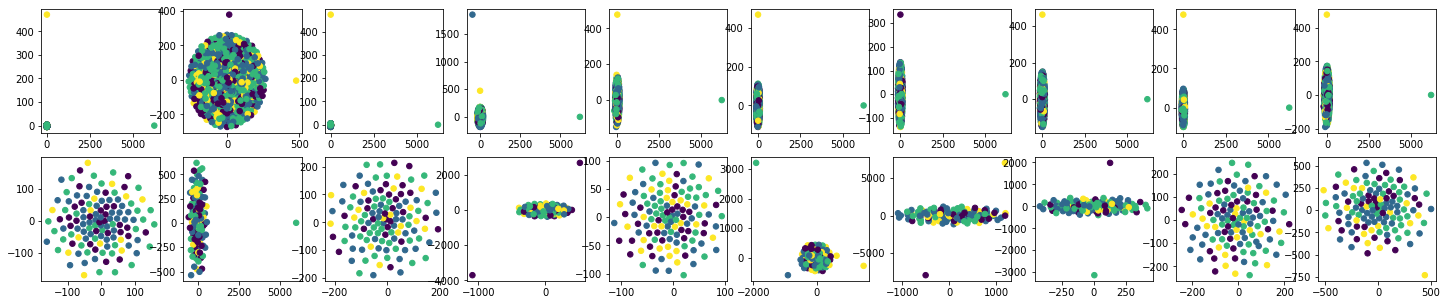

In [ ]:
from sklearn.manifold import TSNE
type = 1
subs_ = 1
eyedee = str(type)  # ID OF THE EXPERIMENT.
o_dim = int(1)      # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(5)
num_blocks_end   = int(10)
lambda_          = float(0.01)
mid_shape        = int(80)
D                = [0.05]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par   = 1e-4
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_cx_"
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
dataset   = "speech"
num_blocks = 10 # numero de folds
wei_cx = list()
Corr_f = list()
# data   = list()
tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
if type == 1:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["matriz_selec"]
  stim_data = scipy.io.loadmat(folder_path_+f"/Subject{sub_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["stim"][0]
elif type ==2:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["matriz_selec"]
elif type ==3:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["matriz_selec"]
elif type ==4:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["matriz_selec"]

cv = list()
train_ = list()
val_   = list() # estandar escaler 
test_  = list()

tsne_ = TSNE(n_components=2, init='pca')
kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# for d_cnt, dropout in enumerate(D):
# block =0
datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
fig,ax = plt.subplots(2,10,figsize=(25,5))
aa, bb = 0,0
folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
tsne_ = TSNE(n_components=2, init='pca')
for train_index, test_index in kf.split(resp_data):
  # print("TRAIN:", train_index, "TEST:", test_index)
  
  X_train_, x_test_ = resp_data[train_index], resp_data[test_index]
  X_train = np.zeros((len(X_train_),X_train_[0].shape[0],X_train_[0].shape[1]))
  x_test = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
  for tr in range(len(X_train_)):
    X_train[tr,:,:] = X_train_[tr]
  for tr in range(len(x_test_)):
    x_test[tr,:,:] = x_test_[tr]
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  X_train[np.isnan(X_train)]=0
  x_test[np.isnan(x_test)]=0
  
  tsne_train = tsne_.fit_transform(X_train)
  tsne_test  = tsne_.fit_transform(x_test)

  ax[0,aa].scatter(tsne_train[:,0],tsne_train[:,1],s=30,cmap='viridis',c=y[train_index]+1)
  ax[1,bb].scatter(tsne_test[:,0],tsne_test[:,1],s=30,cmap='viridis',c=y[test_index]+1)
  aa += 1
  bb += 1
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.

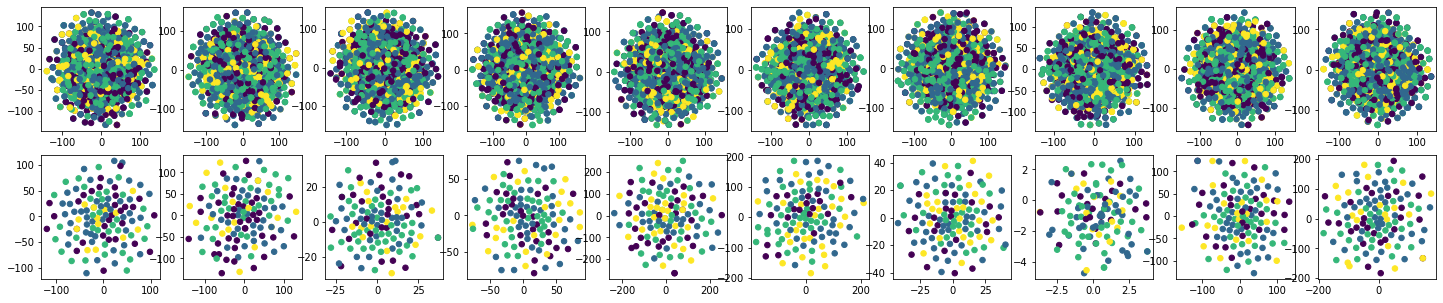

In [ ]:
from sklearn.manifold import TSNE
type = 1
subs_ = 1
eyedee = str(type)  # ID OF THE EXPERIMENT.
o_dim = int(1)      # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(5)
num_blocks_end   = int(10)
lambda_          = float(0.01)
mid_shape        = int(80)
D                = [0.05]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par   = 1e-4
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_cx_"
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
dataset   = "speech"
num_blocks = 10 # numero de folds
wei_cx = list()
Corr_f = list()
# data   = list()
tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
if type == 1:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["matriz_selec"]
elif type ==2:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["matriz_selec"]
elif type ==3:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["matriz_selec"]
elif type ==4:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["matriz_selec"]

cv = list()
train_ = list()
val_   = list() # estandar escaler 
test_  = list()

tsne_ = TSNE(n_components=2, init='pca')
kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# for d_cnt, dropout in enumerate(D):
# block =0
datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
fig,ax = plt.subplots(2,10,figsize=(25,5))
aa, bb = 0,0
for train_index, test_index in kf.split(resp_data):
  # print("TRAIN:", train_index, "TEST:", test_index)
  
  X_train_, x_test_ = datos_fold_[0][train_index,:,:], datos_fold_[0][test_index,:,:]
  X_train = np.zeros((len(X_train_),X_train_[0].shape[0],X_train_[0].shape[1]))
  x_test = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
  for tr in range(len(X_train_)):
    X_train[tr,:,:] = X_train_[tr]
  for tr in range(len(x_test_)):
    x_test[tr,:,:] = x_test_[tr]
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  X_train[np.isnan(X_train)]=0
  x_test[np.isnan(x_test)]=0
  
  tsne_train = tsne_.fit_transform(X_train)
  tsne_test  = tsne_.fit_transform(x_test)

  ax[0,aa].scatter(tsne_train[:,0],tsne_train[:,1],s=30,cmap='viridis',c=y[train_index]+1)
  ax[1,bb].scatter(tsne_test[:,0],tsne_test[:,1],s=30,cmap='viridis',c=y[test_index]+1)
  aa += 1
  bb += 1
plt.show()

# Tsne music

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.

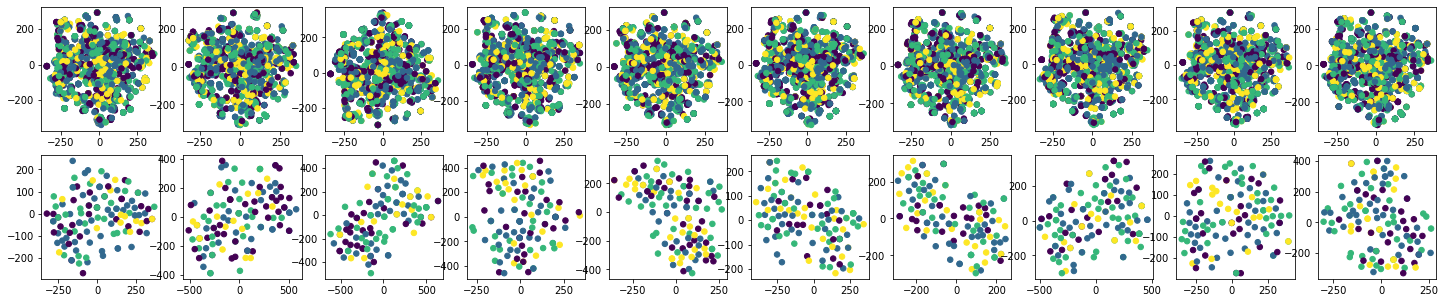

In [ ]:
from sklearn.manifold import TSNE
type = 1
subs_ = 1
sub = 1
eyedee = str(type)  # ID OF THE EXPERIMENT.
o_dim = int(1)      # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(5)
num_blocks_end   = int(10)
lambda_          = float(0.01)
mid_shape        = int(80)
D                = [0.05]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par   = 1e-4
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_cx_"
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
dataset   = "speech"
num_blocks = 10 # numero de folds
wei_cx = list()
Corr_f = list()
# data   = list()
tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
  
if type == 1:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
  stim_data = scipy.io.loadmat(folder_path_+f"/Subject{sub}_Preprocessed_ENV_EEG3_env_cx_all.mat")["stim"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["matriz_selec"]
elif type ==2:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["matriz_selec"]
  stim_data = scipy.io.loadmat(folder_path_+f"/Subject{sub}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["stim"][0]
elif type ==3:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["matriz_selec"]
  stim_data = scipy.io.loadmat(folder_path_+f"/Subject{sub}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["stim"][0]
elif type ==4:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["matriz_selec"]
  stim_data = scipy.io.loadmat(folder_path_+f"/Subject{sub}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["stim"][0]

cv = list()
train_ = list()
val_   = list() # estandar escaler 
test_  = list()

tsne_ = TSNE(n_components=2, init='pca')
kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# for d_cnt, dropout in enumerate(D):
# block =0
datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
fig,ax = plt.subplots(2,10,figsize=(25,5))
aa, bb = 0,0
folder_path_2 = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/caracteristicas/"
y = loadmat(folder_path_2+'clusters_.mat')['clus'].reshape(-1)+1
tsne_ = TSNE(n_components=2, init='pca')
for train_index, test_index in kf.split(stim_data):
  # print("TRAIN:", train_index, "TEST:", test_index)
  
  X_train_, x_test_ = stim_data[train_index], stim_data[test_index]
  X_train = np.zeros((len(X_train_),X_train_[0].shape[0],X_train_[0].shape[1]))
  x_test = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
  for tr in range(len(X_train_)):
    X_train[tr,:,:] = X_train_[tr]
  for tr in range(len(x_test_)):
    x_test[tr,:,:] = x_test_[tr]
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  X_train[np.isnan(X_train)]=0
  x_test[np.isnan(x_test)]=0
  
  tsne_train = tsne_.fit_transform(X_train)
  tsne_test  = tsne_.fit_transform(x_test)

  ax[0,aa].scatter(tsne_train[:,0],tsne_train[:,1],s=30,cmap='viridis',c=y[train_index]+1)
  ax[1,bb].scatter(tsne_test[:,0],tsne_test[:,1],s=30,cmap='viridis',c=y[test_index]+1)
  aa += 1
  bb += 1
plt.show()

In [ ]:
from sklearn.manifold import TSNE
type = 1
subs_ = 1
eyedee = str(type)  # ID OF THE EXPERIMENT.
o_dim = int(1)      # THE INTERESTED OUTPUTS DIMENSIONALITY
num_blocks_start = int(5)
num_blocks_end   = int(10)
lambda_          = float(0.01)
mid_shape        = int(80)
D                = [0.05]
dropout    = 0.05
learning_rate = 1e-3
epoch_num  = 20
batch_size = 2048
reg_par   = 1e-4
folder_path = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Pruebas_finales_all/grupo_cx_"
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" # Path to the data folder here
path_name = folder_path+f"dmcca_{eyedee}_{lambda_}_{mid_shape}_{D[0]}"
dataset   = "speech"
num_blocks = 10 # numero de folds
wei_cx = list()
Corr_f = list()
# data   = list()
tst_corrs_name =  f'{path_name}/speech_corrs_{subs_}.npy'
if type == 1:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_env_cx_all.mat")["matriz_selec"]
elif type ==2:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_RMS_cx_all.mat")["matriz_selec"]
elif type ==3:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_spectralflux_cx_all.mat")["matriz_selec"]
elif type ==4:
  resp_data = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["resp"][0]
  indx = scipy.io.loadmat(folder_path_+f"/Subject{subs_}_Preprocessed_ENV_EEG3_PC1_cx_all.mat")["matriz_selec"]

cv = list()
train_ = list()
val_   = list() # estandar escaler 
test_  = list()

tsne_ = TSNE(n_components=2, init='pca')
kf = RepeatedKFold(n_splits=10, n_repeats=1, random_state=0)
# for d_cnt, dropout in enumerate(D):
# block =0
datos_ = np.linspace(1, len(resp_data), num= len(resp_data))
fig,ax = plt.subplots(2,10,figsize=(25,5))
aa, bb = 0,0
for train_index, test_index in kf.split(resp_data):
  # print("TRAIN:", train_index, "TEST:", test_index)
  
  X_train_, x_test_ = datos_fold_[0][train_index,:,:], datos_fold_[0][test_index,:,:]
  X_train = np.zeros((len(X_train_),X_train_[0].shape[0],X_train_[0].shape[1]))
  x_test = np.zeros((len(x_test_),x_test_[0].shape[0],x_test_[0].shape[1]))
  for tr in range(len(X_train_)):
    X_train[tr,:,:] = X_train_[tr]
  for tr in range(len(x_test_)):
    x_test[tr,:,:] = x_test_[tr]
  X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
  x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1]*x_test.shape[2]))
  X_train[np.isnan(X_train)]=0
  x_test[np.isnan(x_test)]=0
  
  tsne_train = tsne_.fit_transform(X_train)
  tsne_test  = tsne_.fit_transform(x_test)

  ax[0,aa].scatter(tsne_train[:,0],tsne_train[:,1],s=30,cmap='viridis',c=y[train_index]+1)
  ax[1,bb].scatter(tsne_test[:,0],tsne_test[:,1],s=30,cmap='viridis',c=y[test_index]+1)
  aa += 1
  bb += 1
plt.show()

# Acoplamiento de fase y amplitud PAC

In [ ]:
import os
import mne
import numpy as np
from numpy import angle, sin, cos, sqrt
# from scipy.io import loadmat
# from mat73 import loadmat
import scipy as sp
from scipy.io import savemat
from scipy.signal import butter, lfilter, welch, hanning, filtfilt, hilbert
import matplotlib.pyplot as plt

In [ ]:
#filtering functions
def butter_bandpass(lowcut, highcut, fs, order=4):
  #lowcut is the lower bound of the frequency that we want to isolate
  #hicut is the upper bound of the frequency that we want to isolate
  #fs is the sampling rate of our data
  nyq = 0.5 * fs #nyquist frequency - see http://www.dspguide.com/ if you want more info
  low = float(lowcut) / nyq
  high = float(highcut) / nyq
  b, a = butter(order, [low, high], btype='band')
  return b, a

##
def butter_bandpass_filter(mydata, lowcut, highcut, fs, order=4):
  b, a = butter_bandpass(lowcut, highcut, fs, order=order)
  y = filtfilt(b, a, mydata)
  return y

# PAC %estimation of phase-amplitude cross-frequency coupling

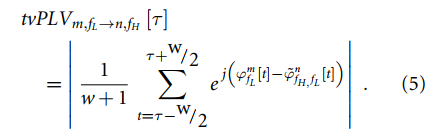

In [ ]:
def moving_multitrial_pac(data1,data2,fr1,fr2,Nsegments,sampling_freq,type):
  #calculating phase of theta
  phase_data = butter_bandpass_filter(data1, fr1[0], fr1[1],(sampling_freq))
  phase_data = angle(hilbert(phase_data))

  #calculating amplitude envelope of high gamma
  amp_data = butter_bandpass_filter(data2, fr2[0], fr2[1], (sampling_freq))
  amp_data = abs(hilbert(amp_data))

  # Filtering the amplitude of analytic signal of the high-frequency range within the
  # frequency range of the low-frequency band
  lowfromhigh = butter_bandpass_filter(amp_data, fr1[0], fr1[1],(sampling_freq))
  
  # lowfromhigh.shape
  low_Env_high_filtered_signals = lowfromhigh-np.tile(np.mean(lowfromhigh),(Ntrials,1))
  
  # get the phase
  Amp_phase_signals=angle(hilbert(low_Env_high_filtered_signals))
  Ntime = data1.shape[1]
  Nstep = np.floor(Ntime/Nsegments)
  if type == 'trials':
    temporal_ = np.zeros((Amp_phase_signals.shape[0],Nsegments))
  else:
    temporal_ = np.zeros((Nsegments))
  for ii in range(Nsegments): # repear over different segments
    start = np.floor((ii)*Nstep).astype(int)
    stop  = np.floor((ii+1)*Nstep).astype(int)
    if type == 'trials':
      plv = np.abs(np.sum(np.exp(1j*(phase_data[:,start:stop]-Amp_phase_signals[:,start:stop])),axis=1)/((Nstep)))
      temporal_[:,ii]=plv
    else:
      plv = np.abs(np.sum(np.sum(np.exp(1j*(phase_data[:,start:stop]-Amp_phase_signals[:,start:stop]))))/(Ntrials*(Nstep)))
      temporal_[ii]=plv
  return temporal_

In [ ]:
# Parameters
# Bands of rytms: delta to gamma.
phase_providing_band = [[1,4],[4,8],[8,10],[10,12],[12,20],[20,30],[30,45]] 
amplitude_providing_band = [[1,4],[4,8],[8,10],[10,12],[12,20],[20,30],[30,45]]
Ntrials   = data_ref[0].shape[0]
Nsegments = 8 # Number of segments in window.
Nchannels = data_ref[0].shape[1]
Nfreqs    = len(phase_providing_band)

In [ ]:
folder_path_ = "/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2" 

In [ ]:
#@title Texto de título predeterminado
temporal_plv = np.zeros((Ntrials,int(Nchannels*(Nchannels-1)/2),Nfreqs,Nfreqs,Nsegments))
# (Nodes,Nodes,Time)
for sub in range(len(Subjects)):
  cont_ch = 0 # contador de las subredes
  for ch1 in range(Nchannels):
    for ch2 in range(ch1+1,Nchannels-1):
      if ch1 != ch2:
        data1     = np.squeeze(data_ref[sub][:,ch1,:])
        data2     = np.squeeze(data_ref[sub][:,ch2,:])
        fr_1 = 0
        for fr1 in phase_providing_band:
          fr_2 = 0
          for fr2 in amplitude_providing_band:
            temporal_plv[:,cont_ch,fr_1,fr_2,:] = moving_multitrial_pac(data1,data2,fr1,fr2,Nsegments,sampling_freq,type='trials')
            fr_2 += 1
          fr_1 += 1
      cont_ch += 1
  print('PLV_pac_music'+str(sub))    
  savemat(folder_path_+'PLV_pac_music'+str(sub)+'_trials.mat',{'temporal_plv':temporal_plv})

PLV_pac_music0


In [ ]:
# PAC 
temporal_plv.shape
# np.transpose(temporal_plv, (0,4,1,2,3,5)).shape

(40, 171, 7, 7, 8)

In [ ]:
sub

In [ ]:
savemat(folder_path_+f'PLV_pac_music'+str(sub)+'_trials.mat',{'temporal_plv':temporal_plv})

# Kgauss

In [ ]:
! pip install bctpy
! pip install mne==0.19
#funciones de Daniel
FILEID = "1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O MIfunctions.py && rm -rf /tmp/cookies.txt

FILEID = "1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh" 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O modCSP.py && rm -rf /tmp/cookies.txt

--2021-12-21 19:38:11--  https://docs.google.com/uc?export=download&confirm=o9&id=1DOm75xoSPUbnFfcJBjVggPS0hzNEoWCG
Resolving docs.google.com (docs.google.com)... 142.250.136.138, 142.250.136.139, 142.250.136.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.136.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘MIfunctions.py’

MIfunctions.py          [ <=>                ]   3.17K  --.-KB/s    in 0.001s  

2021-12-21 19:38:11 (6.19 MB/s) - ‘MIfunctions.py’ saved [3251]

--2021-12-21 19:38:12--  https://docs.google.com/uc?export=download&confirm=46Co&id=1F9WpS7sKSFY73HSHYBgYXw9iyYalBKgh
Resolving docs.google.com (docs.google.com)... 142.250.136.138, 142.250.136.139, 142.250.136.113, ...
Connecting to docs.google.com (docs.google.com)|142.250.136.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-14-88-docs.googleusercontent.com/docs/securesc/oas1ur2a61i

In [ ]:
import os, sys
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
from sklearn.metrics import r2_score
from sklearn import linear_model
from scipy.stats import linregress
from scipy.stats import spearmanr
from sklearn.base import  BaseEstimator, TransformerMixin, ClassifierMixin
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.signal import butter, filtfilt, lfilter, welch, lfilter_zi, stft
import pandas as pd
from scipy.stats import spearmanr
from sklearn.model_selection import LeaveOneOut
import pickle
from scipy.stats import spearmanr, pearsonr
import MIfunctions 

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 19 17:39:21 2019

@author:Usage
Here you can get help of any object by pressing Ctrl+I in front of it, either on the Editor or the Console.
 andre
"""
from scipy.signal import butter, lfilter, lfilter_zi, filtfilt #, freqz
import numpy as np
from mne.io import read_raw_edf
#from mne.decoding import CSP
from modCSP import CSP
import matplotlib.pyplot as plt
import pandas as pd
import json as  js #conda install -c jmcmurray json
import warnings
import seaborn as sns
import mne
from numpy import matlib
import matplotlib
import os
from matplotlib.animation import FuncAnimation
from ipywidgets import interact
warnings.filterwarnings("ignore")
Sujetos_giga = {}


#%%
def Read_GIGA_data_fCloud(path_filename,ch,vt,sbj_id):
    #--- info ----------------
    # 2  ---> sample rate 
    # 7  ---> imaginary_left 
    # 8  ---> imaginary_right 
    # 11 ---> imaginary_event 
    # 14 ---> bad_trials 
    # class1: left 
    # class2: right
    #------------------------
    raw     = sio.loadmat(path_filename)
    eeg_raw = raw['eeg']
    sfreq   = np.float(eeg_raw[0][0][2])
    id_MI   = np.where(eeg_raw[0][0][11]==1)
    id_MI   = id_MI[1]
    raw_c1  = []
    raw_c2  = []
    y_c1    = []
    y_c2    = []
    for i in range(len(id_MI)):
        l_thr = id_MI[i]-(sfreq*2-1) 
        h_thr = id_MI[i]+(sfreq*5)
        tmp_c1 = eeg_raw[0][0][7][ch,np.int(l_thr):np.int(h_thr)]
        tmp_c2 = eeg_raw[0][0][8][ch,np.int(l_thr):np.int(h_thr)]
        raw_c1.append(tmp_c1[:,np.int(vt[0]*sfreq):np.int(vt[1]*sfreq)])
        raw_c2.append(tmp_c2[:,np.int(vt[0]*sfreq):np.int(vt[1]*sfreq)])
        y_c1.append(1.0)
        y_c2.append(2.0)    
    # remove bad trials
    id_bad_tr_voltage_c1 = eeg_raw[0][0][14][0][0][0][0][0]
    id_bad_tr_voltage_c2 = eeg_raw[0][0][14][0][0][0][0][1]   
    id_bad_tr_mi_c1      = eeg_raw[0][0][14][0][0][1][0][0]
    id_bad_tr_mi_c2      = eeg_raw[0][0][14][0][0][1][0][1]
    ref_axis_c1          = 1
    ref_axis_c2          = 1    
    if id_bad_tr_mi_c1.shape[0]>id_bad_tr_mi_c1.shape[1]:
        id_bad_tr_mi_c1 = id_bad_tr_mi_c1.T
    if id_bad_tr_mi_c2.shape[0]>id_bad_tr_mi_c2.shape[1]:
        id_bad_tr_mi_c2 = id_bad_tr_mi_c2.T
    if id_bad_tr_voltage_c1.shape[1] == 0:
        id_bad_tr_voltage_c1 = np.reshape(id_bad_tr_voltage_c1, (id_bad_tr_voltage_c1.shape[0], id_bad_tr_mi_c1.shape[1]))
    if id_bad_tr_voltage_c2.shape[1] == 0:
        id_bad_tr_voltage_c2 = np.reshape(id_bad_tr_voltage_c2, (id_bad_tr_voltage_c2.shape[0], id_bad_tr_mi_c2.shape[1])) 
    if (id_bad_tr_voltage_c1.shape[1] > id_bad_tr_mi_c1.shape[1]):
        if id_bad_tr_mi_c1.shape[0] == 0:
            id_bad_tr_mi_c1 = np.reshape(id_bad_tr_mi_c1, (id_bad_tr_mi_c1.shape[0],id_bad_tr_voltage_c1.shape[1]))
            ref_axis_c1     = 0
    if (id_bad_tr_voltage_c2.shape[1] > id_bad_tr_mi_c2.shape[1]):
        if id_bad_tr_mi_c2.shape[0] == 0:
            id_bad_tr_mi_c2 = np.reshape(id_bad_tr_mi_c2, (id_bad_tr_mi_c2.shape[0],id_bad_tr_voltage_c2.shape[1]))
            ref_axis_c2     = 0
    if (id_bad_tr_mi_c1.shape[0] > id_bad_tr_voltage_c1.shape[0]):
        ref_axis_c1 = 0
    if (id_bad_tr_mi_c2.shape[0] > id_bad_tr_voltage_c2.shape[0]):
        ref_axis_c2 = 0
    if (id_bad_tr_voltage_c1.shape[0] > id_bad_tr_mi_c1.shape[0]):
        ref_axis_c1 = 0
    if (id_bad_tr_voltage_c2.shape[0] > id_bad_tr_mi_c2.shape[0]):
        ref_axis_c2 = 0    
    id_bad_tr_c1 = np.concatenate((id_bad_tr_voltage_c1,id_bad_tr_mi_c1),axis=ref_axis_c1)
    id_bad_tr_c1 = id_bad_tr_c1.ravel()-1
    for ele in sorted(id_bad_tr_c1, reverse = True):  
        del raw_c1[ele]
        del y_c1[ele]
    id_bad_tr_c2 = np.concatenate((id_bad_tr_voltage_c2,id_bad_tr_mi_c2),axis=ref_axis_c2)
    id_bad_tr_c2= id_bad_tr_c2.ravel()-1
    for ele in sorted(id_bad_tr_c2, reverse = True):  
        del raw_c2[ele]
        del y_c2[ele]     
    Xraw = np.array(raw_c1 + raw_c2)
    y    = np.array(y_c1 + y_c2)  
    return Xraw, y, sfreq
#%%
def leer_bci42a_train_full(path_filename,clases,Ch,vt):
    
    raw = read_raw_edf(path_filename,preload=False)
    sfreq=raw.info['sfreq']
    
    #raw.save('tempraw.fif',overwrite=True)#, tmin=3, tmax=5,overwrite = True)
    #rawo = mne.io.read_raw_fif('tempraw.fif', preload=True)  # load data  
    # depurar canales
    #rawo.plot()
    
    #clases_b = [769,770,771,772] #codigo clases
    i_muestras_   = raw._raw_extras[0]['events'][1]           # Indices de las actividades.
    i_clases_ = raw._raw_extras[0]['events'][2]           # Marcadores de las actividades.
    
    remov   = np.ndarray.tolist(i_clases_)                 # Quitar artefactos.
    Trials_eli = 1023                                   # Elimina los trials con artefactos.
    m       = np.array([i for i,x in enumerate(remov) if x==Trials_eli])   # Identifica en donde se encuentra los artefactos.
    m_      = m+1
    tt      = np.array(raw._raw_extras[0]['events'][0]*[1],dtype=bool)
    tt[m]   = False
    tt[m_]  = False
    i_muestras = i_muestras_[tt] # indices en muestra del inicio estimulo -> tomar 2 seg antes y 5 seg despues
    i_clases = i_clases_[tt] # tipo de clase
    
    #i_muestras = i_muestras_ # indices en muestra del inicio estimulo -> tomar 2 seg antes y 5 seg despues
    #i_clases = i_clases_ # tipo de clase
    
    
    #eli = 1023 
    #ind = i_clases_ != eli
    #i_clases = i_clases_[ind]
    #i_muestras = i_muestras_[ind]
    ni = np.zeros(len(clases))
    for i in range(len(clases)):
        ni[i] = np.sum(i_clases == clases[i]) #izquierda
    
    Xraw = np.zeros((int(np.sum(ni)),len(Ch),int(sfreq*(vt[1]+vt[0]))))
    y = np.zeros(int(np.sum(ni)))
    ii = 0
    for i in range(len(clases)):
        for j in range(len(i_clases)):
            if i_clases[j] == clases[i]:
                rc = raw[:,int(i_muestras[j]-vt[0]*sfreq):int(i_muestras[j]+vt[1]*sfreq)][0]
                rc = rc - np.mean(rc)
                Xraw[ii,:,:] = rc[Ch,:]
                y[ii] = int(i+1)
                ii += 1
    
    return i_muestras, i_clases, raw, Xraw, y, ni, m

#%%
def leer_bci42a_test_full(path_filename,clases,Ch,vt):
    
    raw = read_raw_edf(path_filename,preload=False)
    sfreq=raw.info['sfreq']
    
    #raw.save('tempraw.fif',overwrite=True)#, tmin=3, tmax=5,overwrite = True)
    #rawo = mne.io.read_raw_fif('tempraw.fif', preload=True)  # load data  
    # depurar canales
    #rawo.plot()
    
    #clases_b = [769,770,771,772] #codigo clases
    i_muestras_   = raw._raw_extras[0]['events'][1]           # Indices de las actividades.
    i_clases_ = raw._raw_extras[0]['events'][2]           # Marcadores de las actividades.
    
    #remov   = np.ndarray.tolist(i_clases_)                 # Quitar artefactos.
#    Trials_eli = 1023                                   # Elimina los trials con artefactos.
#    m       = np.array([i for i,x in enumerate(remov) if x==Trials_eli])   # Identifica en donde se encuentra los artefactos.
#    m_      = m+1
#    tt      = np.array(raw._raw_extras[0]['events'][0]*[1],dtype=bool)
#    tt[m]   = False
#    tt[m_]  = False
#    i_muestras = i_muestras_[tt] # indices en muestra del inicio estimulo -> tomar 2 seg antes y 5 seg despues
#    i_clases = i_clases_[tt] # tipo de clase
#    
    i_muestras = i_muestras_ # indices en muestra del inicio estimulo -> tomar 2 seg antes y 5 seg despues
    i_clases = i_clases_ # tipo de clase
    
    
    ni = np.zeros(len(clases))
    for i in range(len(clases)):
        ni[i] = np.sum(i_clases == clases[i]) #izquierda
    
    Xraw = np.zeros((int(np.sum(ni)),len(Ch),int(sfreq*(vt[1]+vt[0]))))
    #y = np.zeros(int(np.sum(ni)))
    ii = 0
    for i in range(len(clases)):
        for j in range(len(i_clases)):
            if i_clases[j] == clases[i]:
                rc = raw[:,int(i_muestras[j]-vt[0]*sfreq):int(i_muestras[j]+vt[1]*sfreq)][0]
                rc = rc - np.mean(rc)
                Xraw[ii,:,:] = rc[Ch,:]
                #y[ii] = int(clases[i])
                ii += 1
    
    return i_muestras, i_clases, raw, Xraw

#%% Filters

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b,a,data)#lfilter(b, a, data)
    return y

#%% Bank filter
def bank_filter_epochsEEG(Xraw, fs, f_frec): #Xraw[nepochs,nchannels]
    nf,ff = f_frec.shape
    epochs,channels,T = Xraw.shape
    Xraw_f = np.zeros((epochs,channels,T,nf))
    for f in range(nf):
        lfc = f_frec[f,0]
        hfc = f_frec[f,1]
        b,a = butter_bandpass(lfc, hfc, fs)
        zi = lfilter_zi(b, a)
        Xraw_f[:,:,:,f] = filtfilt(b,a,Xraw,axis=2)
        #for n in range(epochs):
        #    for c in range(channels):
                #print(c)
        #        zi = lfilter_zi(b, a)
        #        Xraw_f[n,c,:,f] = lfilter(b, a, Xraw[n,c,:],zi = zi*Xraw[n,c,0])[0]
                #Xraw_f[n,c,:,f] = lfilter(b, a, Xraw[n,c,:])
    return Xraw_f

#%% CSP epochs
def CSP_epochsEEG(Xraw, y, ncomp): #Xraw[nepochs,nchannels]
    
    csp = CSP(n_components=ncomp, reg='empirical', log=True, norm_trace=False) 
    epochs,channels,T,nf = Xraw.shape
    Xcsp = np.zeros((epochs,ncomp,nf))
    csp_l = []
    for f in range(nf):
        
        csp_l.append(csp.fit(Xraw[:,:,:,f],y))
        Xcsp[:,:,f] = csp_l[f].transform(Xraw[:,:,:,f])
    
    return csp_l, Xcsp

#%% CSP custom sklearn

#from sklearn.metrics import pairwise_distances  
#from scipy.spatial.distance import squareform 


from sklearn.base import  BaseEstimator, TransformerMixin
class CSP_epochs_filter_extractor(TransformerMixin,BaseEstimator):
    def __init__(self, fs,f_frec=[4,30], ncomp=4,reg='empirical',PCov=False):
        self.reg = reg
        self.fs = fs
        self.PCov=PCov
        self.f_frec = f_frec
        self.ncomp = ncomp
        
    def _averagingEEG(self,X):
        epochs,channels,T = X.shape
        Xc = np.zeros((epochs,channels,T))
        for i in range(epochs):
            Xc[i,:,:] = X[i,:,:] - np.mean(X[i,:,:])
        return Xc    
        
    def _bank_filter_epochsEEG(self,X):
        nf,ff = self.f_frec.shape
        epochs,channels,T = X.shape
        X_f = np.zeros((epochs,channels,T,nf))
        for f in range(nf):
            lfc = self.f_frec[f,0]
            hfc = self.f_frec[f,1]
            b,a = butter_bandpass(lfc, hfc, self.fs)
            X_f[:,:,:,f] = filtfilt(b,a,X,axis=2)
        return X_f  
    def _CSP_epochsEEG(self,Xraw, y,*_):
        ncomp = self.ncomp
        mne.set_log_level('WARNING')
        if self.PCov==True:
            epochs,P,nf = Xraw.shape
            channels = int((1+np.sqrt(1+8*P))/2)
        else:  
            epochs,channels,T,nf = Xraw.shape
        Xcsp = np.zeros((epochs,self.ncomp,nf))
        self.filters  =np.zeros((self.ncomp,channels,nf))
        csp_l = []
        for f in range(nf):
            if self.PCov == True:
                csp_l+= [CSP(n_components=ncomp, reg=self.reg, log=True,transform_into='average_power',PCov = self.PCov).fit(Xraw[:,:,f],y)]
                Xcsp[:,:,f] = csp_l[f].transform(Xraw[:,:,f])
            else:
                csp_l+= [CSP(n_components=ncomp, reg=self.reg, log=True,transform_into='average_power',PCov = self.PCov).fit(Xraw[:,:,:,f],y)]
                Xcsp[:,:,f] = csp_l[f].transform(Xraw[:,:,:,f])
            self.filters[:,:,f] = csp_l[f].filters_[:self.ncomp]
        return csp_l, Xcsp

    def fit(self,Xraw,y, *_):
        if self.PCov == True:
            self.csp_l, self.Xcsp = self._CSP_epochsEEG(Xraw, y)
        else:
            Xraw = self._averagingEEG(Xraw)
            self.csp_l, self.Xcsp = self._CSP_epochsEEG(self._bank_filter_epochsEEG(Xraw), y)
        return self    

    
    def transform(self, Xraw, *_):
        if self.PCov == False:
            Xraw = self._averagingEEG(Xraw)
            Xraw = self._bank_filter_epochsEEG(Xraw)
            epochs,channels,T,nf = Xraw.shape
        else:
            #Xwtmpha = tfr_array_morlet(Xraw,sfreq=self.fs,freqs=np.mean(self.f_frec,axis=1),n_cycles=self.n_cycles,output="phase")
            epochs,P,nf  = Xraw.shape
            #epochs,channels,nf,T = Xwtmpha.shape
        ncomp = self.ncomp    
        result = np.zeros((epochs,ncomp,nf))   
        for f in range(nf):
            #if self.PCov == 'kernel':
            #    Cov = np.zeros((epochs,channels,channels))
                #for epoch in range(epochs):
                #Cov[epoch,:,:] = self.Kg(Xraw_f[epoch,:,:,f]) 
            #    Cov = np.array(Parallel(n_jobs=-1)(delayed(self.Kg)(Xraw_f[n,:,:,f]) for n in range(epochs))) 
            #    result[:,:,f] =  self.csp_l[f].transform(Cov)
            #elif self.PCov == 'PLV':
            #    Cov = np.array(Parallel(n_jobs=-1)(delayed(self.plv_phase_distance)(Xwtmpha[:,:,f,:],n) for n in range(epochs)))
            #    result[:,:,f] =  self.csp_l[f].transform(Cov)
            if self.PCov == True:
                result[:,:,f] =  self.csp_l[f].transform(Xraw[:,:,f]) 
            else:
                result[:,:,f] =  self.csp_l[f].transform(Xraw[:,:,:,f]) 
        result = result.reshape(np.size(result,0),-1)  
        return result 

def eeg_nor(Xraw,sca=1e5): #Xraw[epochs,ch,T]
    epochs,chs,T = Xraw.shape
    Xrawp = np.zeros((epochs,chs,T))
    for ep in range(epochs):
        for c in range(chs):
            Xrawp[ep,:,:] = sca*(Xraw[ep,:,:] - Xraw[ep,:,:].mean(axis=0))
    return Xrawp

def plot_eeg(data,sample_rate,channels_names,sca=0.75): #data[channels, samples]
    #  Como se conoce la frecuencia de muestreo es posible recuperar el vector del tiempo
    time = np.linspace(0, data.shape[1] / sample_rate, data.shape[1])

    fig = plt.gcf()#plt.figure(figsize=(16, 9), dpi=90)
    sumf = sca*np.max(sca*(data-matlib.repmat(data.mean(axis=1).reshape(-1,1),1,data.shape[1])))
     # Se reemplazan los valores numéricos del eje Y por los nombres de los canales
    plt.yticks(np.arange(0, sumf*len(channels_names),sumf),channels_names)
    color = sns.color_palette('husl',n_colors=data.shape[0])
    # Como los datos están en vertical (columnas) se reorientan con la transpuesta para poder visualizar los canales
    for i in range(data.shape[0]):  # se ignora la última columna
        # Para que no queden los canales sobrepuestos, antes de graficar se centra y se le suma un entero para desplazarlo ligeramente hacia arriba.
        plt.plot(time, (data[i,:] - data[i,:].mean()) + sumf*i,color=color[i])
    return


def plot_confusion_matrix_MS(cm_m, cm_s, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):

    
    fig, ax = plt.subplots()
    im = ax.imshow(cm_m, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm_m.shape[1]),
           yticks=np.arange(cm_m.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1f' if normalize else 'd'
    thresh = cm_m.max() / 2.
    for i in range(cm_m.shape[0]):
        for j in range(cm_m.shape[1]):
            s = format(cm_m[i, j],'.1f') + "$\pm$" + format(cm_s[i, j],'.1f')
            ax.text(j, i, s,ha="center", va="center",
                    color="white" if cm_m[i, j] > thresh else "black",fontsize=12)
    fig.tight_layout()
    return ax

#%%

class Window_band_CSP_eppoch(TransformerMixin,BaseEstimator):
    def __init__(self,fs,vtw=[2.5,4.5],f_frec=[4,40],ncomp=6,reg='empirical',PCov=False):
        self.fs=fs
        self.ncomp=ncomp
        self.PCov=PCov
        self.vtw=vtw
        self.f_frec=f_frec
        self.reg=reg

    def fit_CSP_Xraw_time_samples(self,Xraw,y,vtw,fs,f_frec,ncomp):
        self.csp_c = [None]*len(vtw)
        self.filters = [None]*len(vtw)
        for i in range(len(vtw)):
            if self.PCov == False:
                X = Xraw[:,:,int(vtw[i][0]*fs):int(vtw[i][1]*fs)]
            else:
                X = Xraw[:,:,i,:]
            self.csp_c[i] = CSP_epochs_filter_extractor(fs=fs,f_frec=f_frec,ncomp=ncomp,reg=self.reg,PCov=self.PCov)
            self.csp_c[i].fit(X,y)
            self.filters[i] = self.csp_c[i].filters

    def fit(self,Xraw,y,*_):
        if self.PCov == True:
            Xraw = Xraw.reshape((len(Xraw),-1,len(self.vtw),len(self.f_frec)))
        self.fit_CSP_Xraw_time_samples(Xraw,y,self.vtw,self.fs,self.f_frec,self.ncomp) 
        return self  
    
    def transform(self, Xraw, *_):
        Xf = [None]*len(self.csp_c)
        if self.PCov == True:
            Xraw = Xraw.reshape((len(Xraw),-1,len(self.vtw),len(self.f_frec)))
        for i in range(len(self.csp_c)):
            if self.PCov == False:
                X = Xraw[:,:,int(self.vtw[i][0]*self.fs):int(self.vtw[i][1]*self.fs)]
            else: 
                X = Xraw[:,:,i,:]
            Xf[i] = self.csp_c[i].transform(X)
        return Xf #
    #def fit_transform(self,Xraw,y,*_):
    #    self.fit(Xraw,y)
    #    return self.transform(Xraw)
#%%
class Window_band_MM_eppoch(TransformerMixin,BaseEstimator):
    def __init__(self,fs,vtw=[[0,2],[2,4]],f_frec=np.array([[8,30]])):
        self.fs=fs
        self.vtw=vtw
        self.f_frec=f_frec
    def fit(self,Xraw,y,*_):
        pass 
    def transform(self, Xraw, *_):
        Xfil = bank_filter_epochsEEG(Xraw,self.fs,self.f_frec)
        for i in range(len(self.vtw)):
            Xfil_r = Xfil[:,:,int(self.fs*self.vtw[i][0]):int(self.fs*self.vtw[i][1]),:]
            Xm =np.zeros((Xfil_r.shape[0],Xfil_r.shape[1],len(self.vtw),len(self.f_frec),5))
            for band in range(len(self.f_frec)):
                Xm[:,:,i,band,0]=Xfil_r[:,:,:,band].mean(axis=-1)
                Xm[:,:,i,band,1]=Xfil_r[:,:,:,band].var(axis=-1)
                Xm[:,:,i,band,2]=Xfil_r[:,:,:,band].max(axis=-1)
                Xm[:,:,i,band,3]=Xfil_r[:,:,:,band].min(axis=-1)
                Xm[:,:,i,band,4]=np.median(Xfil_r[:,:,:,band],axis=-1)
            Xm = Xm.reshape((Xfil_r.shape[0],-1))
        return Xm
    def fit_transform(self,Xraw,y,*_):
        self.transform(Xraw,y)
        return self.transform(Xraw)
#%%
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.base import  BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class elastic_net_feats(TransformerMixin,BaseEstimator):
  def __init__(self,alpha=0,l1_ratio=0):
    self.alpha=alpha
    self.l1_ratio=l1_ratio
  def fit(self,X,y,*_):
    self.elatic = ElasticNet(alpha=self.alpha,l1_ratio=self.l1_ratio,random_state=0)
    #if len(np.unique(y))>2:
    mlb = OneHotEncoder()
    y=mlb.fit_transform(y.reshape((-1,1))).toarray()
    self.elatic.fit(X,y)
  def transform(self,X,*_):
    if len(self.elatic.coef_.shape)>1:
        Xr = np.dot(X,self.elatic.coef_.T)
    else:
        Xr = np.dot(X,self.elatic.coef_)
        Xr = Xr.reshape((-1,1))
    return Xr
  def fit_transform(self,X,y,*_):
    self.fit(X,y)
    return self.transform(X)

class Lasso_feats(TransformerMixin,BaseEstimator):
  def __init__(self,alpha=0):
    self.alpha=alpha
  def fit(self,X,y,*_):
    self.lasso = Lasso(alpha=self.alpha)
    self.lasso.fit(X,y)
  def transform(self,X,*_):
    Xr = X[:,np.abs(self.lasso.coef_)> 0]
    return Xr
  def fit_transform(self,X,y,*_):
    self.fit(X,y)
    return self.transform(X)
from numpy import swapaxes
class flatt(TransformerMixin,BaseEstimator):
    def __init__(self,axis=0):
        self.axis=axis
    def fit(self,X,*_):
        for i in range(len(X)):
            if i==0:
                Xx = X[i]
            else:
                Xx = np.concatenate((Xx,X[i]),axis=1)  
            if self.axis==1:
                Xx = Xx.T
        return Xx 
    def transform(self,X,*_):
        for i in range(len(X)):
            if i==0:
                Xx = X[i]
            else:
                Xx = np.concatenate((Xx,X[i]),axis=1)  
            if self.axis==1:
                Xx = Xx.T
        return Xx 
    def fit_transform(self,X,*_):
        for i in range(len(X)):
            if i==0:
                Xx = X[i]
            else:
                Xx = np.concatenate((Xx,X[i]),axis=1)  
            if self.axis==1:
                Xx = Xx.T
        return Xx

class Swapax_csp(TransformerMixin,BaseEstimator):
    def __init__(self,vtw,f_frec):
        self.vtw=vtw
        self.f_frec=f_frec
    def fit(self,X,*_):
        newkl = X.reshape((len(X),len(self.vtw),-1,len(self.f_frec)))
        newkl =np.swapaxes(newkl,1,2)
        return  newkl.reshape((len(X),-1))
    def transform(self,X,*_):
        newkl = X.reshape((len(X),len(self.vtw),-1,len(self.f_frec)))
        newkl =np.swapaxes(newkl,1,2)
        return  newkl.reshape((len(X),-1))
    def fit_transform(self,X,*_):
        newkl = X.reshape((len(X),len(self.vtw),-1,len(self.f_frec)))
        newkl =np.swapaxes(newkl,1,2)
        return  newkl.reshape((len(X),-1))

class Swapax(TransformerMixin,BaseEstimator):
    def __init__(self,col1=0,col2=1):
        self.col1 = col1
        self.col2 = col2
    def fit(self,X,y,*_):
        Xr = swapaxes(X,self.col1,self.col2)
        return Xr
    def transform(self,X,*_):
        Xr = swapaxes(X,self.col1,self.col2)
        return Xr
    def fit_transform(self,X,y,*_):
        Xr = swapaxes(X,self.col1,self.col2)
        return Xr 

class concat(TransformerMixin,BaseEstimator):
    def __init__(self,col1=0):
        self.col1 = col1
    def fit(self,X,y,*_):
        Xr = np.reshape(X,(np.shape(X)[0],-1))
        return Xr
    def transform(self,X,*_):
        Xr = np.reshape(X,(np.shape(X)[0],-1))
        return Xr
    def fit_transform(self,X,y,*_):
        Xr = np.reshape(X,(np.shape(X)[0],-1))
        return Xr     

class selectCSPwin_freq(TransformerMixin,BaseEstimator):
    def __init__(self,windows,freqs,f_frec):
        self.windows = windows
        self.freqs = freqs
        self.f_frec=f_frec
    def fit(self,X,y,*_):
        Xr=[]
        Wind,ind_inv = np.unique(self.windows,return_inverse=True)
        for ix in range(len(Wind)):
            tmp = X[Wind[ix]]
            tmp = tmp.reshape((tmp.shape[0],-1,len(self.f_frec)))
            Xr.append(tmp[:,:,self.freqs[ind_inv==ix]].reshape((tmp.shape[0],-1)))
        return Xr
    def transform(self,X,*_):
        Xr=[]
        Wind,ind_inv = np.unique(self.windows,return_inverse=True)
        for ix in range(len(Wind)):
            tmp = X[Wind[ix]]
            tmp = tmp.reshape((tmp.shape[0],-1,len(self.f_frec)))
            Xr.append(tmp[:,:,self.freqs[ind_inv==ix]].reshape((tmp.shape[0],-1)))
        return Xr
    def fit_transform(self,X,y,*_):
        Xr=[]
        Wind,ind_inv = np.unique(self.windows,return_inverse=True)
        for ix in range(len(Wind)):
            tmp = X[Wind[ix]]
            tmp = tmp.reshape((tmp.shape[0],-1,len(self.f_frec)))
            Xr.append(tmp[:,:,self.freqs[ind_inv==ix]].reshape((tmp.shape[0],-1)))
        return Xr  

#%%
from sklearn.decomposition import KernelPCA
from scipy.spatial.distance import squareform
from sklearn.metrics import pairwise_distances
import time
class Cov_epochs_filter_extractor(TransformerMixin,BaseEstimator):
    def __init__(self, fs,f_frec=[4,30],gamma=1,Normalize=False,alpha=1,eta=1):
        self.gamma = gamma
        self.fs = fs
        self.alpha=alpha
        self.eta=eta
        self.f_frec = f_frec
        self.Normalize = Normalize
        
    def _averagingEEG(self,X):
        epochs,channels,T = X.shape
        Xc = np.zeros((epochs,channels,T))
        for i in range(epochs):
            Xc[i,:,:] = X[i,:,:] - X[i,:,:].mean(axis=0)
        return Xc    
        
    def _bank_filter_epochsEEG(self,X):
        nf,ff = self.f_frec.shape
        epochs,channels,T = X.shape
        X_f = np.zeros((epochs,channels,T,nf))
        for f in range(nf):
            lfc = self.f_frec[f,0]
            hfc = self.f_frec[f,1]
            b,a = butter_bandpass(lfc, hfc, self.fs)
            X_f[:,:,:,f] = filtfilt(b,a,X,axis=2)
        return X_f    

    def _cov_epochsEEG(self,Xraw,*_):
        mne.set_log_level('WARNING')
        epochs,channels,T,nf = Xraw.shape
        #Xcov = np.zeros((epochs,int(channels*(channels-1)/2),nf))
        Xcov = np.zeros((epochs,int(channels*self.alpha),nf))
        self.epochs = epochs
        self.channels  = channels
        for f in range(nf):
            for i in  range(epochs):
                #C = pairwise_distances(Xraw[i,:,:,f],Xraw[i,:,:,f])
                #C = (C+C.T)/2 # ensure symmetry matrix
                #C = C-np.diag(np.diag(C))
                #np.corrcoef(Xraw[i,:,:,f])#Xraw[i,:,:,f].dot(Xraw[i,:,:,f].T) 
                #gamma0 = 1/np.median(squareform(C)**2)
                #C = np.exp(-.5*self.gamma*gamma0*(C**2))
                kpca = KernelPCA(n_components=self.alpha,kernel='rbf',gamma=self.eta)
                C = kpca.fit_transform(Xraw[i,:,:,f])
                #w ,v = np.linalg.eig(C)
                #indx = np.argsort(w)
                #w = w[indx]
                #v = v[:,indx]
                #cus = np.cumsum(w)/np.sum(w)<self.eta
                #C = v[:,cus].dot(np.diag(w[cus])).dot(v[:,cus].T)
                #C = (C+C.T)/2 # ensure symmetry matrix
                #C = C.dot(v[:,cus]).dot(np.diag(w[cus]))
                #Xcov[i,:,f] = squareform(C-np.diag(np.diag(C)))
                Xcov[i,:,f] = C.ravel()
        return Xcov.reshape(epochs,-1)
    
    def _cov_vec2mat(self,Xv):
        return Xv.reshape(self.epochs,int(self.channels*(self.channels-1)/2),len(self.f_frec))

    def fit(self,Xraw,y, *_):
        if self.Normalize==True:
            Xraw = self._averagingEEG(Xraw)
        Xraw_f = self._bank_filter_epochsEEG(Xraw)
        self.Xcov_v = self._cov_epochsEEG(Xraw_f)
        return self    
    
    def transform(self, Xraw, *_):
        if self.Normalize==True:
            Xraw = self._averagingEEG(Xraw)
        Xraw_f = self._bank_filter_epochsEEG(Xraw)
        return self._cov_epochsEEG(Xraw_f)
#%%
class Concat_epochs_filter_extractor(TransformerMixin,BaseEstimator):
    def __init__(self, fs,f_frec=[4,30],Normalize=False,StaditicFeatures=False):
        self.fs = fs
        self.f_frec = f_frec
        self.Normalize = Normalize
        self.StaditicFeatures = StaditicFeatures
        
    def _averagingEEG(self,X):
        epochs,channels,T = X.shape
        Xc = np.zeros((epochs,channels,T))
        for i in range(epochs):
            Xc[i,:,:] = X[i,:,:] - X[i,:,:].mean(axis=0)
        return Xc    
        
    def _bank_filter_epochsEEG(self,X):
        nf,ff = self.f_frec.shape
        epochs,channels,T = X.shape
        X_f = np.zeros((epochs,channels,T,nf))
        for f in range(nf):
            lfc = self.f_frec[f,0]
            hfc = self.f_frec[f,1]
            b,a = butter_bandpass(lfc, hfc, self.fs)
            X_f[:,:,:,f] = filtfilt(b,a,X,axis=2)
        return X_f    

    def _cov_epochsEEG(self,Xraw,*_):
        mne.set_log_level('WARNING')
        epochs,channels,T,nf = Xraw.shape
        self.epochs = epochs
        self.channels  = channels
        if self.StaditicFeatures == False:
            return Xraw.reshape((epochs,-1))
        else:
            Xst = np.zeros((epochs,channels,5,nf))
            for f in range(nf):
                for i in  range(epochs):
                    for c in range(channels):
                        Xst[i,c,0,f] = np.mean(Xraw[i,c,:,f])
                        Xst[i,c,1,f] = np.std(Xraw[i,c,:,f])
                        Xst[i,c,2,f] = np.min(Xraw[i,c,:,f])
                        Xst[i,c,3,f] = np.max(Xraw[i,c,:,f])
                        Xst[i,c,4,f] = np.median(Xraw[i,c,:,f])
            return Xst.reshape((epochs,-1))
    
    def fit(self,Xraw,y, *_):
        if self.Normalize==True:
            Xraw = self._averagingEEG(Xraw)
        Xraw_f = self._bank_filter_epochsEEG(Xraw)
        return self    
    
    def transform(self, Xraw, *_):
        if self.Normalize==True:
            Xraw = self._averagingEEG(Xraw)
        Xraw_f = self._bank_filter_epochsEEG(Xraw)
        return self._cov_epochsEEG(Xraw_f)

'''
def rho_topoplot(rho,info,channels_names,show_names=False,countours=0, cmap='jet',ax =None,fig=None,sca=1,colorbar=True,vmin=0,vmax=1):
    
    if ax == None: ax = plt.gca()
    if fig == None: fig = plt.gcf()
    rhoc = sca*rho
    if colorbar:
        cax = fig.add_axes([0.95, 0.15, 0.05, 0.75])
        norm = matplotlib.colors.Normalize(vmin=vmin,vmax=vmax)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])
        plt.colorbar(sm,cax=cax)
    mne.viz.plot_topomap(rhoc,info, names=channels_names, 
                          show_names=show_names,contours=0,cmap=cmap,axes=ax,vmin=vmin,vmax=vmax,res=128)
    return

'''
from sklearn.metrics import pairwise_distances  
from scipy.spatial.distance import squareform 
from mne.viz import plot_topomap
from scipy.stats import kurtosis
import pywt
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import periodogram, welch
from scipy.stats import spearmanr
import matplotlib.colors as colors
import matplotlib.cm as cmx
from mne.time_frequency import tfr_array_morlet, csd_array_morlet, csd_array_fourier
from joblib import Parallel, delayed
from scipy.stats import kendalltau
from mne.viz.topomap import _check_outlines, _draw_outlines
from mne.viz.utils import plt_show,tight_layout
from mne.io.pick import _picks_to_idx
import itertools
import numpy as np
import itertools
from sklearn.base import  BaseEstimator, TransformerMixin
from scipy.signal import butter, lfilter, lfilter_zi, filtfilt #, freqz
from joblib import Parallel, delayed
import numpy as np
import itertools
from sklearn.base import  BaseEstimator, TransformerMixin
from scipy.signal import butter, lfilter, lfilter_zi, filtfilt #, freqz
from joblib import Parallel, delayed
from itertools import islice
from scipy.spatial.distance import cdist
from itertools import permutations
import math
from scipy import special
class FB_feats(TransformerMixin,BaseEstimator):
    def __init__(self, fs=250,f_frec=np.array([[8,12],[12,30]]),vtw=np.array([[2.5,4.5],[3,5]]),gammad=1,
                feat='kcon',ncomp = 6,method='fft',normalize=True,n_cycles=7.0,motifs_transform=False,stride=1,
                     points=3,minus_resting=False,over_connexions=False,leg_order=10,m=4,
                     smoothing=1e-5,laplacian_montage=mne.channels.read_montage('standard_1005'),
                     channels_names=None):
        self.vtw = vtw
        self.fs = fs
        self.f_frec = f_frec
        self.gammad = gammad
        self.feat = feat
        self.method = method
        self.normalize = normalize
        self.ncomp = ncomp
        self.n_cycles = n_cycles
        self.motifs_transform=motifs_transform
        self.stride=stride
        self.points=points
        self.minus_resting=minus_resting
        self.over_connexions=over_connexions
        self.leg_order=leg_order
        self.laplacian_montage=laplacian_montage
        self.smoothing = smoothing
        self.m=m
        self.channels_names=channels_names
##################
    def surface_laplacian(self, data):
        """
        References:
            - Perrin, F., Pernier, J., Bertrand, O. & Echallier, J.F. (1989). Spherical splines for scalp 
            potential and current density mapping. Electroencephalography and clinical Neurophysiology, 72, 
            184-187.
            - Cohen, M.X. (2014). Surface Laplacian In Analyzing neural time series data: theory and practice 
            (pp. 275-290). London, England: The MIT Press.
        """      
        #x = self.laplacian_montage.pos[:,0]
        #y = self.laplacian_montage.pos[:,1]
        #z = self.laplacian_montage.pos[:,2]

        #####################
        #montage = mne.channels.read_montage('standard_1005')
        layout = mne.channels.read_layout('EEG1005')
        #montage = mne.channels.read_montage('biosemi128')
        #layout = montage.ch_names
        info = mne.create_info(layout.names, sfreq=self.fs, ch_types="eeg",
                                montage=self.laplacian_montage)
        pos = self.laplacian_montage.pos
        #pos = layout.pos#np.array([(p[0] + p[2] / 2., p[1] + p[3] / 2.) for p in layout.pos])
        # pick channels
        picks = _picks_to_idx(info,self.channels_names)
        pos = pos[picks]
        # adjust positions
        #pos, outlines = _check_outlines(pos, 'head')
        x = pos[:,0]
        y = pos[:,1]
        z = pos[:,2]
        ##########################
        #arrange data
        data = np.moveaxis(data, 0, -1)
        orig_data_size = np.squeeze(data.shape)

        numelectrodes = len(x)
        
        # normalize cartesian coordenates to sphere unit
        def cart2sph(x, y, z):
            hxy = np.hypot(x, y)
            r = np.hypot(hxy, z)
            el = np.arctan2(z, hxy)
            az = np.arctan2(y, x)
            return az, el, r

        junk1, junk2, spherical_radii = cart2sph(x,y,z)
        maxrad = np.max(spherical_radii)
        x = x/maxrad
        y = y/maxrad
        z = z/maxrad
        
        # compute cousine distance between all pairs of electrodes
        cosdist = np.zeros((numelectrodes, numelectrodes))
        for i in range(numelectrodes):
            for j in range(i+1,numelectrodes):
                cosdist[i,j] = 1 - (((x[i] - x[j])**2 + (y[i] - y[j])**2 + (z[i] - z[j])**2)/2)

        cosdist = cosdist + cosdist.T + np.identity(numelectrodes)

        # get legendre polynomials
        legpoly = np.zeros((self.leg_order, numelectrodes, numelectrodes))
        for ni in range(self.leg_order):
            for i in range(numelectrodes):
                for j in range(i+1, numelectrodes):
                    #temp = special.lpn(8,cosdist[0,1])[0][8]
                    legpoly[ni,i,j] = special.lpn(ni+1,cosdist[i,j])[0][ni+1]

        legpoly = legpoly + np.transpose(legpoly,(0,2,1))

        for i in range(self.leg_order):
            legpoly[i,:,:] = legpoly[i,:,:] + np.identity(numelectrodes)

        # compute G and H matrixes
        twoN1 = np.multiply(2, range(1, self.leg_order+1))+1
        gdenom = np.power(np.multiply(range(1, self.leg_order+1), range(2, self.leg_order+2)), self.m, dtype=float)
        hdenom = np.power(np.multiply(range(1, self.leg_order+1), range(2, self.leg_order+2)), self.m-1, dtype=float)

        G = np.zeros((numelectrodes, numelectrodes))
        H = np.zeros((numelectrodes, numelectrodes))

        for i in range(numelectrodes):
            for j in range(i, numelectrodes):

                g = 0
                h = 0

                for ni in range(self.leg_order):
                    g = g + (twoN1[ni] * legpoly[ni,i,j]) / gdenom[ni]
                    h = h - (twoN1[ni] * legpoly[ni,i,j]) / hdenom[ni]

                G[i,j] = g / (4*math.pi)
                H[i,j] = -h / (4*math.pi)

        G = G + G.T
        H = H + H.T

        G = G - np.identity(numelectrodes) * G[1,1] / 2
        H = H - np.identity(numelectrodes) * H[1,1] / 2

        data = np.reshape(data, (orig_data_size[0], np.prod(orig_data_size[1:3])))

        # compute C matrix
        Gs = G + np.identity(numelectrodes) * self.smoothing
        GsinvS = np.sum(np.linalg.inv(Gs), 0)
        dataGs = np.dot(data.T, np.linalg.inv(Gs))
        C = dataGs - np.dot(np.atleast_2d(np.sum(dataGs, 1)/np.sum(GsinvS)).T, np.atleast_2d(GsinvS))

        # apply transform
        surf_lap = np.reshape(np.transpose(np.dot(C,np.transpose(H))), orig_data_size)

        return np.moveaxis(surf_lap, -1, 0)
    def takens_delay_embedding(self,x):
        '''
        takens delay embedding of a time serie
        INPUT
        -----
            1. x: (1D array) unidimensional time serie in R^{T}
            2. tau: (int) time delay embedding in N
            3. dim: (int) embedding dimension in N
        OUTPUT
        ------
            1. x_emb: (2D array) embedding time serie in R^{row_emb,dim}
        '''
        tau = int(self.stride)
        dim = int(self.points)
        if tau <= 0 or dim <= 0:
            raise ValueError("The time delay embedding and embedding dimension have to be greater than zero")
        len_    = x.shape[0]
        row_emb = len_ - (dim-1)*tau
        if row_emb <= 0:
            raise ValueError("The embeddings dimension and time delay embedding doesn't fit the time serie")
        x_emb = np.zeros((row_emb,dim))
        for i,j in enumerate(np.arange(0,tau*dim,tau)):
            x_emb[:,i] = x[np.arange(j,j + row_emb)]
        return x_emb

    def motif_representation_EEG_DB(self,X):
        """
        motif representation of EEG signals Database
        INPUT
        -----
            1. X: (3D array) EEG signals Database in R^{trialsxchxT}
            2. degree: (int) embedding dimension in N
            3. lag: (int) time delay embedding in N
        OUTPUT
        ------
            1. X_motif: (3D array) motif EEG signals Database in R^{trialsxchx(T - (degree-1)*lag)}
        """
        degree=self.points
        lag=self.stride
        motifs = np.array(list(permutations(np.arange(degree, dtype=np.ushort), degree)), dtype=np.ushort)
        motifs_order = np.argsort(motifs, axis=1)
        X_emb = np.zeros((X.shape[0], X.shape[1], (X.shape[-1] - (degree-1)*lag), degree))
        for n in np.arange(X.shape[0]):
            for ch in np.arange(X.shape[1]):
                X_emb[n, ch, :, :] = self.takens_delay_embedding(X[n, ch, :])
        X_emb = X_emb.reshape(-1, degree)
        X_emb_order = np.argsort(X_emb,axis=1)
        X_motif = np.zeros(X_emb.shape[0])
        for motif in np.arange(motifs_order.shape[0]):
            X_motif[(X_emb_order==motifs_order[motif]).prod(axis=1).astype(bool)]=motif
        return X_motif.reshape(X.shape[0], X.shape[1], (X.shape[-1] - (degree-1)*lag))
#################
    def butter_bandpass(self, lowcut, highcut, order=5):
      nyq = 0.5 * self.fs
      low = lowcut / nyq
      high = highcut / nyq
      b, a = butter(order, [low, high], btype='band')
      return b, a

    def _bank_filter_epochsEEG(self,X):
        X_f = np.zeros((X.shape[0],X.shape[1],X.shape[2],self.f_frec.shape[0])) #epochs, Ch, Time, bands
        for f in range(self.f_frec.shape[0]):
            lfc = self.f_frec[f,0]
            hfc = self.f_frec[f,1]
            b,a = self.butter_bandpass(lfc, hfc)
            X_f[:,:,:,f] = filtfilt(b,a,X,axis=2)
        return X_f    
    def calculo_cwt(self,x,fs):
        wname     = 'cmor'
        delta     = 1/fs
        coef,freq = pywt.cwt(x.T,np.arange(1,32),wname,delta)
        return coef, freq

    def _cwt_feat_extraction(self,Xraw):
        Xfeat = np.zeros((Xraw.shape[0],Xraw.shape[1],len(self.vtw),len(self.f_frec)))
        for tr in range(Xraw.shape[0]):#loop across trials
            for ch in range(Xraw.shape[1]):#loop across channels
                for w in range(self.vtw.shape[0]): #windows
                    coef, freq = self.calculo_cwt(np.squeeze(Xraw[tr,ch,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1])]),self.fs)
                    coef       = np.abs(coef)
                    for fb in range(self.f_frec.shape[0]):#loop across filter bands
                        coef_mat           = coef[np.where((freq > self.f_frec[fb,0]) & (freq <self.f_frec[fb,1])),:]
                        coef_mat           = np.squeeze(coef_mat[0,:,:])
                        Xfeat[tr,ch,w,fb]    = np.mean(coef_mat.flatten())
        return Xfeat
    def _FB_PLVEEG(self,Xraw):
        Xcov = np.zeros((Xraw.shape[0],int(0.5*Xraw.shape[1]*(Xraw.shape[1]-1)),self.vtw.shape[0],self.f_frec.shape[0]))
        for w in range(self.vtw.shape[0]): #windows
            if self.feat == 'PLV' or self.feat == 'pli':
                Xwtmpha = tfr_array_morlet(Xraw[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1])],sfreq=self.fs,freqs=np.mean(self.f_frec,axis=1),n_cycles=self.n_cycles,output="phase")
                for f in range(self.f_frec.shape[0]): #frequencies
                    Xcov[:,:,w,f] = np.array(Parallel(n_jobs=-1)(delayed(self.plv_phase_distance)(Xwtmpha,f,n) for n in range(Xraw.shape[0])))
            elif self.feat == 'cds':
                tmpfrec = np.mean(self.f_frec,axis=1)
                for trial in range(len(Xraw)):
                    Xcdstmp = csd_array_morlet(Xraw[trial:trial+1,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1])],sfreq=self.fs,frequencies=np.mean(self.f_frec,axis=1),n_cycles=self.n_cycles)
                    for f in range(self.f_frec.shape[0]):
                        #Xcdstmp = csd_array_fourier(Xraw[trial:trial+1,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1])],sfreq=self.fs,fmin=self.f_frec[f,0],fmax=self.f_frec[f,1])
                        k = np.real(Xcdstmp.get_data(frequency=tmpfrec[f]))
                        k = k - np.diag(np.diag(k))
                        k = 0.5*(k+k.T)
                        Xcov[trial,:,w,f] = squareform(k)
        return Xcov
    def plv(self,x,y):
        er = np.exp(1j*(x-y))
        return abs(np.mean(er))
    def pli(self,x,y):
        er = np.sign(np.sin(x-y))
        #er = np.sign((x-y))
        return abs(np.mean(er))
    def plv_phase_distance(self,Xwtmpha,f,n):
        if self.feat == 'PLV':
            k = pairwise_distances(Xwtmpha[n,:,f,:],Xwtmpha[n,:,f,:],metric=self.plv)
        else:
            k = pairwise_distances(Xwtmpha[n,:,f,:],Xwtmpha[n,:,f,:],metric=self.pli)
        k = 0.5*(k+k.T)
        k -= np.diag(np.diag(k))
        return squareform(k)     
    def _FB_momentsEEG(self,Xraw_f):
        self.P = 6
        Xfeat = np.zeros((Xraw_f.shape[0],Xraw_f.shape[1],self.P,self.vtw.shape[0],self.f_frec.shape[0]))  # epochs, Ch, 6moments, windows, bands
        for w in range(self.vtw.shape[0]): #windows
          for f in range(self.f_frec.shape[0]): #bands
              Xfeat[:,:,0,w,f] = Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f].mean(axis=-1)
              Xfeat[:,:,1,w,f] = Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f].var(axis=-1)
              Xfeat[:,:,2,w,f] = Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f].min(axis=-1)
              Xfeat[:,:,3,w,f] = Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f].max(axis=-1)
              Xfeat[:,:,4,w,f] = np.median(Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f],axis=-1)
              Xfeat[:,:,4,w,f] = kurtosis(Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f],axis=-1)
        return Xfeat
    def kcov(self,X): #epochs, Ch, T
      Xcov = np.zeros((X.shape[0],int(0.5*X.shape[1]*(X.shape[1]-1))))
      utri_ind =  np.triu_indices(X.shape[1], 1)
      #tmp = np.ones((X.shape[1],X.shape[1]))-np.eye(X.shape[1],X.shape[1])
      for n in range(X.shape[0]):
        if self.feat == 'kcon_surr':
            if n == X.shape[0]-1:
                #dd = pairwise_distances(X[n],X[0])
                dd = cdist(X[n],X[0],'euclidean')
            else:
                #dd = pairwise_distances(X[n],X[n+1])
                dd = cdist(X[n],X[n+1],'euclidean')
        else:
            #dd = pairwise_distances(X[n],X[n])
            dd = cdist(X[n],X[n],'euclidean')
        sigma = np.median(dd[utri_ind])
        #dd = 0.5*(dd + dd.T)*tmp
        #g = self.gammad/(2*np.median(squareform(dd))**2)
        #k = np.exp(-g*(dd**2))
        #N = np.shape(k)[0]
        #h = np.eye(N) - (1.0/N)*np.ones([N,1])*np.ones([1,N]) #matrix for centered kernel
        #kc = np.dot(h,np.dot(k,h))
        #k = k - np.diag(np.diag(k))
        #k = 0.5*(k+k.T)
        #k = k - np.diag(np.diag(k))
        K = np.exp(-1*(self.gammad/(2*sigma**2))*(dd**2))        
        Xcov[n,:] = K[utri_ind]#squareform(k)
      return Xcov
    def kcon_pearson(self,X):
        Xcov = np.zeros((X.shape[0],int(0.5*X.shape[1]*(X.shape[1]-1))))
        for n in range(X.shape[0]):
            k = np.corrcoef(X[n])
            k = k - np.diag(np.diag(k))
            k = 0.5*(k+k.T) 
            Xcov[n,:] = squareform(k)
        return Xcov
    def kcon_spearman(self,X):
        Xcov = np.zeros((X.shape[0],int(0.5*X.shape[1]*(X.shape[1]-1))))
        for n in range(X.shape[0]):
            k =  spearmanr(X[n].T)[0]
            k = k - np.diag(np.diag(k))
            k = 0.5*(k+k.T)    
            Xcov[n,:] = squareform(k)
        return Xcov
    def kendal_d1(self,x,y):
        return kendalltau(x,y)[0]
    def kendal_d2(self,X,n):
        k = pairwise_distances(X[n],X[n],metric=self.plv)
        k = k - np.diag(np.diag(k))
        k = 0.5*(k+k.T)
        return squareform(k)    
    def kcon_kendall(self,X):
        #Xcov = np.zeros((X.shape[0],int(0.5*X.shape[1]*(X.shape[1]-1))))
        #for n in range(X.shape[0]):
        tmp=[]
        for i in range(len(X[n])):
            for j in np.arange(len(X[n])-1-i)+1:
                tmp.append(kendalltau(X[n][i],X[n][j])[0])
            #Xcov[n,:] = np.asarray(tmp)
        return np.asarray(tmp)        
    def _FB_KcovEEG(self,Xraw_f):
      self.P = int(0.5*Xraw_f.shape[1]*(Xraw_f.shape[1]-1))
      Xfeat = np.zeros((Xraw_f.shape[0],self.P,self.vtw.shape[0],self.f_frec.shape[0]))  # epochs, Ch(Ch-1)/2, windows, bands
      for w in range(self.vtw.shape[0]): #windows
        for f in range(self.f_frec.shape[0]): #bands
            if self.feat=='kcon' or self.feat == 'kcon_surr':
                if self.motifs_transform:
                    Xfeat[:,:,w,f] =  self.kcov(self.motif_representation_EEG_DB(Xraw_f[:,:,:,w,f]))
                else:
                    Xfeat[:,:,w,f] =  self.kcov(Xraw_f[:,:,:,w,f])
                    #Xfeat[:,:,w,f] =  self.kcov(Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f])
            elif self.feat=='Kcon_pearson':
                if self.motifs_transform:
                    Xfeat[:,:,w,f] =  self.kcon_pearson(self.motfis_trasnform(Xraw_f[:,:,:,w,f]))
                else:
                    Xfeat[:,:,w,f] =  self.kcon_pearson(Xraw_f[:,:,:,w,f])
                #Xfeat[:,:,w,f] =  self.kcon_pearson(Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f])
            elif self.feat=='Kcon_spearman':
                if self.motifs_transform:
                    Xfeat[:,:,w,f] =  self.kcon_spearman(self.motfis_trasnform(Xraw_f[:,:,:,w,f]))
                else:
                    Xfeat[:,:,w,f] =  self.kcon_spearman(Xraw_f[:,:,:,w,f])                
                #Xfeat[:,:,w,f] =  self.kcon_spearman(Xraw_f[:,:,:,w,f]) 
                #Xfeat[:,:,w,f] =  self.kcon_spearman(Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f]) 
            elif self.feat=='Kcon_kendall':
                if self.motifs_transform:
                    XXtmp = self.motfis_trasnform(Xraw_f[:,:,:,w,f])
                else:
                    XXtmp = Xraw_f[:,:,:,w,f]
                #XXtmp = Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f]
                Xfeat[:,:,w,f] =  np.array(Parallel(n_jobs=-1)(delayed(self.kendal_d2)(XXtmp,n) for n in range(Xraw_f.shape[0])))  
      return Xfeat  
    def _spectral_entropy(self,x,fs):
        if self.method == 'fft':
            _, psd = periodogram(x, fs)
        elif self.method == 'welch':
            _, psd = welch(x,fs, nperseg=None)
        psd_norm = np.divide(psd, psd.sum())
        Xse = -np.multiply(psd_norm, np.log2(psd_norm)).sum()
        if self.normalize:
            Xse /= np.log2(psd_norm.size)        
        return Xse
    def _FBse(self,Xraw_f):
        Xfeat = np.zeros((Xraw_f.shape[0],Xraw_f.shape[1],self.vtw.shape[0],self.f_frec.shape[0]))
        for tr in range(Xraw_f.shape[0]):#loop across trials
            for ch in range(Xraw_f.shape[1]):#loop across channels
                for w in range(self.vtw.shape[0]): #windows
                    for f in range(self.f_frec.shape[0]): #bands  
                        Xfeat[tr,ch,w,f] = self._spectral_entropy(Xraw_f[tr,ch,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),f],self.fs)   

        return Xfeat
    def _averagingEEG(self,X):
        epochs,channels,T = X.shape
        Xc = np.zeros((epochs,channels,T))
        for i in range(epochs):
            Xc[i,:,:] = X[i,:,:] - np.mean(X[i,:,:])
        return Xc 
    def fit(self,Xraw,y, *_): #epochs, Ch, T
      self.Ch = Xraw.shape[1]
      self.y=y
      if self.feat == 'cwt+csp':
          self.csp = Window_band_CSP_eppoch(fs=self.fs,vtw=self.vtw,f_frec=self.f_frec,ncomp=self.ncomp)
          if self.normalize:
              Xraw = self._averagingEEG(Xraw)
          if self.channels_names is not None:
              Xraw = self.surface_laplacian(Xraw)              
          self.csp.fit(Xraw,y)
      return    
    def make_time_window(self,Xraw_f):
        X_tiw = np.zeros((Xraw_f.shape[0],Xraw_f.shape[1],int(self.fs*(self.vtw[0,1]-self.vtw[0,0])),self.vtw.shape[0],Xraw_f.shape[3]))
        for w in range(self.vtw.shape[0]):
           X_tiw[:,:,:,w,:] = Xraw_f[:,:,int(self.fs*self.vtw[w,0]):int(self.fs*self.vtw[w,1]),:]
        return X_tiw
    def transform(self, Xraw, *_):
        scaler = MinMaxScaler()
        if self.channels_names is not None:
            Xraw = self.surface_laplacian(Xraw)
        if self.normalize:
            Xraw = self._averagingEEG(Xraw)      
        if self.feat == 'moments':
            Xfeat = self._FB_momentsEEG(self._bank_filter_epochsEEG(Xraw))
        elif self.feat == 'Dwt':
            Xfeat = self._cwt_feat_extraction(Xraw)
        elif self.feat == 'spectral entropy':
            Xfeat = self._FBse(self._bank_filter_epochsEEG(Xraw))
        elif self.feat == 'cwt+csp':
            ft = flatt()
            Xcsp = scaler.fit_transform(ft.fit_transform(self.csp.transform(Xraw)).reshape(Xraw.shape[0],-1))
            Xcwt = scaler.fit_transform(self._cwt_feat_extraction(Xraw).reshape(Xraw.shape[0],-1))
            Xfeat = np.concatenate((Xcwt,Xcsp),axis=1)
        elif self.feat == 'PLV' or self.feat == 'pli' or self.feat == 'cds':
            Xfeat = self._FB_PLVEEG(Xraw)
        else:
            X_tiw =  self.make_time_window(self._bank_filter_epochsEEG(Xraw))
            Xfeat = self._FB_KcovEEG(X_tiw)
        Xfeat_return=Xfeat.reshape(Xraw.shape[0],-1)
        if self.minus_resting:
            Xfeat_return=self.minusresting(Xfeat_return)
        return Xfeat_return.reshape(Xraw.shape[0],-1)
    def minusresting(self,X):
        xr = X.reshape(X.shape[0],-1,len(self.vtw),len(self.f_frec))
        if self.over_connexions:
            sumxrw = xr
            feat_xrm = np.ones((X.shape[0],xr.shape[1],len(self.vtw),len(self.f_frec)))
        else:
            xrm = np.ones((X.shape[0],self.Ch,self.Ch,len(self.vtw),len(self.f_frec)))
            for w in range(len(self.vtw)):
                for f in range(len(self.f_frec)):
                    xrm[:,:,:,w,f] = np.asarray([squareform(x_) for x_ in xr[:,:,w,f]])                
            sumxrw = xrm.sum(axis=1)
            feat_xrm = np.ones((X.shape[0],self.Ch,len(self.vtw),len(self.f_frec)))
        try:
            self.resting_mn = sumxrw[self.y==2].mean(axis=2).mean(axis=0)
            #self.resting_mn = sumxrw[self.y==3].mean(axis=2).mean(axis=0)
        except:
            tmp=0
        for w in range(len(self.vtw)):
            for f in range(len(self.f_frec)):
                feat_xrm[:,:,w,f] = np.asarray([ (self.resting_mn[:,f]-x_)/self.resting_mn[:,f] for x_ in sumxrw[:,:,w,f]])
        return feat_xrm
    def fit_transform(self, Xraw, y, *_):
      self.fit(Xraw,y)
      return self.transform(Xraw)
    def vreshape(self,rho): #rho in F
        if self.feat == 'moments':# Ch, 5moments, windows, bands
            rhoM = rho.reshape(self.Ch,self.P,self.vtw.shape[0],self.f_frec.shape[0])
            rhoM = rhoM.sum(axis=1) #Ch,windows,bands
        elif np.logical_or(self.feat == 'Dwt',self.feat == 'spectral entropy'):
            rhoM = rho.reshape(self.Ch,self.vtw.shape[0],self.f_frec.shape[0]) #Ch,windows,bands
        elif self.feat == 'cwt+csp':  
            Ncwt =  self.Ch*self.vtw.shape[0]*self.f_frec.shape[0]
            rhoM = rho[:Ncwt].reshape(self.Ch,self.vtw.shape[0],self.f_frec.shape[0])
            filters = self.csp.filters
            ncomp = self.csp.ncomp
            rho = rho[Ncwt:]
            rho = rho.reshape((len(self.vtw),ncomp,-1))
            rhocka = np.zeros((self.Ch,len(self.vtw),len(self.f_frec)))
            for i in range(len(self.vtw)):
                for j in range(len(self.f_frec)):
                    rhocka[:,i,j] =  np.sum(np.diag(np.abs(rho[i,:,j])).dot(np.abs(filters[i][:,:,j])),0)
            rhoM = np.concatenate((rhoM,rhocka),axis=0)
        else:
          self.P = int(0.5*self.Ch*(self.Ch-1))
          rhoMc = rho.reshape(self.P,self.vtw.shape[0],self.f_frec.shape[0]) # Ch(Ch-1)/2, windows, bands
          rhoM = np.zeros((self.Ch,self.vtw.shape[0],self.f_frec.shape[0]))#Ch,windows,bands
          for w in range(self.vtw.shape[0]):
              for f in range(self.f_frec.shape[0]):
                rhoM[:,w,f] = squareform(rhoMc[:,w,f]).sum(axis=1)

        rhoM = rhoM - rhoM.min()
        rhoM /= rhoM.max() #rho [0,1]
        self.rhoMat = rhoM ##Ch,windows,bands
        return rhoM

    def Wt_FB_plot_topomap(self,rhoM,info,figsize=(5,5),save=True,sbj=0,acc=0,format='png',path='s'):
        #f,ax = plt.subplots(len(self.f_frec),len(self.vtw),figsize=figsize)
        cmap='jet'
        f=plt.figure(figsize=figsize)
        itr=1
        for w in range(len(self.vtw)):
          for ff in range(len(self.f_frec)):
            ax = f.add_subplot(len(self.f_frec),len(self.vtw),itr)
            itr+=1              
            plot_topomap(rhoM[:,w,ff], info, axes=ax, show=False,cmap=cmap,vmin=0,vmax=1)
            ax.set_title(str(self.f_frec[ff])+'[Hz]'+str(self.vtw[w])+'[s]')
        cax = f.add_axes([0.95, 0.15, 0.02, 0.75])
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([])
        plt.colorbar(sm,cax=cax)
        if save ==True:
            plt.savefig(str(path)+'sbj'+str(sbj)+'acc'+str(acc)+'.'+format,format=format)
        return
    def rho_plot(self,rho,info,figsize=(5,5),save=True,sbj=0,acc=0,format='png',path='',Ch='s'):
        if Ch !='s':
            self.Ch = Ch
        rhoM = self.vreshape(rho)
        if self.feat == 'cwt+csp': 
            self.Wt_FB_plot_topomap(rhoM[:int(self.Ch)],info,figsize,save,'cwt'+str(sbj),acc,format)
            self.Wt_FB_plot_topomap(rhoM[int(self.Ch):],info,figsize,save,'csp'+str(sbj),acc,format)
        else:
            self.Wt_FB_plot_topomap(rhoM,info,figsize,save,sbj,acc,format,path)
        return
    def connection_rho(self,rho,fs,channels_names,thr=0.9,mean_by_time_windows=None,
                        mean_by_frequencies=None,figsize=(30,30),save=True,sbj='',acc='',
                        format='png',path='',Ch='s',cmap_tplt='jet',normalizate=True,
                        ch_ext=None,size_names=15):
        # whether mean_by_time_windows or mean_by_frequencies are True, the rho vector will be averaged over time or frequency.
        #but, also it can be a vector, such as, [0,0,1,1,2,2] that indicates  which indices of rho will be averaged.
        if Ch !='s':
            self.Ch = Ch
        self.P = int(0.5*self.Ch*(self.Ch-1))
        if ch_ext is not None:
            pCh = len(ch_ext)
            pp = int(0.5*pCh*(pCh-1))
            tmprho = rho.reshape(pp,-1)
            srhoMc= np.asarray([squareform(tmprho[:,i]) for i in range(tmprho.shape[-1])]).T
            chpt = np.isin(channels_names,ch_ext)
            tmpch = np.zeros((len(channels_names),len(channels_names),srhoMc.shape[-1]))
            for p in range(srhoMc.shape[-1]):
                k=0
                for i in range(len(chpt)):
                    if chpt[i]==True:
                        j=0
                        for ii in range(len(chpt)):
                            if chpt[ii]==True:
                                tmpch[i,ii,p] = srhoMc[j,k,p]
                                j+=1
                            else:
                                tmpch[i,ii,p] = 0
                        k+=1
                    else:
                        tmpch[i,:,p]=0
            ghj = np.asarray([squareform(tmpch[:,:,i]) for i in range(tmpch.shape[-1])]).T
            rho = ghj.ravel()
        rhoMc = rho.reshape(self.P,self.vtw.shape[0],self.f_frec.shape[0]) # Ch(Ch-1)/2, windows, bands
        if mean_by_frequencies is None:
            mean_by_frequencies = np.arange(self.f_frec.shape[0])
        if mean_by_time_windows is None:
            mean_by_time_windows = np.arange(self.vtw.shape[0])
        times = len(np.unique(mean_by_time_windows))
        frecs = len(np.unique(mean_by_frequencies))
        rhof=[]
        for i in np.unique(mean_by_frequencies):
            rhof.append(np.mean(rhoMc[:,:,mean_by_frequencies==i],axis=-1))
        rhof=np.array(rhof)
        #rhof = np.swapaxes(rhof,0,-1).squeeze()
        rhof = np.moveaxis(rhof, [0], [-1])
        rho = []
        for i in np.unique(mean_by_time_windows):
            rho.append(np.mean(rhof[:,mean_by_time_windows==i,:],axis=-2))
        rho=np.array(rho)
        #rho = np.swapaxes(rho,0,2).squeeze()
        rho = np.moveaxis(rho, [0], [-2])
        montage = mne.channels.read_montage('standard_1005')
        layout = mne.channels.read_layout('EEG1005')
        #montage = mne.channels.read_montage('biosemi128')
        #layout = montage.ch_names
        info = mne.create_info(layout.names, sfreq=fs, ch_types="eeg",
                                montage=montage)
        pos = np.array([(p[0] + p[2] / 2., p[1] + p[3] / 2.) for p in layout.pos])
        # pick channels
        picks = _picks_to_idx(info,channels_names)
        pos = pos[picks]
        # adjust positions
        pos, outlines = _check_outlines(pos, 'head')
        pos_x = pos[:,0]
        pos_y = pos[:,1]
        names = np.array(layout.names)[picks]
        if normalizate:
            rho=((rho-rho.min())/(rho.max()-rho.min()))
        cmap = plt.cm.jet
        #if normalizate:
        cNorm  = colors.Normalize(vmin=np.min(rho), vmax=np.max(rho))
        #else:
            #cNorm  = colors.Normalize(vmin=0, vmax=1)
        scalarMap = cmx.ScalarMappable(norm=cNorm,cmap=cmap)
        rhotopo = np.zeros((Ch,frecs,times))
        for time in np.arange(times):
            for frec in np.arange(frecs):
                rhotopo[:,frec,time] = squareform(rho[:,time,frec]).sum(axis=1)
        rhotopo = rhotopo-rhotopo.min()
        rhotopo /= rhotopo.max()
        #f,ax = plt.subplots(frecs,times,figsize=figsize)
        fig=plt.figure(figsize=figsize)
        itr=1
        for time in np.arange(times): 
            for frec in np.arange(frecs):
                ax = fig.add_subplot(frecs,times,itr)
                itr+=1
                rhok = squareform(rho[:,time,frec])
                #plot_topomap(rhotopo[:,frec,time], pos, axes=ax[frec,time], cmap=cmap_tplt, show=False, contours=0, sensors=False,vmin=0,vmax=1)
                plot_topomap(rhotopo[:,frec,time], pos, axes=ax, cmap=cmap_tplt, show=False, contours=0, sensors=False,vmin=0,vmax=1)
                if thr >1:
                    indx_pct = np.where(np.triu(rhok)>np.percentile(rho.ravel()[rho.ravel()>1e-8], thr))
                else:
                    indx_pct = np.where(np.triu(rhok)>thr)
                #ax[frec,time].set(xticks=[], yticks=[], aspect='equal')
                ax.set(xticks=[], yticks=[], aspect='equal')
                #ax[frec,time].scatter(pos[:,0],pos[:,1],100)
                #_draw_outlines(ax[frec,time], outlines)
                _draw_outlines(ax, outlines)
                for i in np.arange(np.shape(indx_pct)[-1]):
                    ch1=indx_pct[0][i]
                    ch2=indx_pct[1][i]     
                    #ax[frec,time].arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                            #pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,
                            #width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
                    ax.arrow(pos_x[ch1],pos_y[ch1],pos_x[ch2]-pos_x[ch1],
                            pos_y[ch2]-pos_y[ch1],head_width=0.0,length_includes_head=False,   
                            width=0.003,color=scalarMap.to_rgba(rhok[ch1,ch2]))
                for ch1 in  np.unique(np.ravel(indx_pct)):
                    #ax[frec,time].scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
                    ax.scatter(pos_x[ch1],pos_y[ch1],50*np.sum(np.ravel(indx_pct)==ch1),'gray')
                    #ax[frec,time].annotate(names[ch1], xy=pos[ch1,:],size=15)
                    ax.annotate(names[ch1], xy=pos[ch1,:],size=size_names)
        #cax_con=fig.add_axes([ax[-1,-1].get_position().x1 + 0.05,axs[-1,-1].get_position().y0,0.02,axs[0,-1].get_position().y1-axs[-1,-1].get_position().y0])
        #cax_tplt=fig.add_axes([ax[-1,0].get_position().x0,axs[-1,0].get_position().y0 - 0.05,axs[-1,-1].get_position().x1-axs[-1,0].get_position().x0,0.02])
        cax_con = fig.add_axes([0.95, 0.15, 0.02, 0.75])
        cax_tplt = fig.add_axes([0.13, 0.13, 0.75, 0.02])
        # Mappeable objects for connectivities and topomaps colorbars
        sm1 = plt.cm.ScalarMappable(norm=cNorm,cmap=cmap)
        sm1.set_array(rho.ravel())
        sm2 = plt.cm.ScalarMappable(cmap=cmap_tplt)
        sm2.set_array(rhotopo.ravel())
        fig.colorbar(sm1,cax=cax_con)
        fig.colorbar(sm2,cax=cax_tplt, orientation='horizontal')
        if save ==True:
            plt.savefig(str(path)+'Cxsbj'+str(sbj)+'acc'+str(acc)+'.'+format,format=format)
        return
# %%


In [ ]:
load_path = '/content/drive/Shareddrives/GCPDS/databases/Databases_musica/Affective music listening 2/'

In [ ]:
!pip install -U git+https://github.com/UN-GCPDS/python-gcpds.utils.git > /dev/null
from gcpds.utils import loaddb

  Running command git clone -q https://github.com/UN-GCPDS/python-gcpds.utils.git /tmp/pip-req-build-j0_7ppzw


In [ ]:
# chanel_compartidos = np.asarray(['Fp1', 'AF7', 'AF3', 'F3', 'F7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5',
#                       'CP3', 'CP1', 'P1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'POz', 'Pz', 'CPz', 'Fp2', 'AF8', 'AF4',
#                       'Fz', 'F4', 'F8', 'FC6', 'FC4', 'FC2', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 
#                       'CP2', 'P2', 'P4', 'P8', 'PO4', 'O2'])
# channels_all = np.asarray(db.metadata['channel_names'])
# pos_cha = []#cposicion de canales compartidos entre las dos gigas
# for i in range(len(chanel_compartidos)):
#   pos_cha.append(np.where(channels_all == chanel_compartidos[i])[0][0])

In [ ]:
vtw = np.array([[0,1],[0.5,1.5],[1,2],[1.5,2.5],[2,3],[2.5,3.5],
          [3,4],[3.5,4.5],[4,5],[4.5,5.5],[5,6],[5.5,6.5],
          [6,7],[6.5,7.5],[7,8],[7.5,8.5],[8,9],[8.5,10.5],
          [9,10],[9.5,10.5],[10,11],[10.5,11.5],[11,12]])
vtw.shape
windows = np.arange(3000,14500,500)
windows

array([ 3000,  3500,  4000,  4500,  5000,  5500,  6000,  6500,  7000,
        7500,  8000,  8500,  9000,  9500, 10000, 10500, 11000, 11500,
       12000, 12500, 13000, 13500, 14000])

In [ ]:
fs=1000

# indx = loadmat('Means_giga_mayo.mat')['S1'].ravel()
for sbj in range(31):
  resting = list()
  print('sujeto: ', sbj)
  # data = loadmat('/content/Resting/s'+str(sbj)+'_r.mat')
  # datacut = data['resting'][10*fs:-1,pos_cha].T
  for win in range(vtw.shape[0]):
    print('Window',win)
    # if (datacut.shape[1] // (fs*2))*1024 < datacut.shape[1]:
      # datacut = datacut[:,0:(datacut.shape[1] // (fs*2))*1024]
    X =  data_ref[sbj][:,:,windows[win]:windows[win]+1000]#datacut.reshape((datacut.shape[1] // (fs*2)), datacut.shape[0],fs*2)
    print(X.shape)
    model =  FB_feats(fs=fs,f_frec=np.array([[1,4],[4,8],[8,12],[12,16],[16,20],[20,30],[30,45]]),vtw=np.array([[0,1]]),feat='kcon')
    pearson_conect= model.transform(X).reshape(X.shape[0], int((19*(19-1))/2), 7)
    print(pearson_conect.shape)
    # resting = np.mean((pearson_conect),axis=0)    #promedio por trials
    resting.append(pearson_conect)    #promedio por trials
    
  resting2 = np.asarray(resting)
  
  with open(load_path+'/kcon_music'+str(sbj)+'.p','wb') as handle:
              pickle.dump(resting2,handle)   


sujeto:  0
Window 0
(40, 19, 1000)
(40, 171, 7)
Window 1
(40, 19, 1000)
(40, 171, 7)
Window 2
(40, 19, 1000)
(40, 171, 7)
Window 3
(40, 19, 1000)
(40, 171, 7)
Window 4
(40, 19, 1000)
(40, 171, 7)
Window 5
(40, 19, 1000)
(40, 171, 7)
Window 6
(40, 19, 1000)
(40, 171, 7)
Window 7
(40, 19, 1000)
(40, 171, 7)
Window 8
(40, 19, 1000)
(40, 171, 7)
Window 9
(40, 19, 1000)
(40, 171, 7)
Window 10
(40, 19, 1000)
(40, 171, 7)
Window 11
(40, 19, 1000)
(40, 171, 7)
Window 12
(40, 19, 1000)
(40, 171, 7)
Window 13
(40, 19, 1000)
(40, 171, 7)
Window 14
(40, 19, 1000)
(40, 171, 7)
Window 15
(40, 19, 1000)
(40, 171, 7)
Window 16
(40, 19, 1000)
(40, 171, 7)
Window 17
(40, 19, 1000)
(40, 171, 7)
Window 18
(40, 19, 1000)
(40, 171, 7)
Window 19
(40, 19, 1000)
(40, 171, 7)
Window 20
(40, 19, 1000)
(40, 171, 7)
Window 21
(40, 19, 1000)
(40, 171, 7)
Window 22
(40, 19, 1000)
(40, 171, 7)
sujeto:  1
Window 0
(40, 19, 1000)
(40, 171, 7)
Window 1
(40, 19, 1000)
(40, 171, 7)
Window 2
(40, 19, 1000)
(40, 171, 7)
Win

In [ ]:
# Cargar conectividades de los sujetos
  #Giga

# physionet
#SS=np.concatenate([np.arange(1,106)])
#path = '/content/drive/MyDrive/proyecto_regresores/kcon_resting_giga/'
# path = '/content/drive/MyDrive/proyecto_regresores/giga17andgiga19_data/kcon_giga17/'

Con_pearson = list() 
for fr in range(7):# 4) 1. alpha, 2. beta low, 3. beta mid y 4. high beta.
  Con_ = list()
  for s in range(31):
    #name_ = 'phy'
    #tem = pickle.load(open(path+'pearson_physionet_resting'+str(np.int(SS[s]))+'.p', "rb" ))
    name_ = 'giga'
    tem = pickle.load(open(load_path+'kcon_music'+str(s)+'.p', "rb" ))
    Con_.append([np.asarray([tem[:,:,:,fr]])])
  Con_pearson.append(np.squeeze(np.asarray(Con_)))

In [ ]:
XT2 = np.asarray(Con_pearson)#np.concatenate(Con_pearson,axis=1)
XT2 = np.transpose(XT2,[1,3,4,0,2])
XT = np.reshape(XT2,(XT2.shape[0]*XT2.shape[1],XT2.shape[2]*XT2.shape[3]*XT2.shape[4]))
XT.shape

(1240, 27531)

In [ ]:
XT2.shape

(31, 40, 171, 7, 23)

X normalized dimensions: (1240, 27531) 1.0 0.0


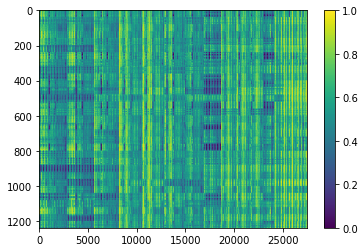

In [ ]:
#----------------------------------------------------------------------------------------------------------------
# for each sample (row) we apply min-max transformation
XT_norm = np.zeros((XT.shape))
for k in range(XT.shape[0]):
  XT_norm[k,:] = (XT[k,:]-XT[k,:].min())/(XT[k,:].max()-XT[k,:].min())
print('X normalized dimensions:',XT_norm.shape,XT_norm.max(),XT_norm.min())
#----------------------------------------------------------------------------------------------------------------
# plot resulting matrix
plt.imshow(XT_norm,aspect='auto')
plt.colorbar()
plt.show()
#----------------------------------------------------------------------------------------------------------------
del XT

In [ ]:
savemat(load_path+'conectividad_gauss.mat',{'gaus':XT2})